In [1]:
import pandas as pd
import numpy as np
import data_preprocess as dp
import data_visualization as dv
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [2]:
def get_mids(json_path):
  # get all the manhattan locations
  gdf = gpd.read_file(json_path) # read taxi zone file
  m_zones = gdf['borough'].apply(lambda x:x=='Manhattan')
  m_remove103 = gdf['location_id'].apply(lambda x:x!='103')
  m_gdf = gdf[(m_zones) & (m_remove103)]
  m_ids = m_gdf['location_id']
  m_gdf['centroid'] = m_gdf.centroid
  m_gdf.set_index('location_id', inplace=True)
  return m_gdf

In [3]:
# get the mahattan id list
json_path = './data/NYC Taxi Zones.geojson' # the taxi zones geojson path
m_gdf = get_mids(json_path) # get the mahattan ids
m_gdf

/var/folders/z3/8n55n4g55ml3g61cmdvlw2mh0000gn/T/ipykernel_25968/1089665098.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m_gdf['centroid'] = m_gdf.centroid
/Users/roderick/opt/anaconda3/envs/Dissertation/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


shape_area objectid       shape_leng  \
location_id                                                 
4             0.000111871946192        4  0.0435665270921   
24           0.0000607235737749       24  0.0469999619287   
12           0.0000415116236727       12  0.0366613013579   
13            0.000149358592917       13  0.0502813228631   
41            0.000143093037737       41   0.052793109453   
...                         ...      ...              ...   
244           0.000359702747951      244  0.0805686044599   
246           0.000281298327076      246  0.0694671937437   
249          0.0000722155957729      249    0.03638434365   
261          0.0000343423231652      261  0.0271204563616   
262           0.000122330270966      262  0.0490636231541   

                                  zone    borough  \
location_id                                         
4                        Alphabet City  Manhattan   
24                        Bloomingdale  Manhattan   
12                        Battery Park  Manhattan   
13                   Battery Park City  Manhattan   
41                      Central Harlem  Manhattan   
...                                ...        ...   
244           Washington Heights South  Manhattan   
246          West Chelsea/Hudson Yards  Manhattan   
249                       West Village  Manhattan   
261                 World Trade Center  Manhattan   
262                     Yorkville East  Manhattan   

                                                      geometry  \
location_id                                                      
4            MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
24           MULTIPOLYGON (((-73.95954 40.79872, -73.96004 ...   
12           MULTIPOLYGON (((-74.01566 40.70483, -74.01540 ...   
13           MULTIPOLYGON (((-74.01244 40.71906, -74.01282 ...   
41           MULTIPOLYGON (((-73.94774 40.80960, -73.94506 ...   
...                                                        ...   
244          MULTIPOLYGON (((-73.94069 40.85132, -73.94069 ...   
246          MULTIPOLYGON (((-74.00440 40.76267, -74.00220 ...   
249          MULTIPOLYGON (((-74.00251 40.72902, -74.00282 ...   
261          MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ...   
262          MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   

                               centroid  
location_id                              
4            POINT (-73.97697 40.72375)  
24           POINT (-73.96548 40.80197)  
12           POINT (-74.01556 40.70295)  
13           POINT (-74.01608 40.71204)  
41           POINT (-73.95129 40.80433)  
...                                 ...  
244          POINT (-73.94140 40.84171)  
246          POINT (-74.00402 40.75331)  
249          POINT (-74.00287 40.73458)  
261          POINT (-74.01302 40.70914)  
262          POINT (-73.94651 40.77593)  

[66 rows x 7 columns]

In [5]:
# get a wohle years data in manhattan
data_path_list = [
  'data/yellow_tripdata_2022-01.parquet',
  'data/yellow_tripdata_2022-02.parquet',
  'data/yellow_tripdata_2022-03.parquet',
  'data/yellow_tripdata_2022-04.parquet',
  'data/yellow_tripdata_2022-05.parquet',
  'data/yellow_tripdata_2022-06.parquet',
  'data/yellow_tripdata_2022-07.parquet',
  'data/yellow_tripdata_2022-08.parquet',
  'data/yellow_tripdata_2022-09.parquet',
  'data/yellow_tripdata_2022-10.parquet',
  'data/yellow_tripdata_2022-11.parquet',
  'data/yellow_tripdata_2022-12.parquet'
]
start_time = '2022/01/01'
end_time = '2023/01/01'
m_tripdata = dp.get_tripdata(data_path_list, m_gdf.index, start_time, end_time)
m_tripdata
  

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0               0         1  2022-01-01 00:35:40   2022-01-01 00:53:29   
1               1         1  2022-01-01 00:33:43   2022-01-01 00:42:07   
2               2         2  2022-01-01 00:53:21   2022-01-01 01:02:19   
3               3         2  2022-01-01 00:25:21   2022-01-01 00:35:23   
4               4         2  2022-01-01 00:36:48   2022-01-01 01:14:20   
...           ...       ...                  ...                   ...   
32716045  3399540         2  2022-12-31 23:01:46   2022-12-31 23:26:45   
32716046  3399542         2  2022-12-31 23:06:51   2022-12-31 23:17:08   
32716047  3399543         2  2022-12-31 23:16:37   2022-12-31 23:34:19   
32716048  3399545         2  2022-12-31 23:13:24   2022-12-31 23:29:08   
32716049  3399547         1  2022-12-31 23:02:50   2022-12-31 23:16:05   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     2.0           3.80         1.0                  N   
1                     1.0           2.10         1.0                  N   
2                     1.0           0.97         1.0                  N   
3                     1.0           1.09         1.0                  N   
4                     1.0           4.30         1.0                  N   
...                   ...            ...         ...                ...   
32716045              NaN           3.97         NaN               None   
32716046              NaN           0.91         NaN               None   
32716047              NaN           7.50         NaN               None   
32716048              NaN           5.06         NaN               None   
32716049              NaN           0.00         NaN               None   

          PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  \
0                  142           236  ...        14.50    3.0      0.5   
1                  236            42  ...         8.00    0.5      0.5   
2                  166           166  ...         7.50    0.5      0.5   
3                  114            68  ...         8.00    0.5      0.5   
4                   68           163  ...        23.50    0.5      0.5   
...                ...           ...  ...          ...    ...      ...   
32716045           107            50  ...        23.55    0.0      0.5   
32716046            68            48  ...        17.65    0.0      0.5   
32716047           263           261  ...        33.63    0.0      0.5   
32716048            75            50  ...        26.23    0.0      0.5   
32716049           238           116  ...        12.74    0.0      0.5   

          tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0               3.65           0.0                    0.3         21.95   
1               4.00           0.0                    0.3         13.30   
2               1.76           0.0                    0.3         10.56   
3               0.00           0.0                    0.3         11.80   
4               3.00           0.0                    0.3         30.30   
...              ...           ...                    ...           ...   
32716045        5.51           0.0                    1.0         33.06   
32716046        4.33           0.0                    1.0         25.98   
32716047        3.76           0.0                    1.0         41.39   
32716048        0.00           0.0                    1.0         30.23   
32716049        0.00           0.0                    1.0         16.74   

          congestion_surcharge  airport_fee  count  
0                          2.5          0.0      1  
1                          0.0          0.0      1  
2                          0.0          0.0      1  
3                          2.5          0.0      1  
4                          2.5          0.0      1  
...                        ...          ...    ...  
32716045                   NaN          NaN      1  
32716046

In [8]:
def dis_count(single_id, m_gdf, m_tripdata):
  gdf = m_gdf
  tripdata = m_tripdata
  centroid = gdf['centroid']
  single_point = centroid.loc[single_id]
  gdf1 = gpd.GeoDataFrame({'geometry': [single_point]*66}, crs='EPSG:4326')
  # Create a list of points and a GeoDataFrame for the 66 points
  gdf2 = gpd.GeoDataFrame({'geometry': centroid.tolist()}, crs='EPSG:4326')

  # Project to a local coordinate system
  gdf1 = gdf1.to_crs('EPSG:5234')
  gdf2 = gdf2.to_crs('EPSG:5234')

  # Calculate the distance between the single point and each of the 66 points
  distances = gdf2.distance(gdf1)
  distances = pd.Series(distances)
  gdf.reset_index(inplace=True)
  gdf['dis'] = distances
  gdf.set_index('location_id', inplace=True)
  
  tripdata_single = tripdata[tripdata['PULocationID'].apply(lambda x:x==int(single_id))]
  counts = tripdata_single['DOLocationID'].value_counts().reset_index(name='count')
  counts.set_index('index',inplace=True)
  def add_counts(id, counts):
    id = int(id)
    if id in counts.index:
      return counts['count'].loc[id]
    else:
      return 0
  gdf['count'] = gdf['objectid'].apply(add_counts, counts=counts)
  gdf = gdf.sort_values('dis')
  plt.figure(figsize=(32,6))
  plt.bar(gdf.index, gdf['count'])
  plt.title('location_id='+single_id)
  plt.xlabel('distance')
  plt.ylabel('count')
  plt.show()

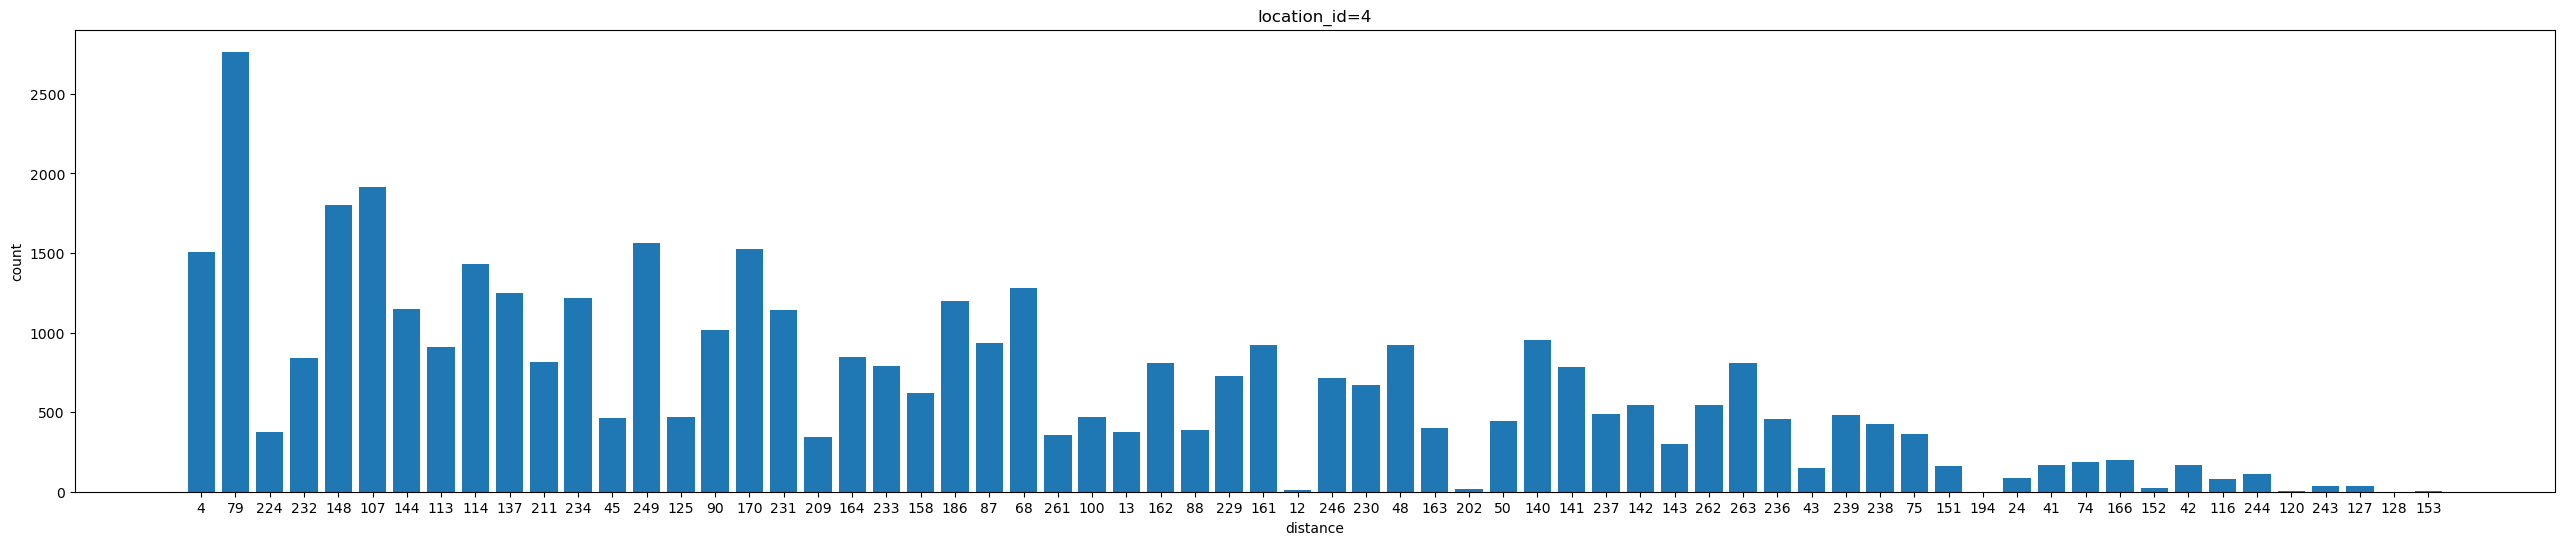

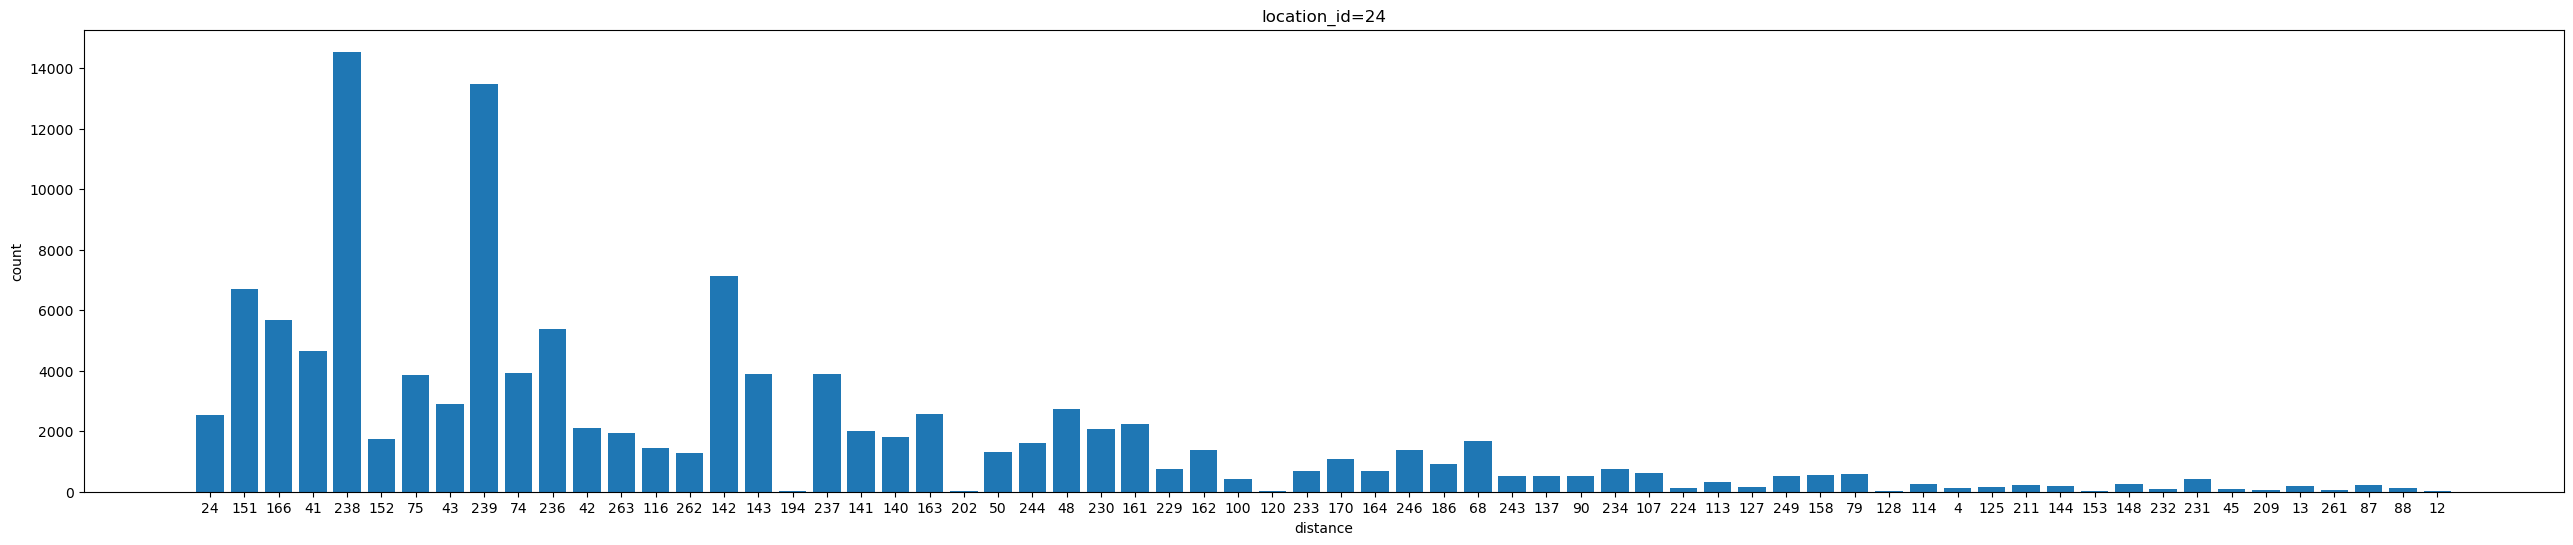

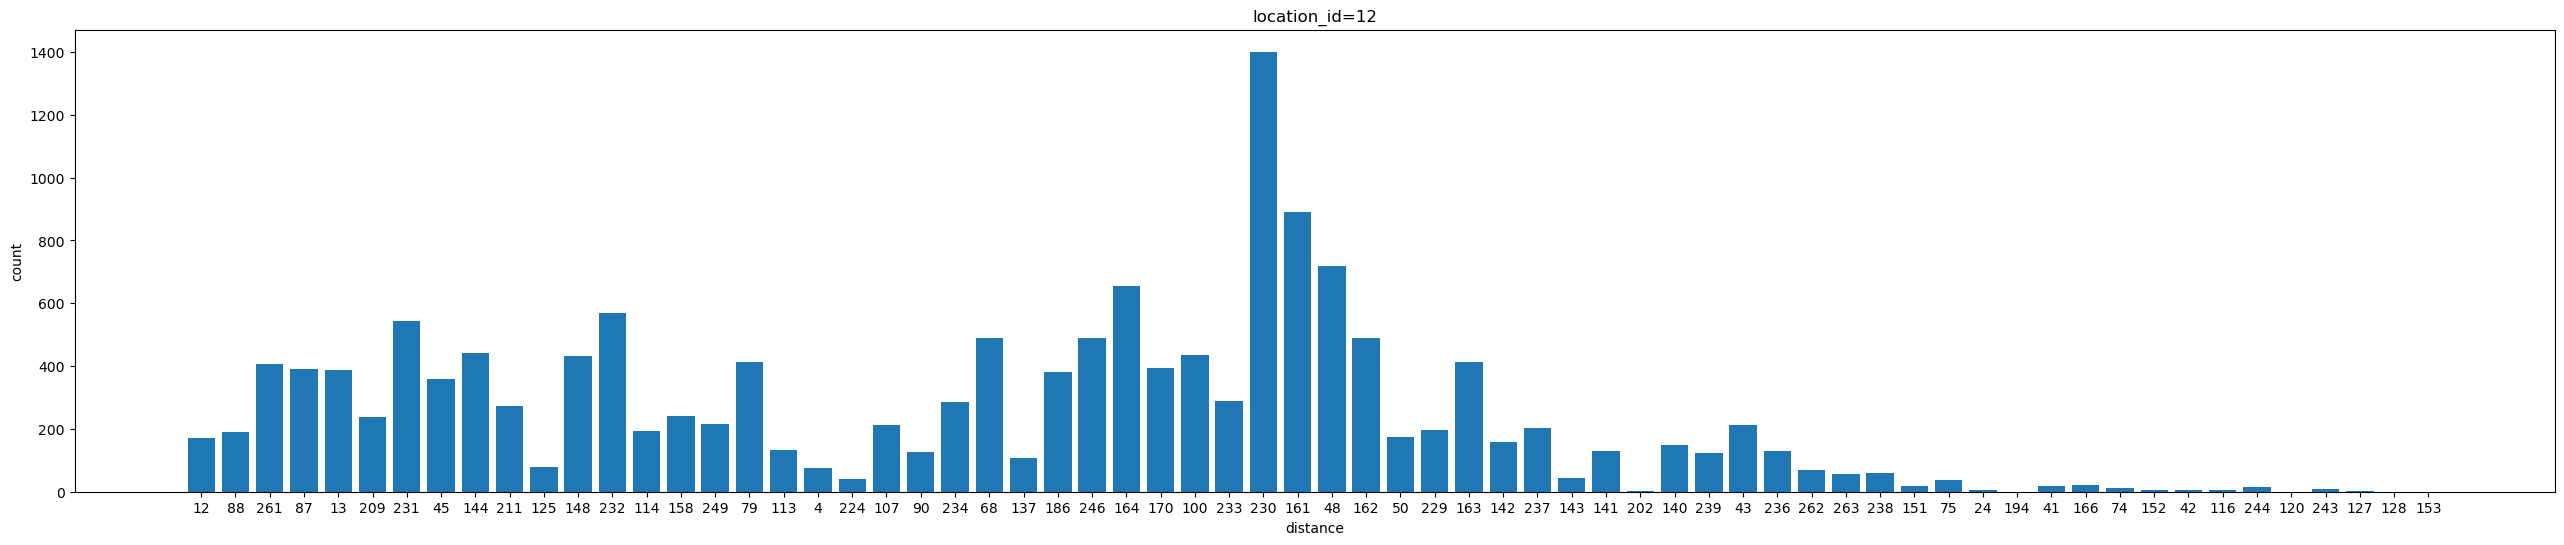

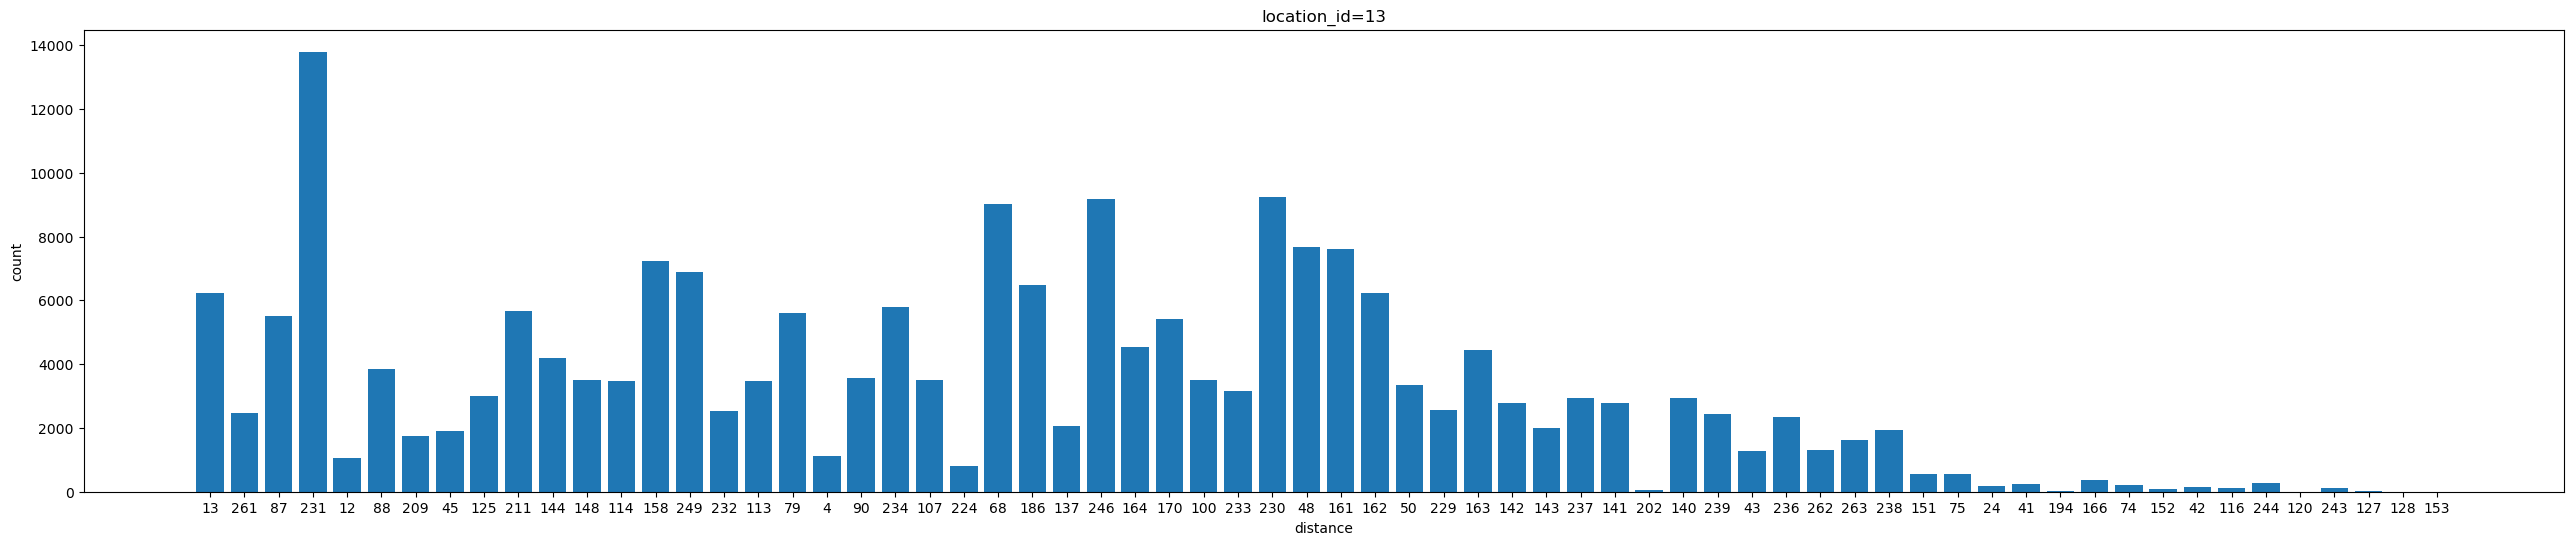

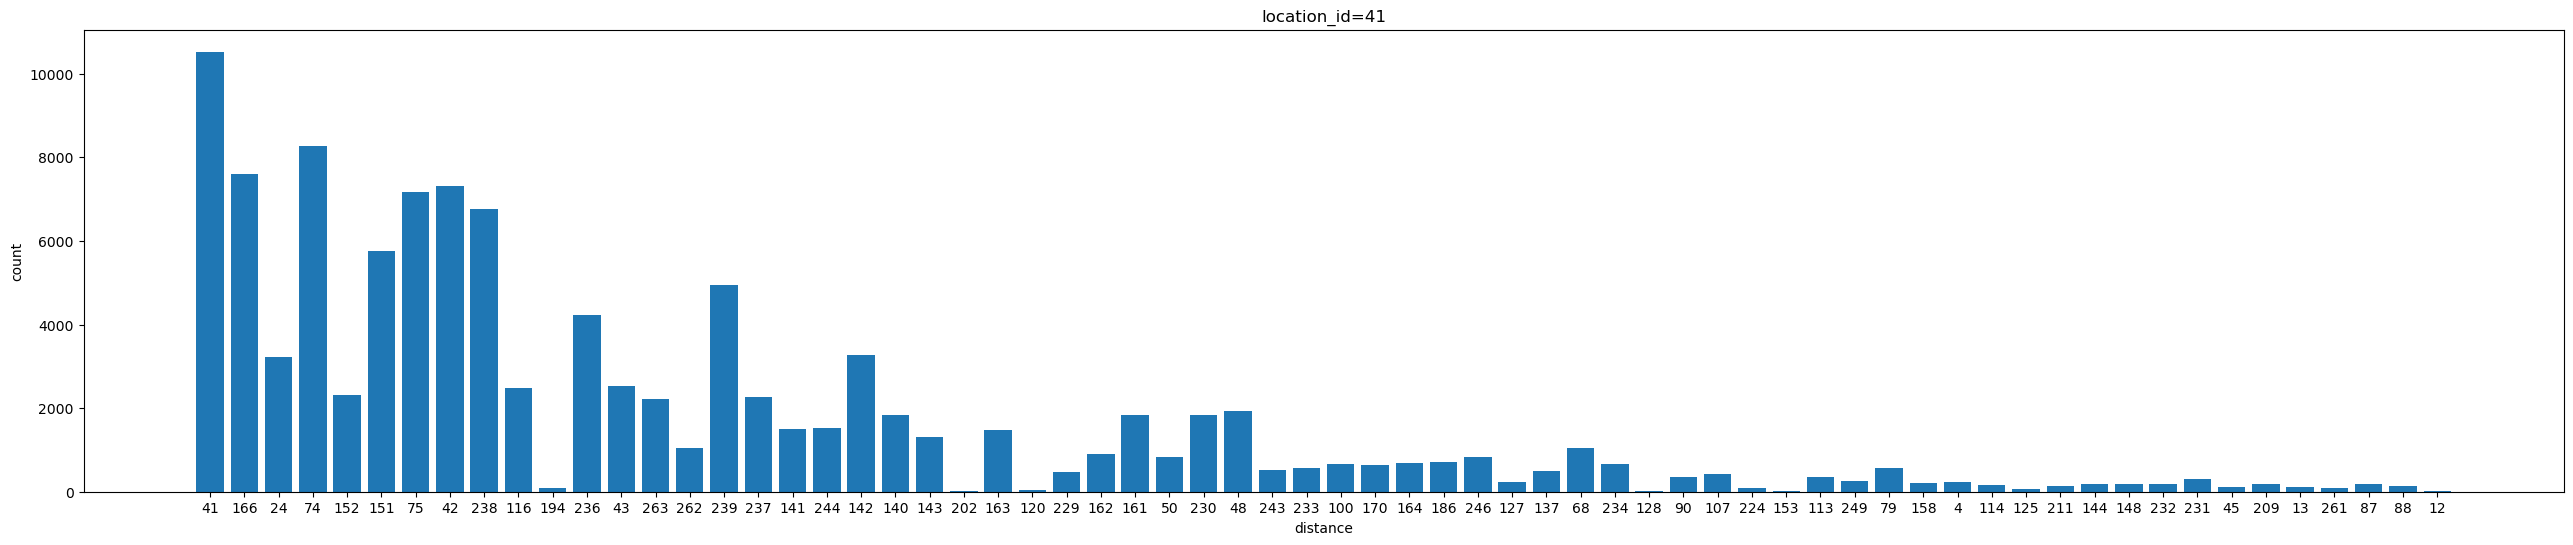

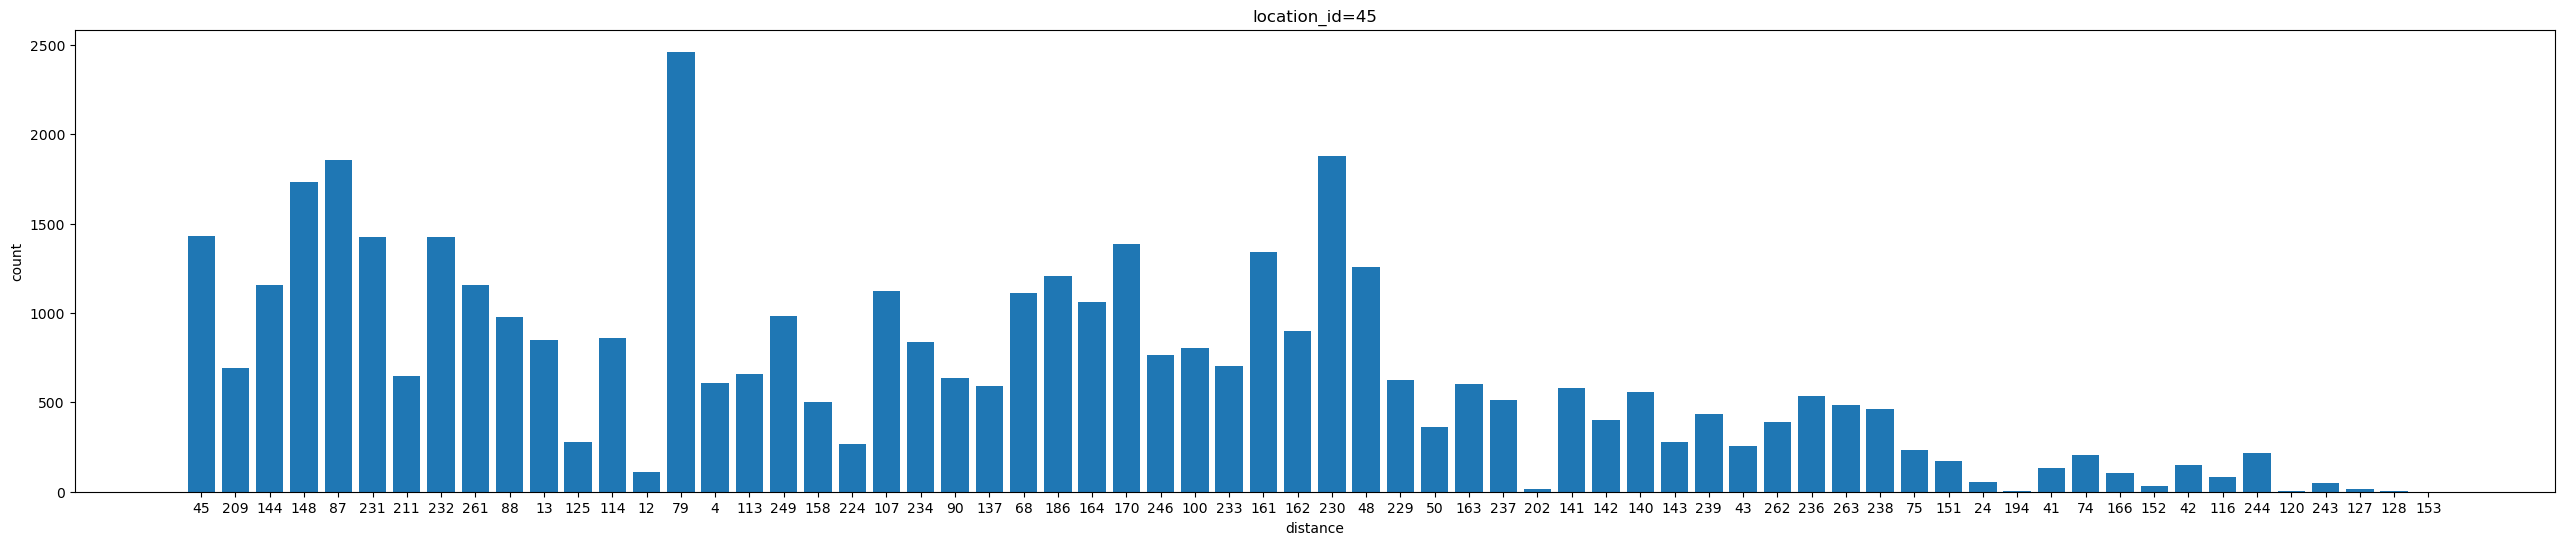

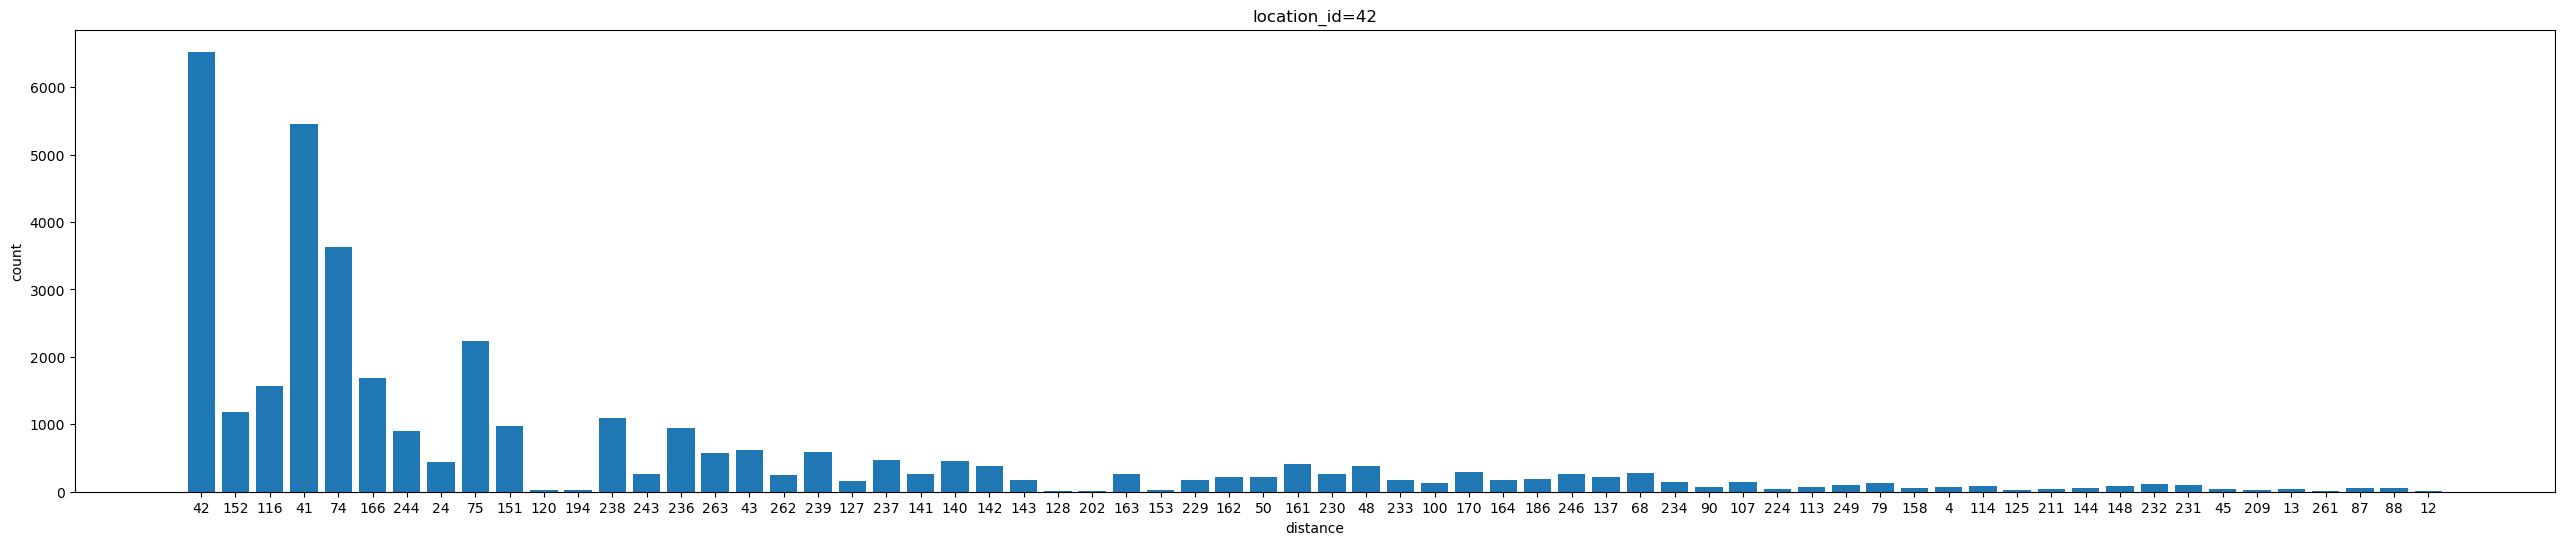

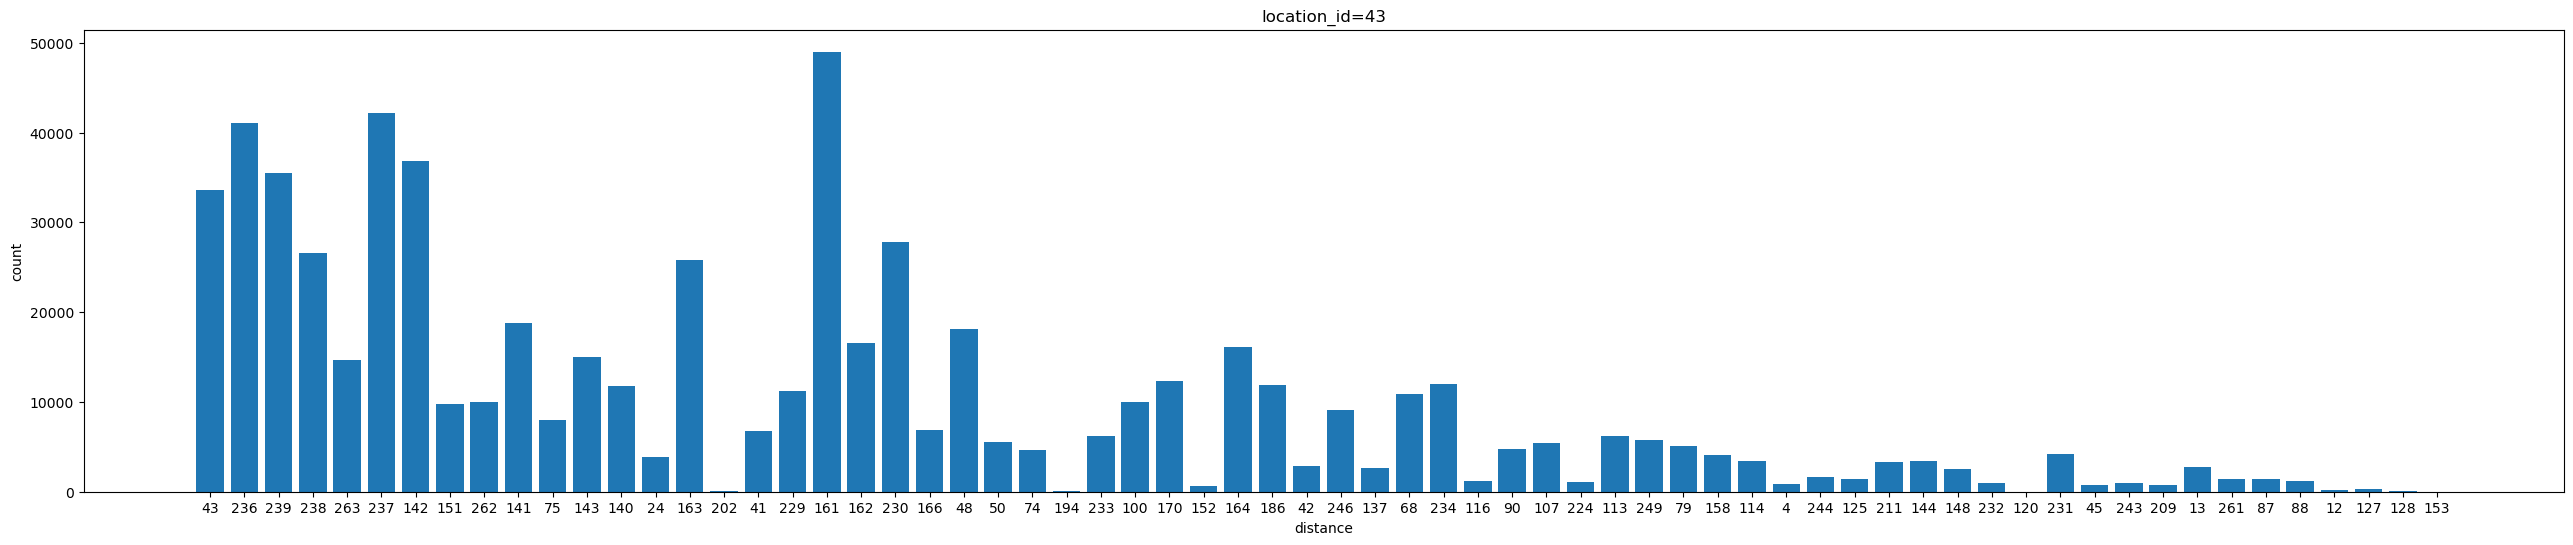

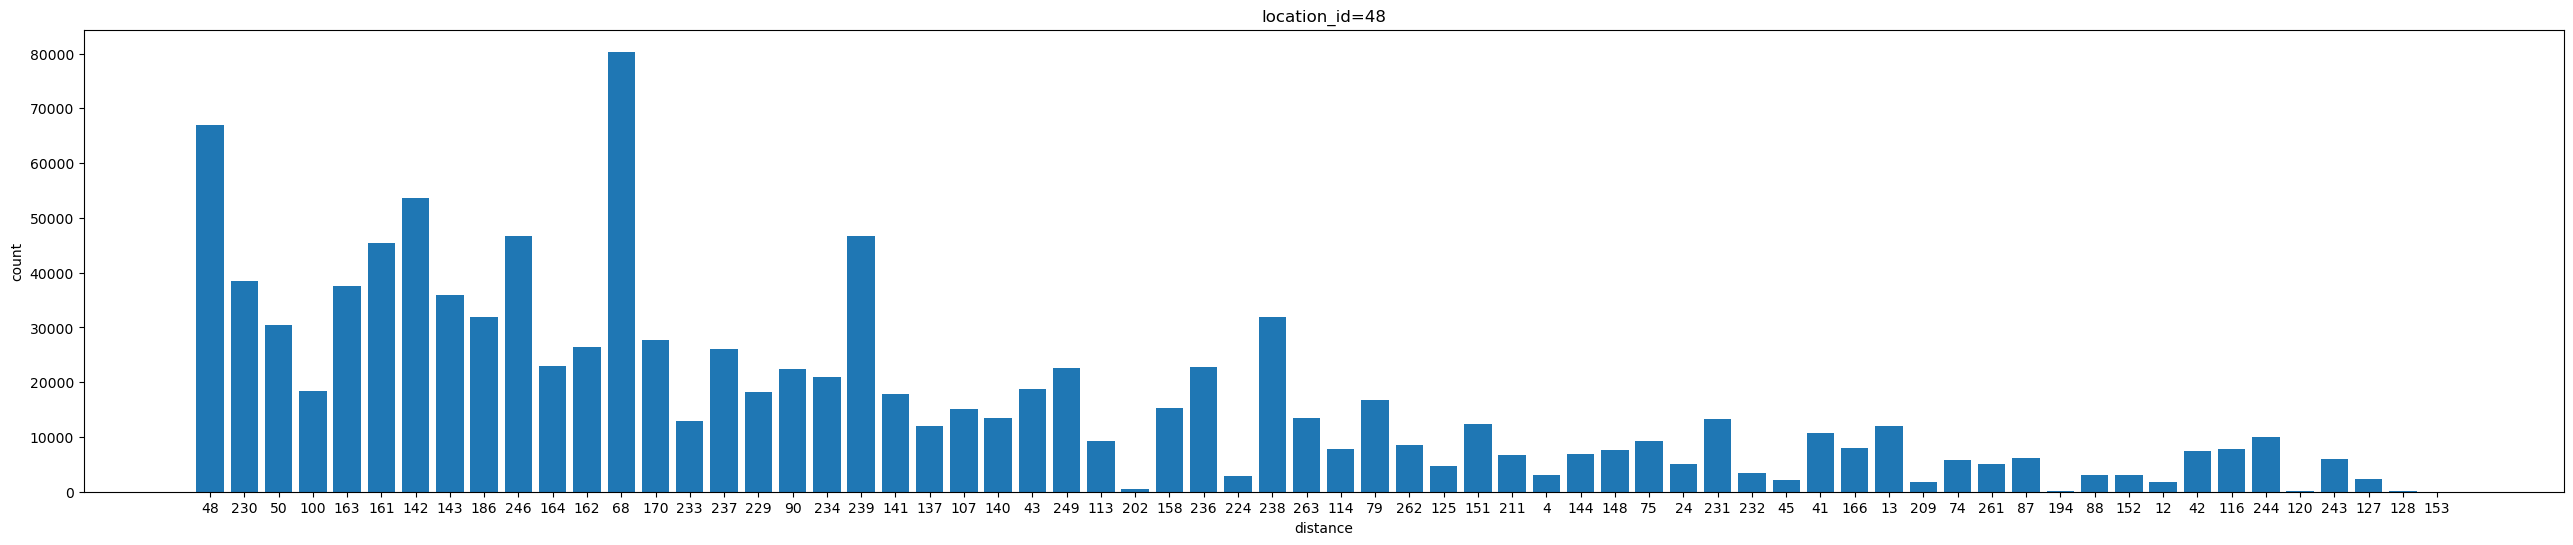

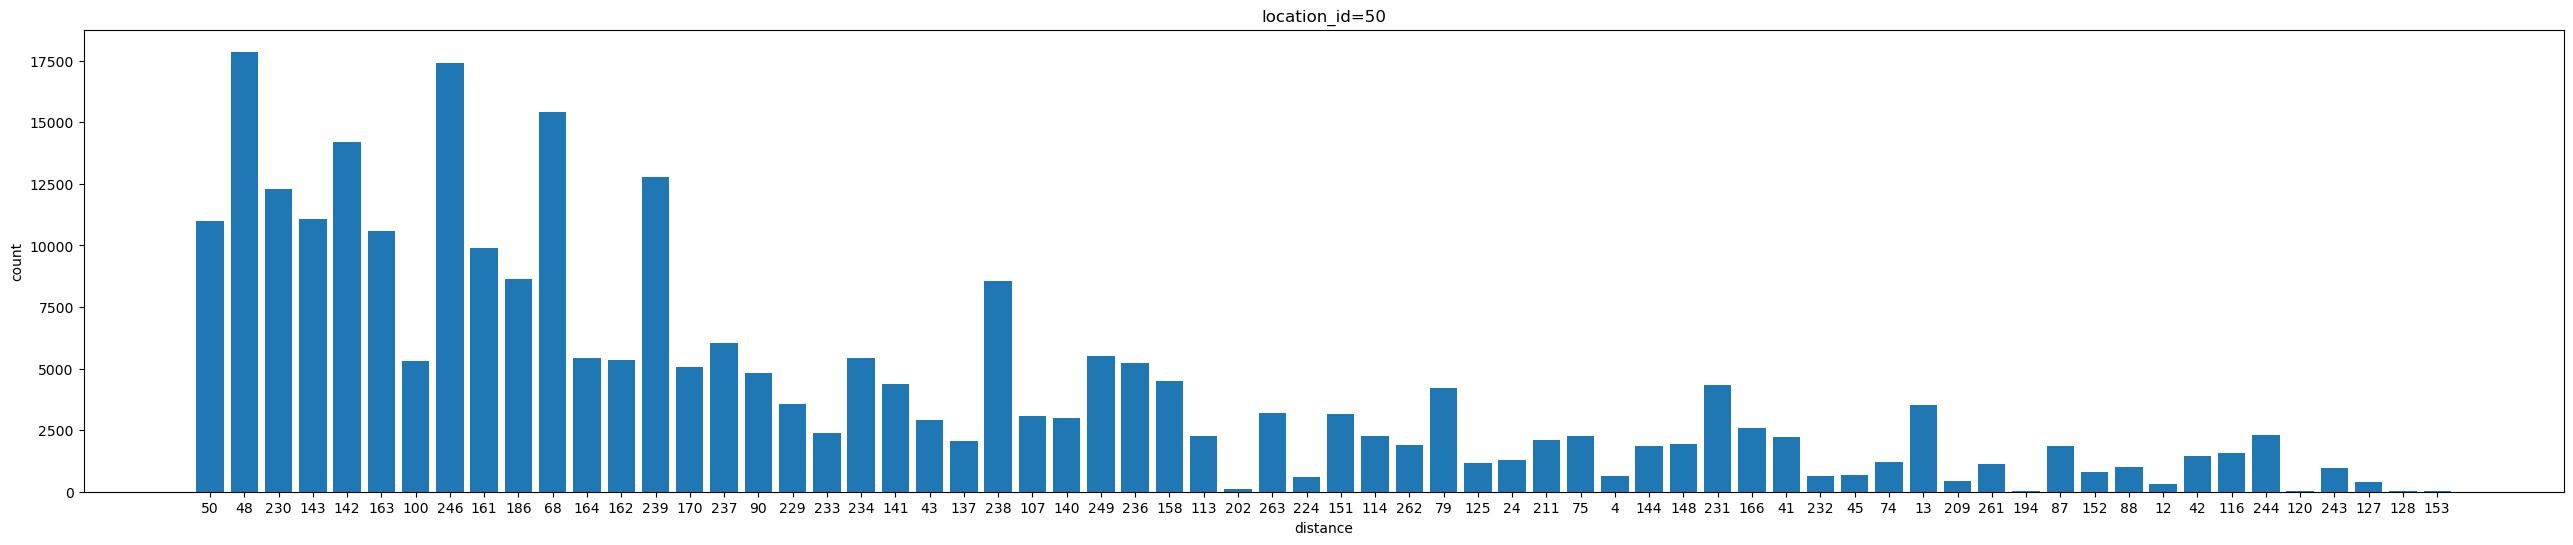

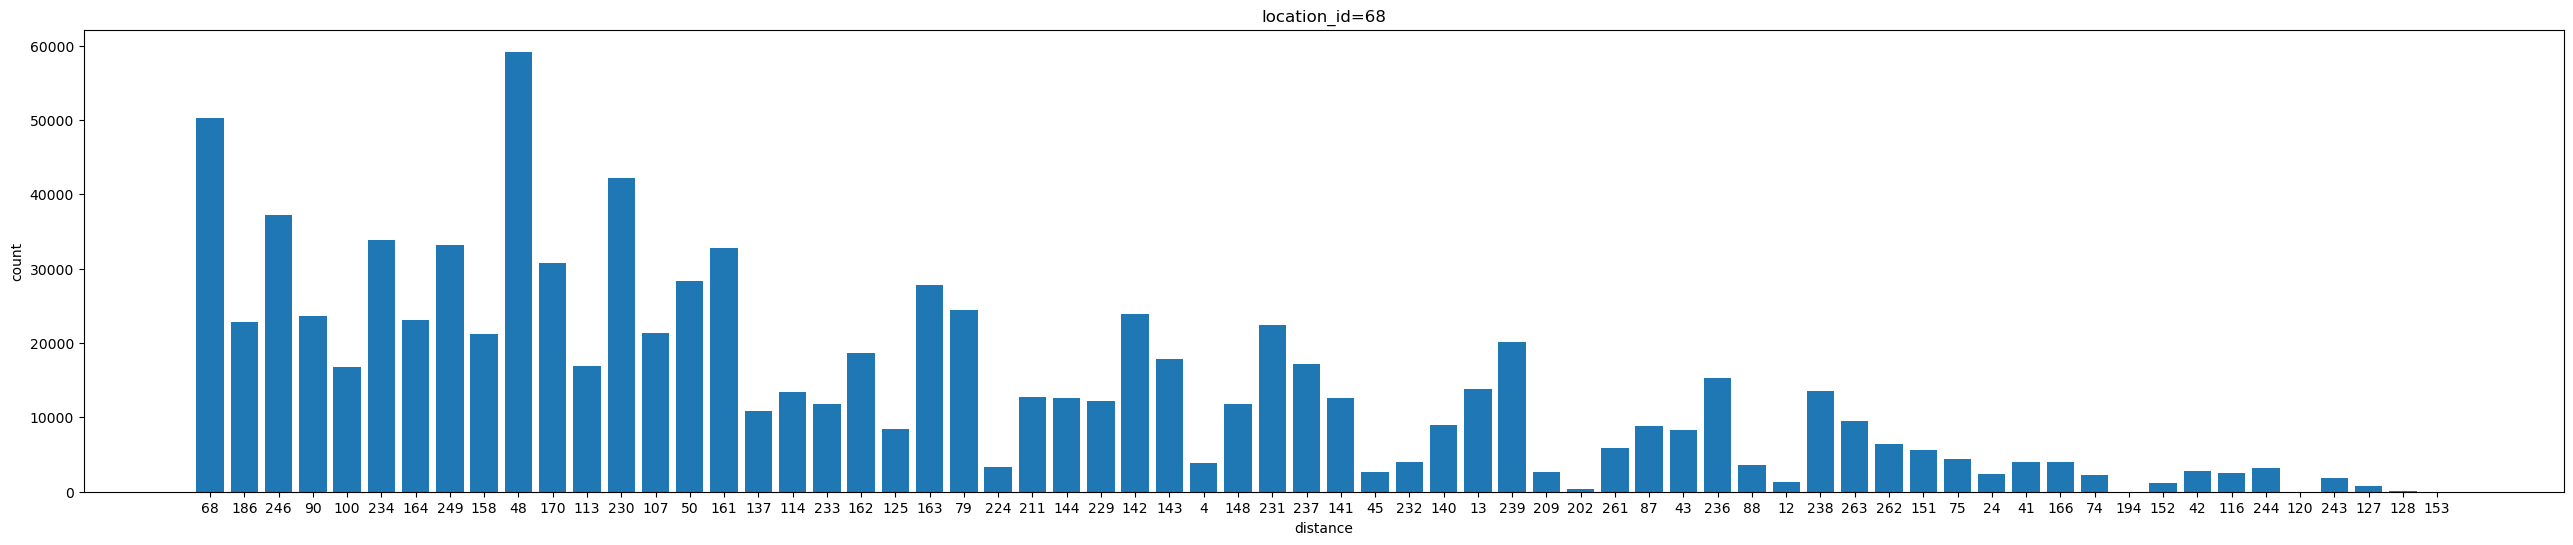

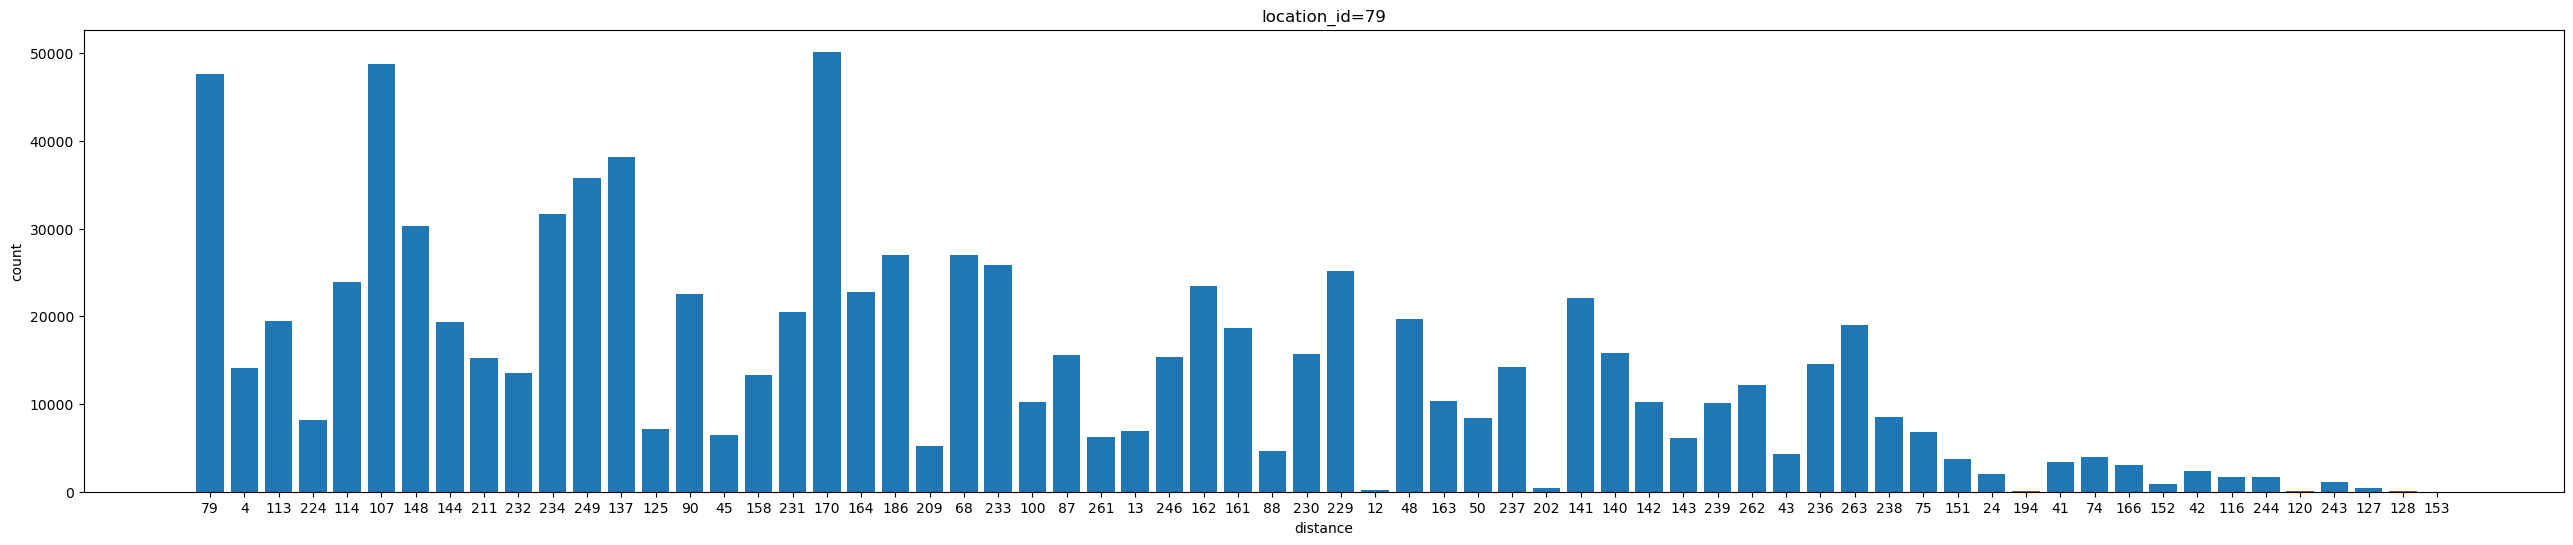

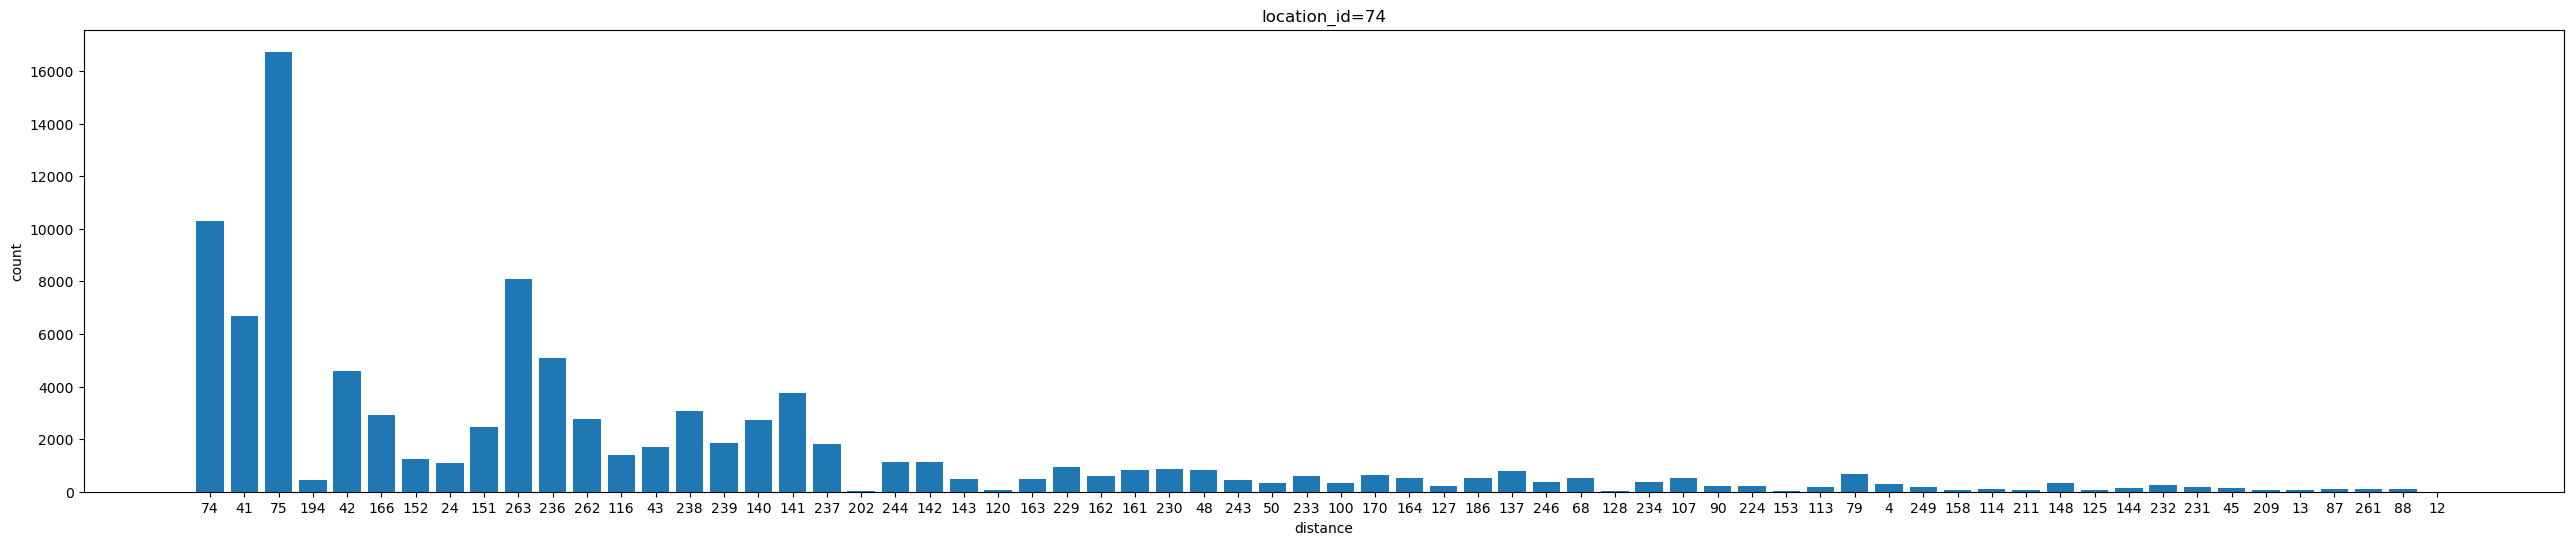

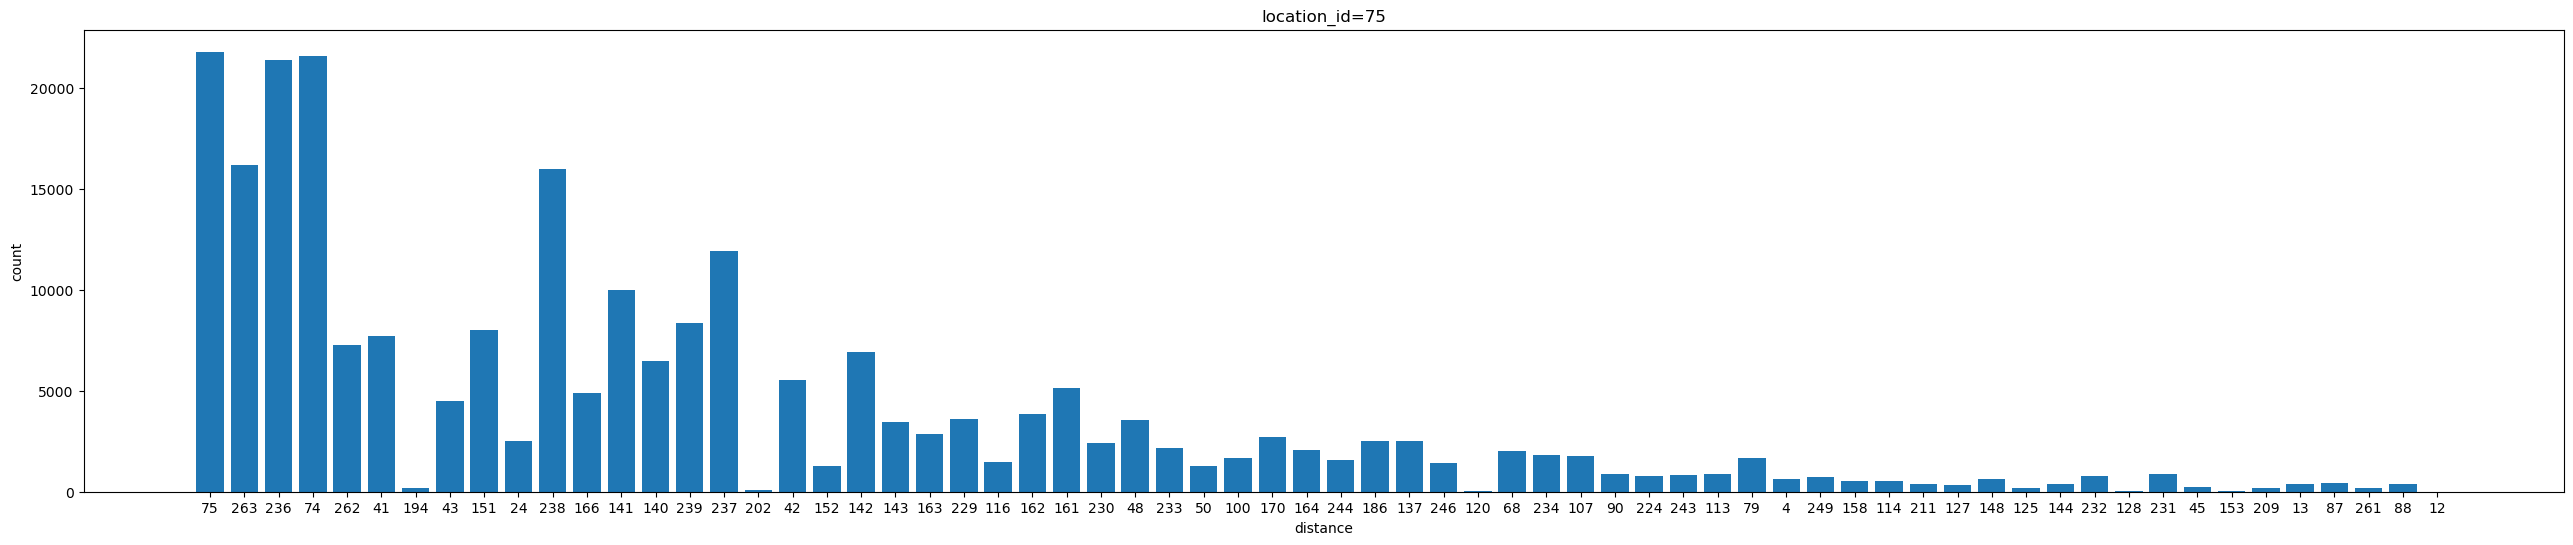

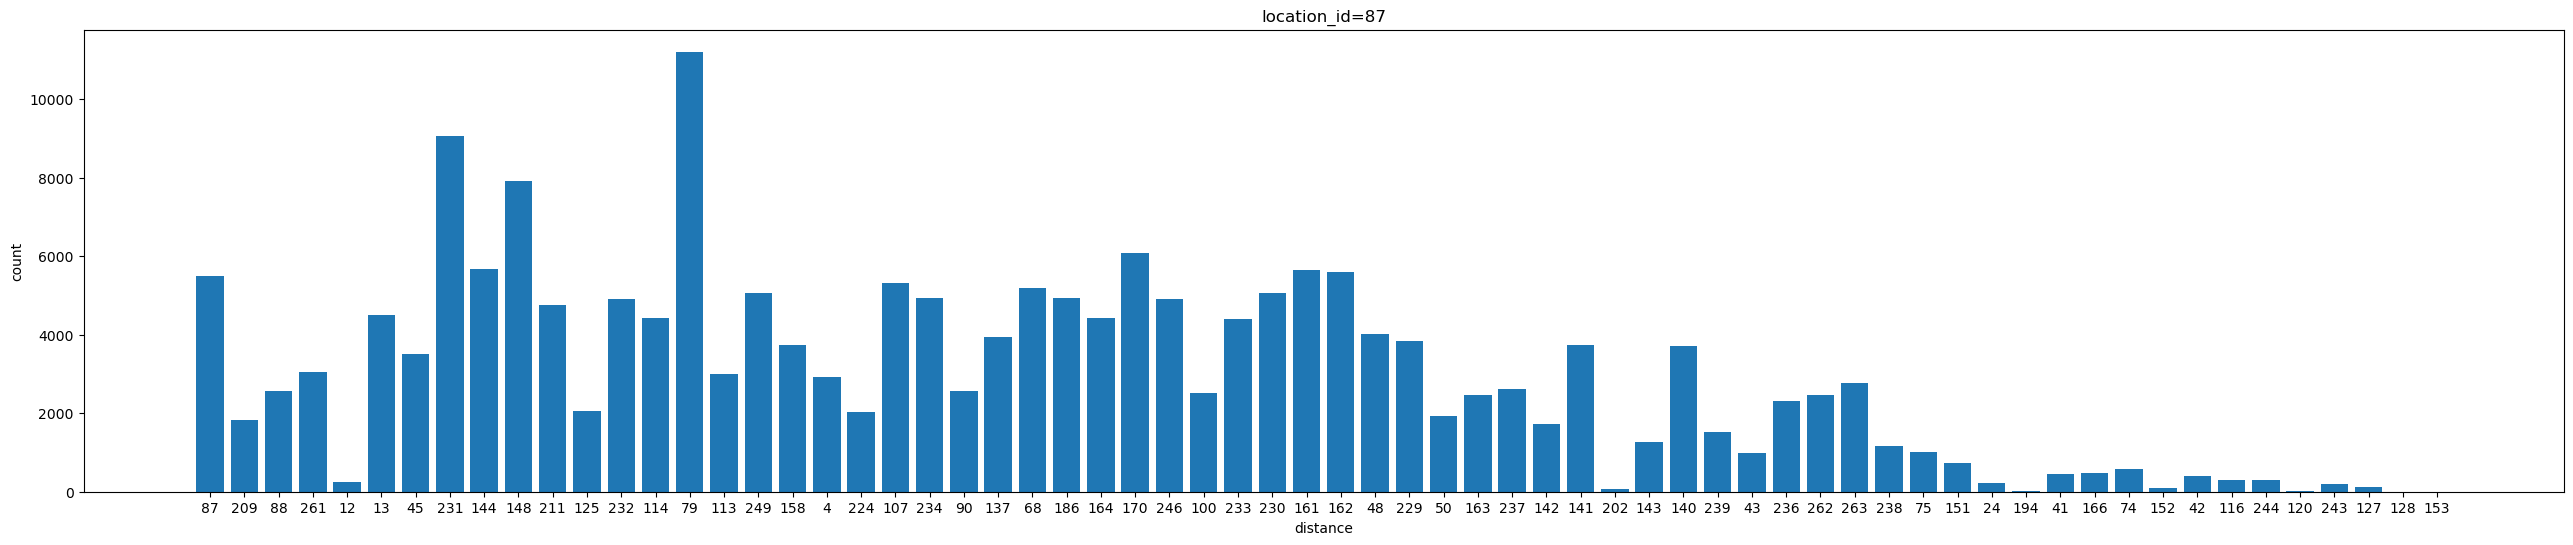

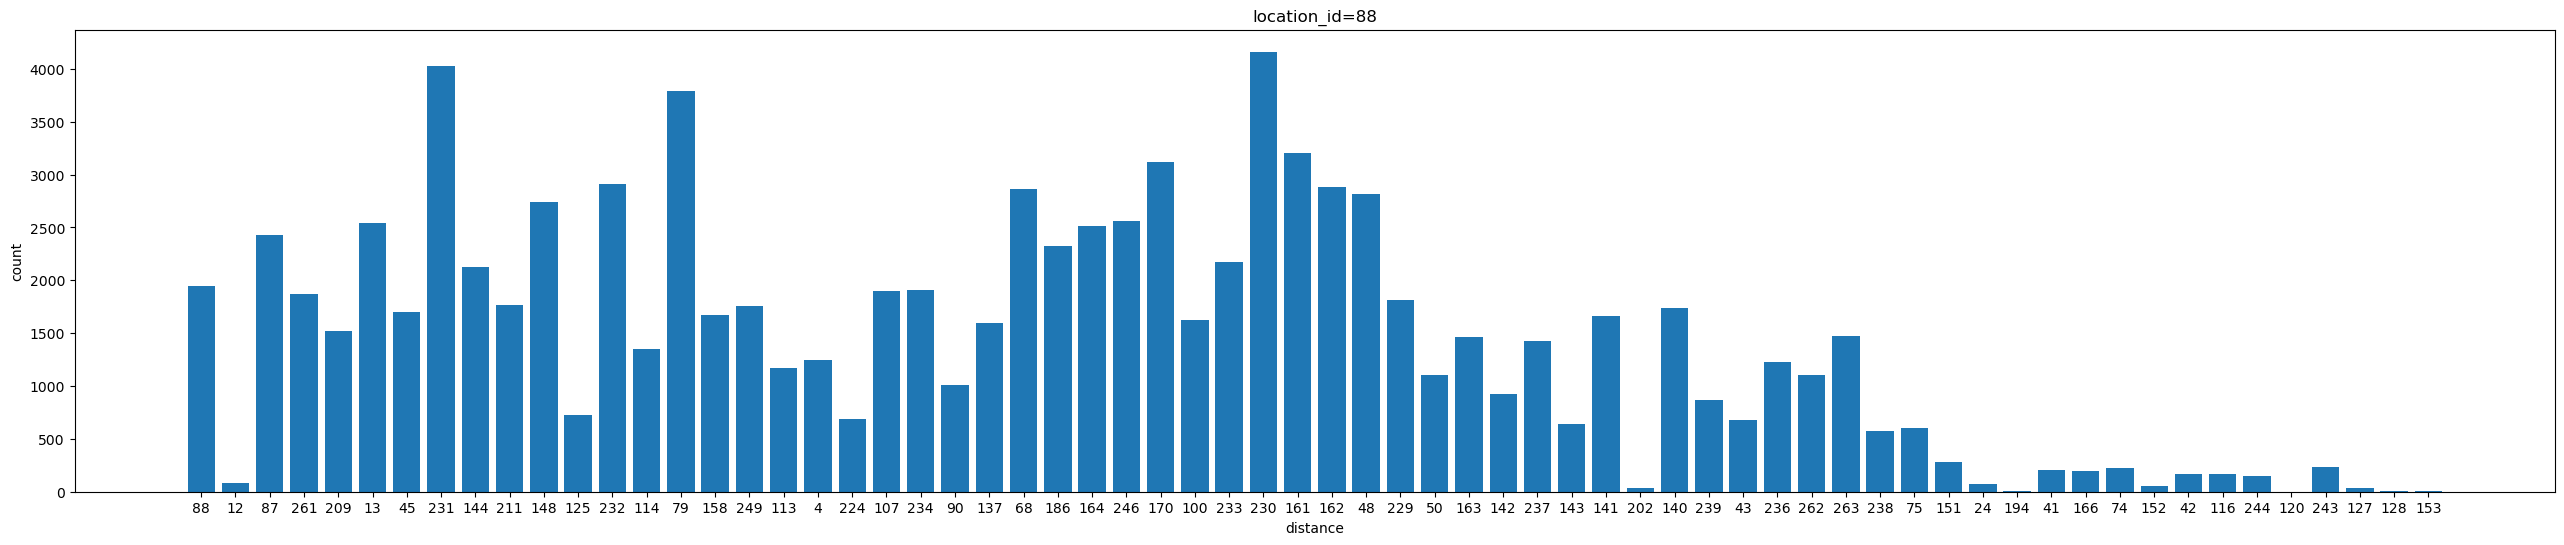

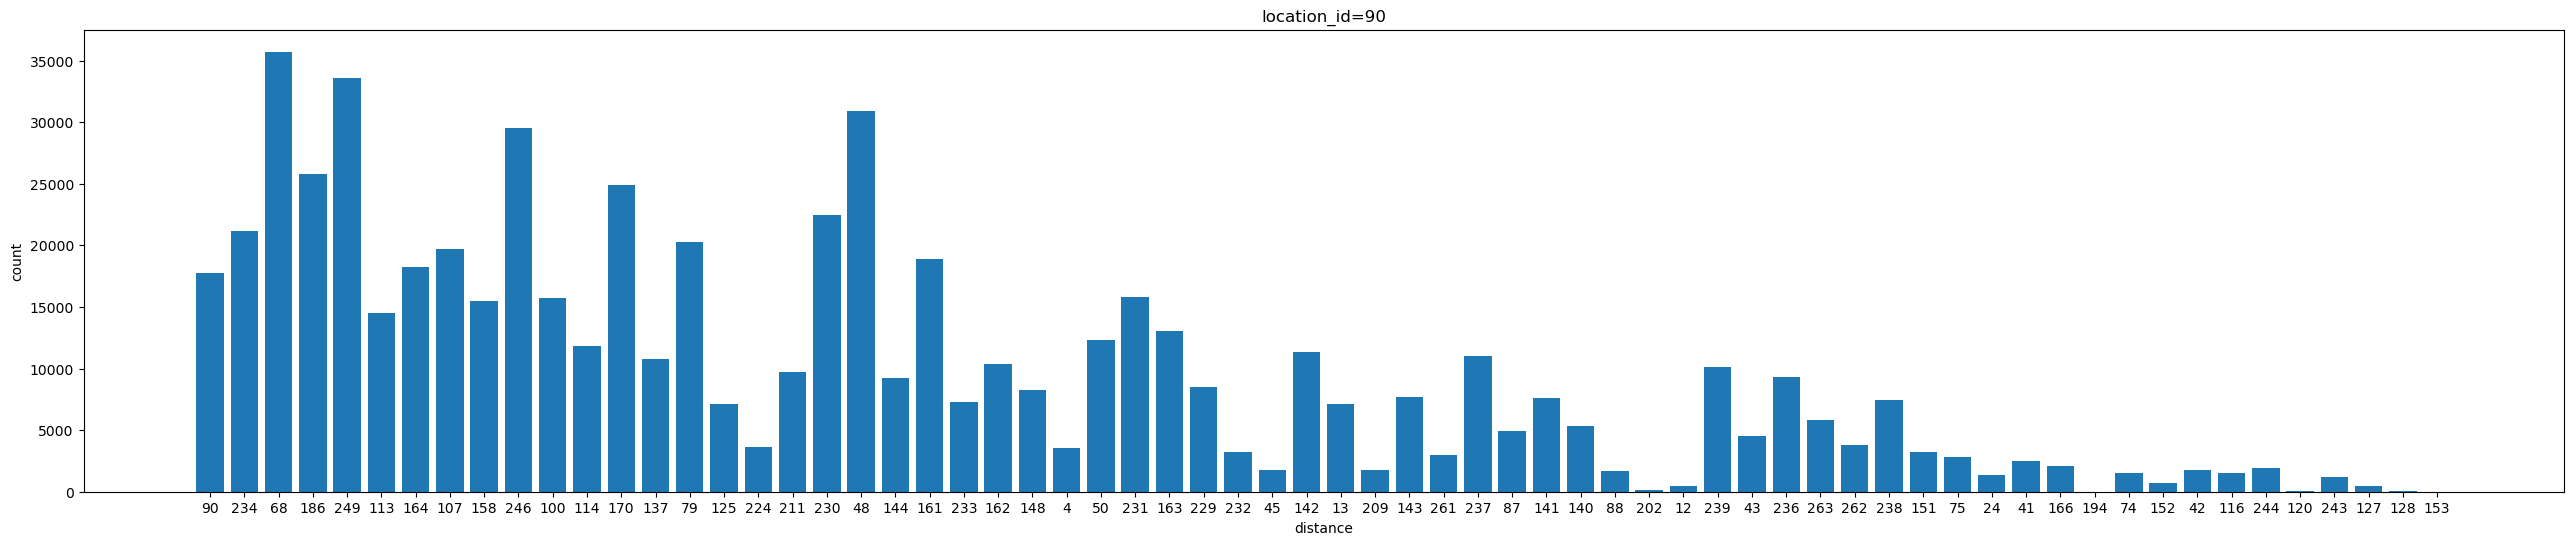

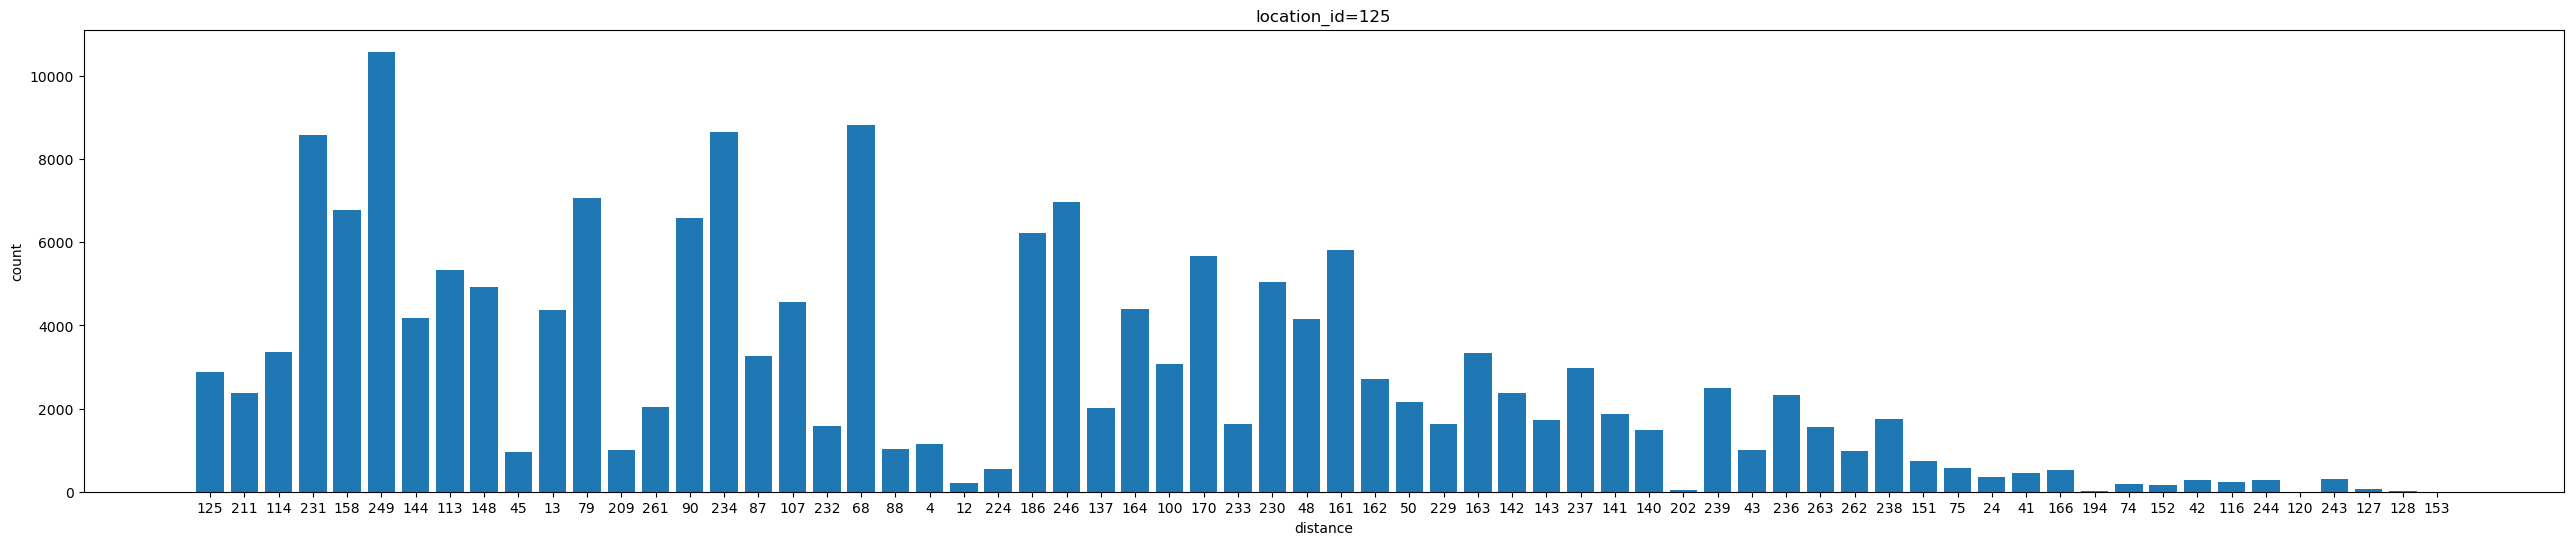

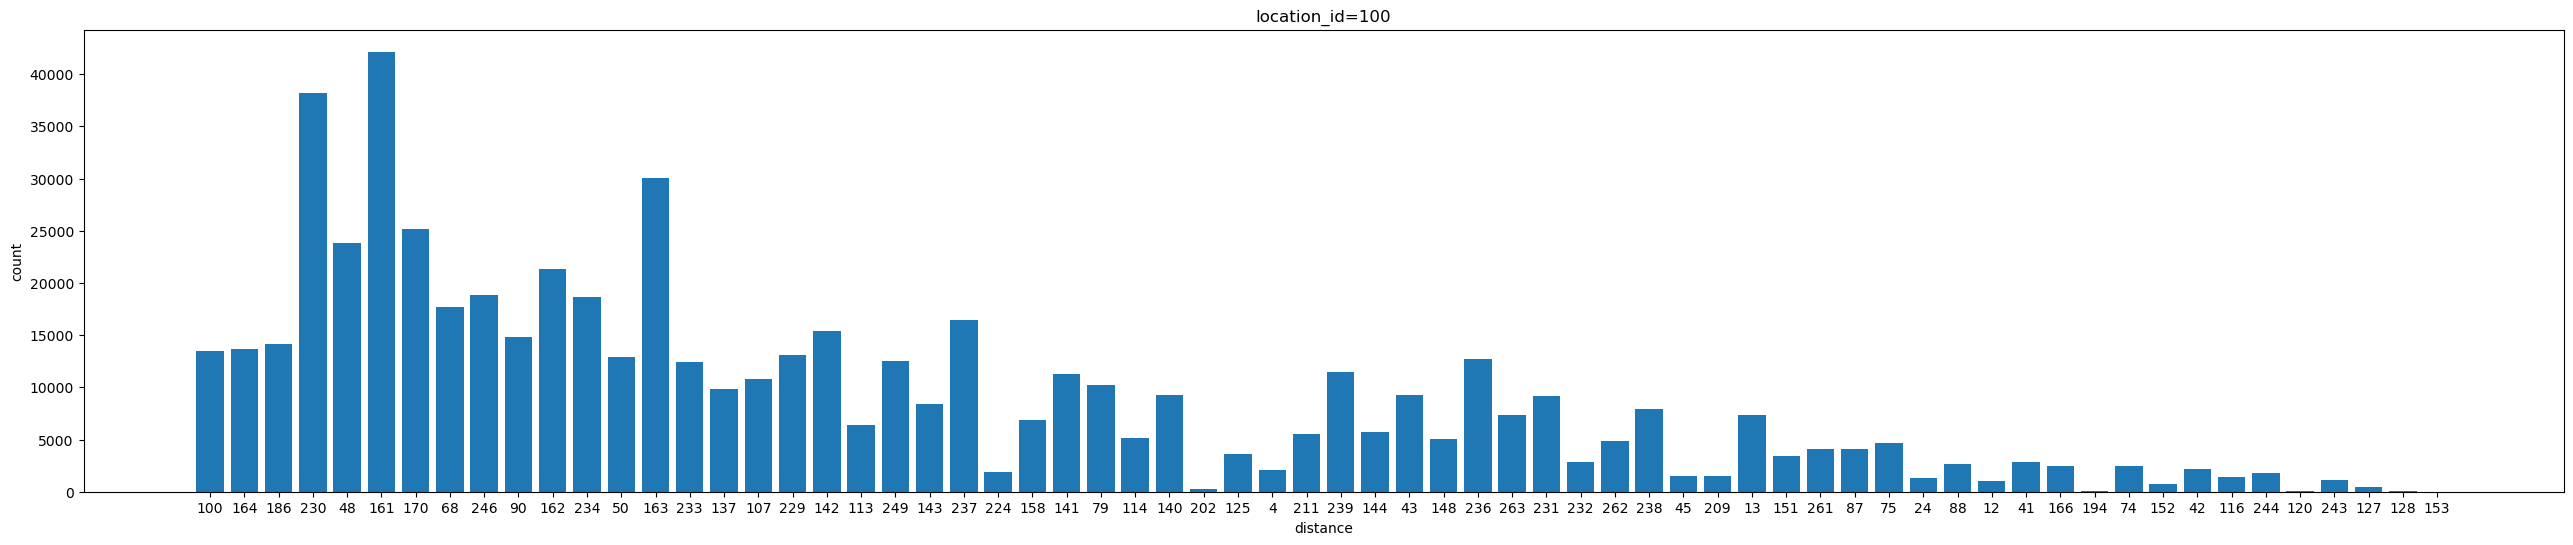

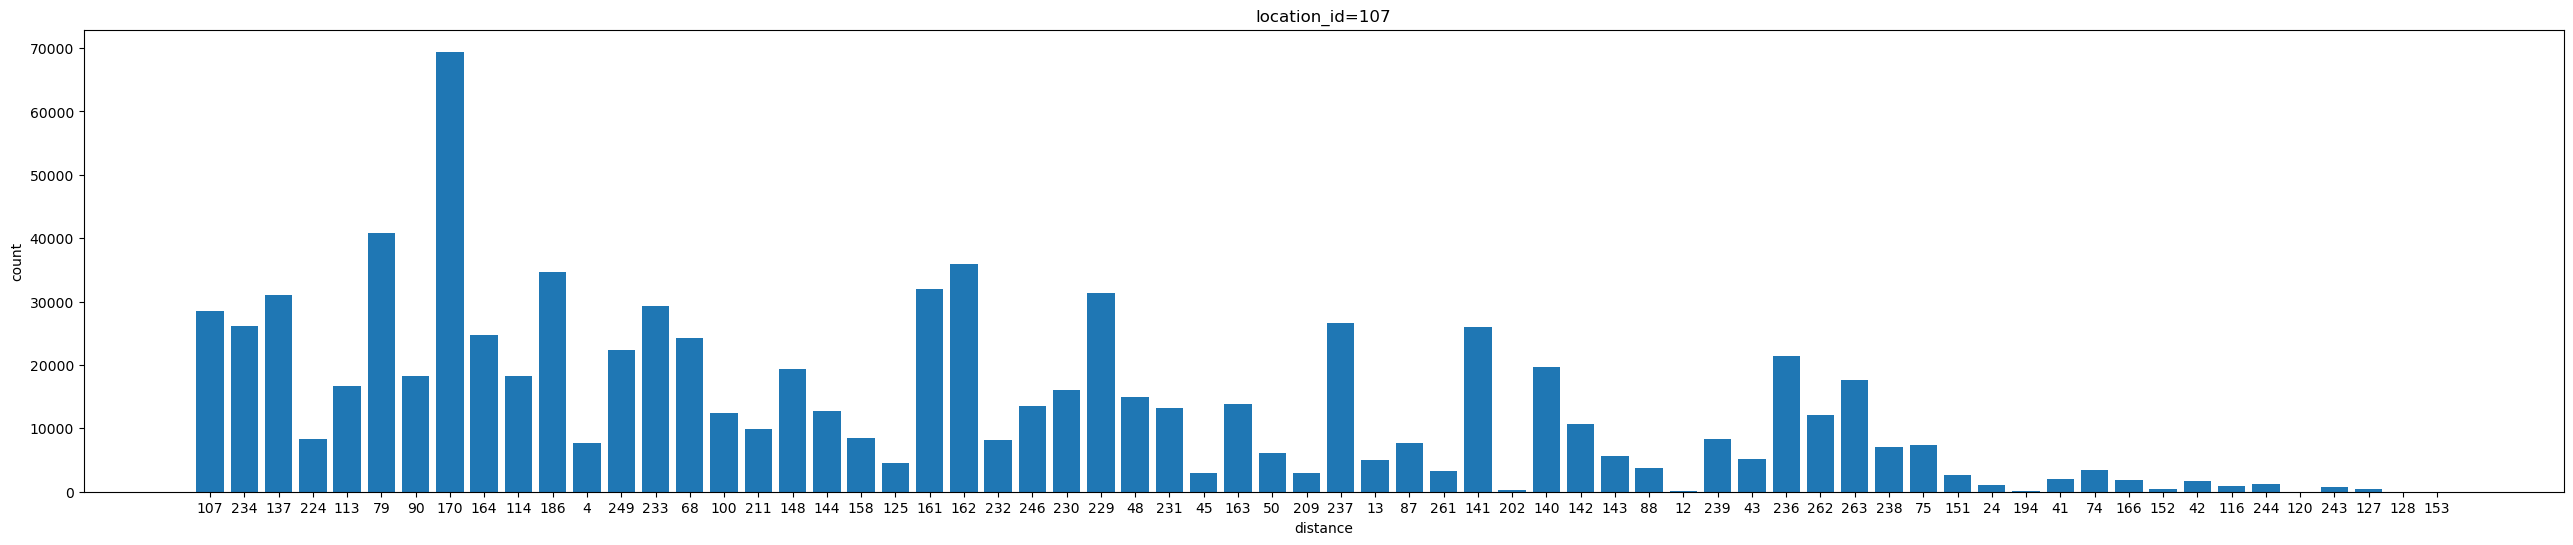

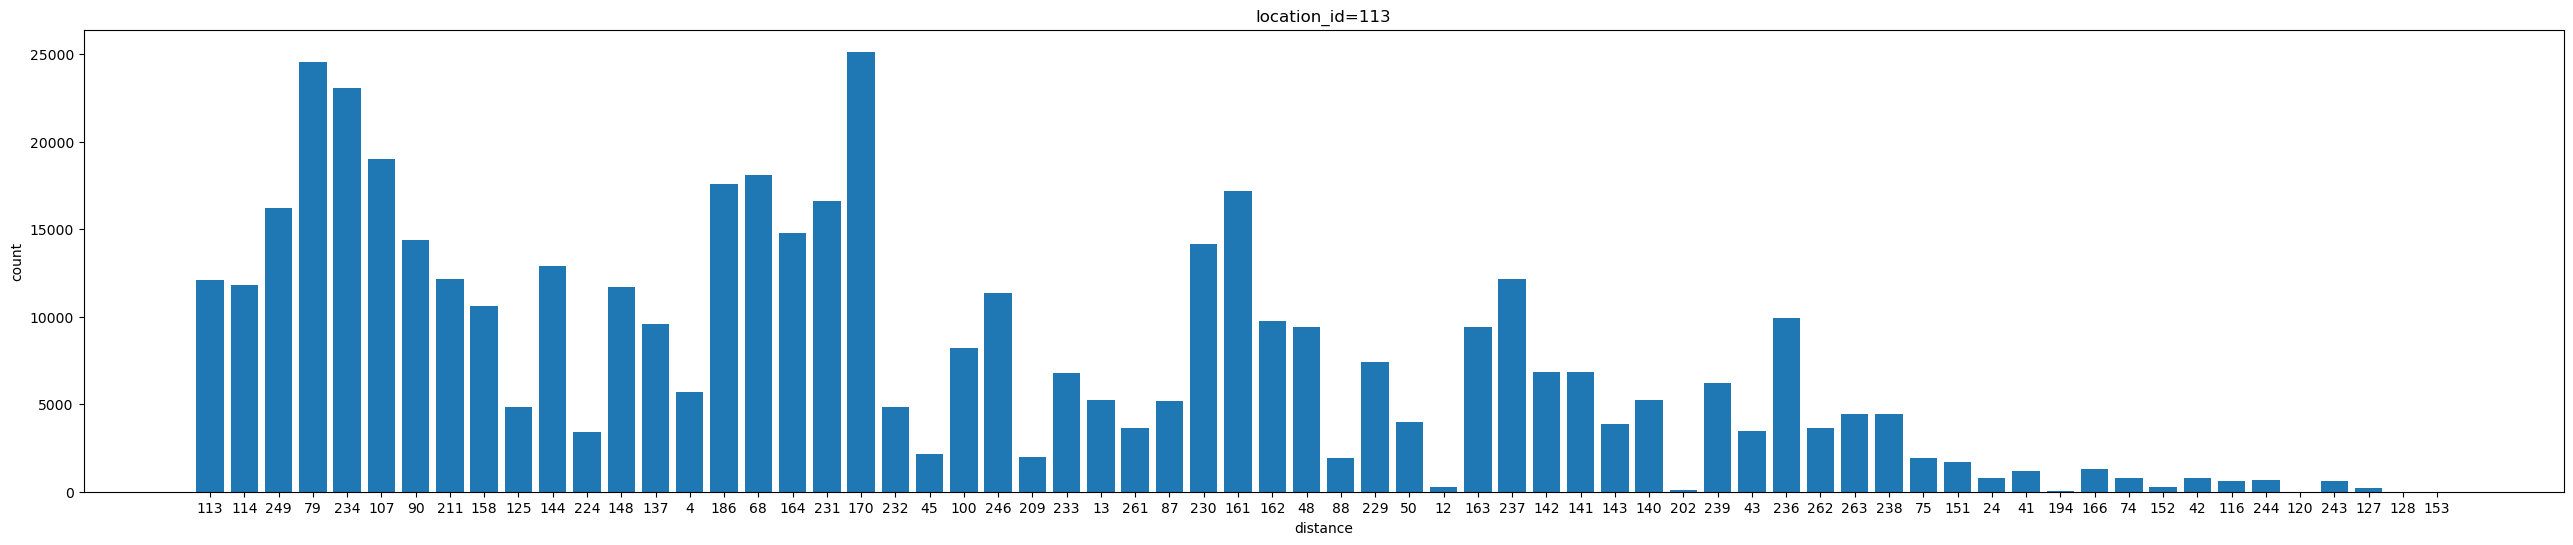

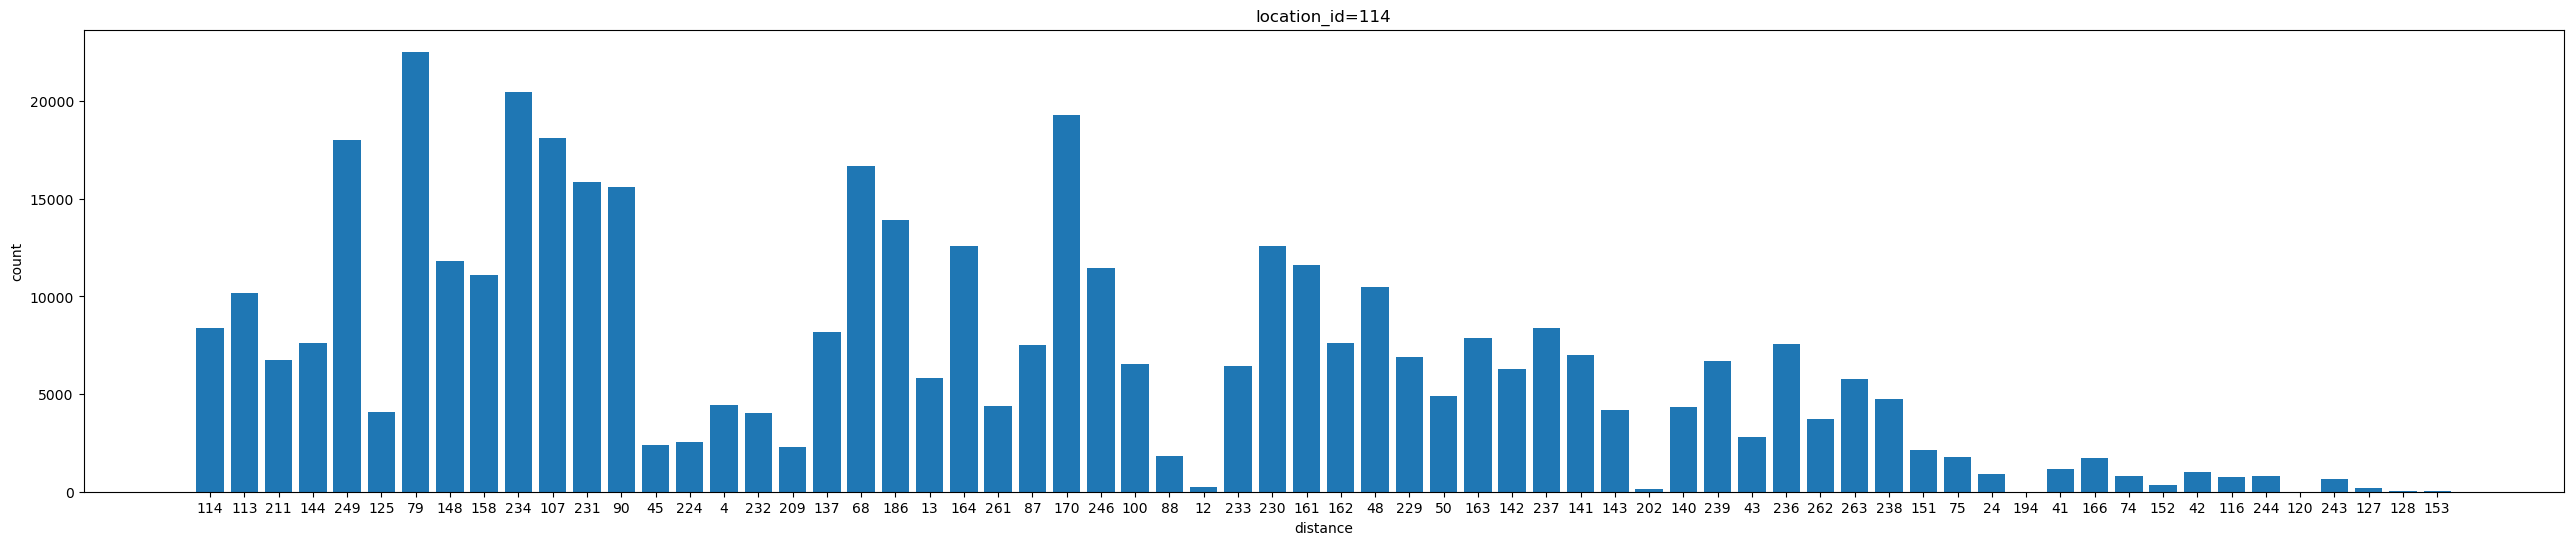

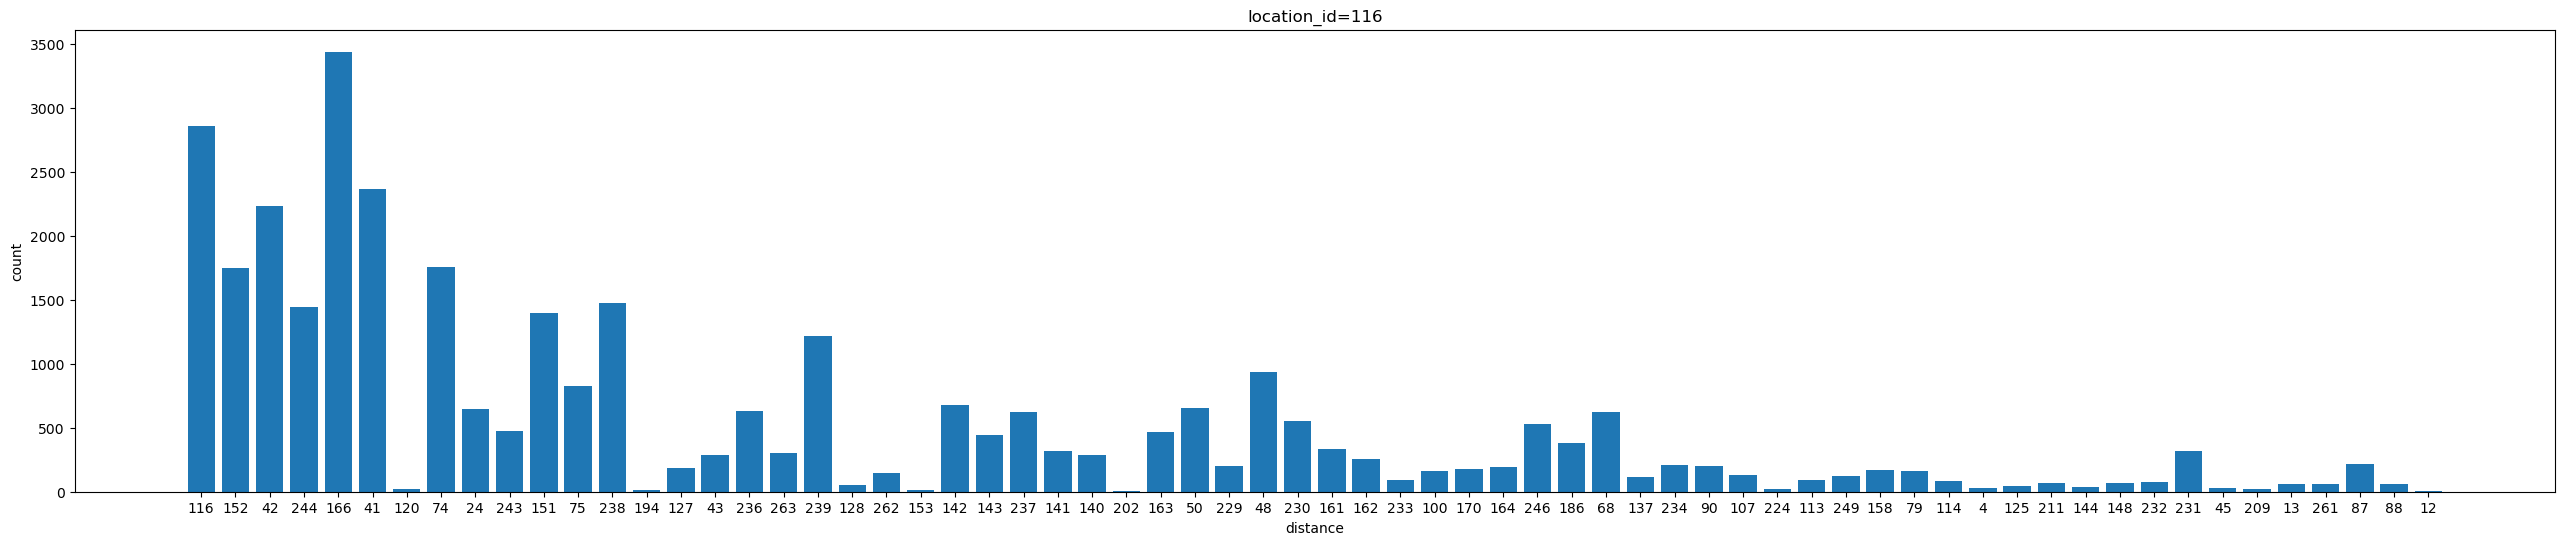

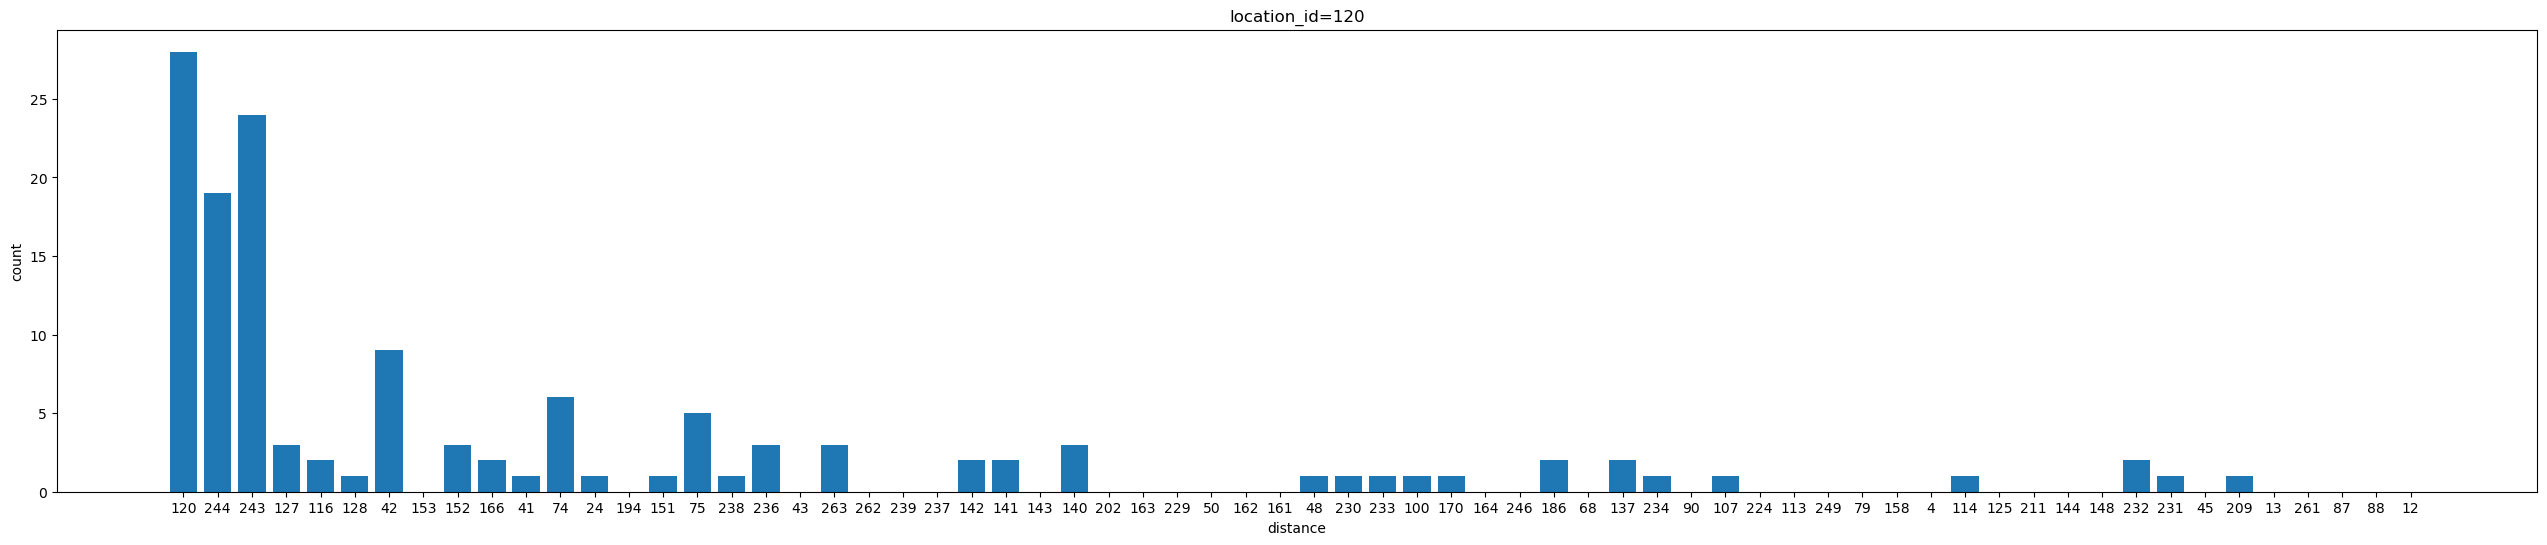

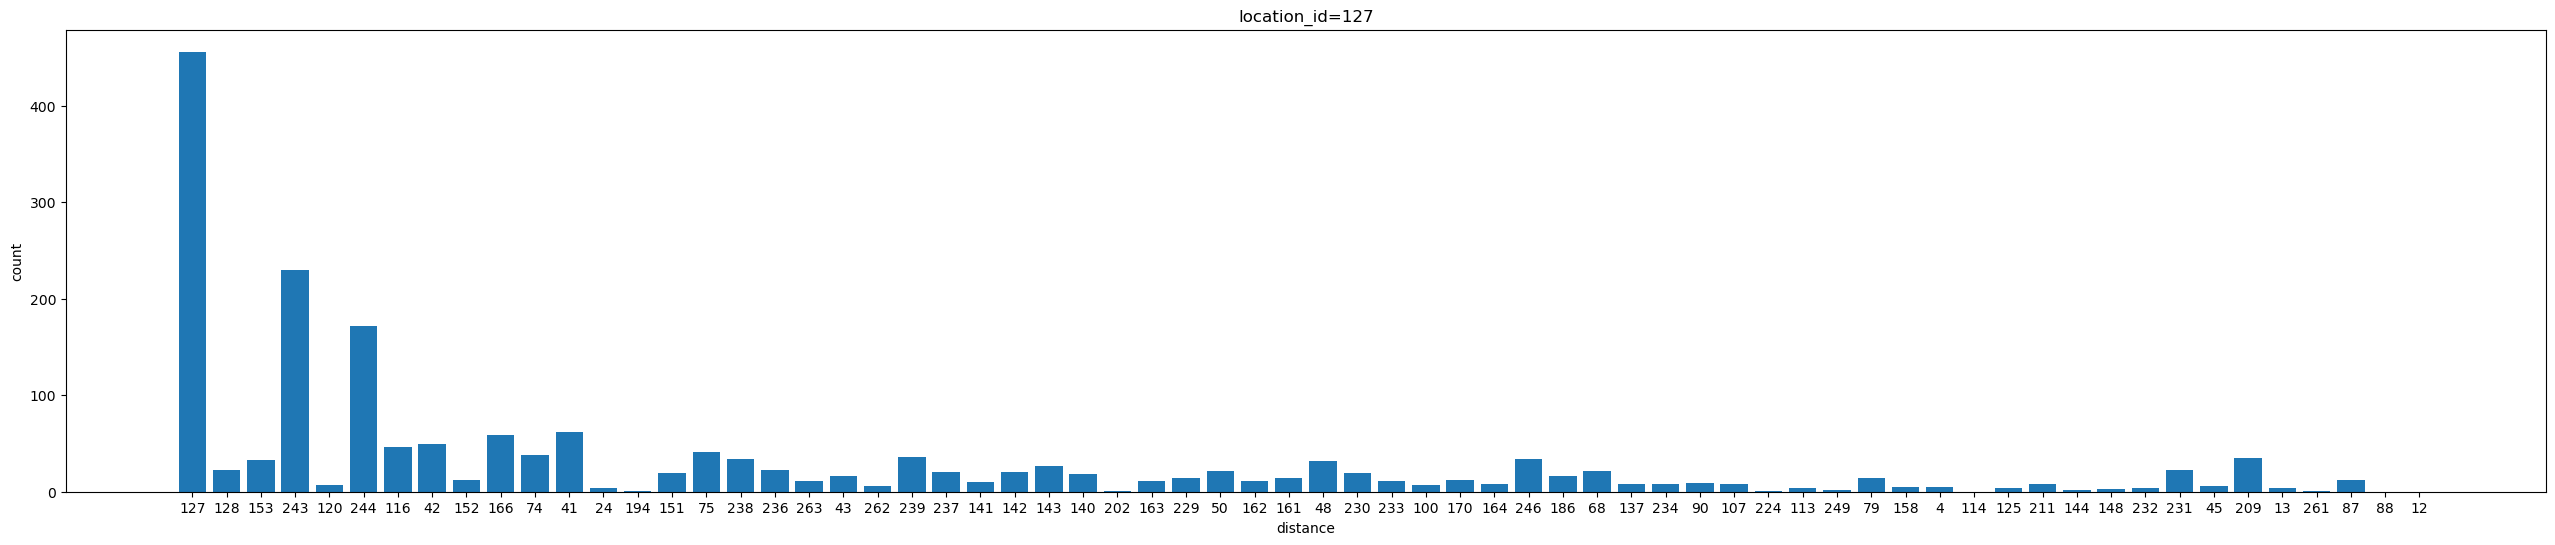

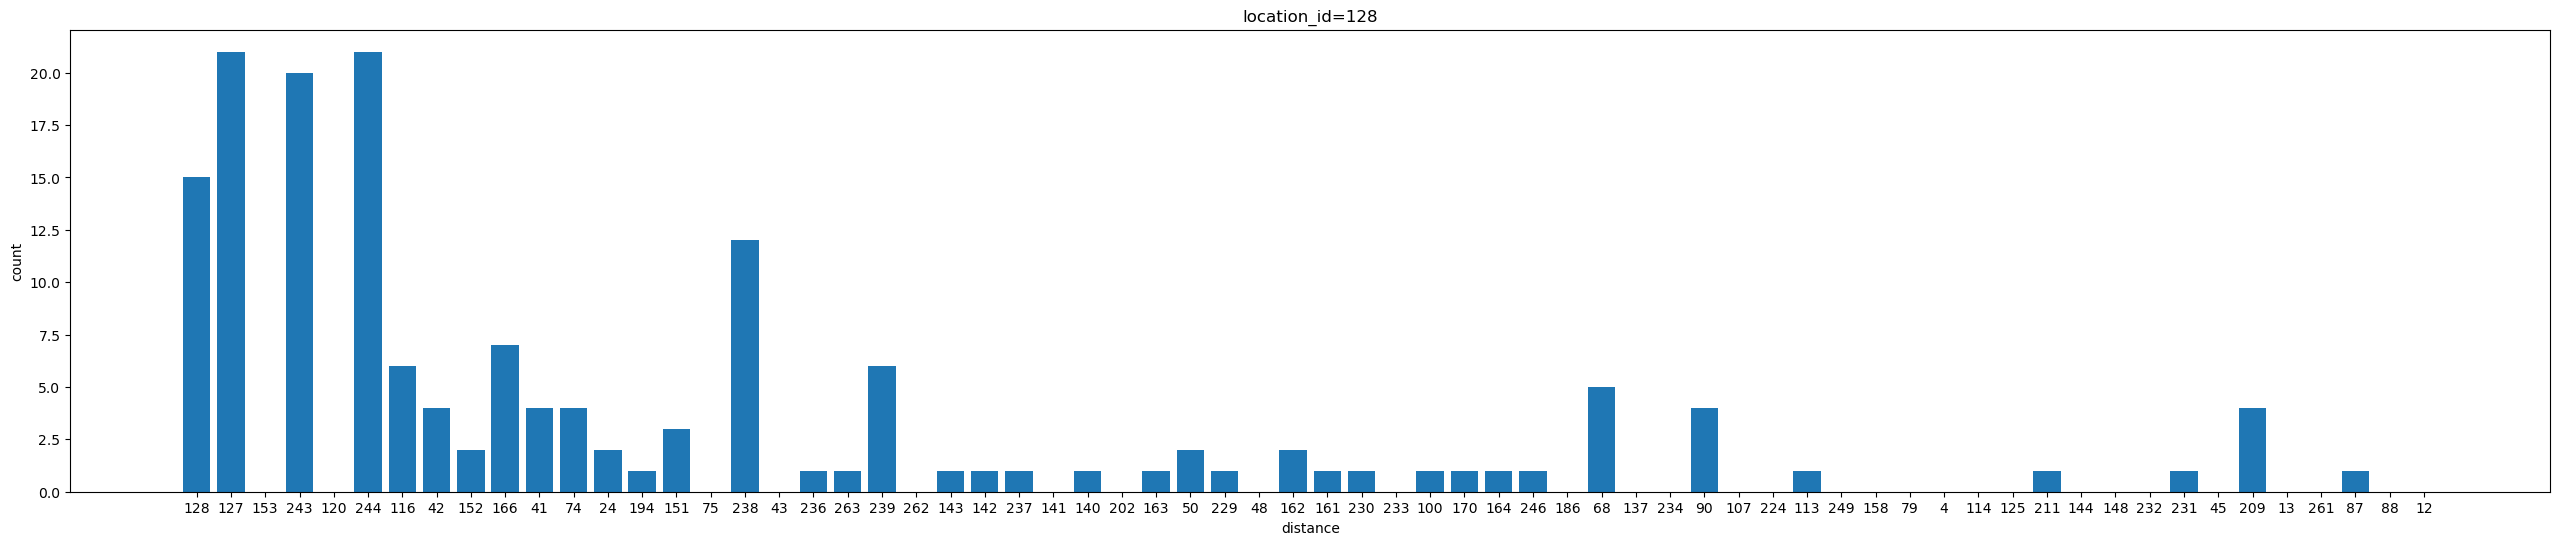

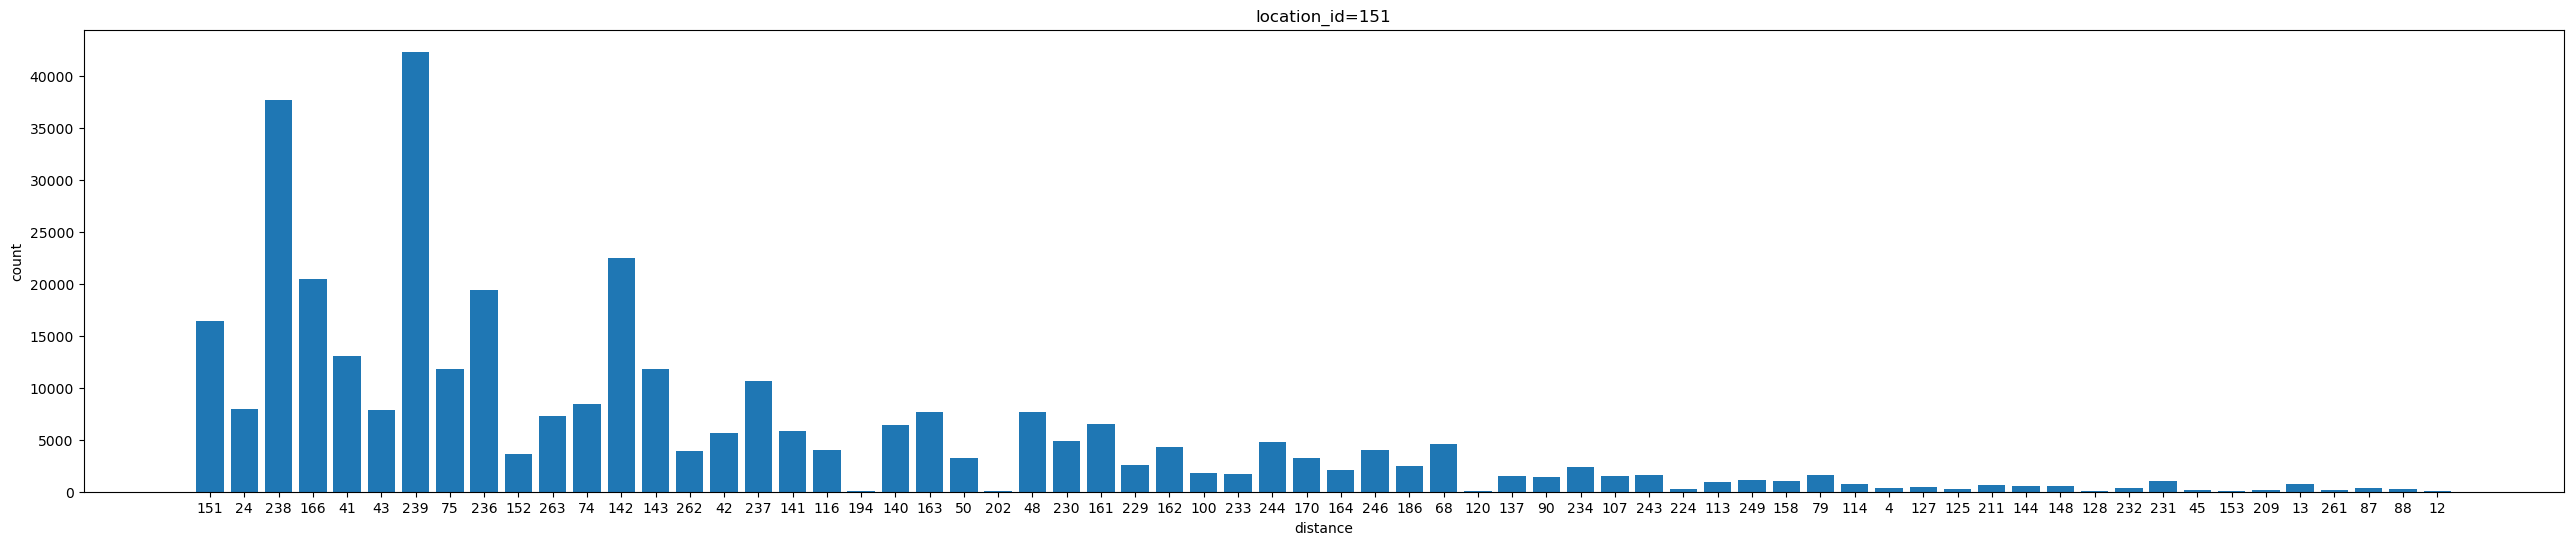

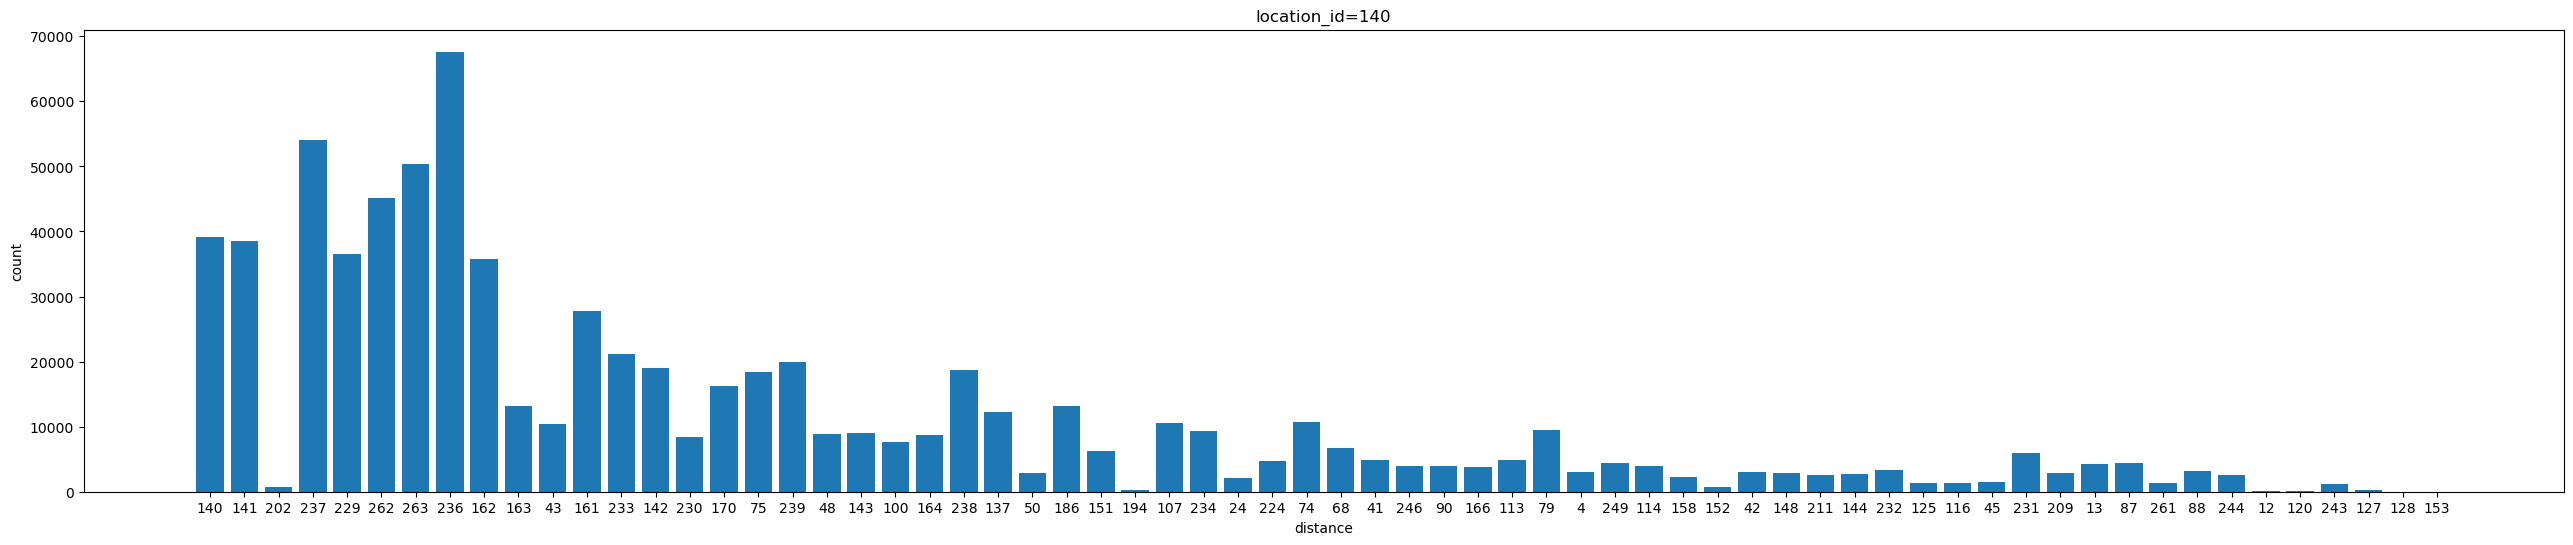

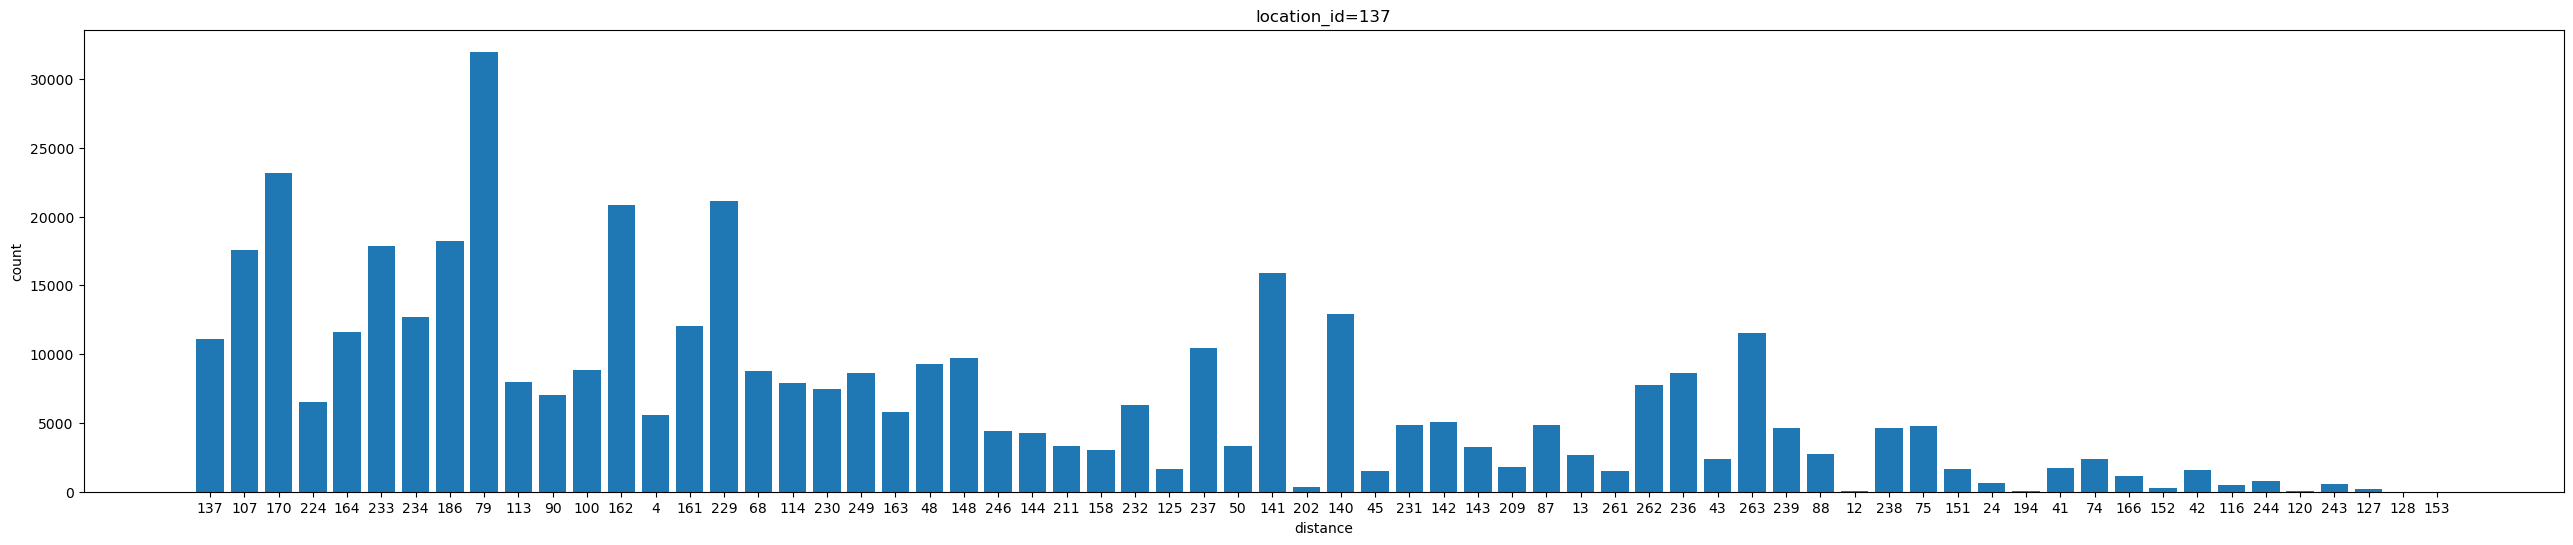

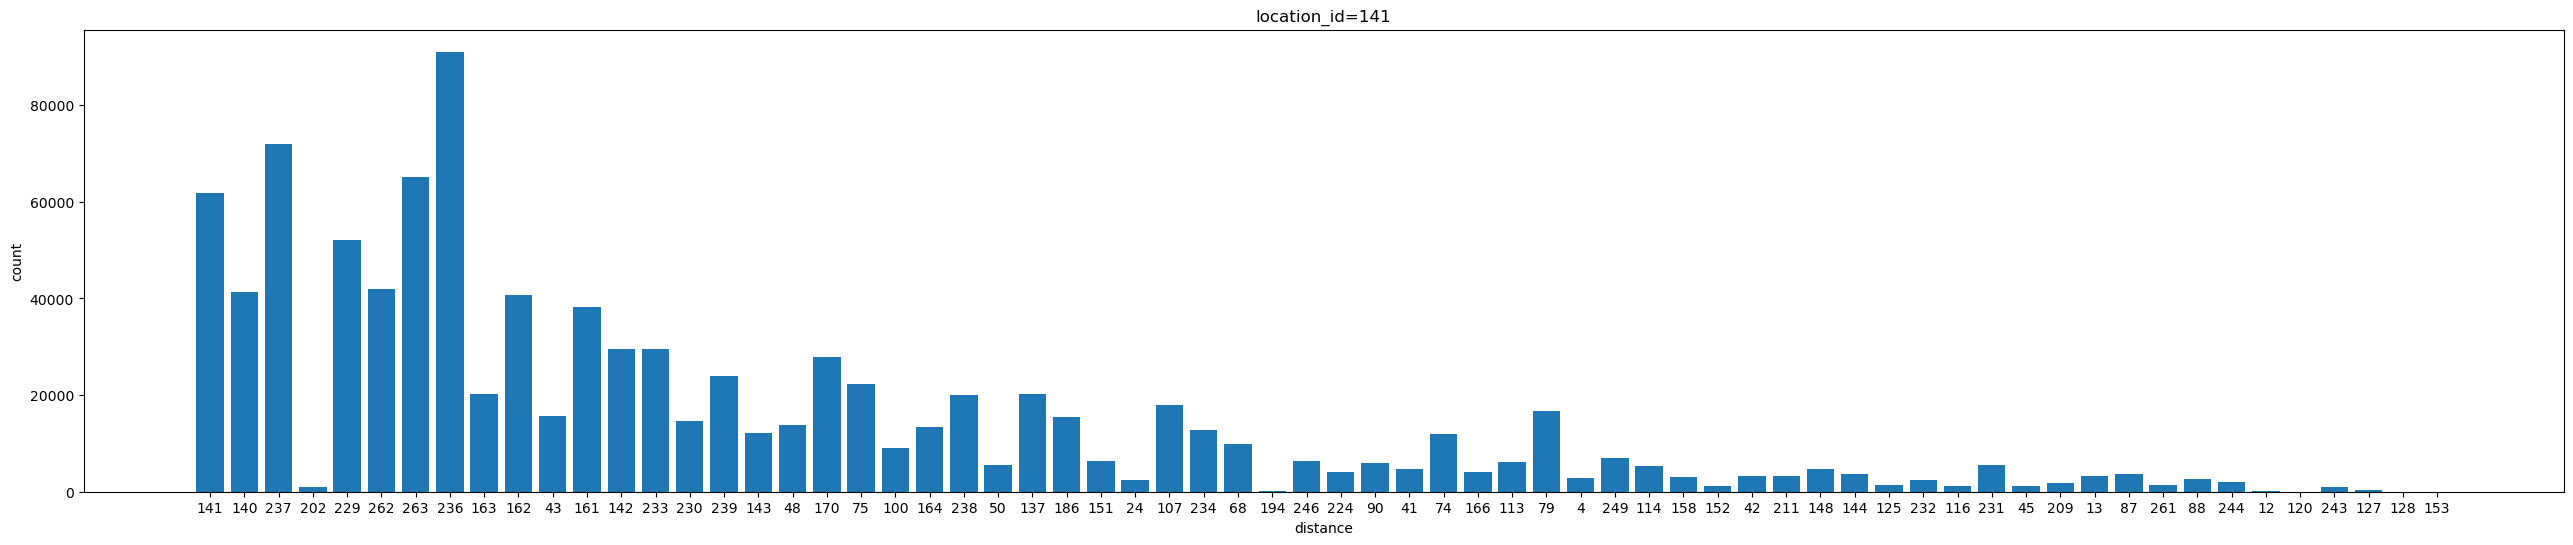

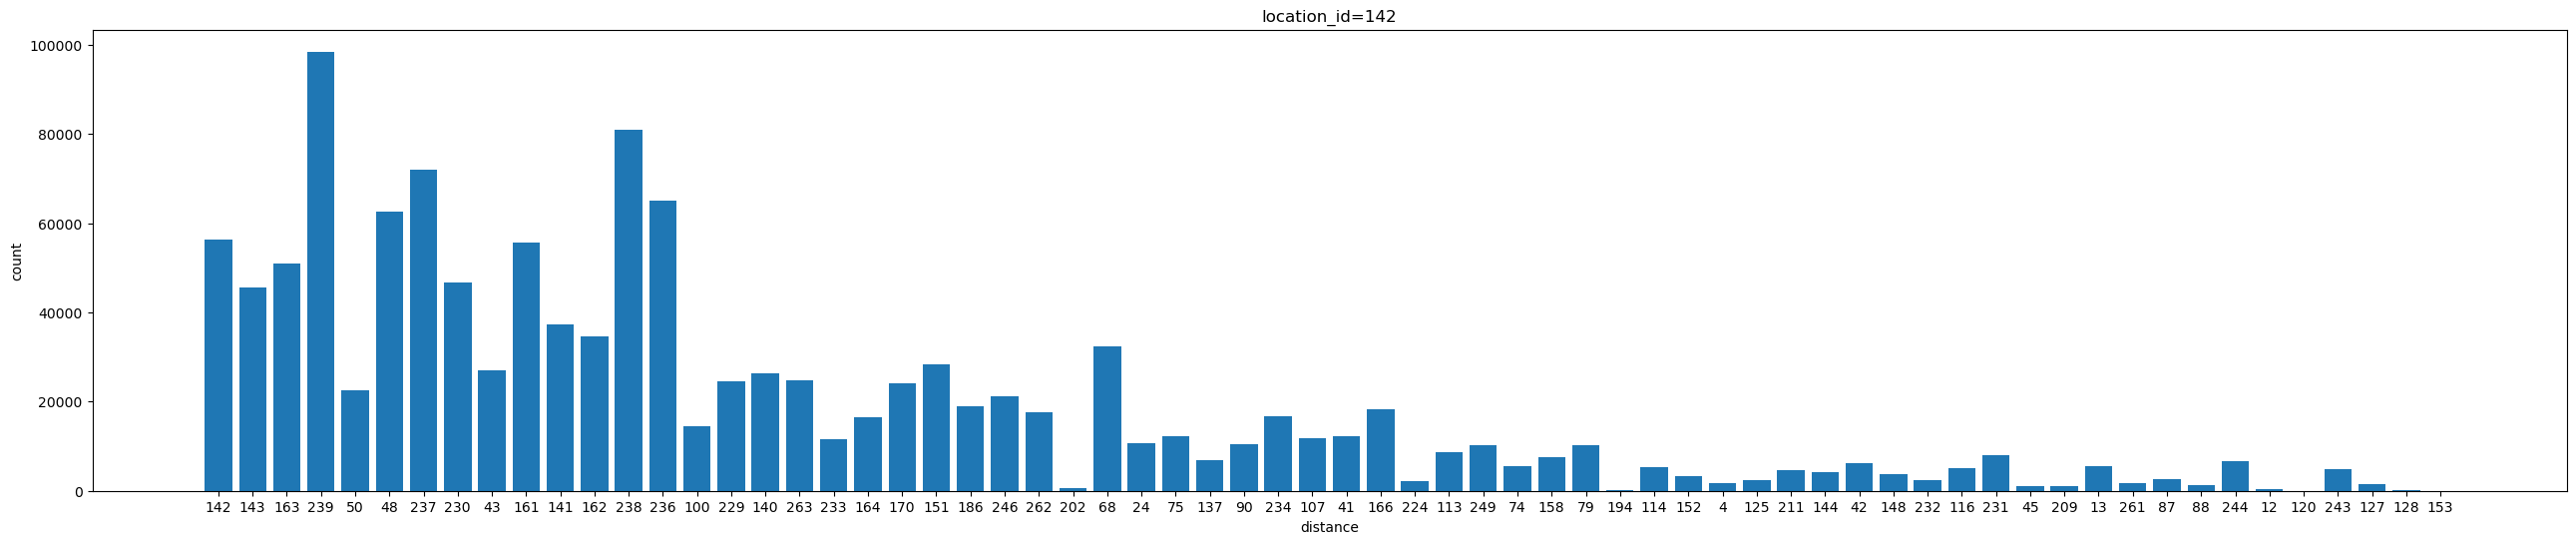

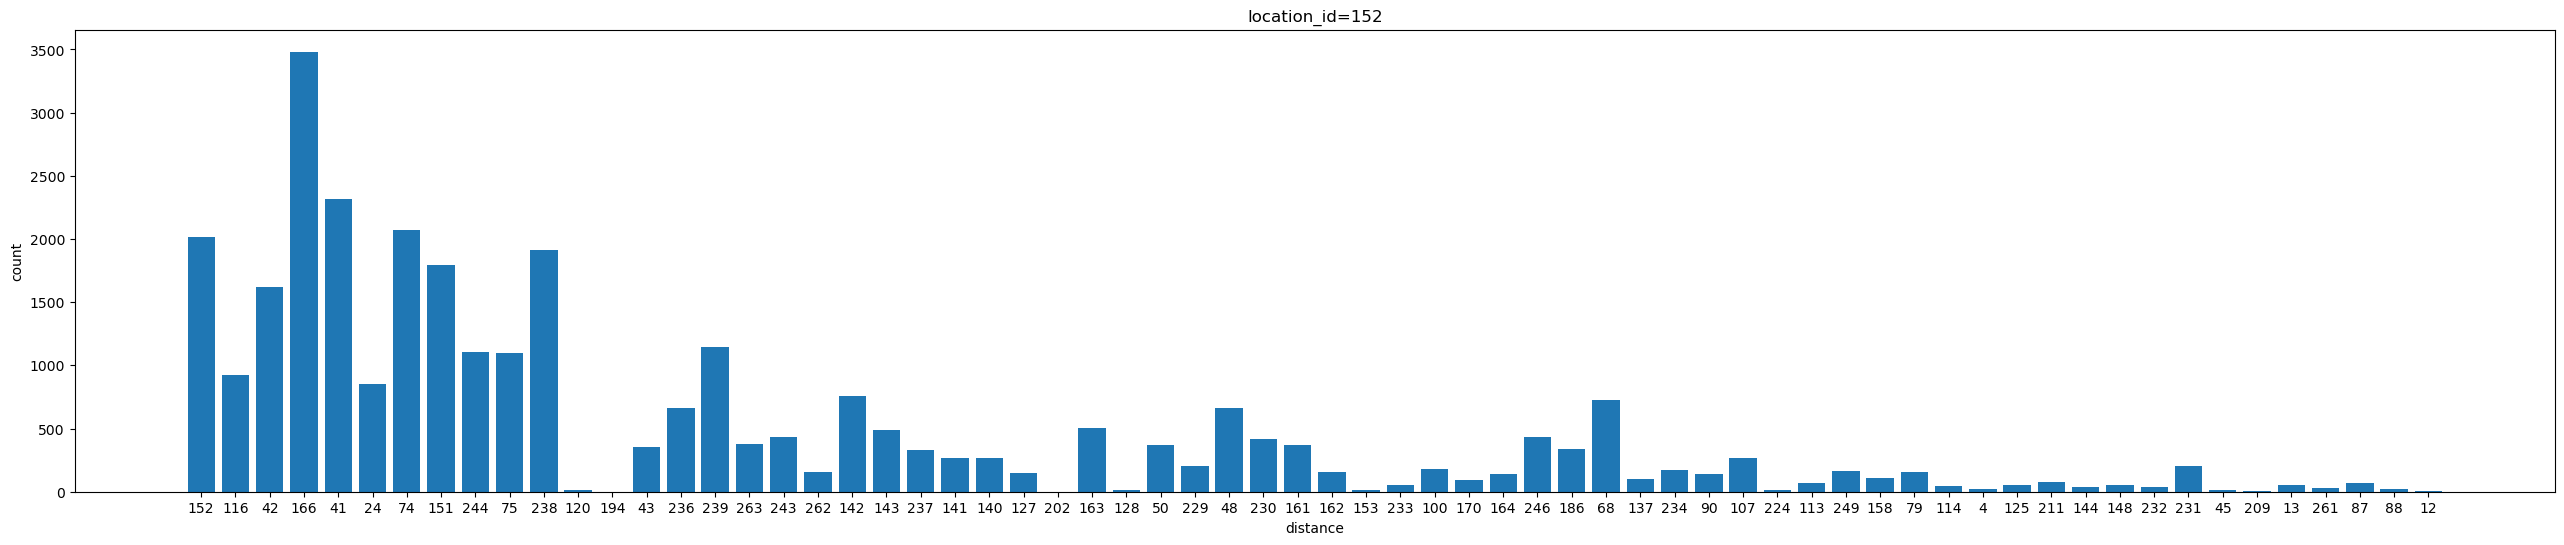

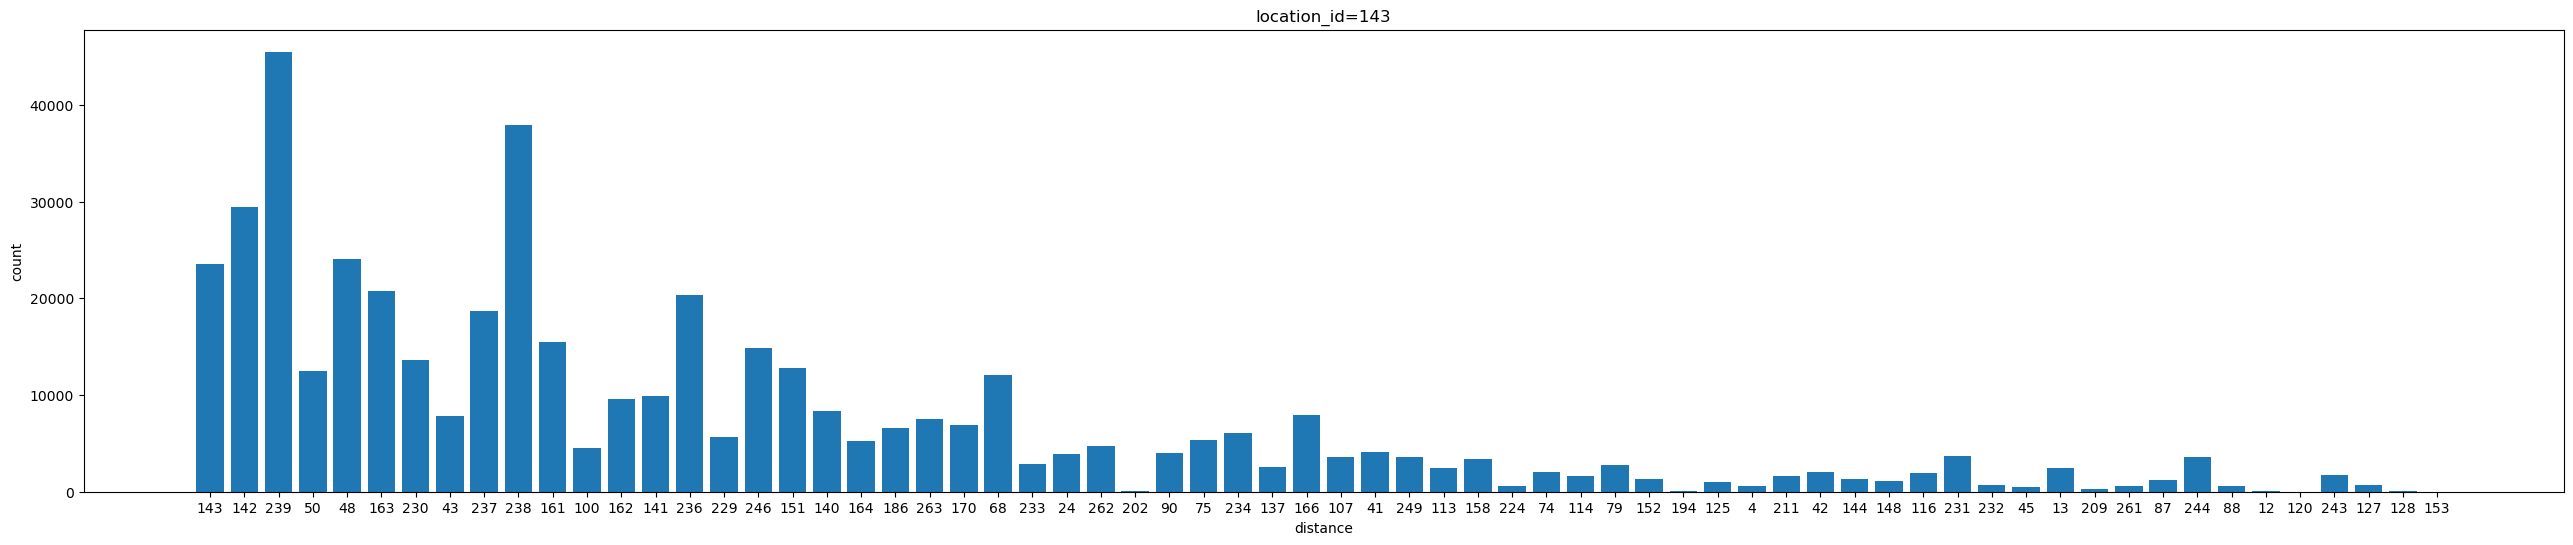

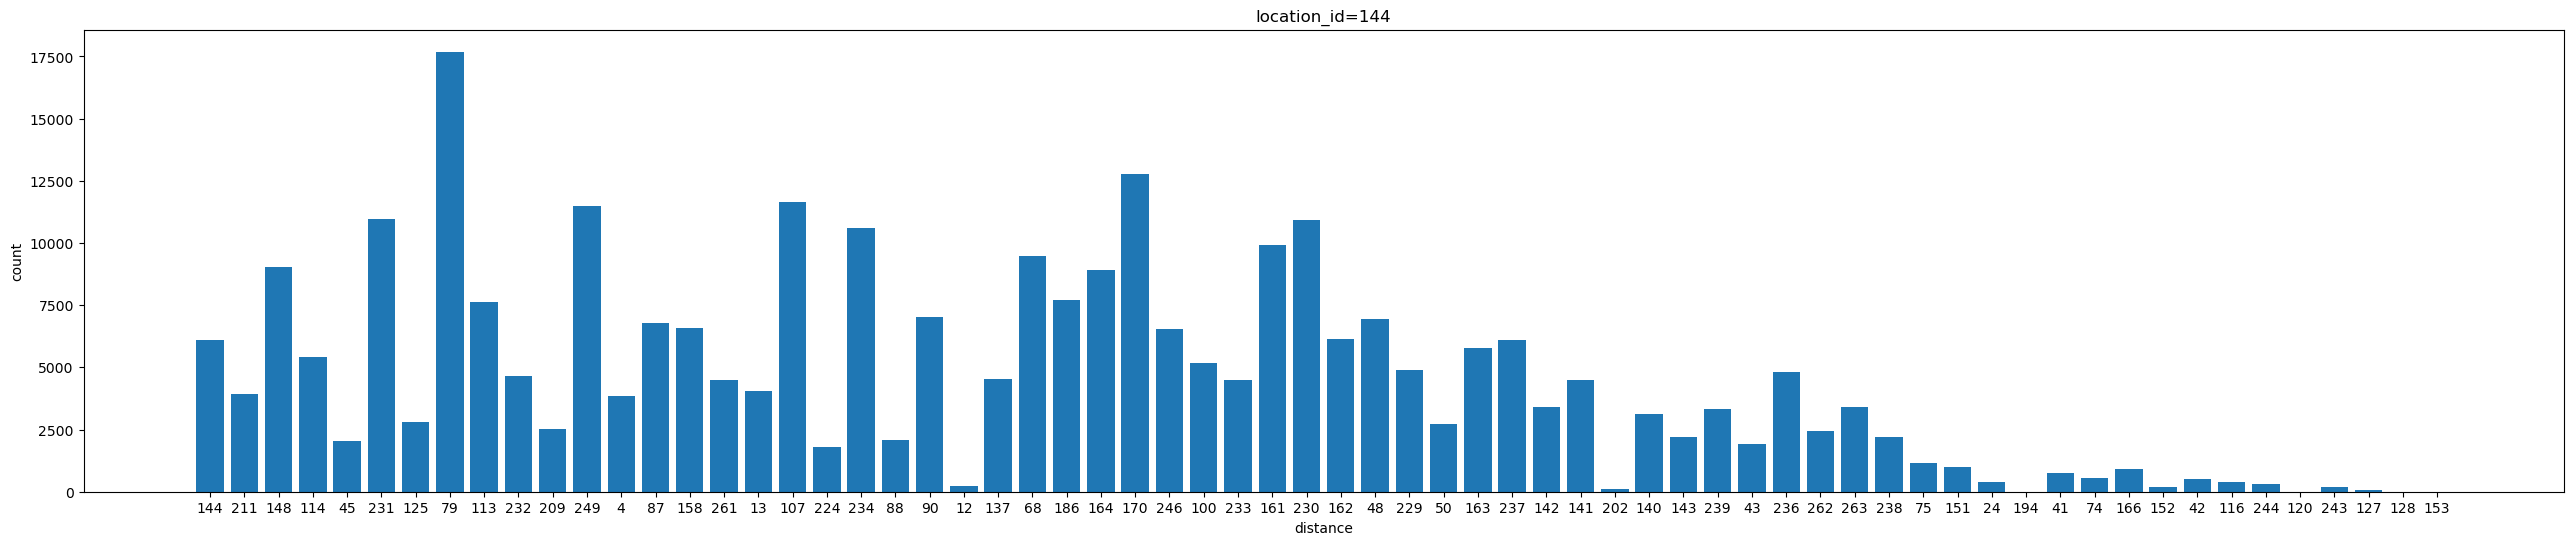

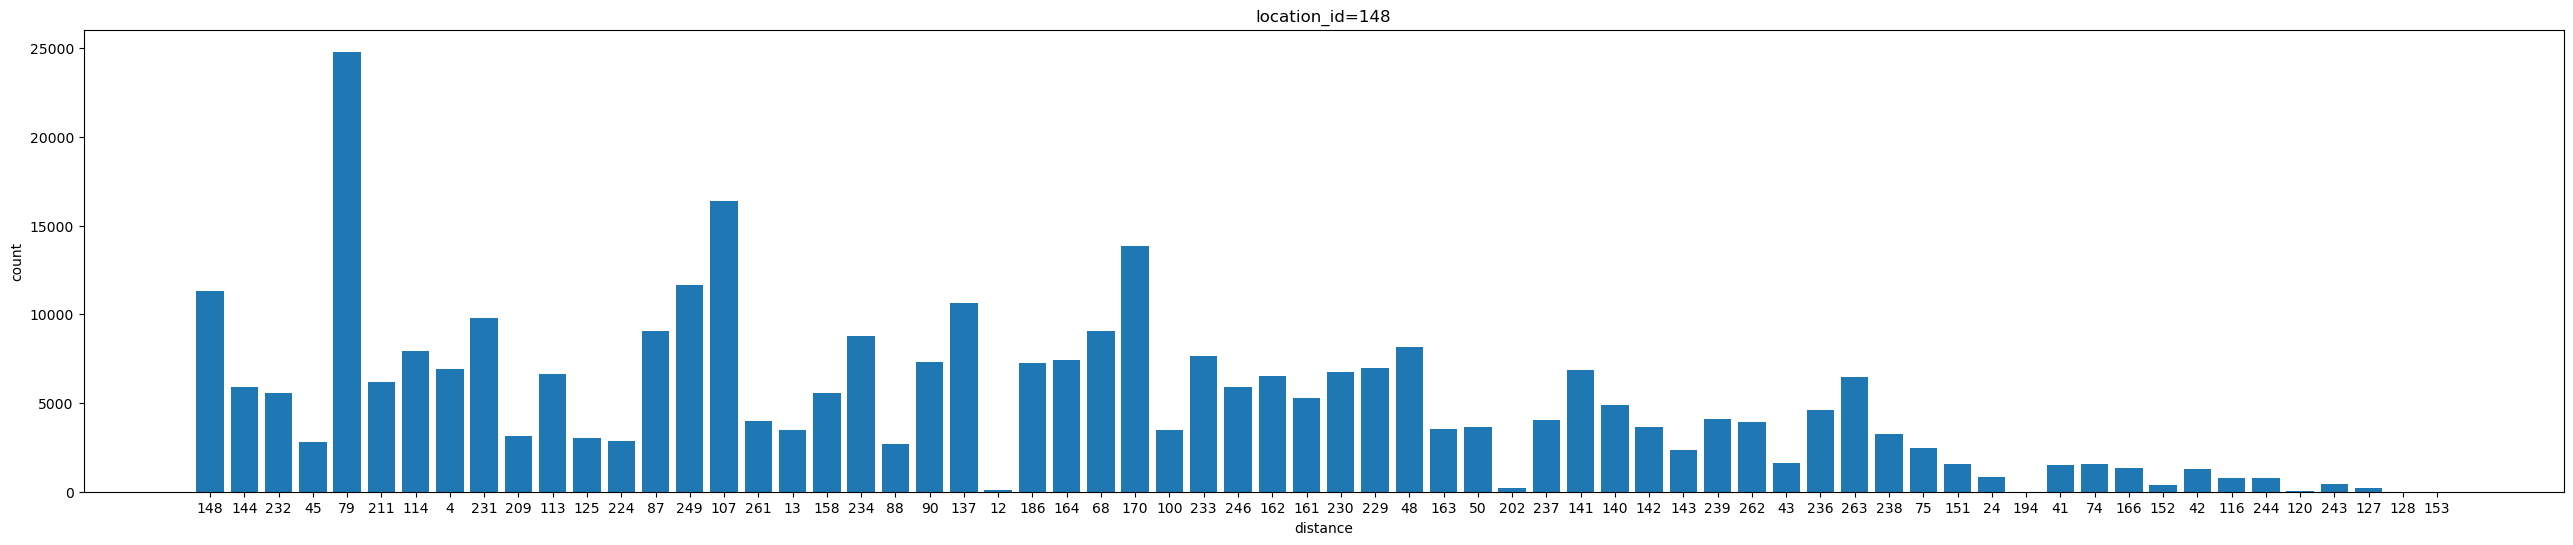

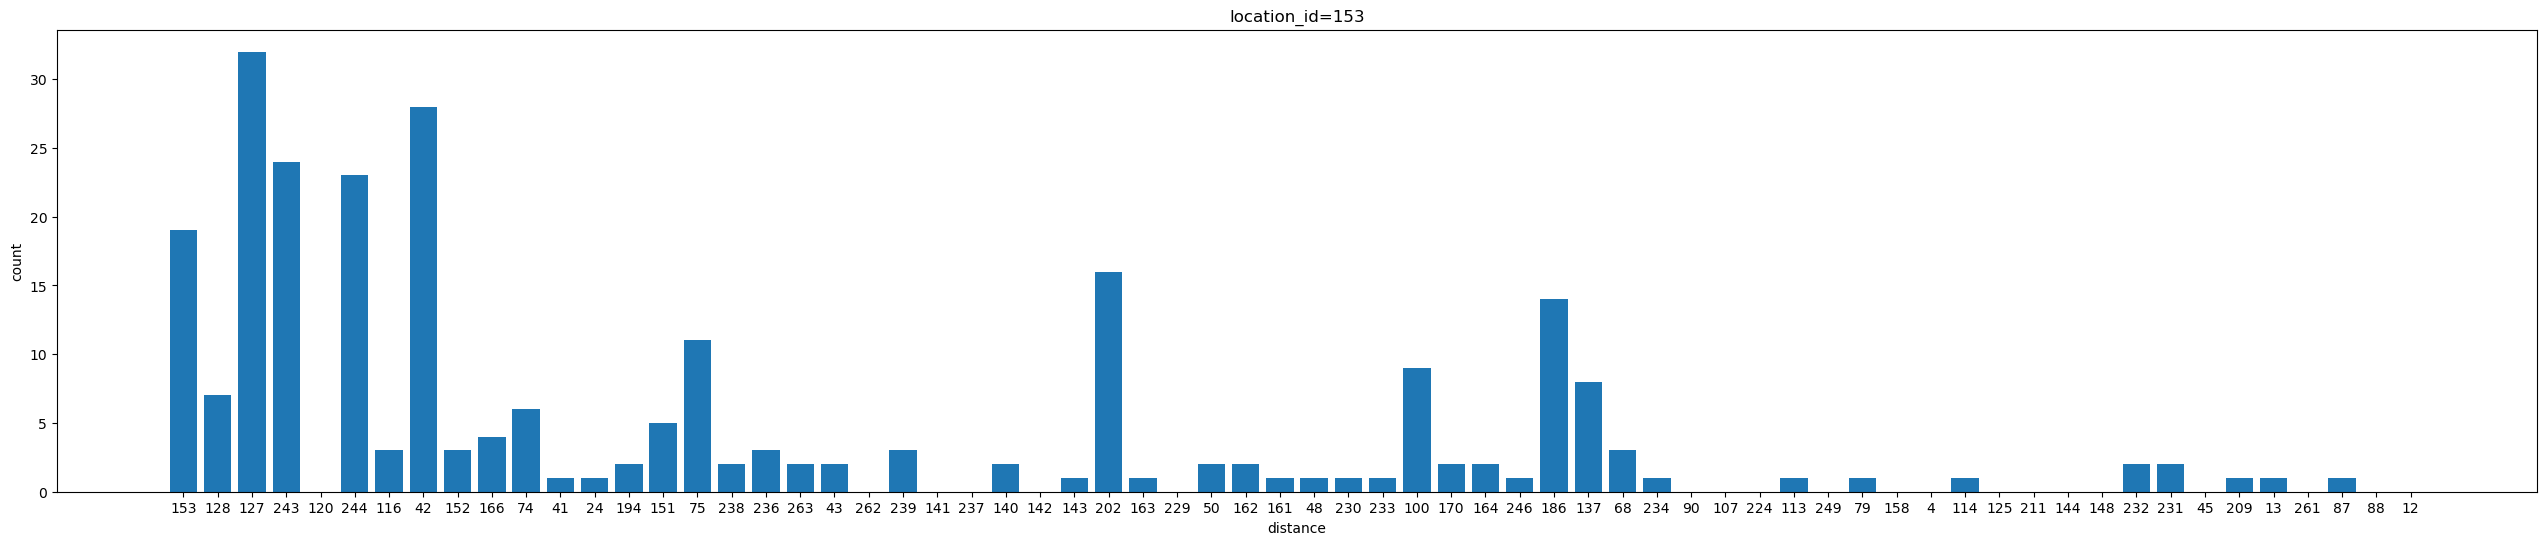

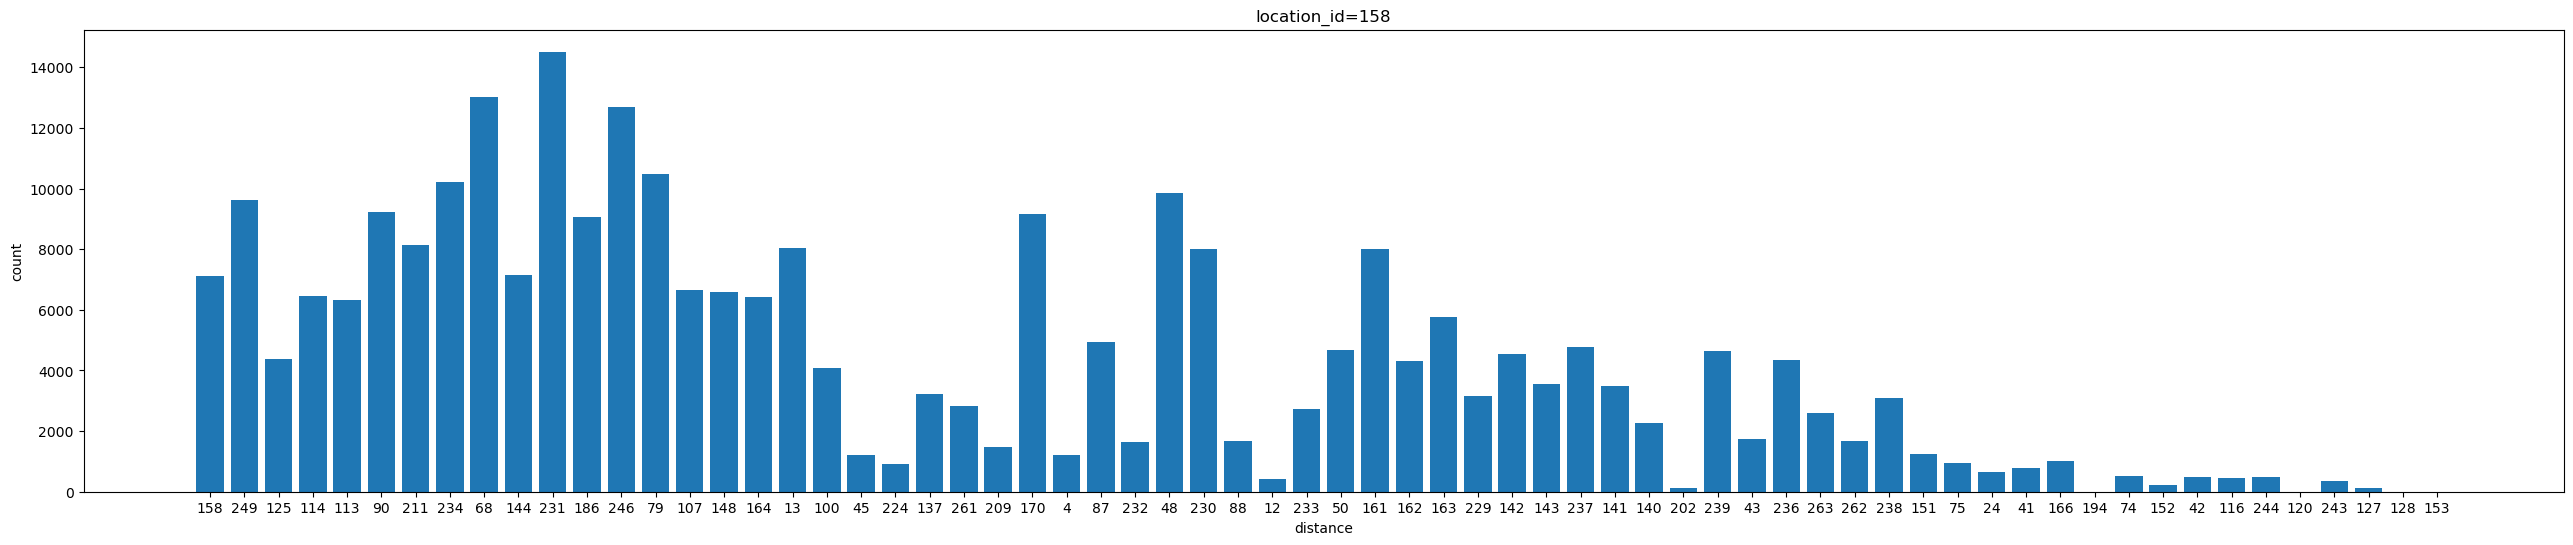

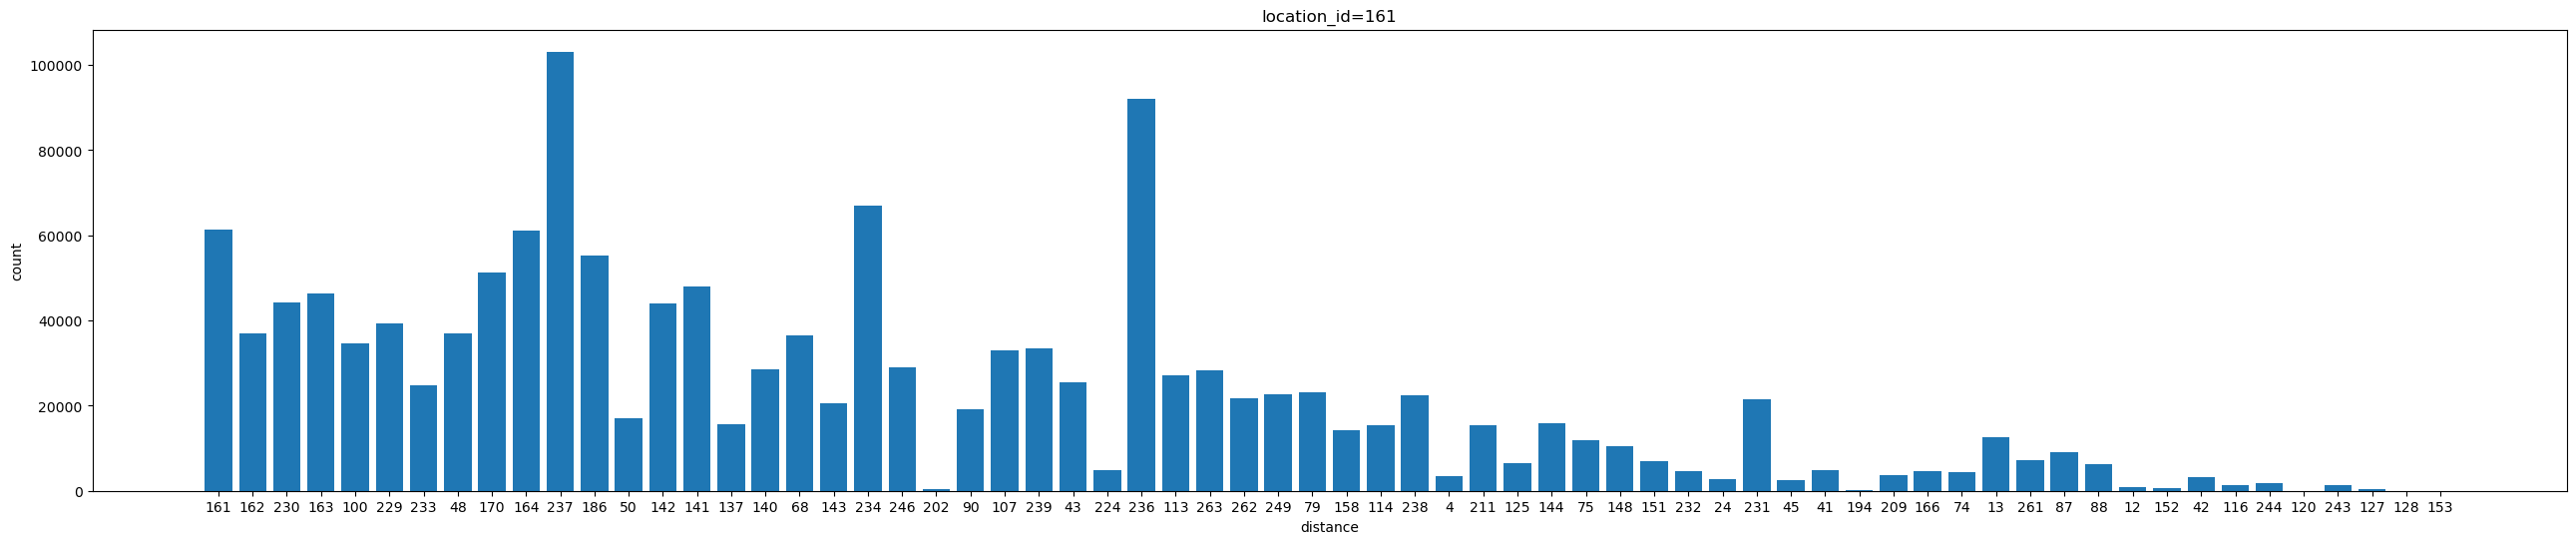

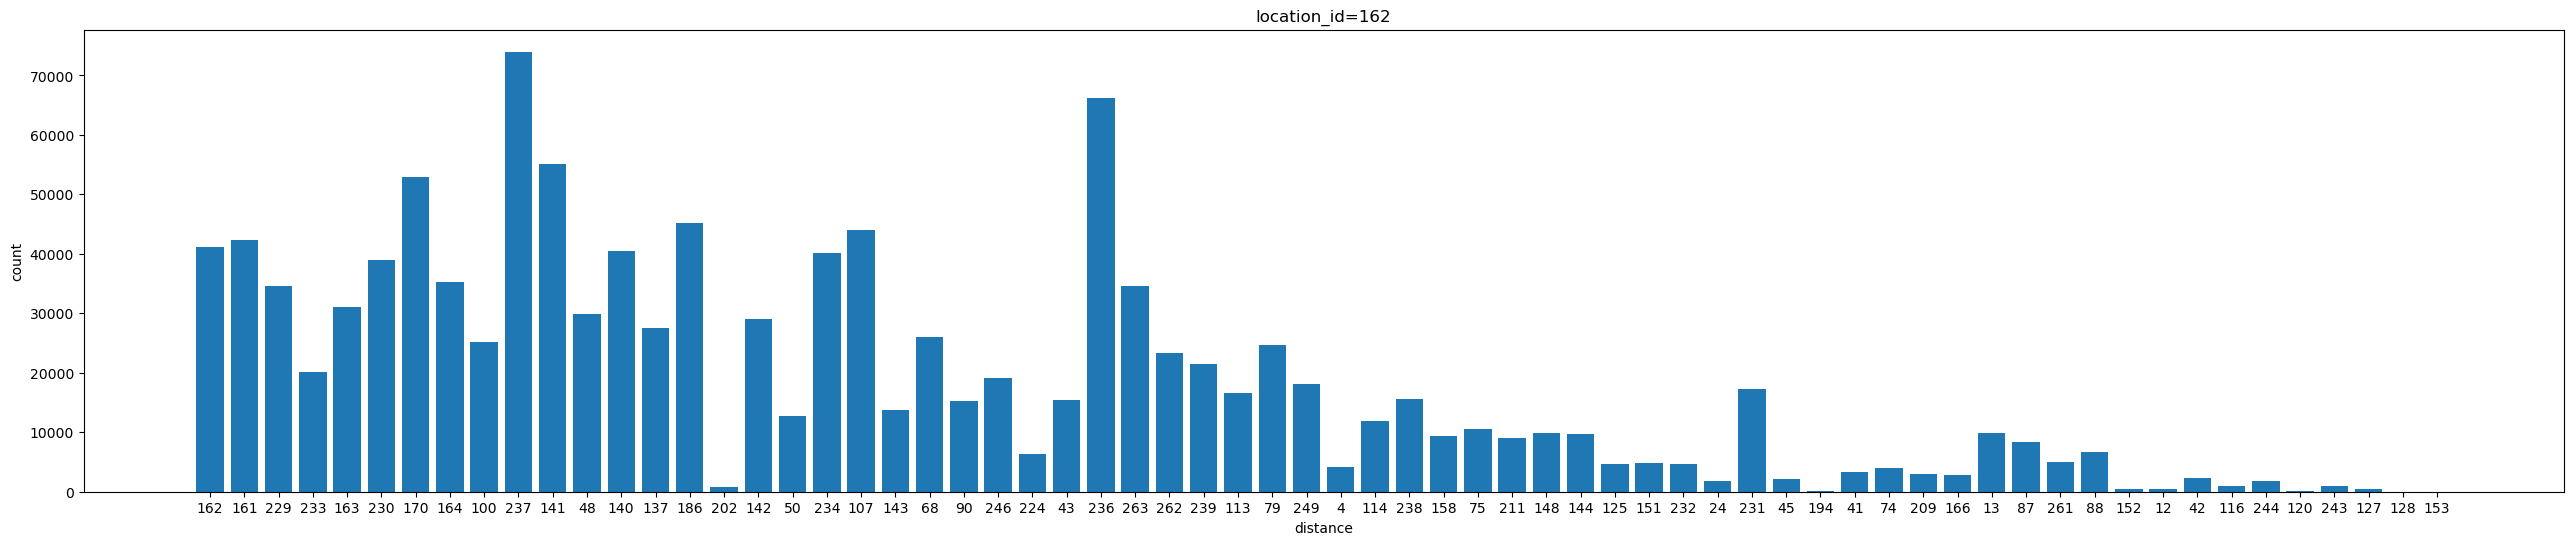

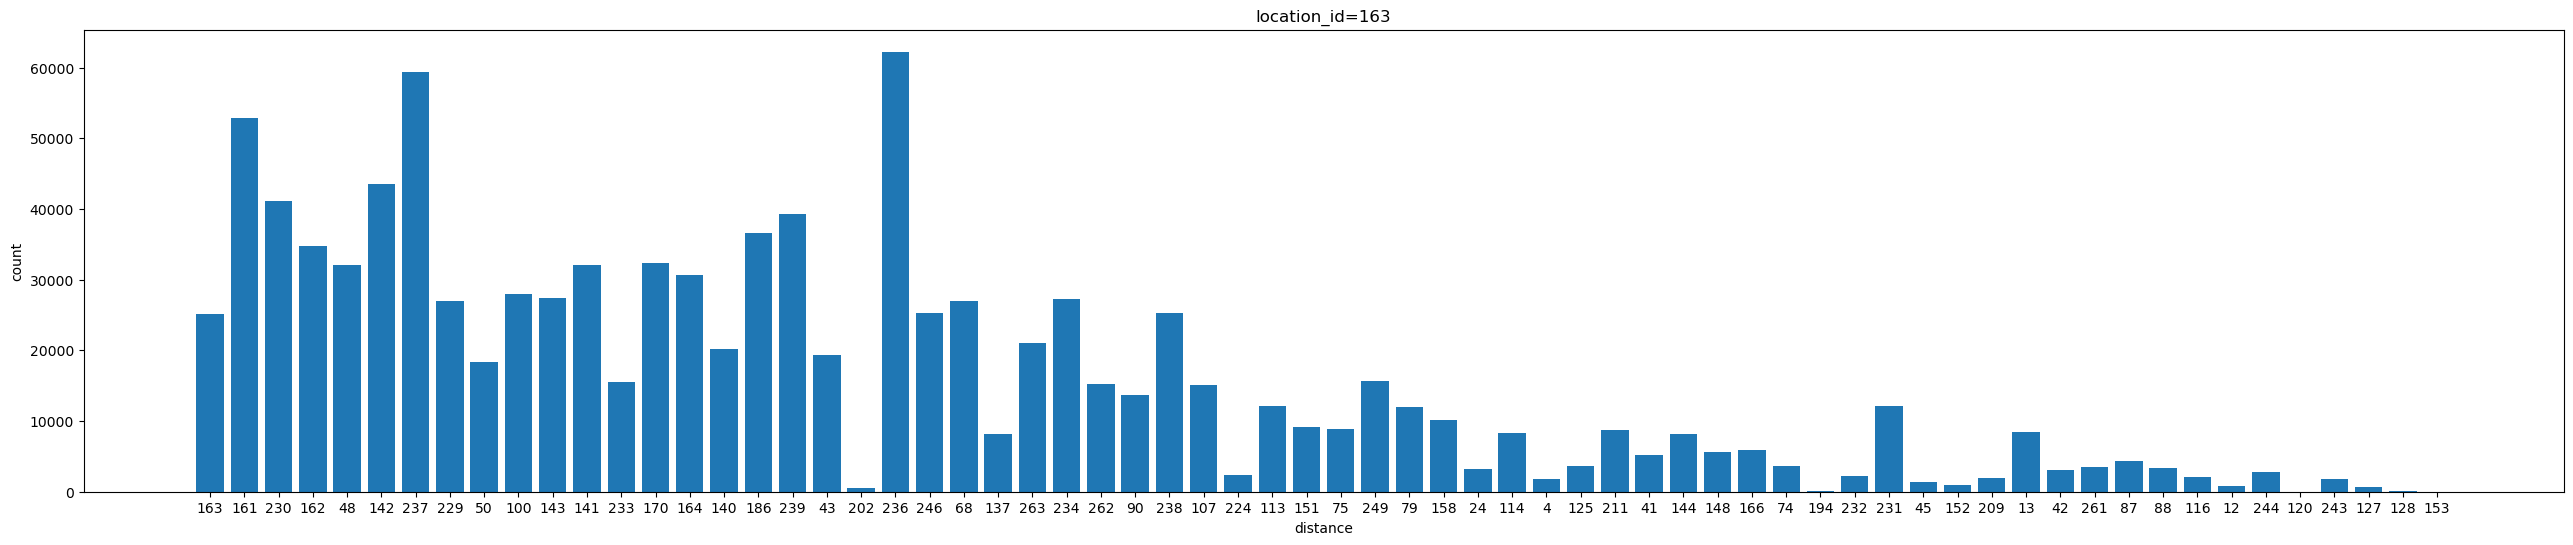

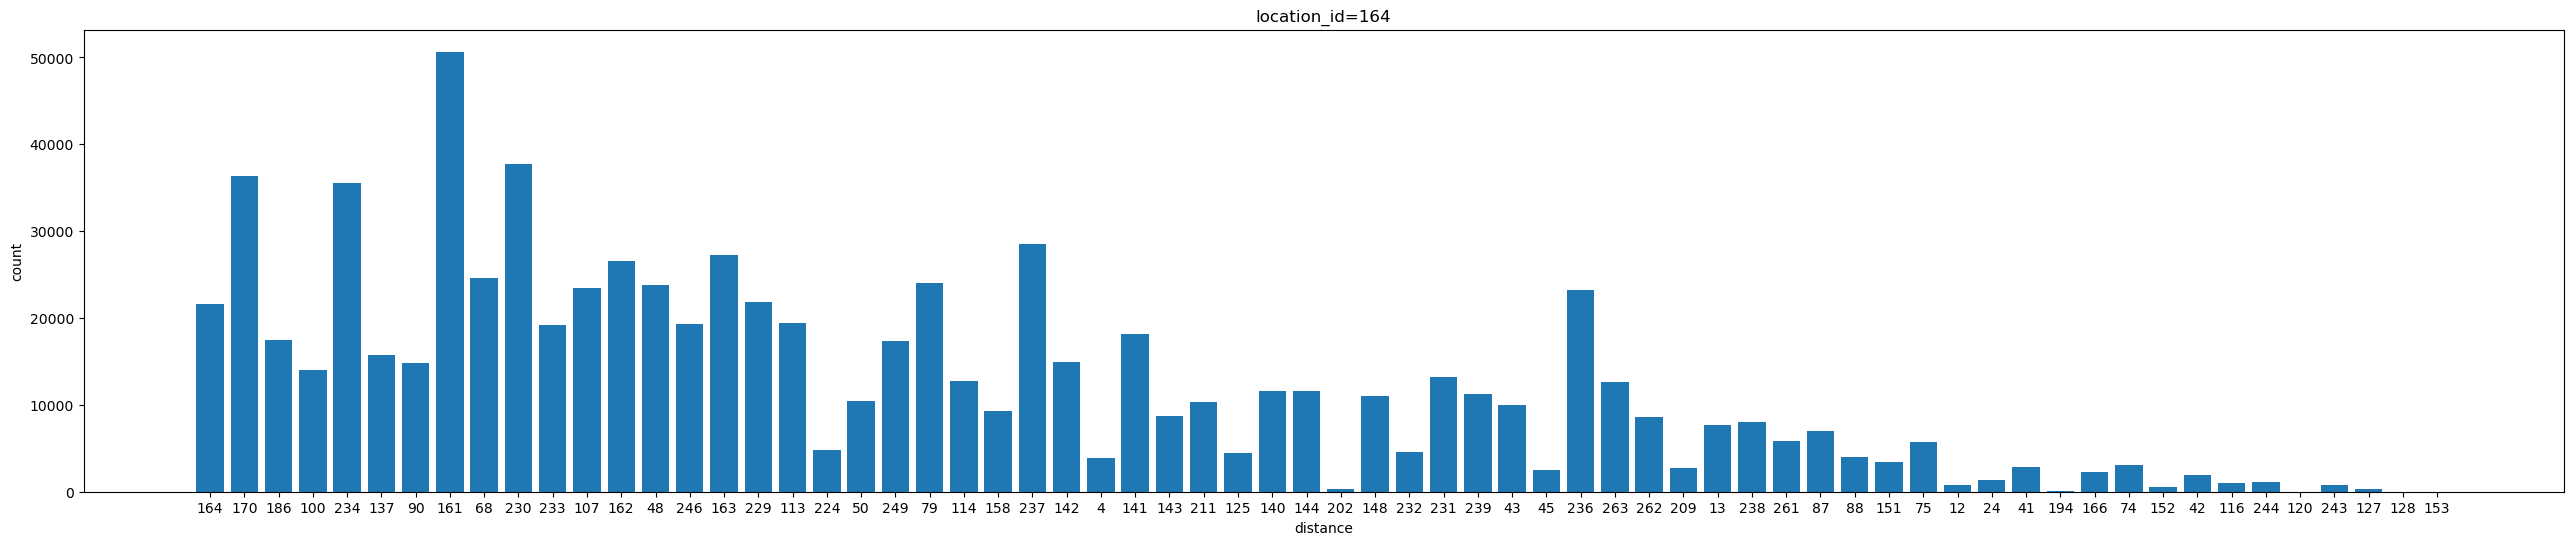

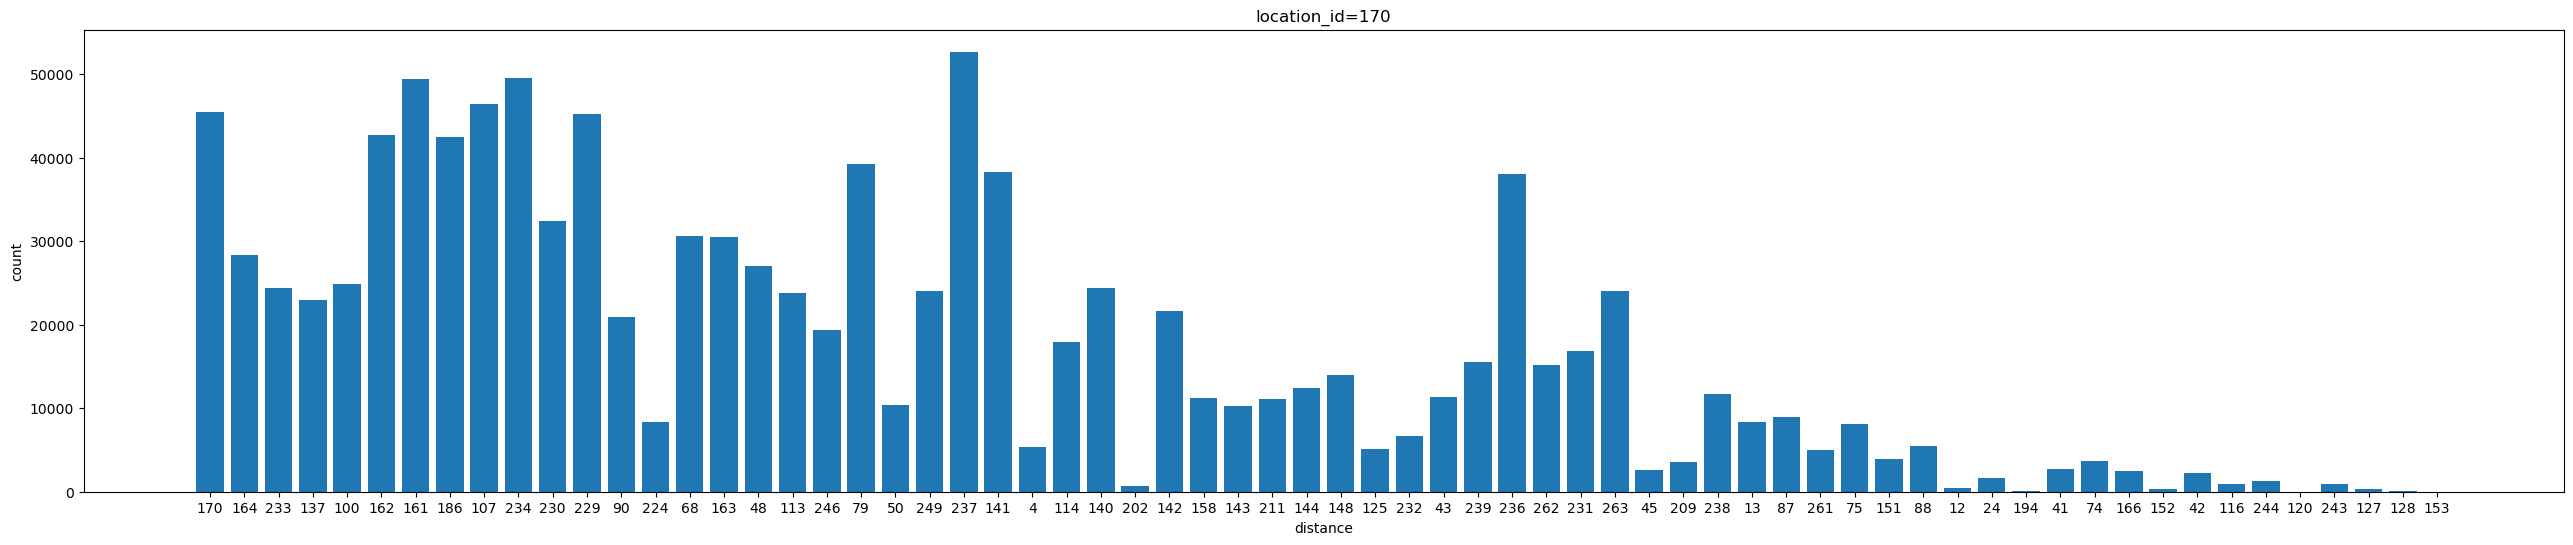

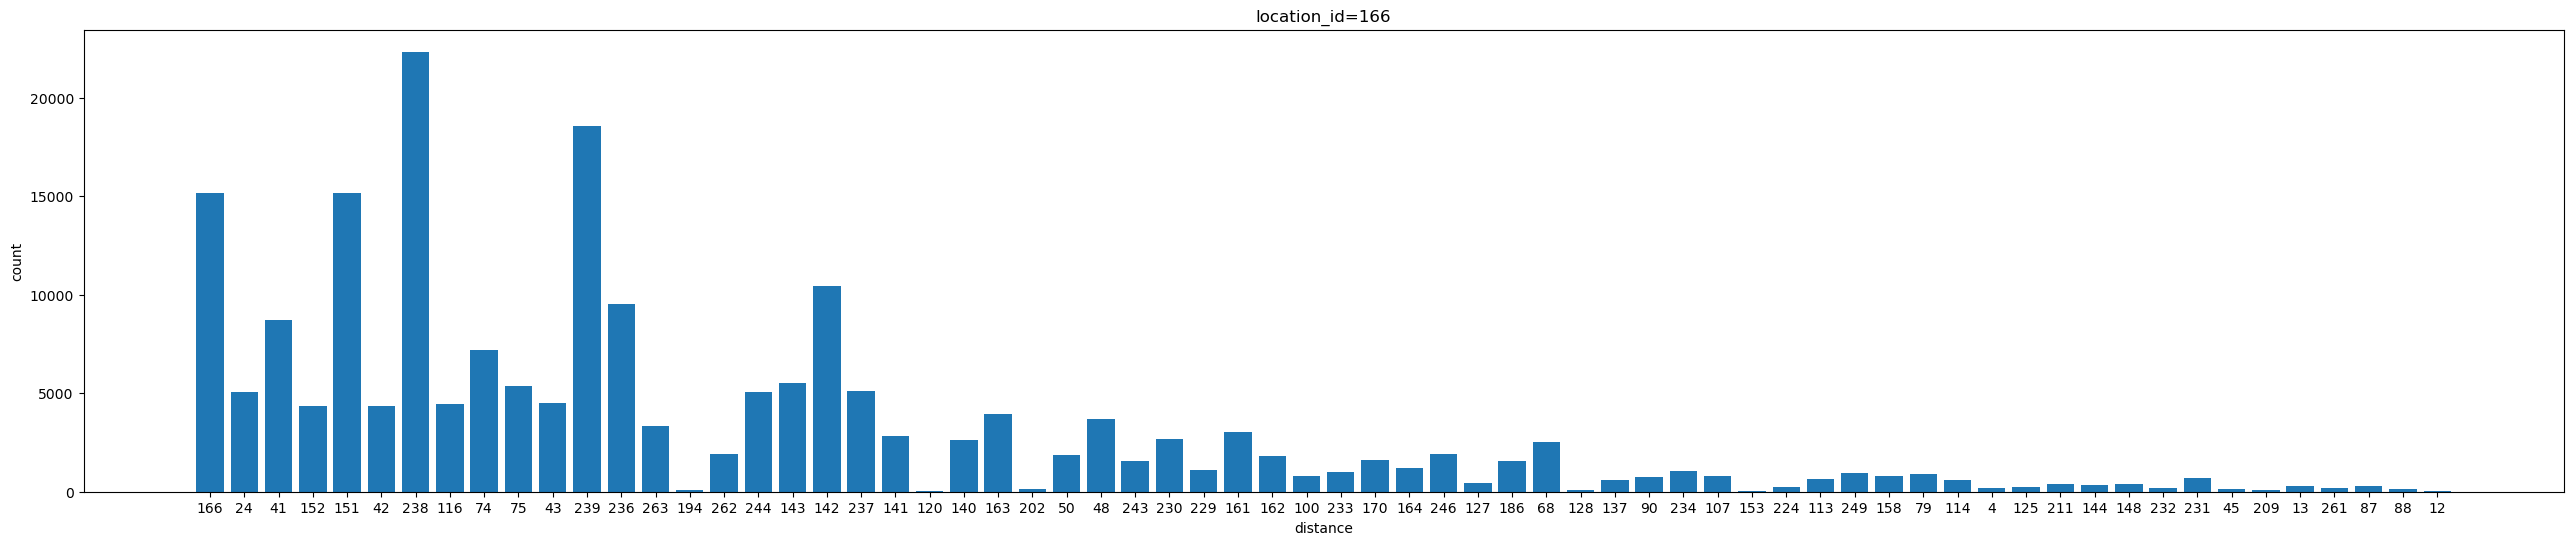

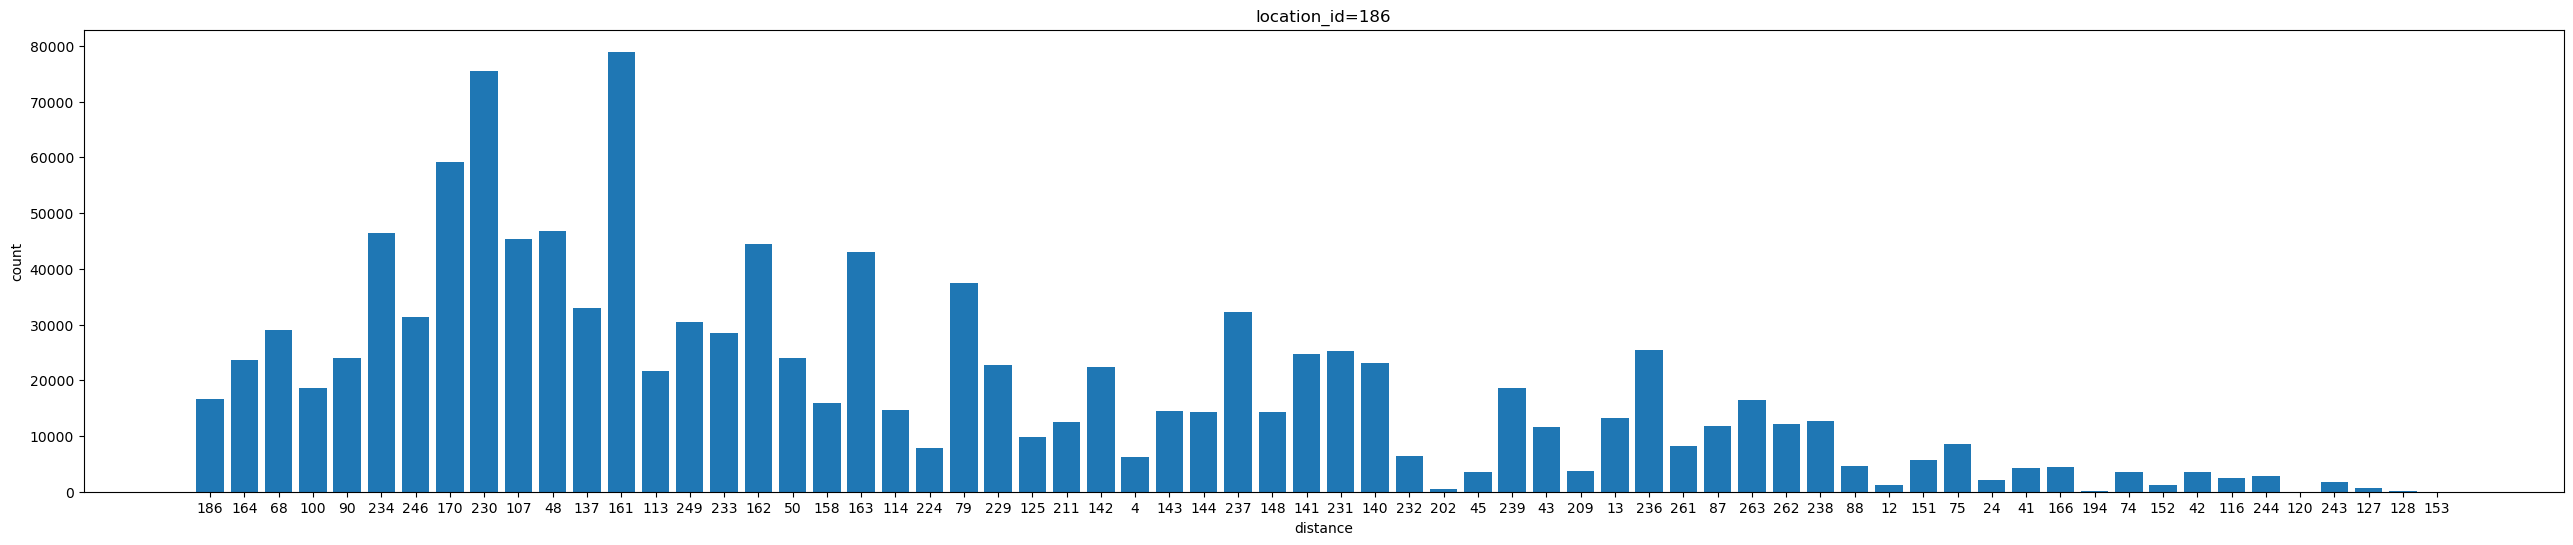

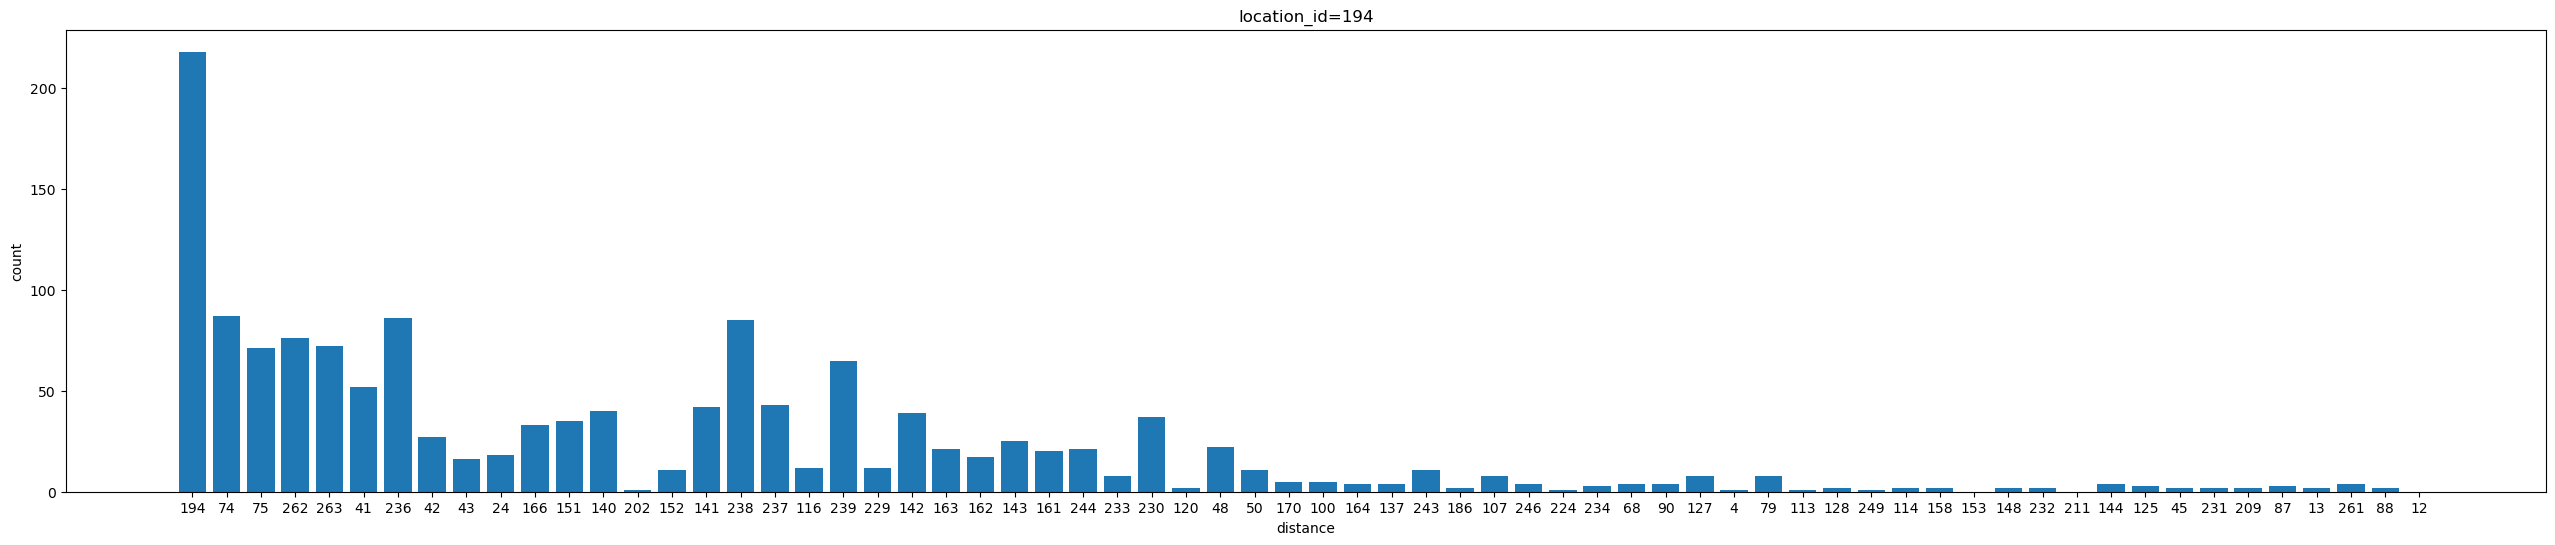

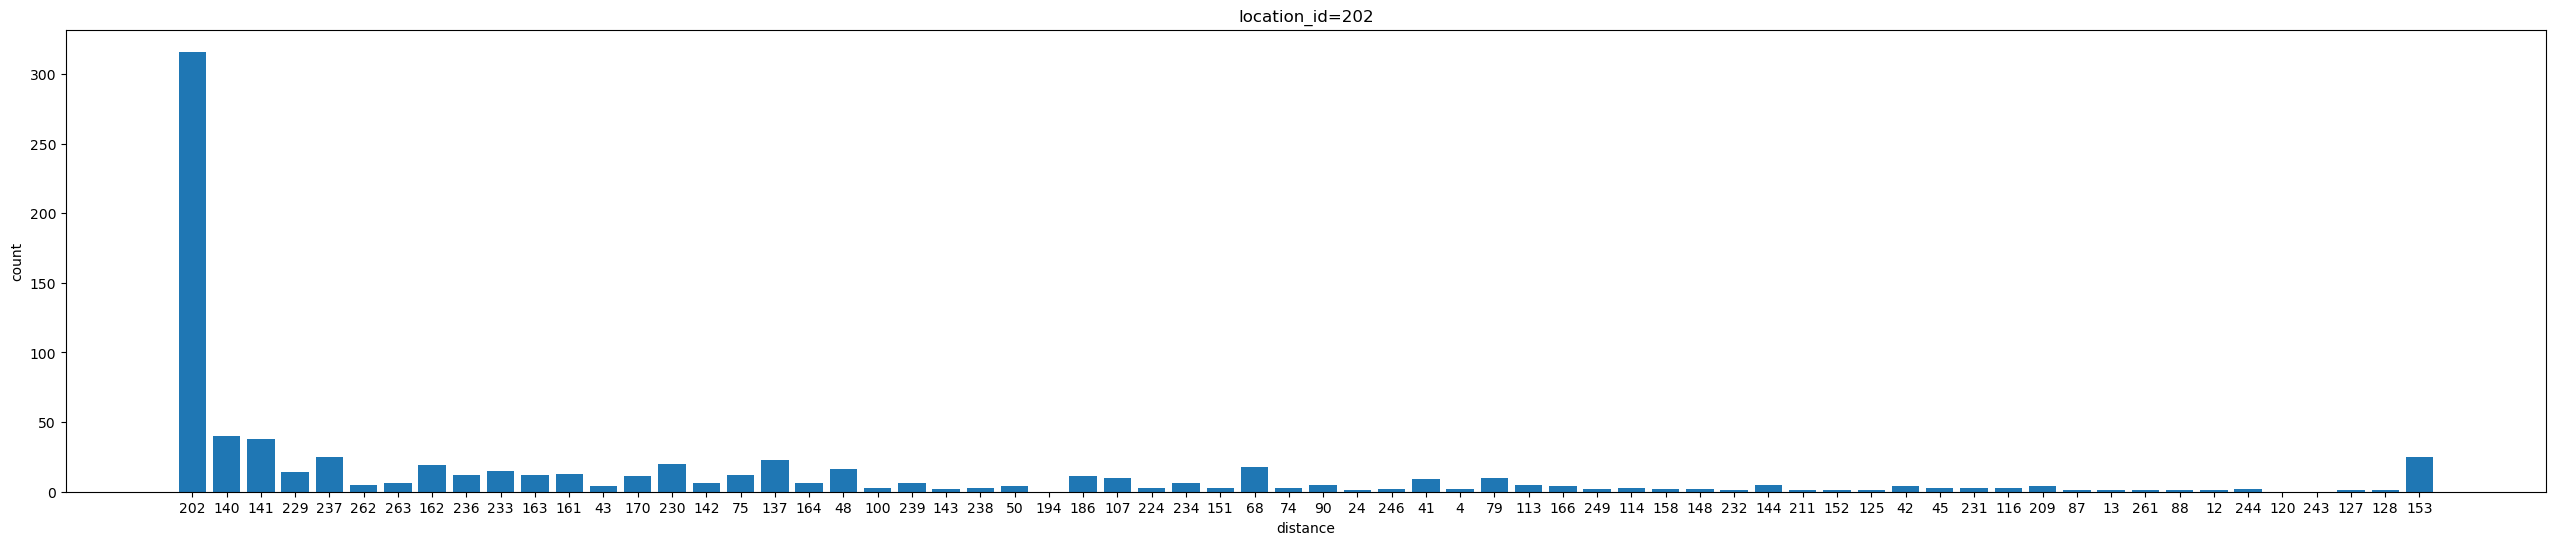

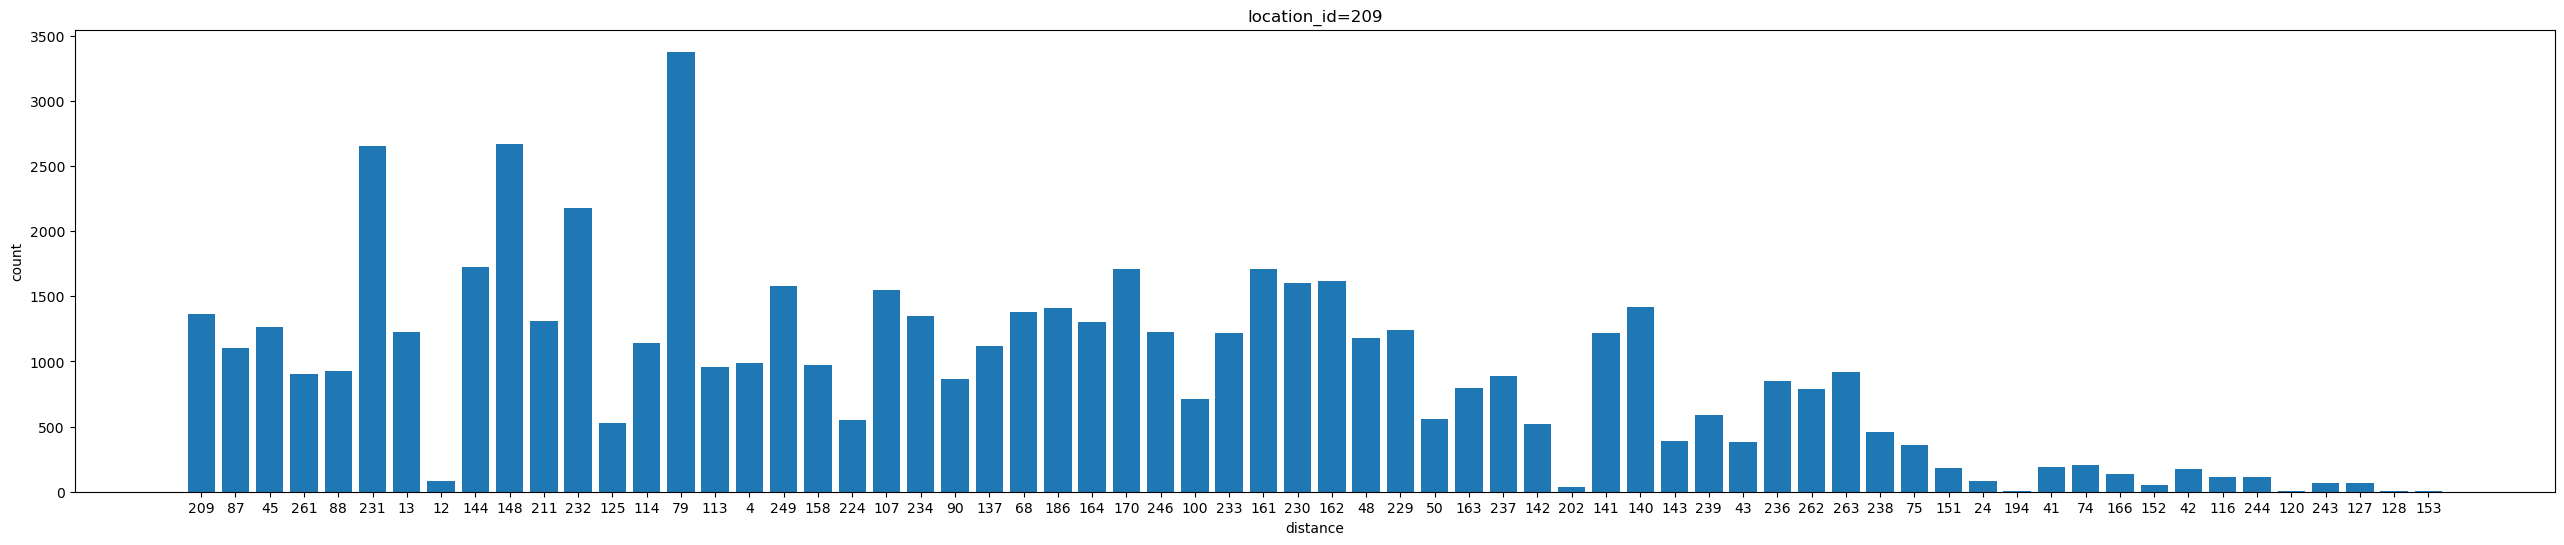

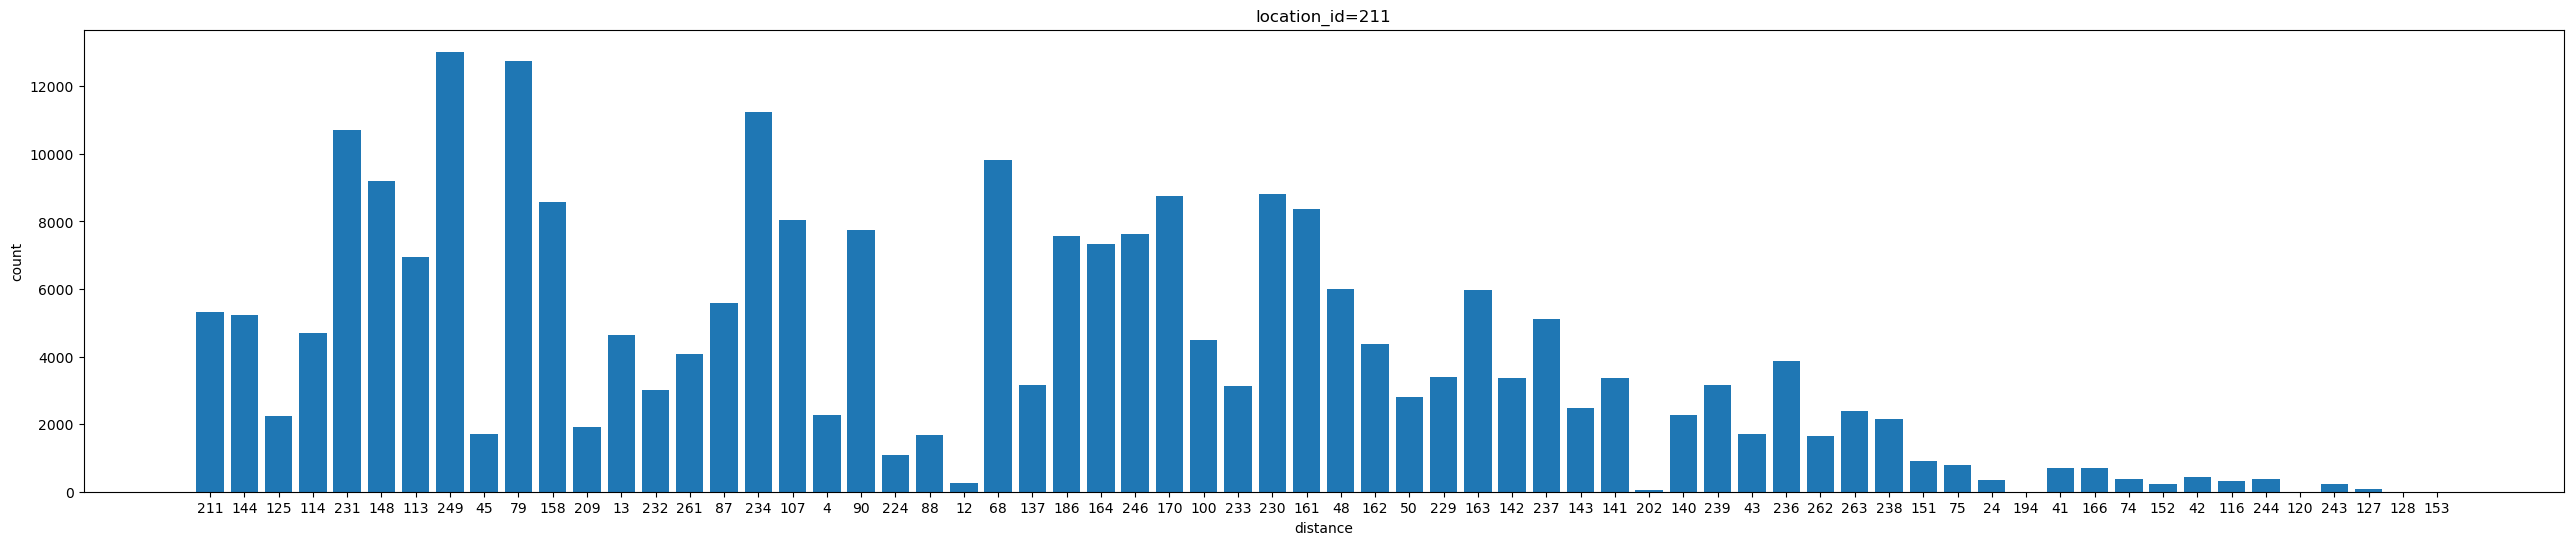

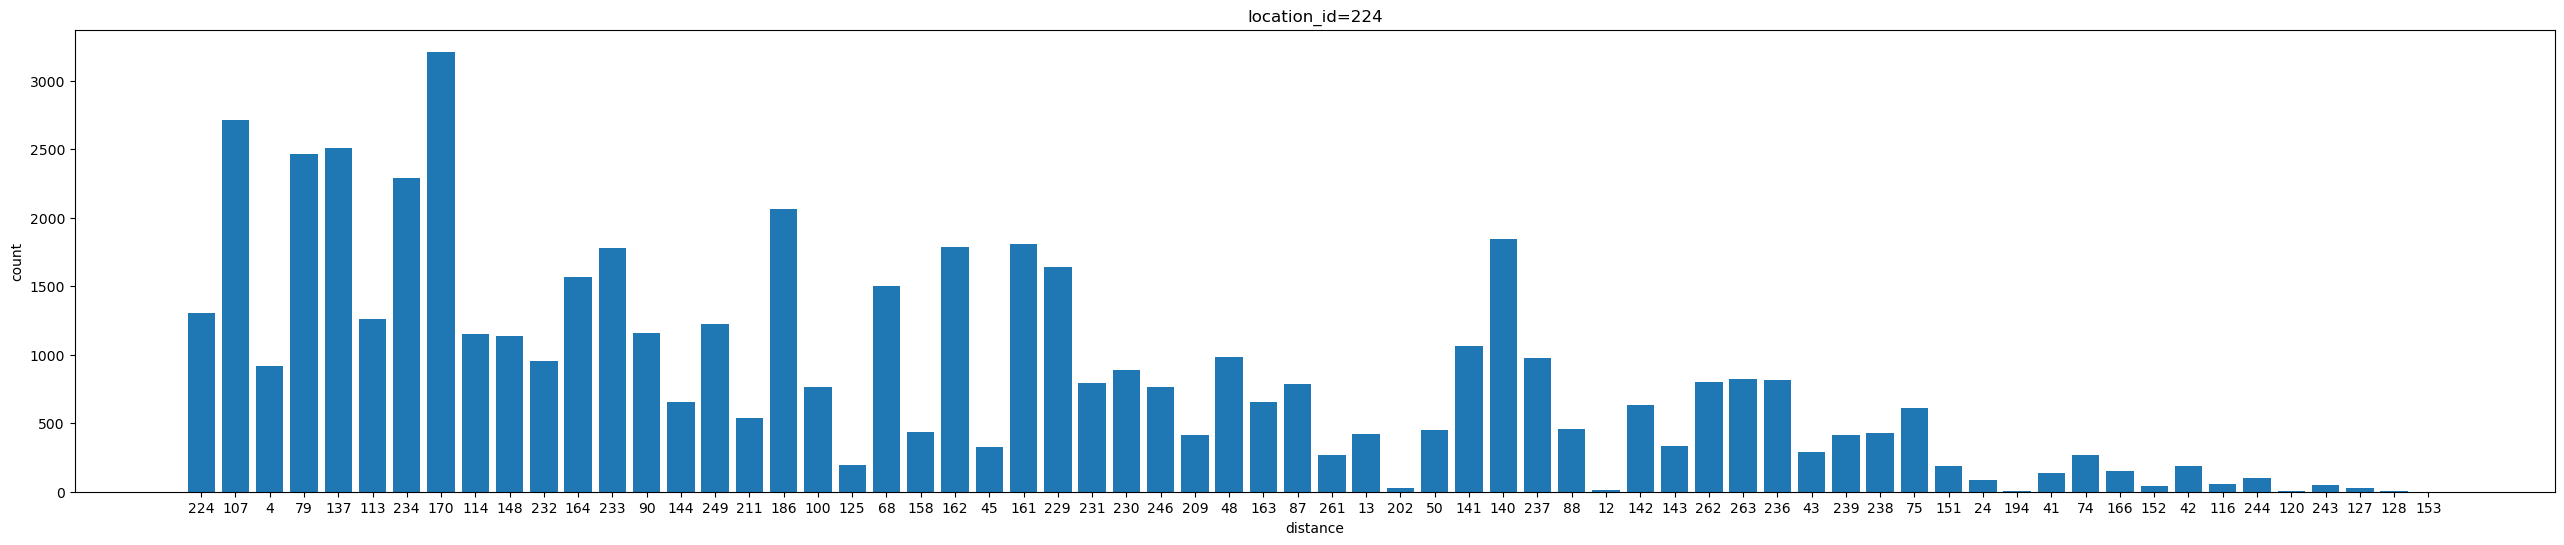

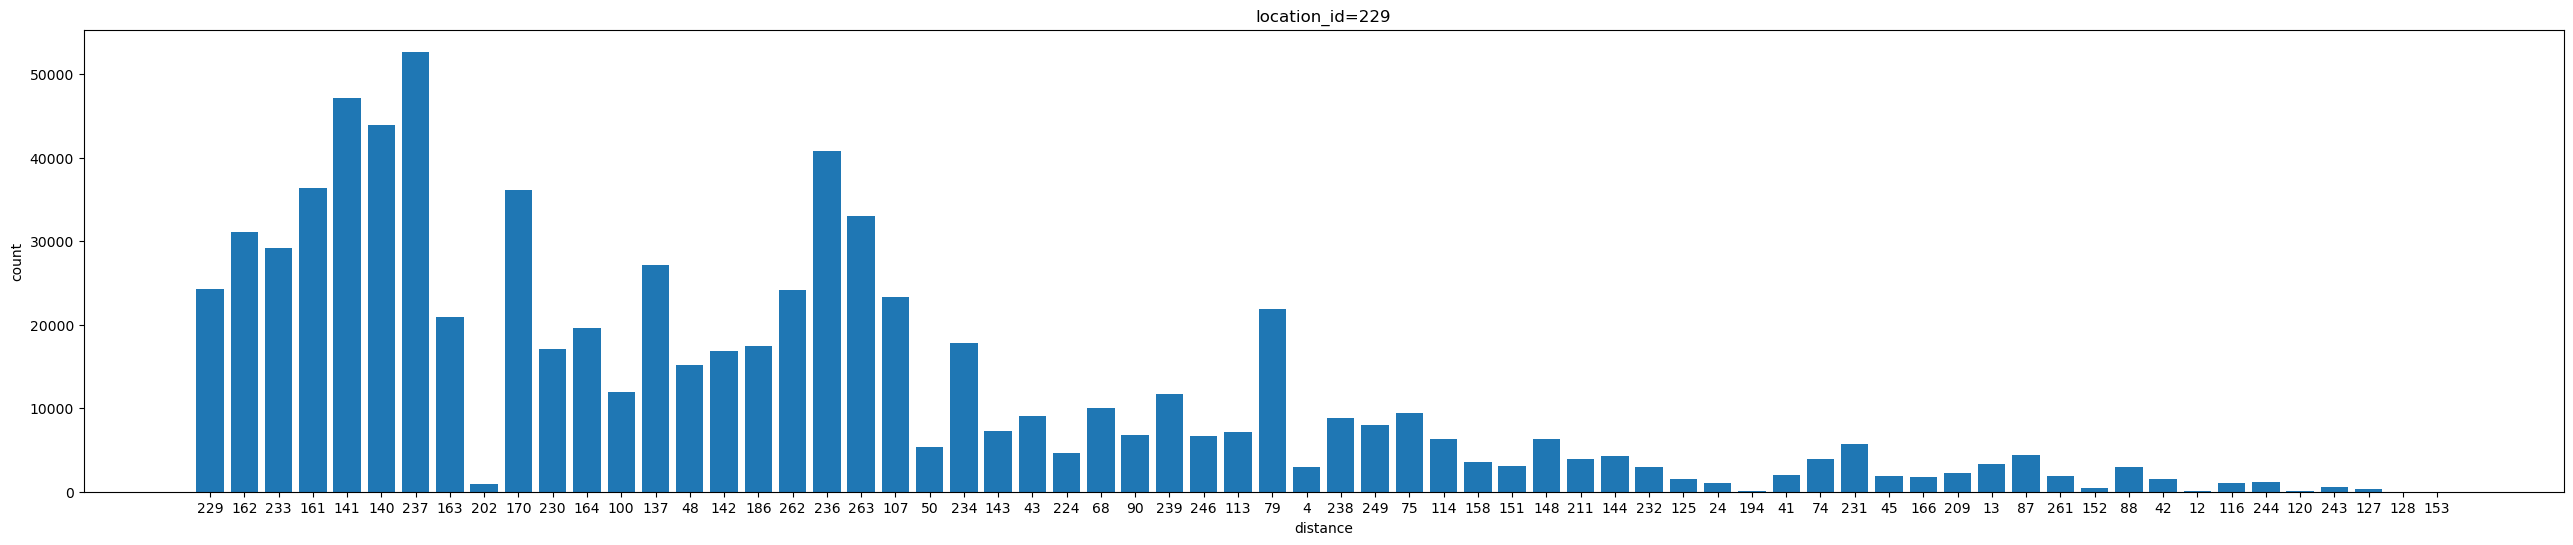

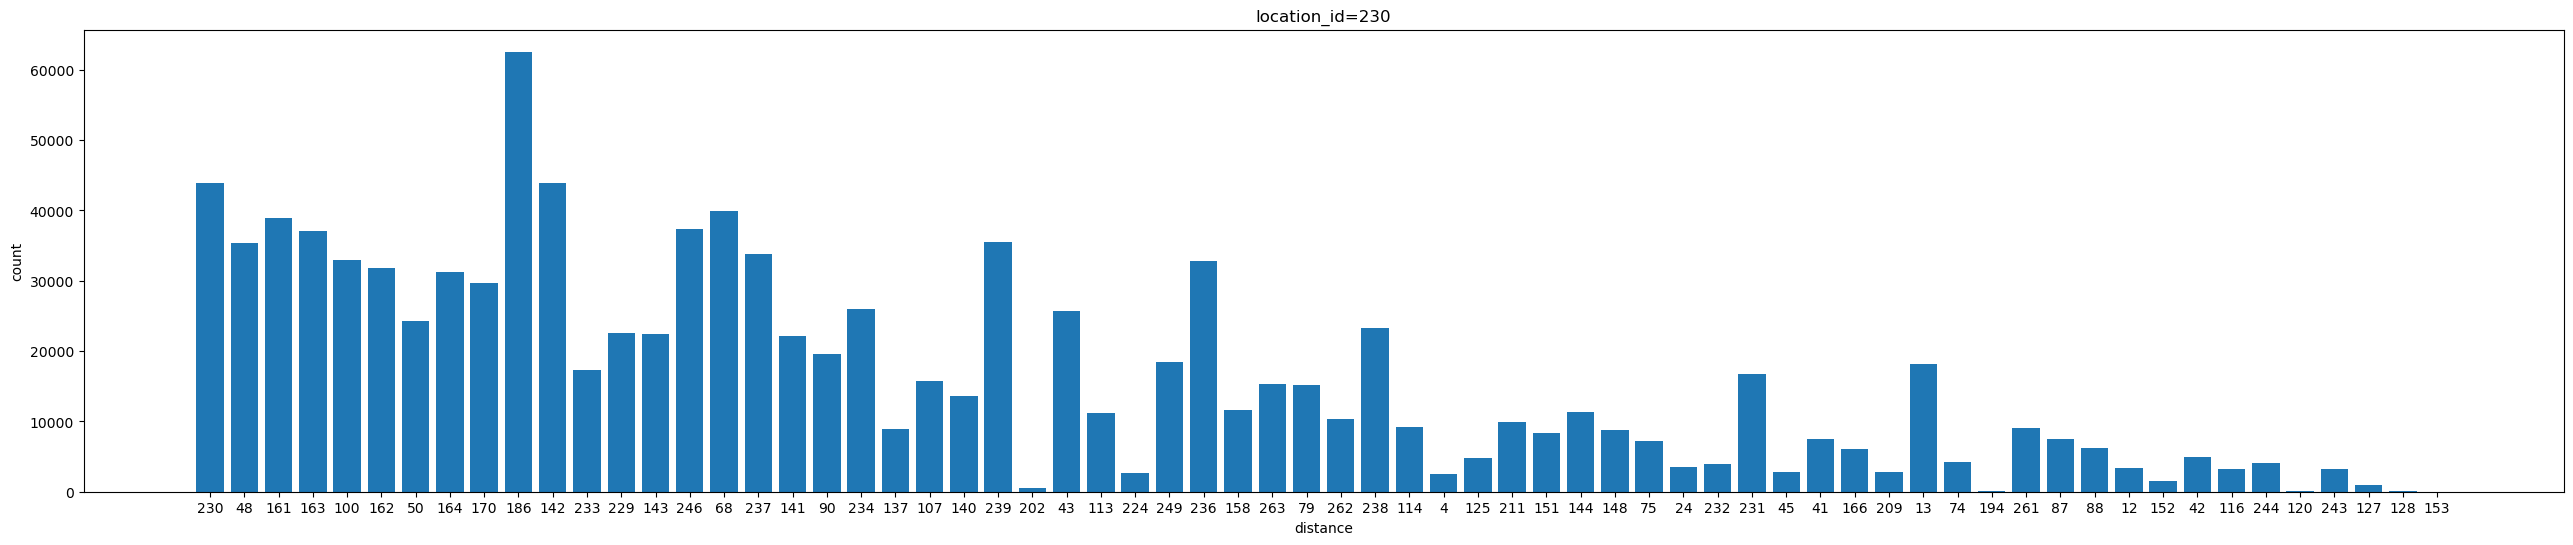

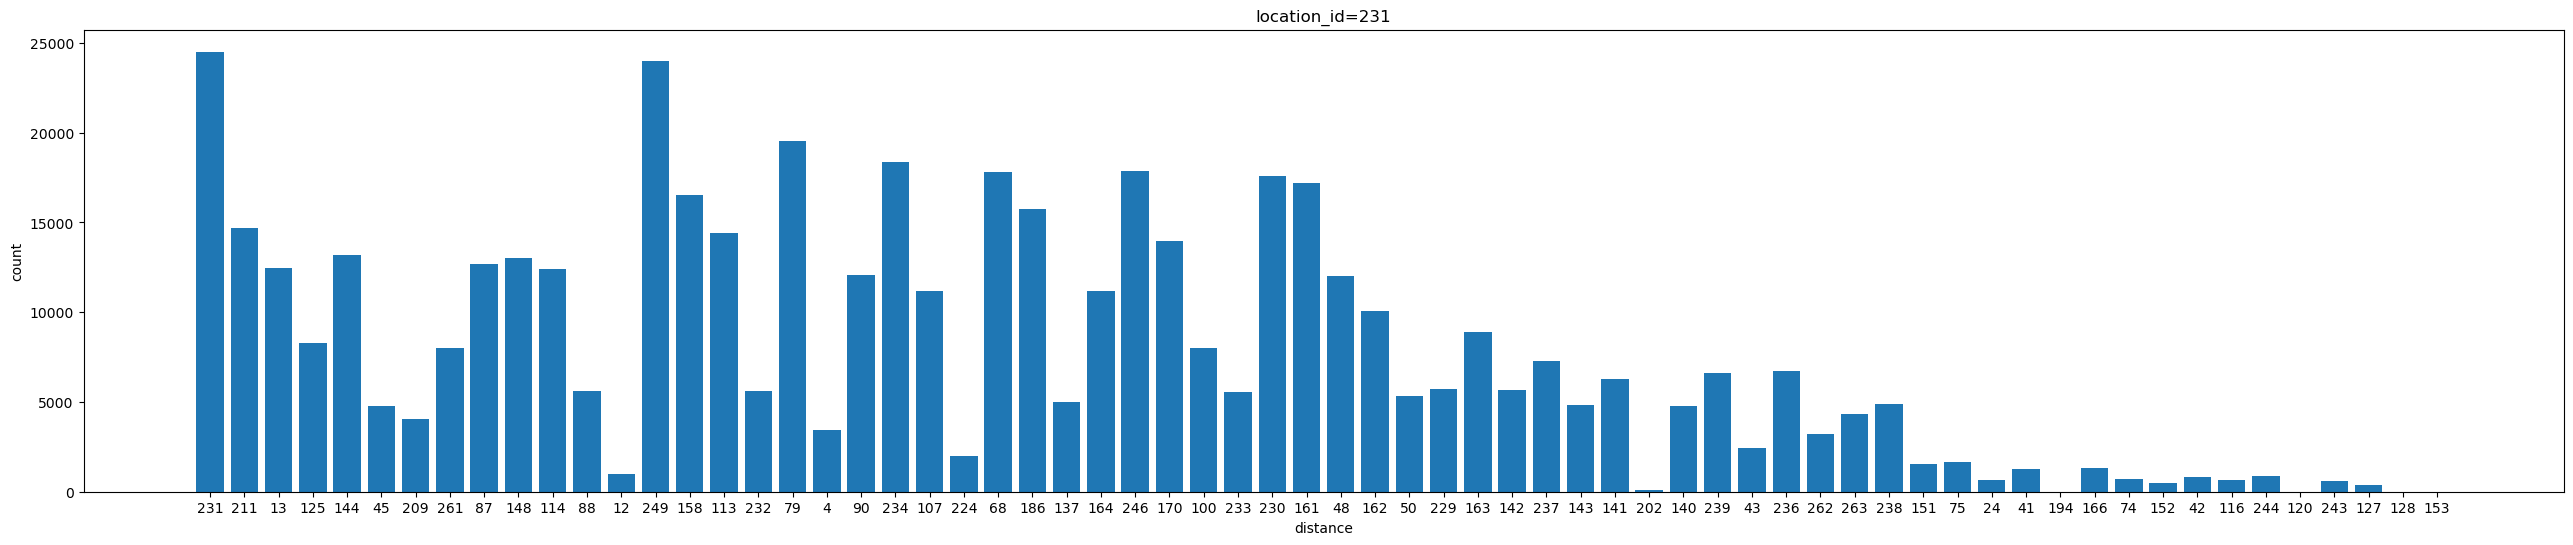

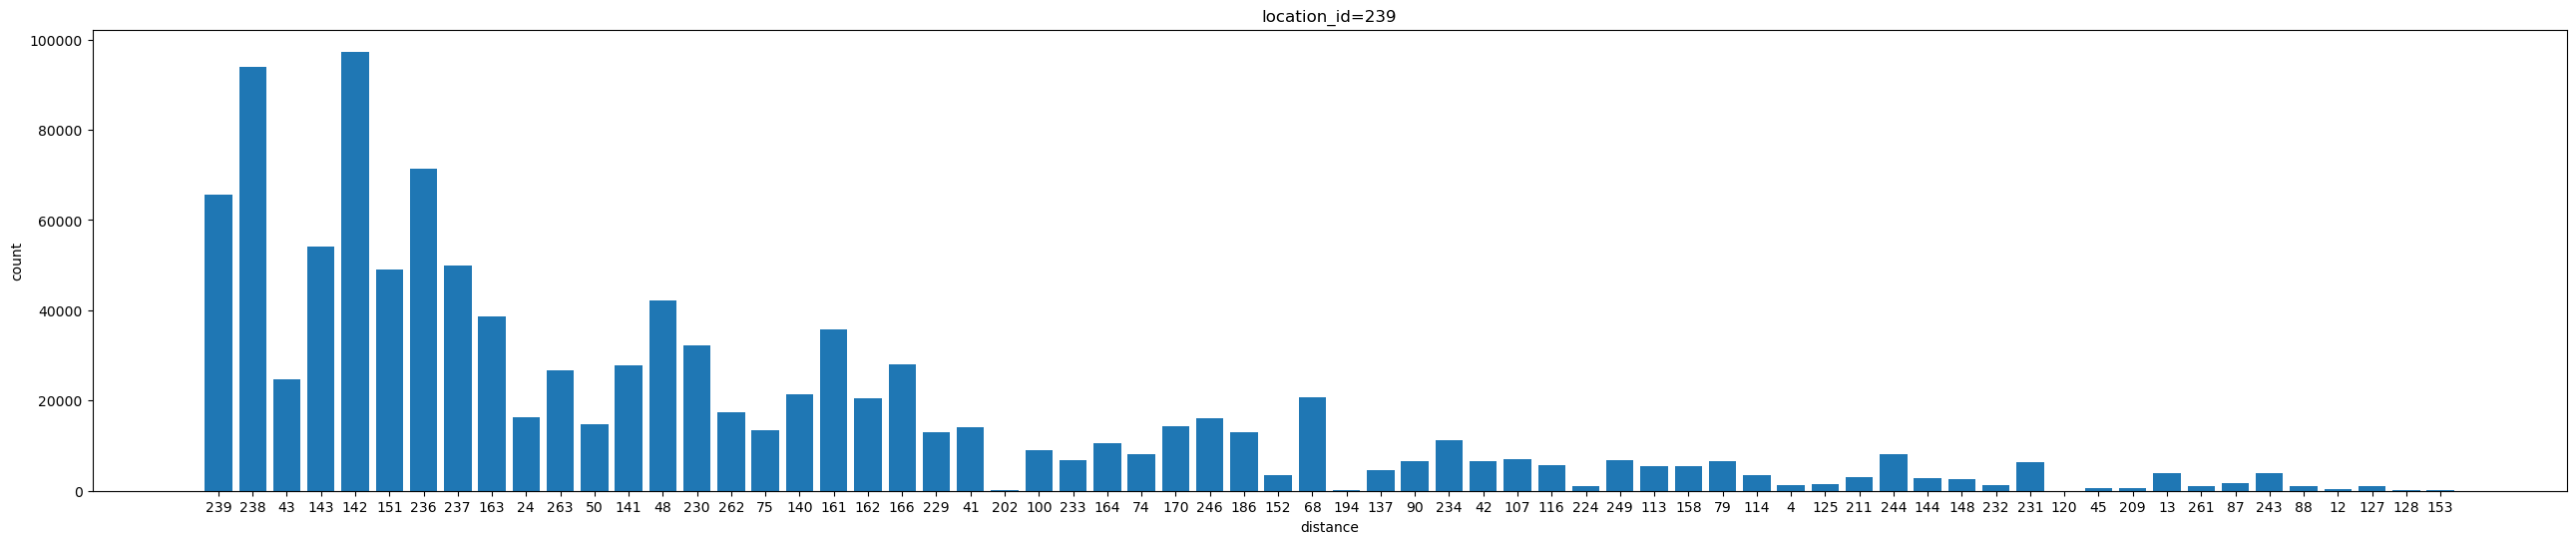

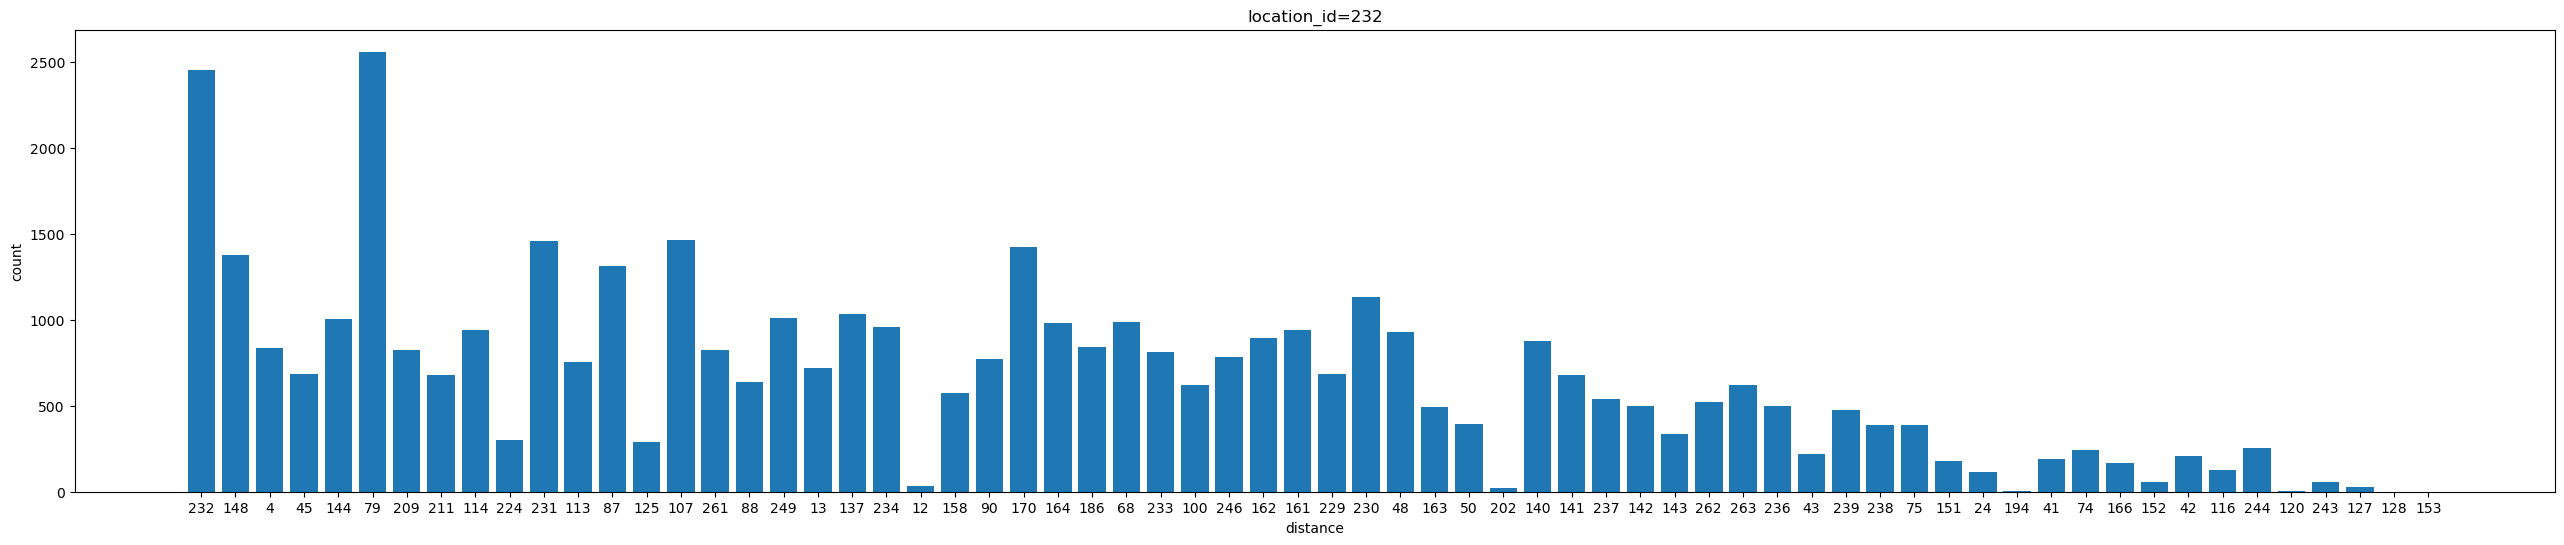

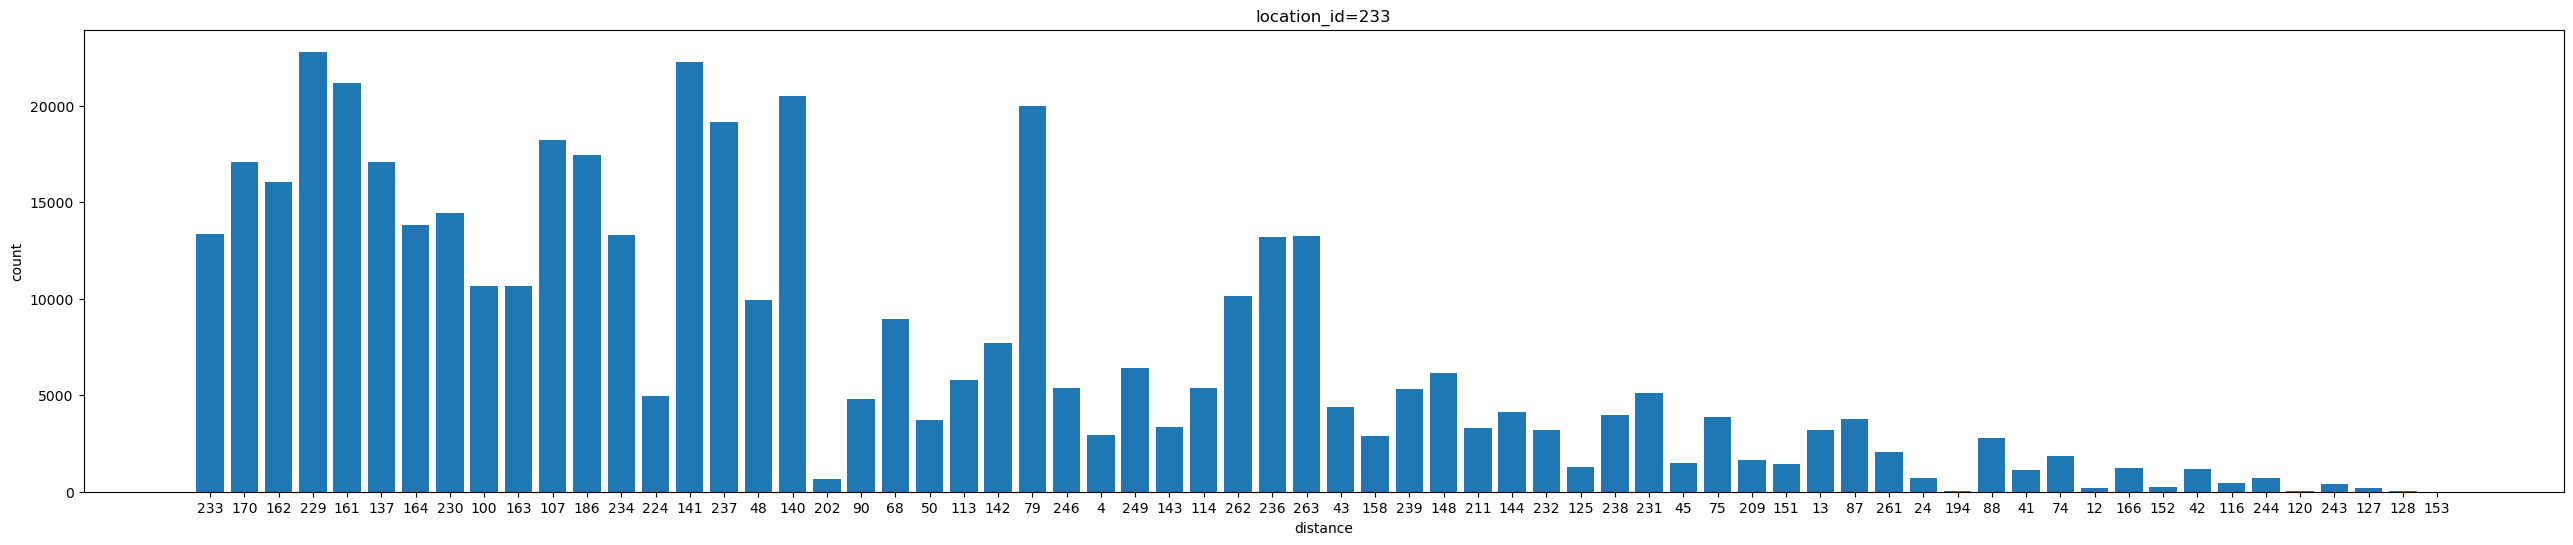

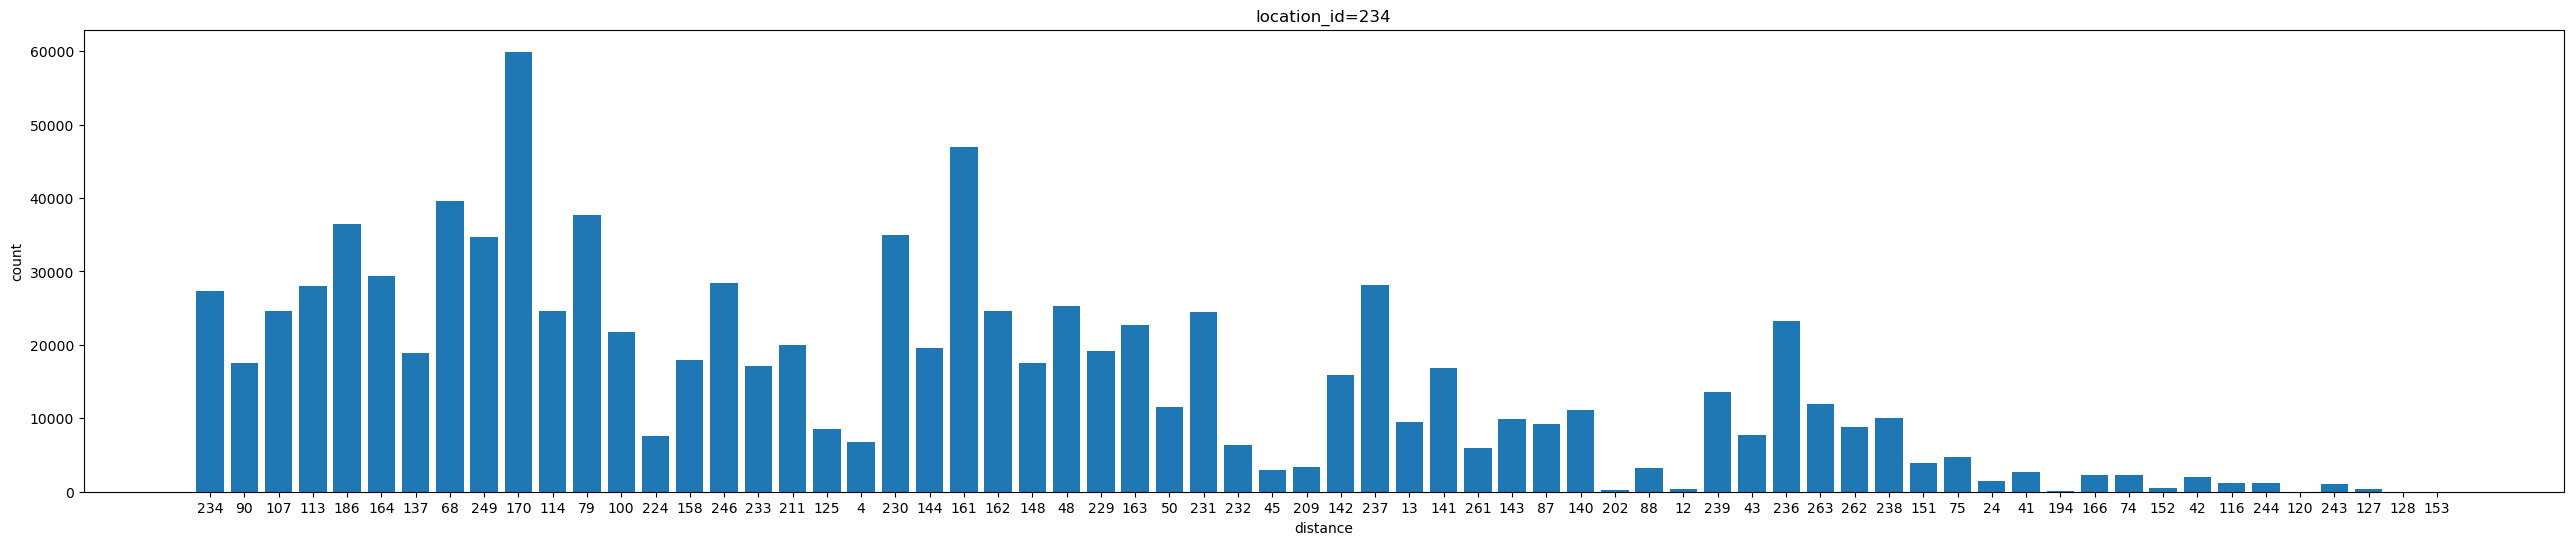

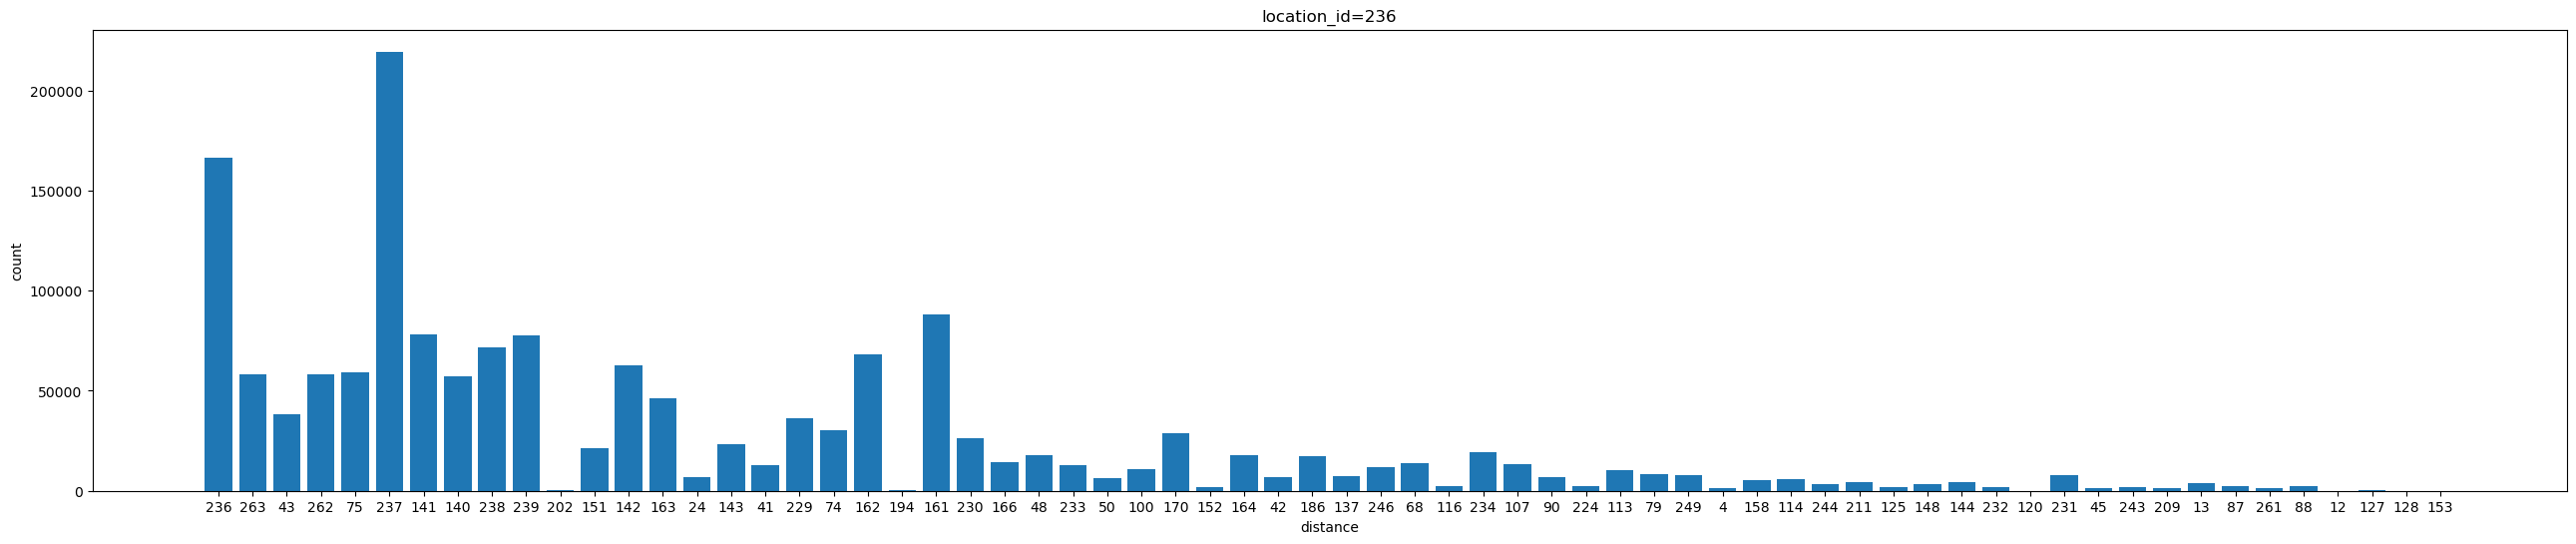

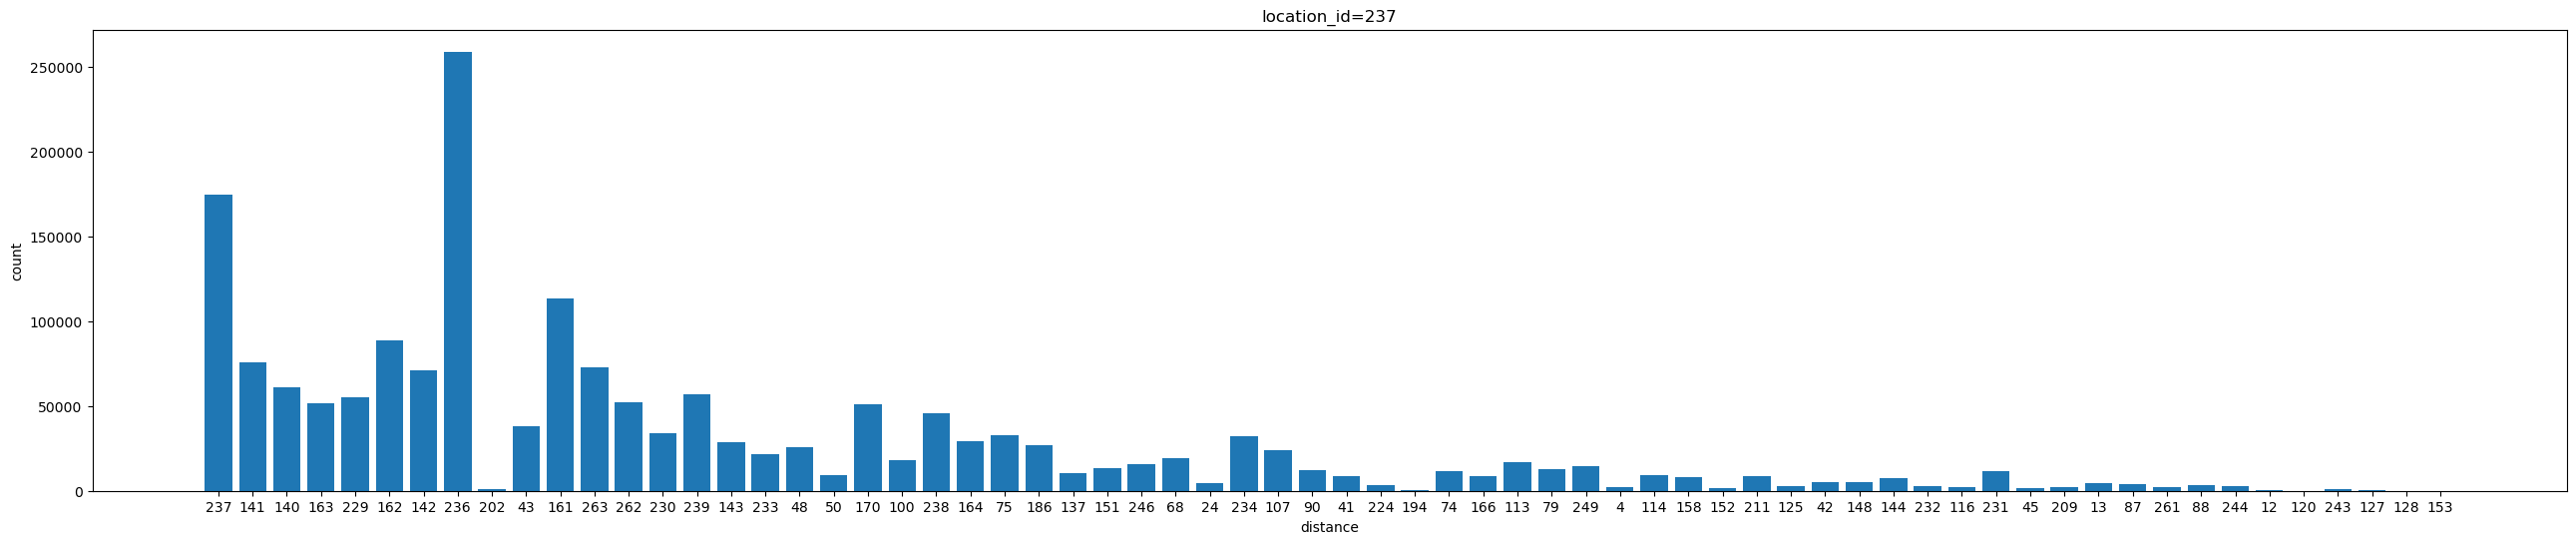

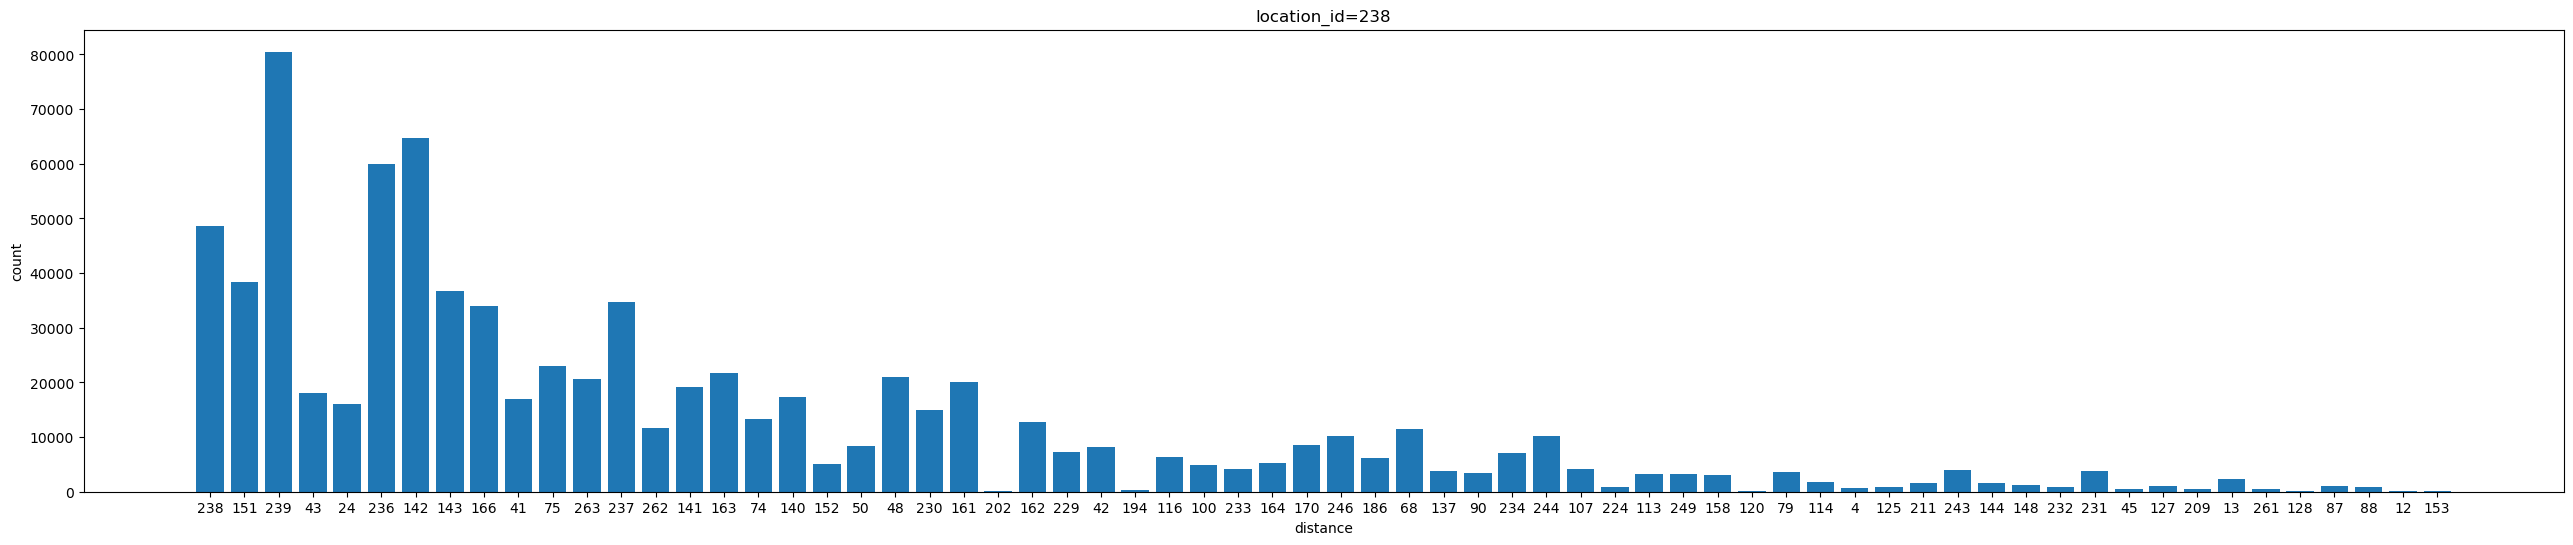

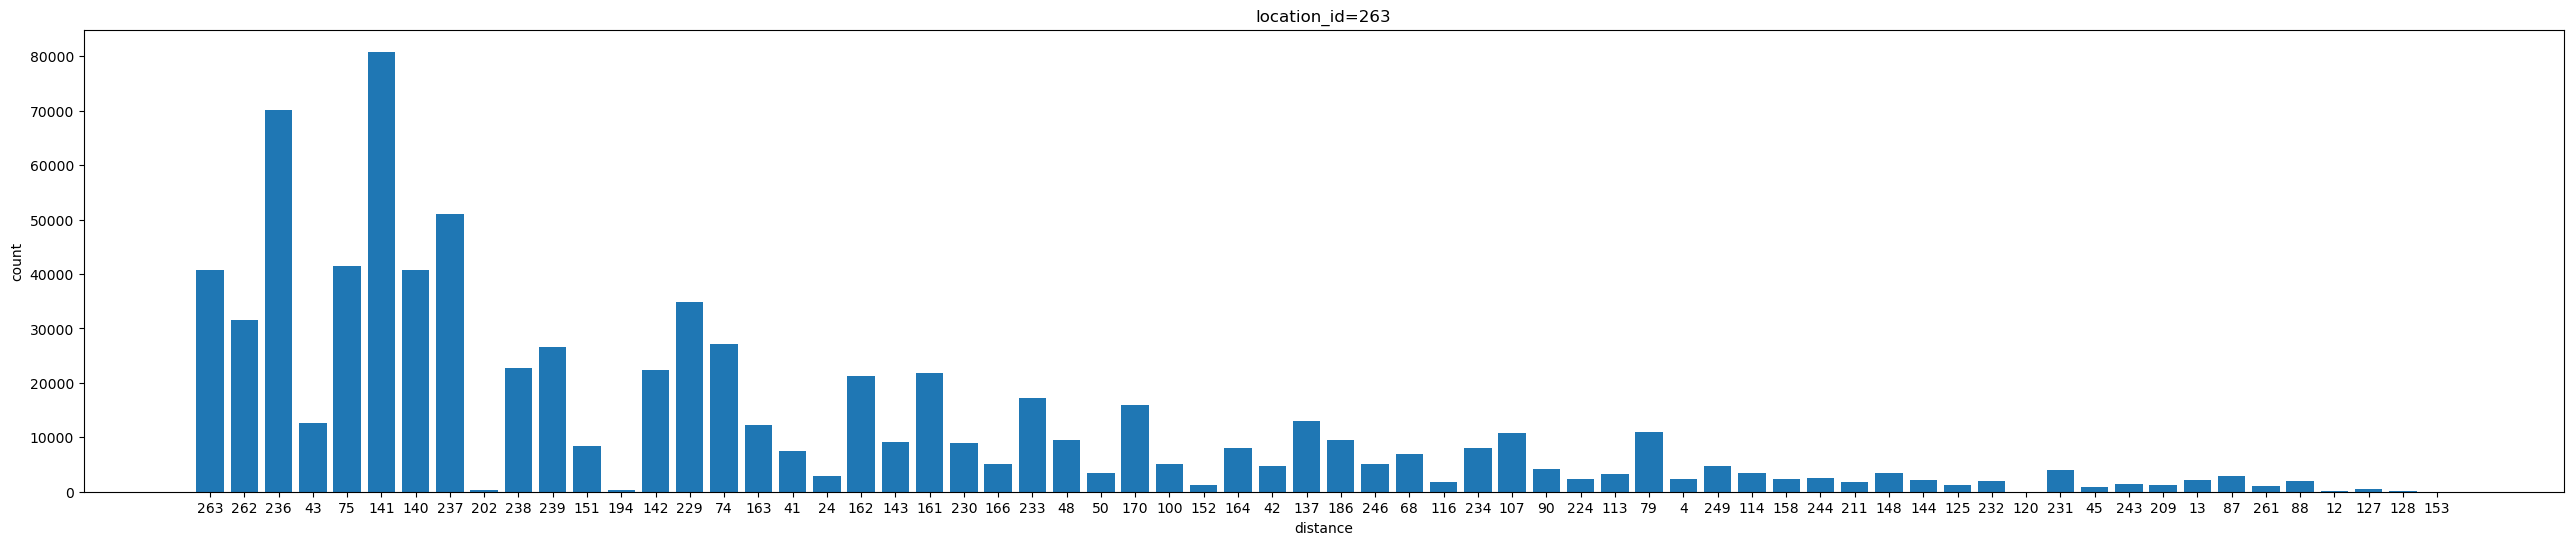

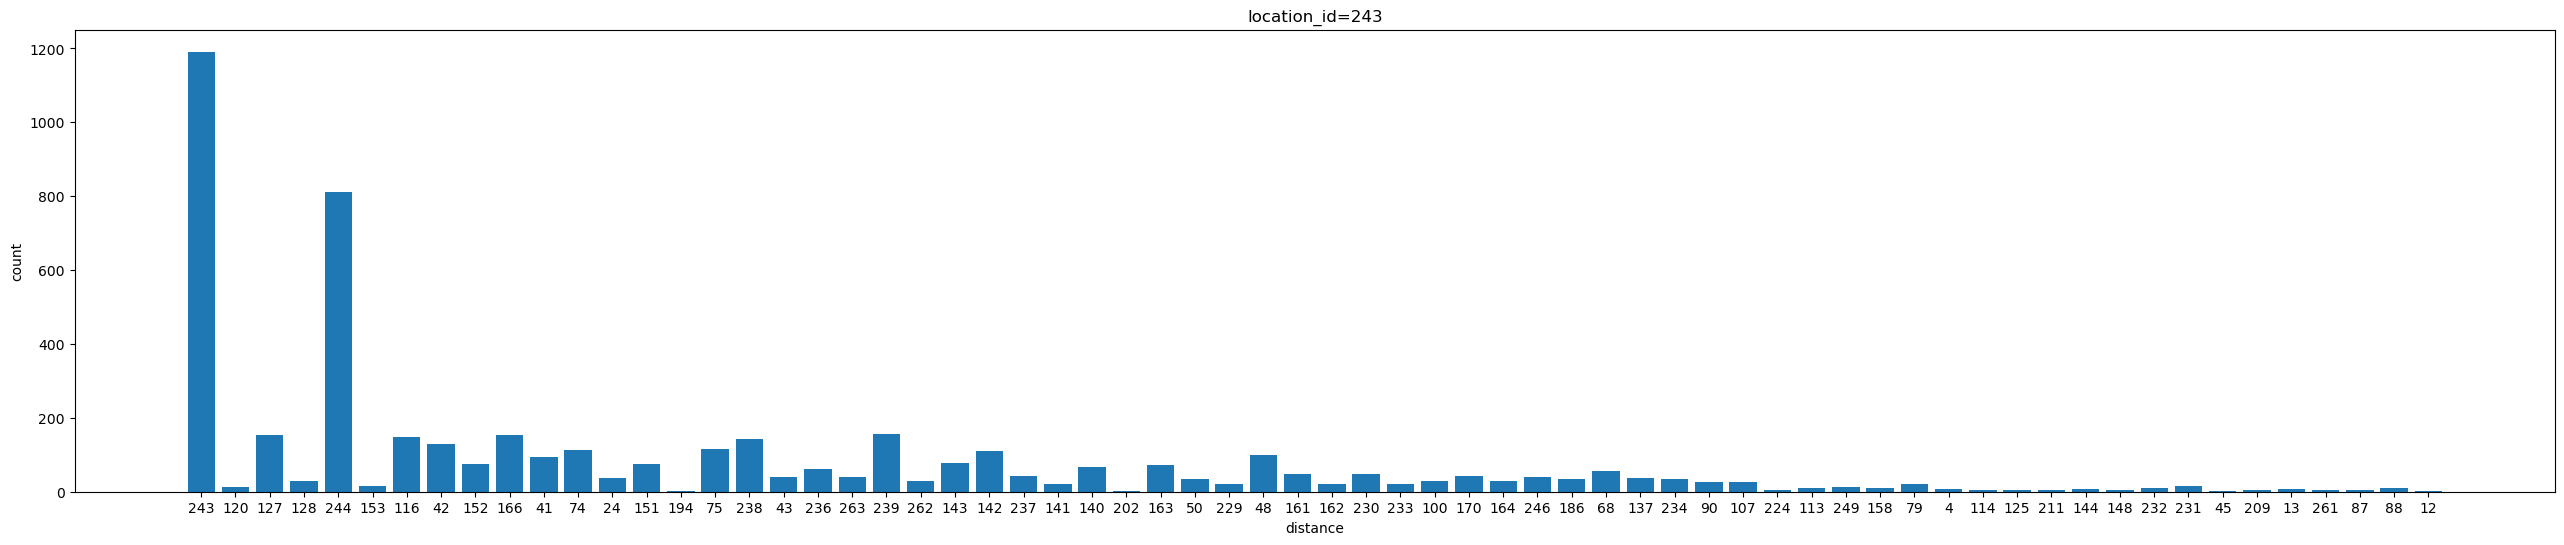

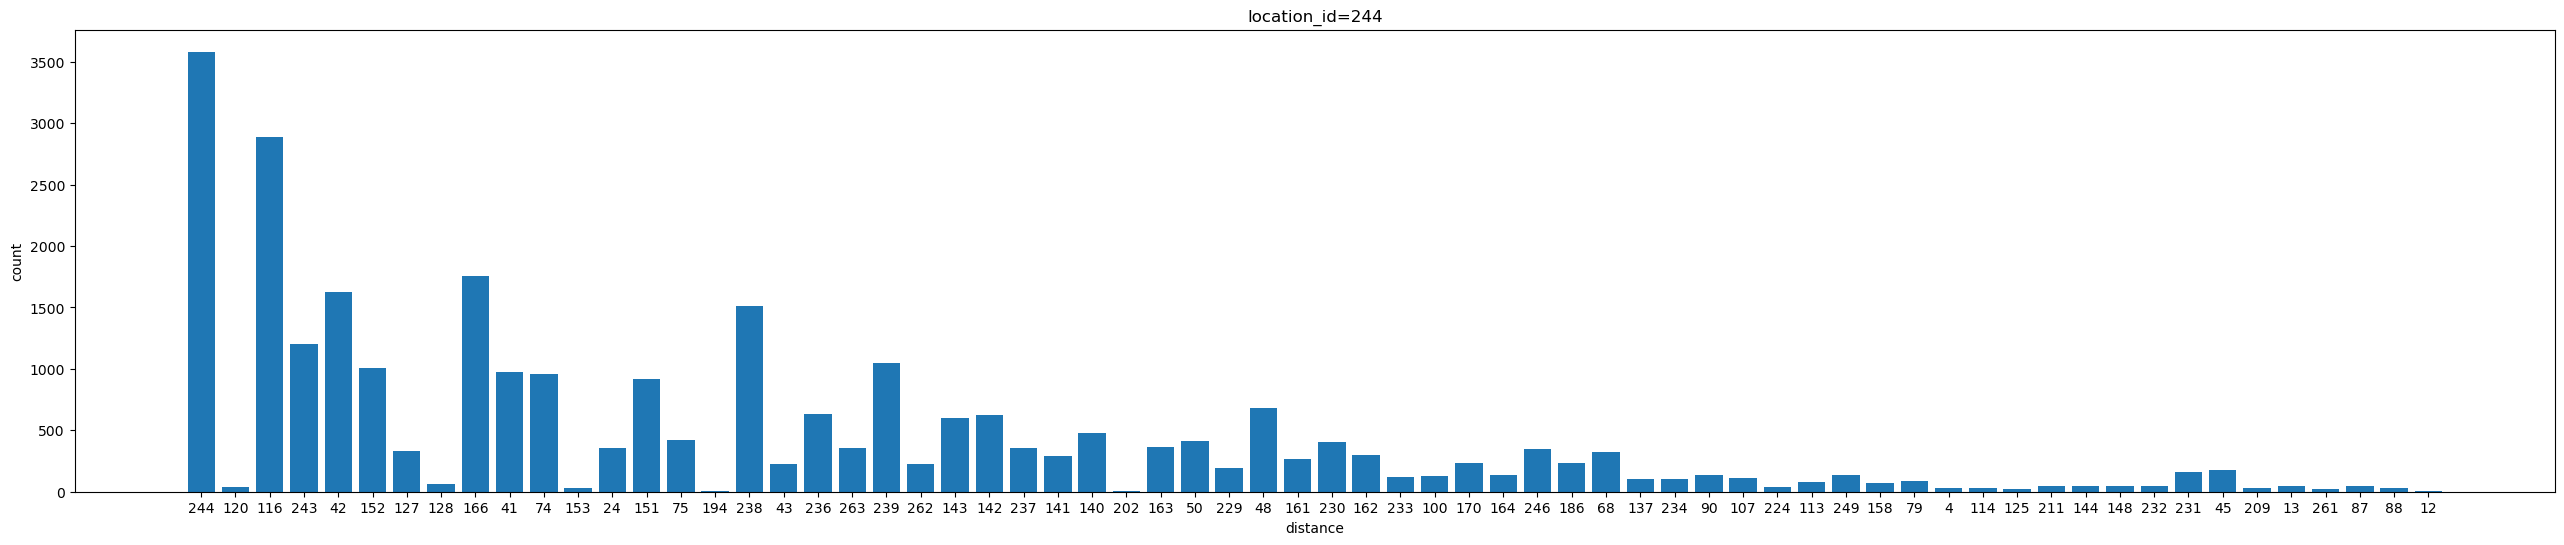

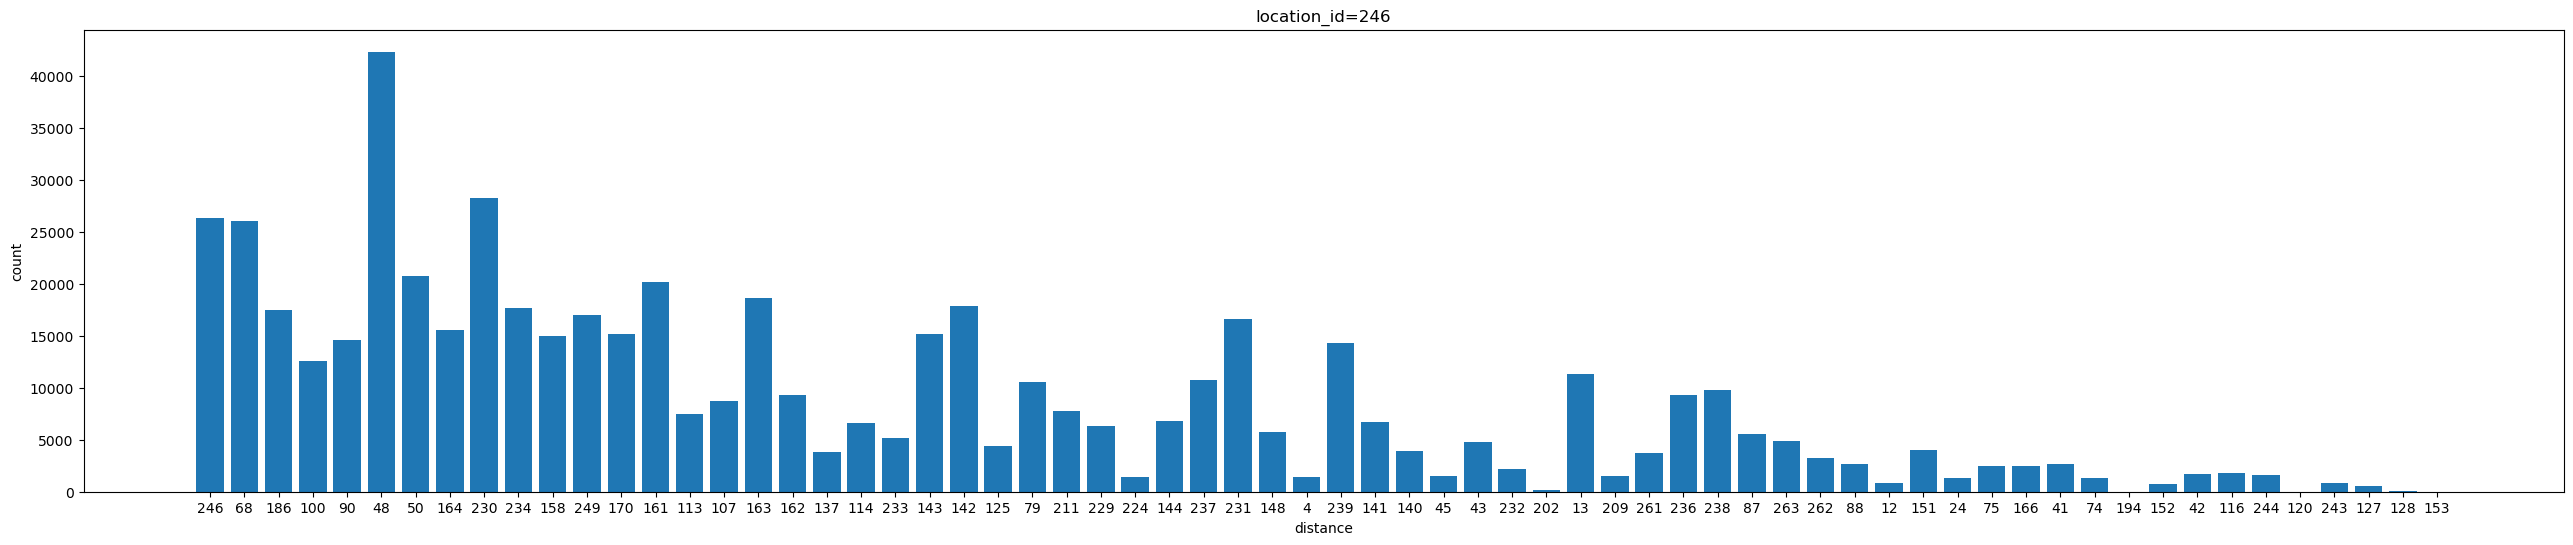

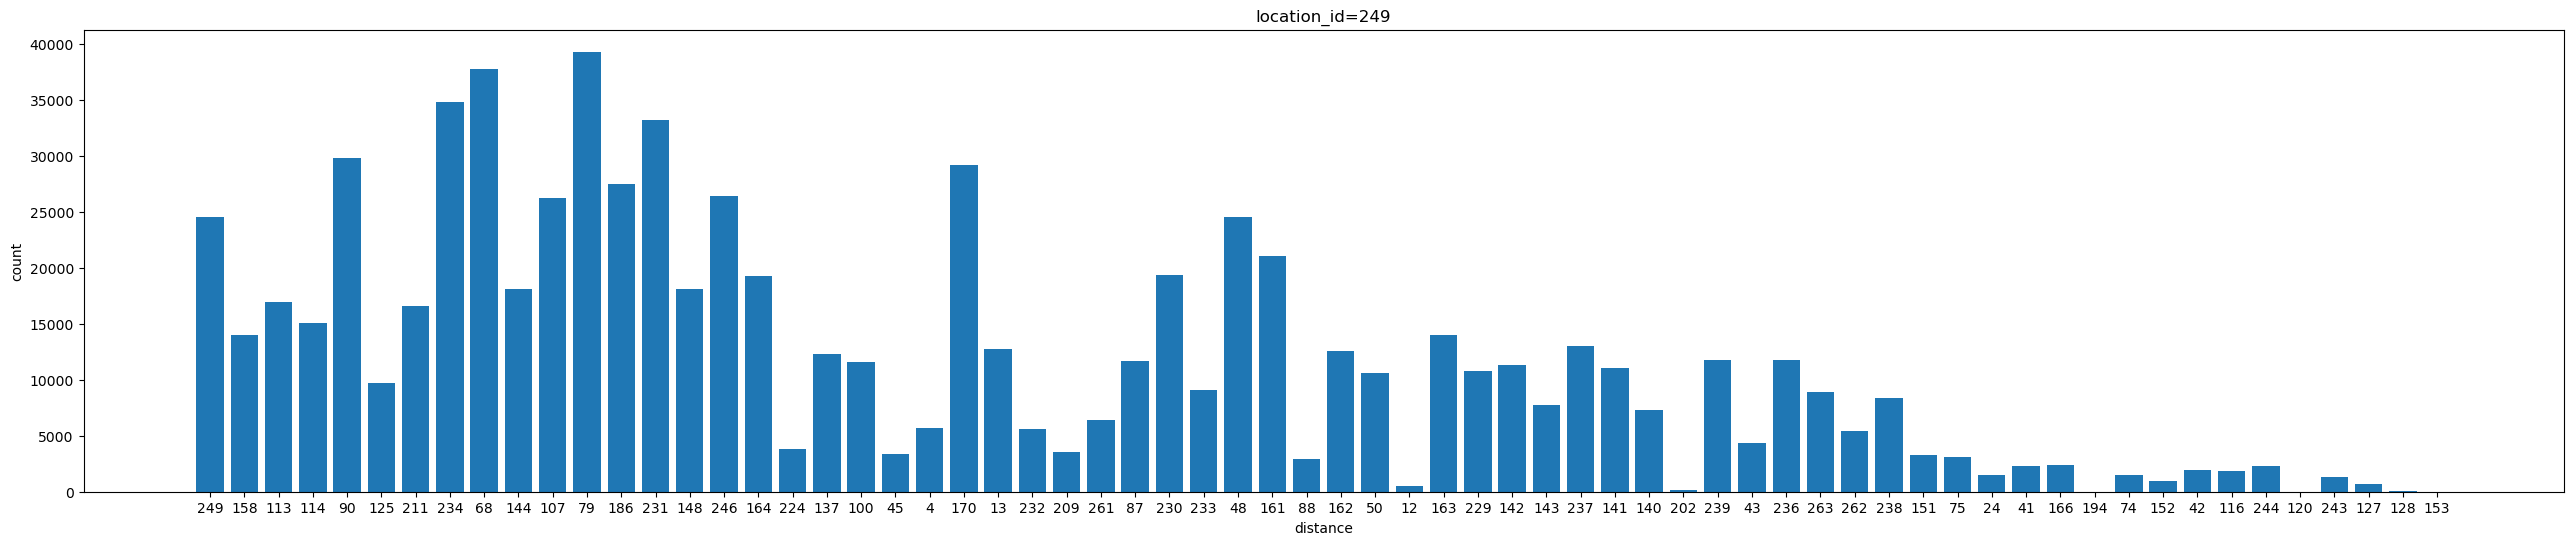

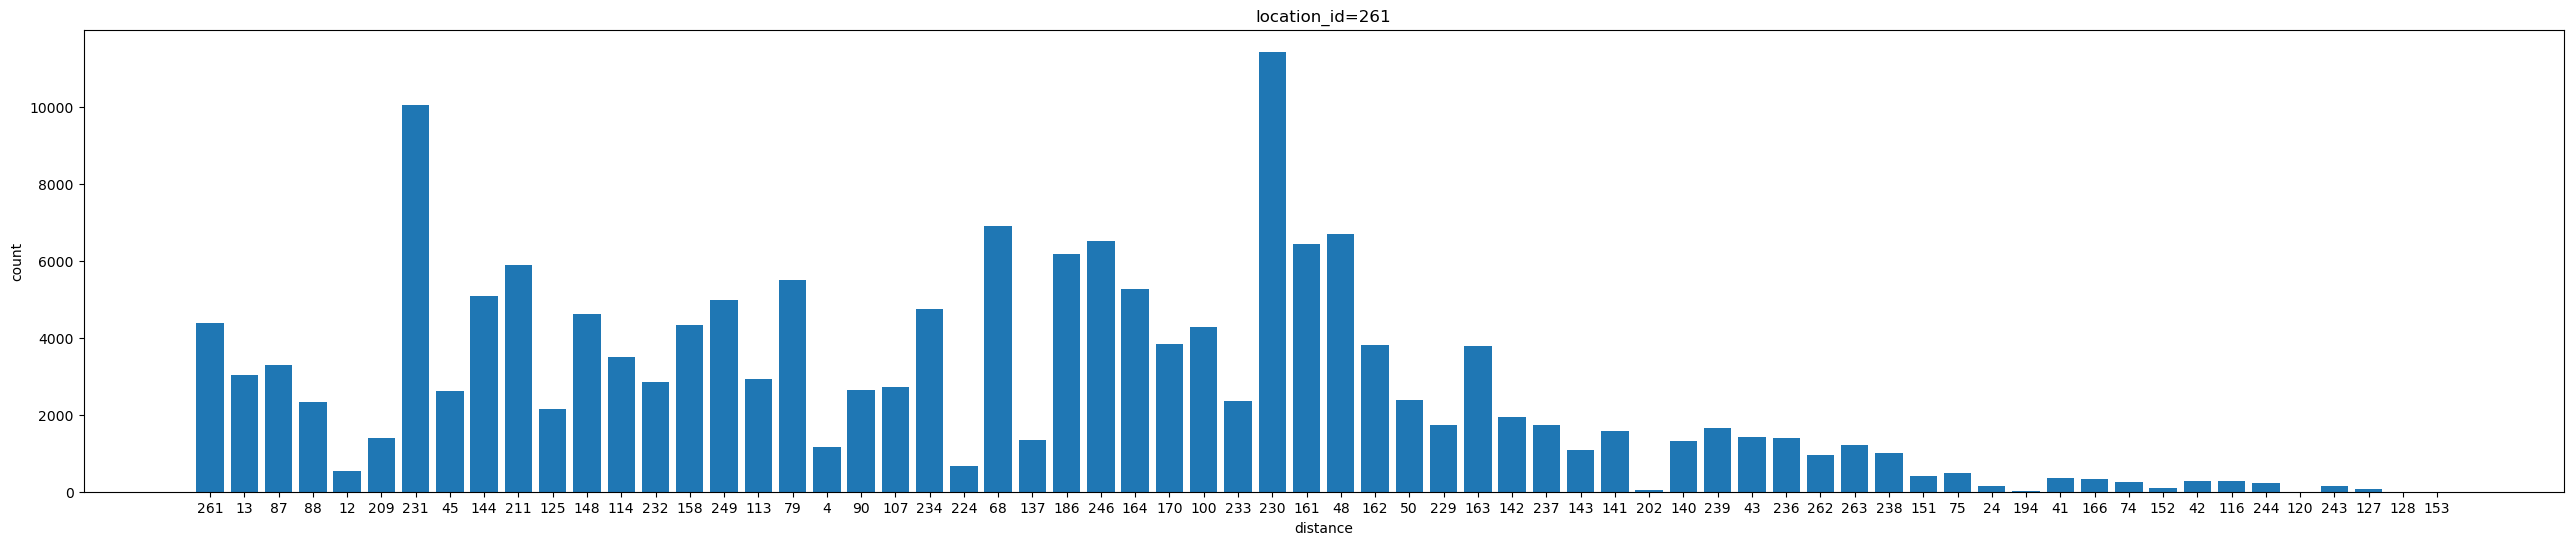

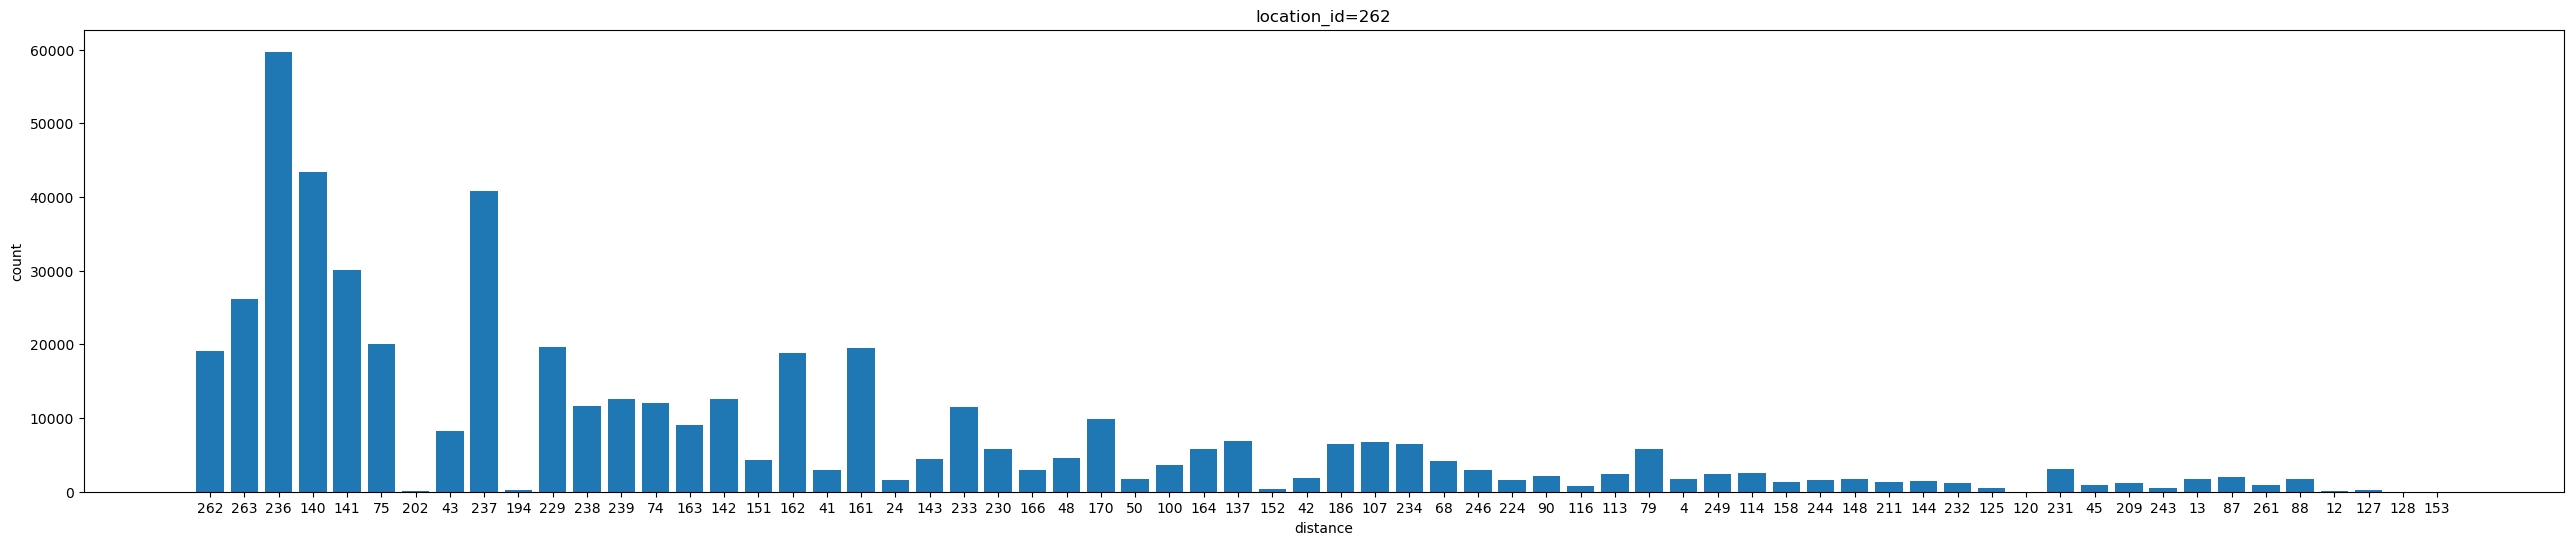

In [7]:
id_list = m_gdf['objectid'].to_list()
for id in id_list:
  dis_count(id, m_gdf, m_tripdata)

In [10]:
def dis_count_do(single_id, m_gdf, m_tripdata):
  gdf = m_gdf
  tripdata = m_tripdata
  centroid = gdf['centroid']
  single_point = centroid.loc[single_id]
  gdf1 = gpd.GeoDataFrame({'geometry': [single_point]*66}, crs='EPSG:4326')
  # Create a list of points and a GeoDataFrame for the 66 points
  gdf2 = gpd.GeoDataFrame({'geometry': centroid.tolist()}, crs='EPSG:4326')

  # Project to a local coordinate system
  gdf1 = gdf1.to_crs('EPSG:5234')
  gdf2 = gdf2.to_crs('EPSG:5234')

  # Calculate the distance between the single point and each of the 66 points
  distances = gdf2.distance(gdf1)
  distances = pd.Series(distances)
  gdf.reset_index(inplace=True)
  gdf['dis'] = distances
  gdf.set_index('location_id', inplace=True)
  
  tripdata_single = tripdata[tripdata['DOLocationID'].apply(lambda x:x==int(single_id))]
  counts = tripdata_single['PULocationID'].value_counts().reset_index(name='count')
  counts.set_index('index',inplace=True)
  def add_counts(id, counts):
    id = int(id)
    if id in counts.index:
      return counts['count'].loc[id]
    else:
      return 0
  gdf['count'] = gdf['objectid'].apply(add_counts, counts=counts)
  gdf = gdf.sort_values('dis')
  plt.figure(figsize=(32,6))
  plt.bar(gdf.index, gdf['count'])
  plt.title('location_id='+single_id)
  plt.xlabel('distance')
  plt.ylabel('count')
  plt.show()

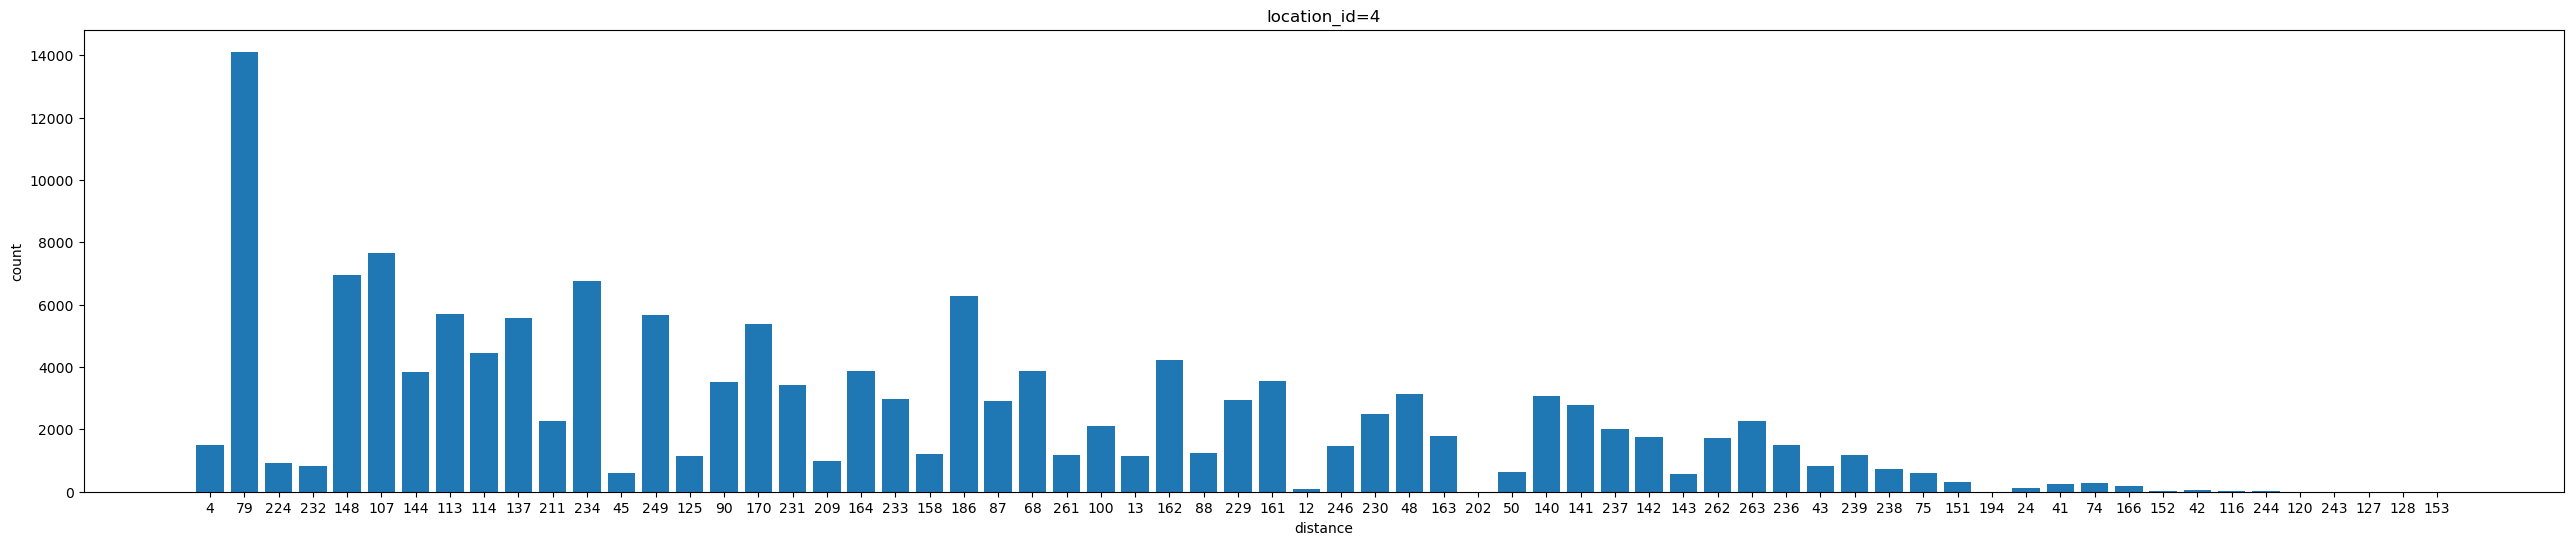

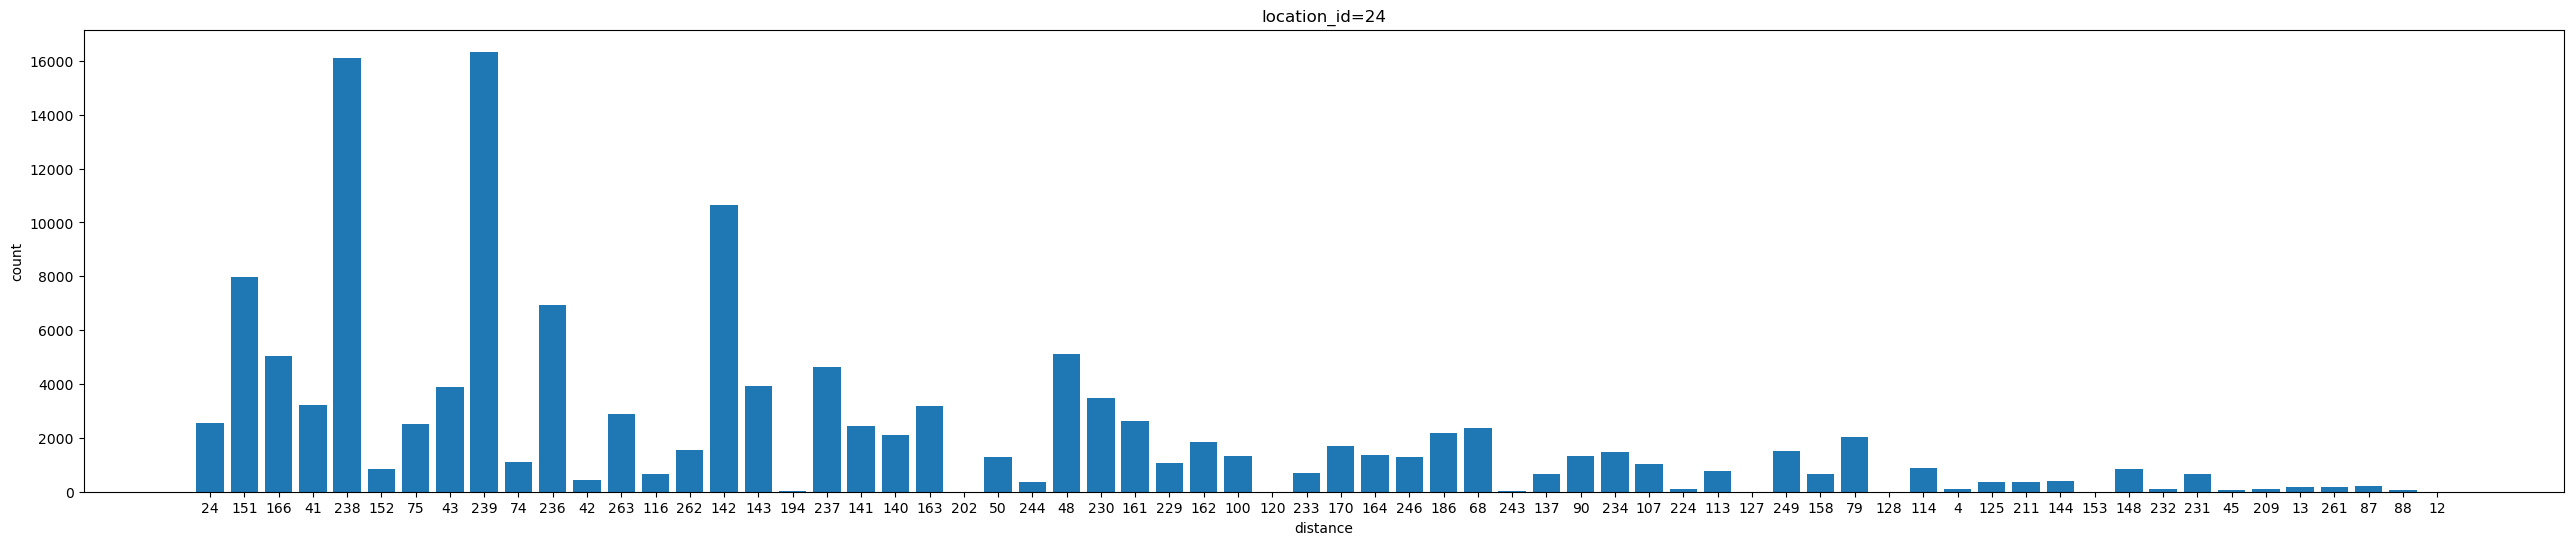

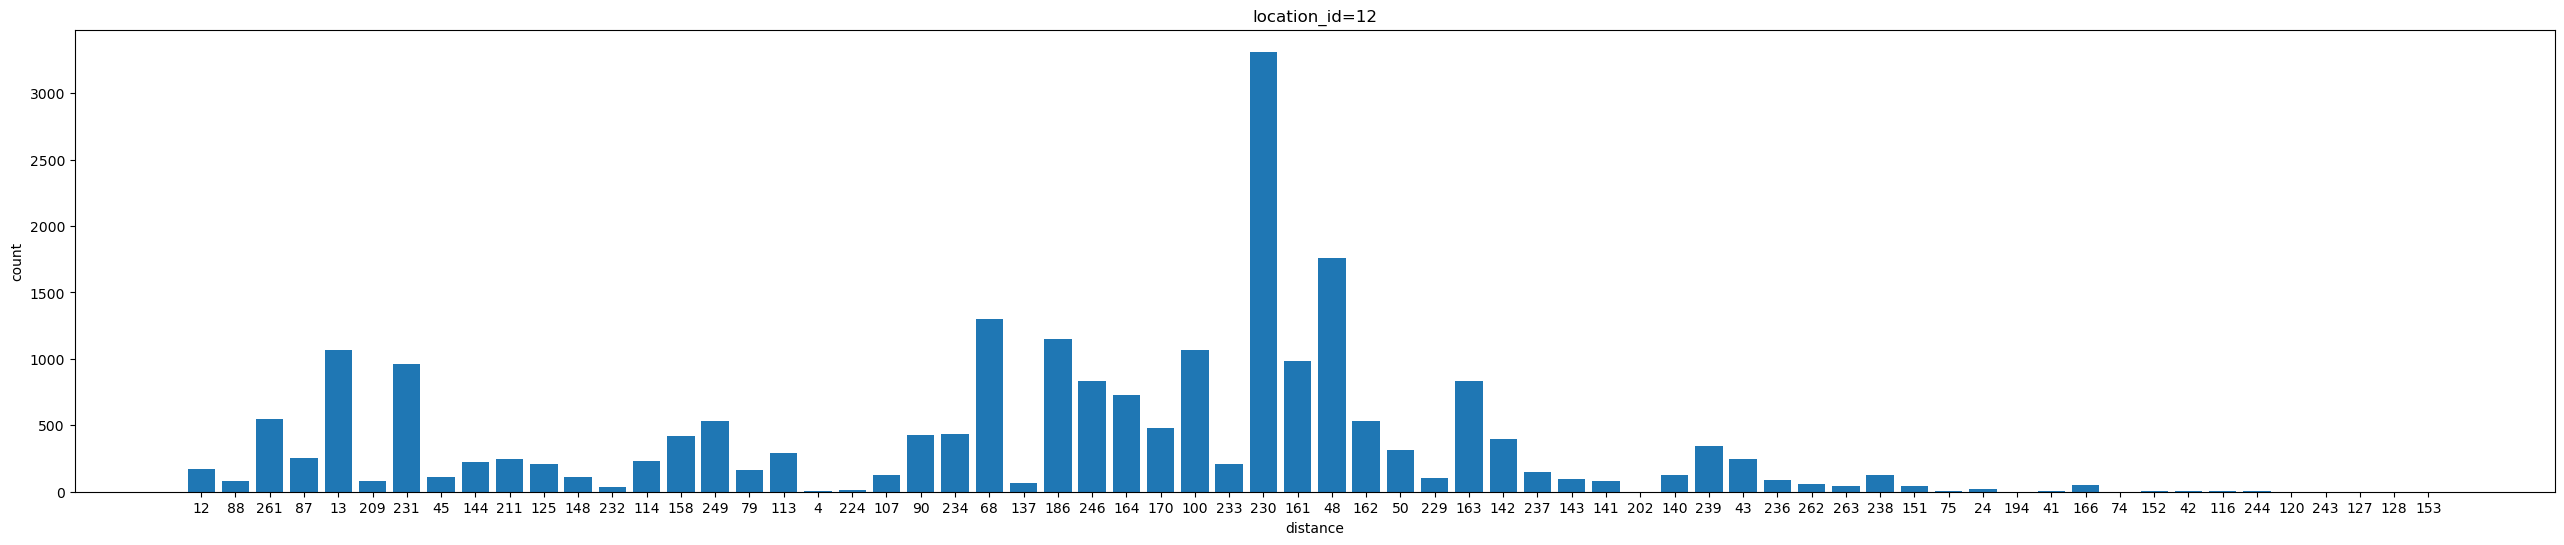

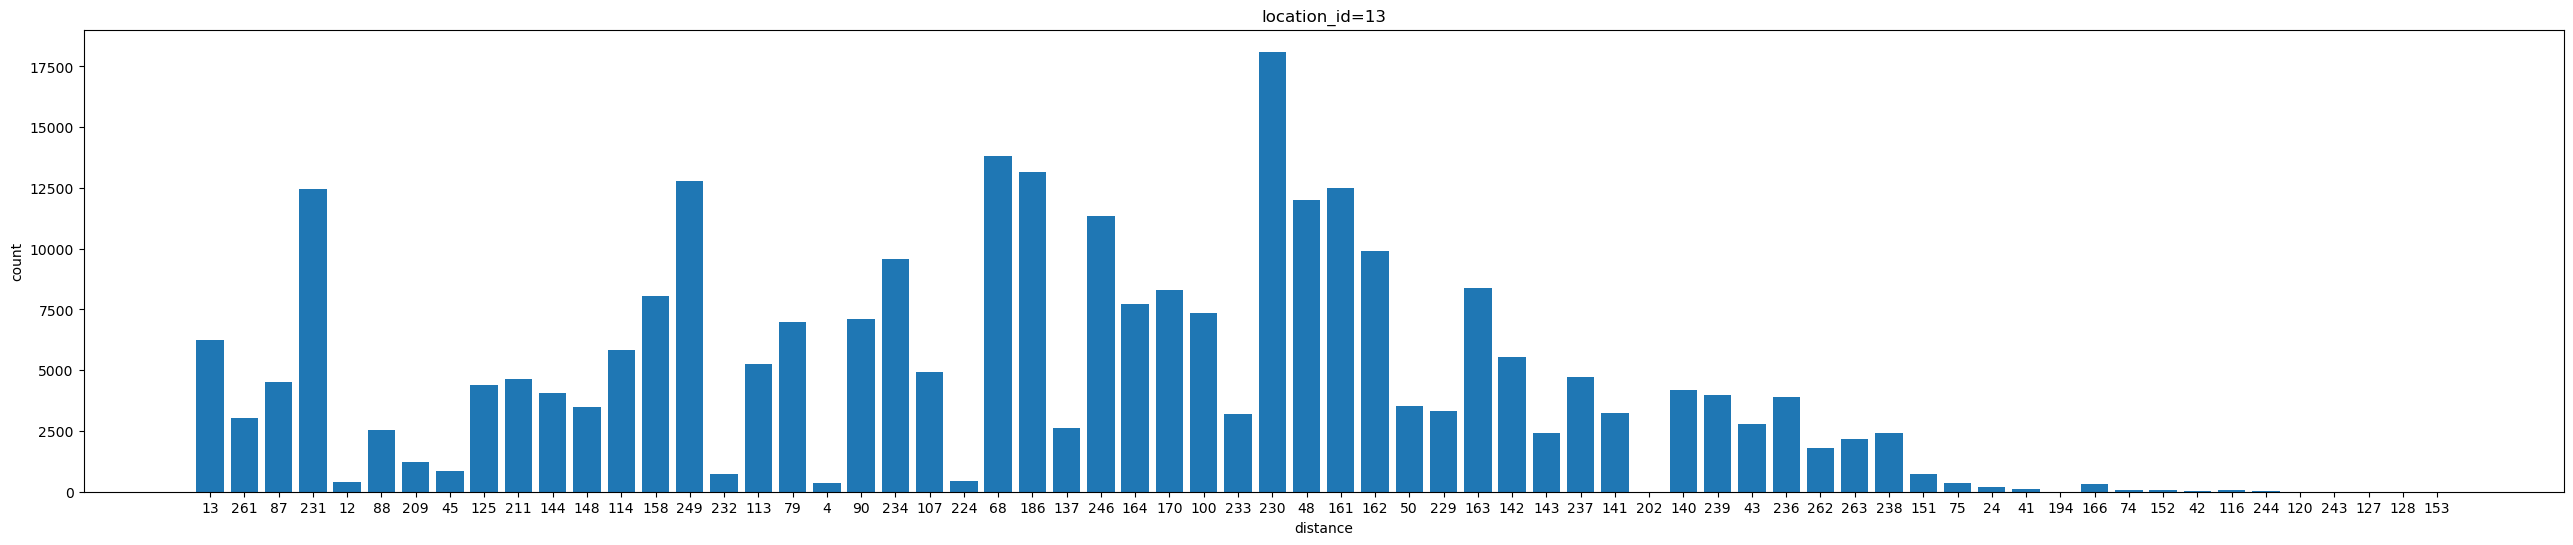

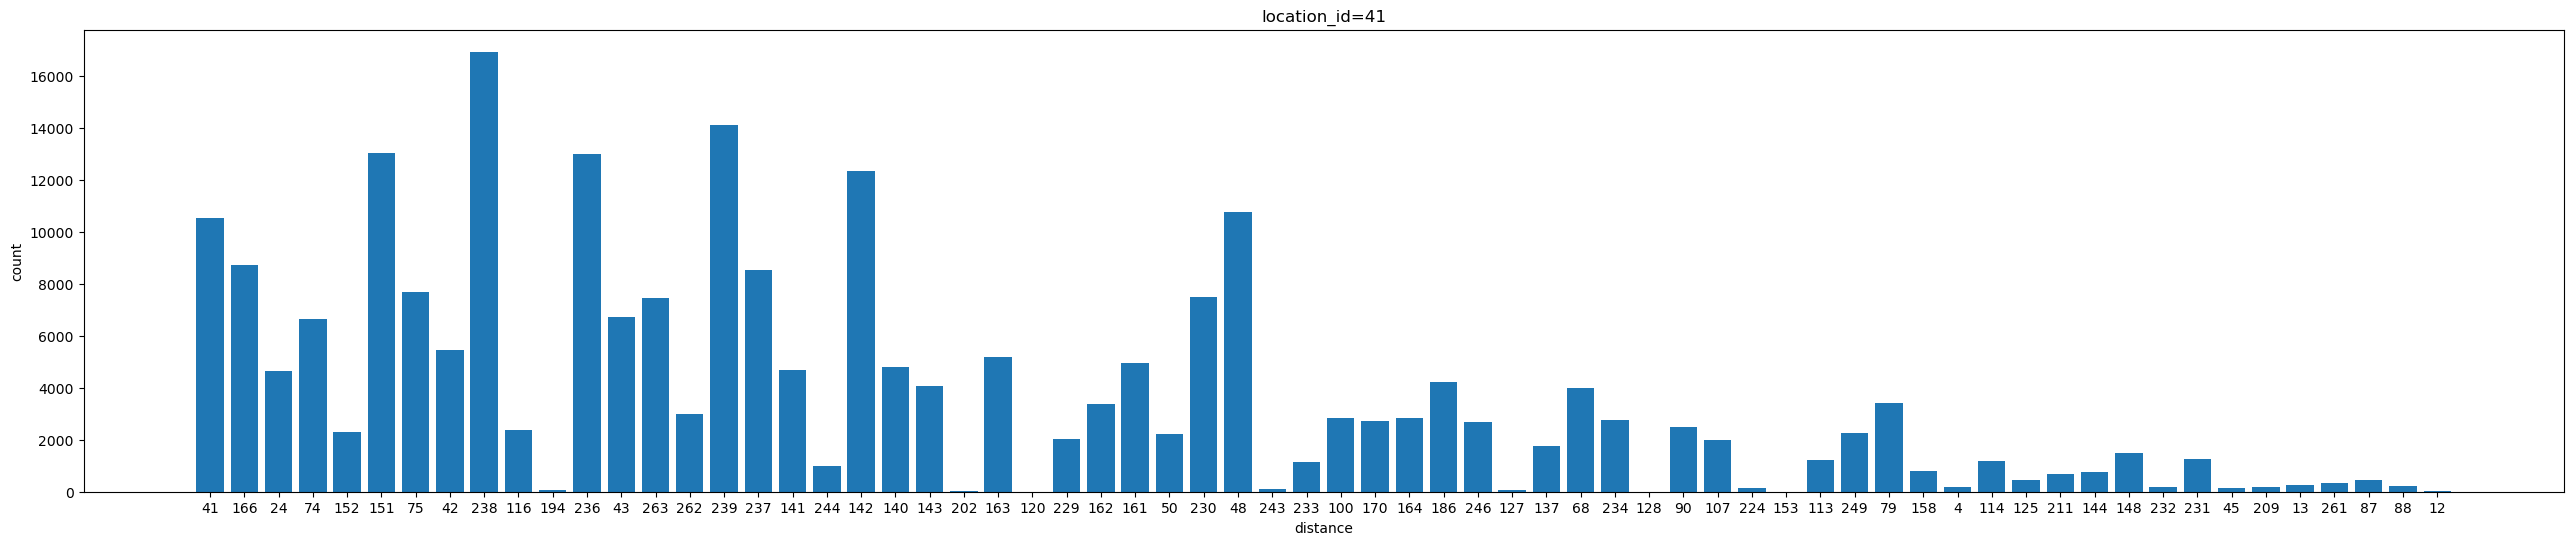

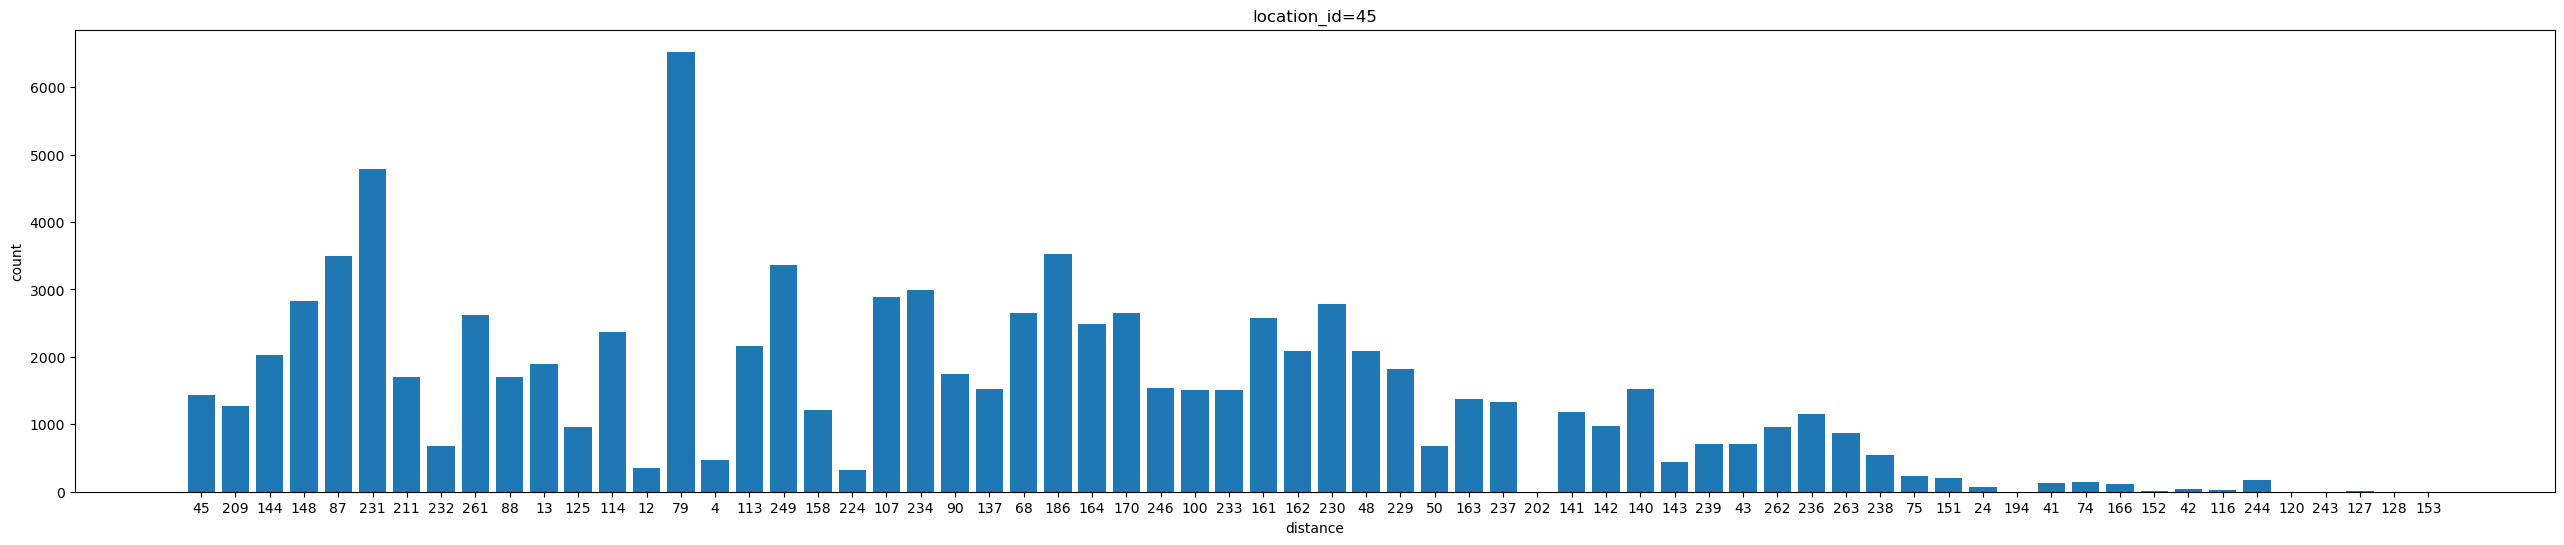

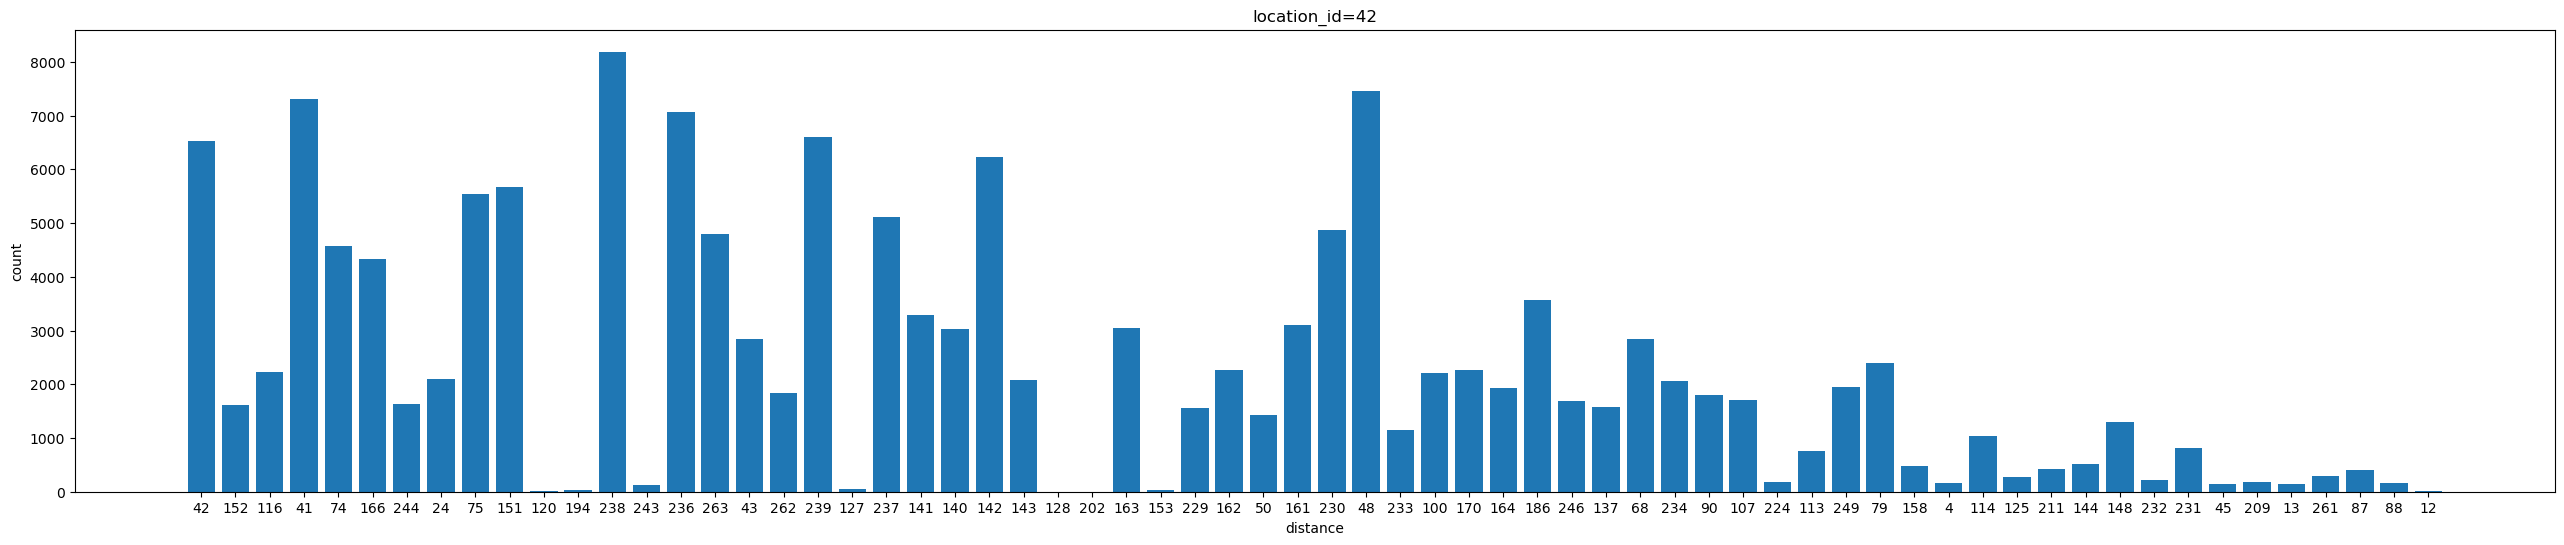

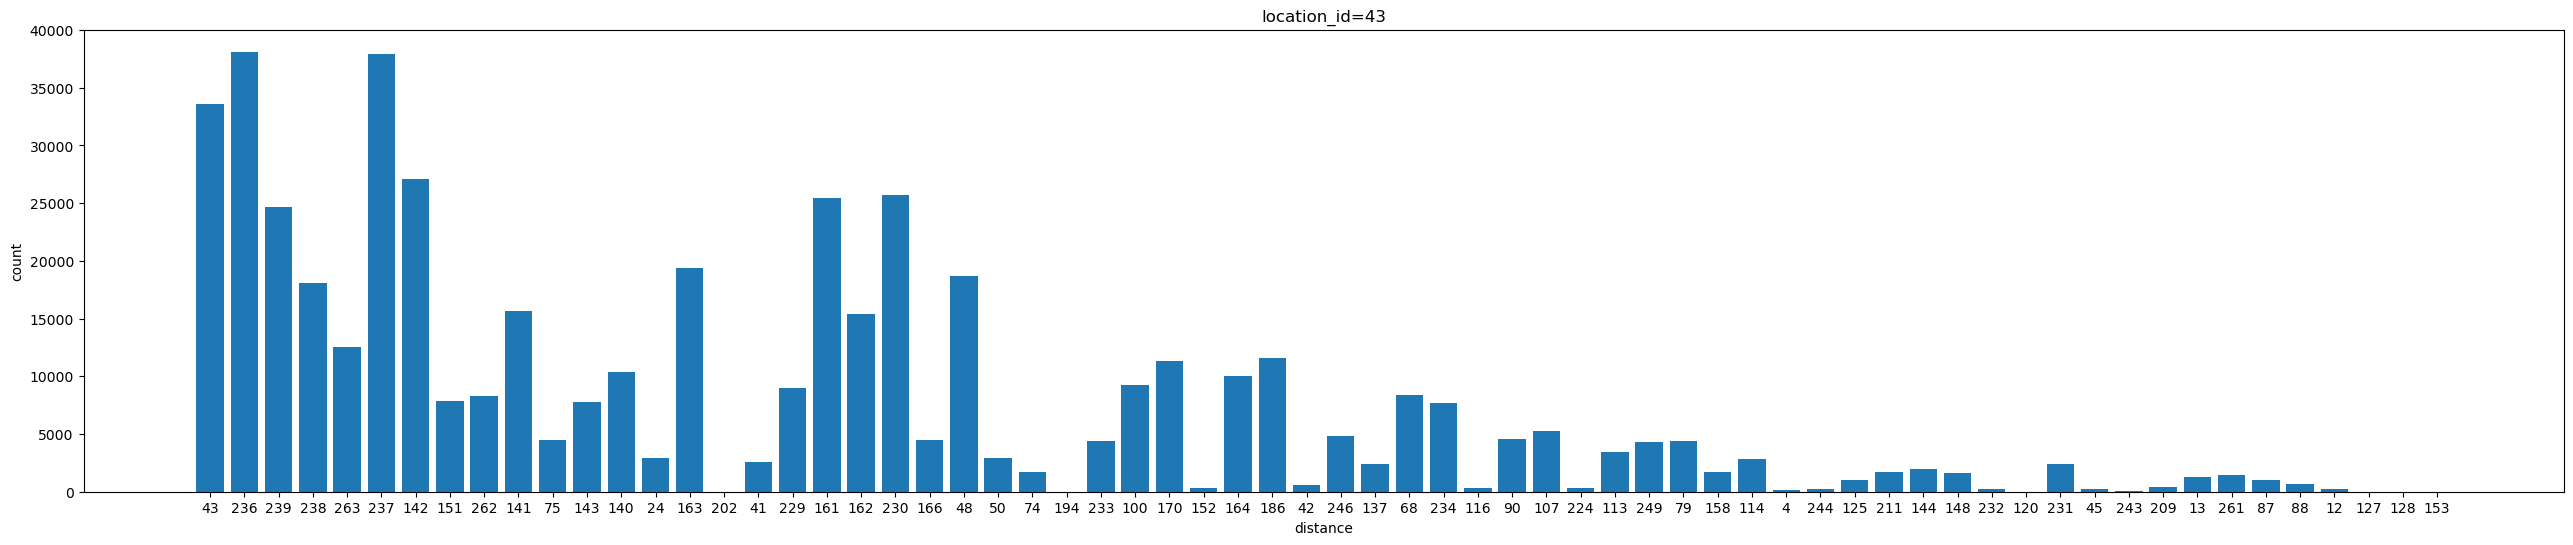

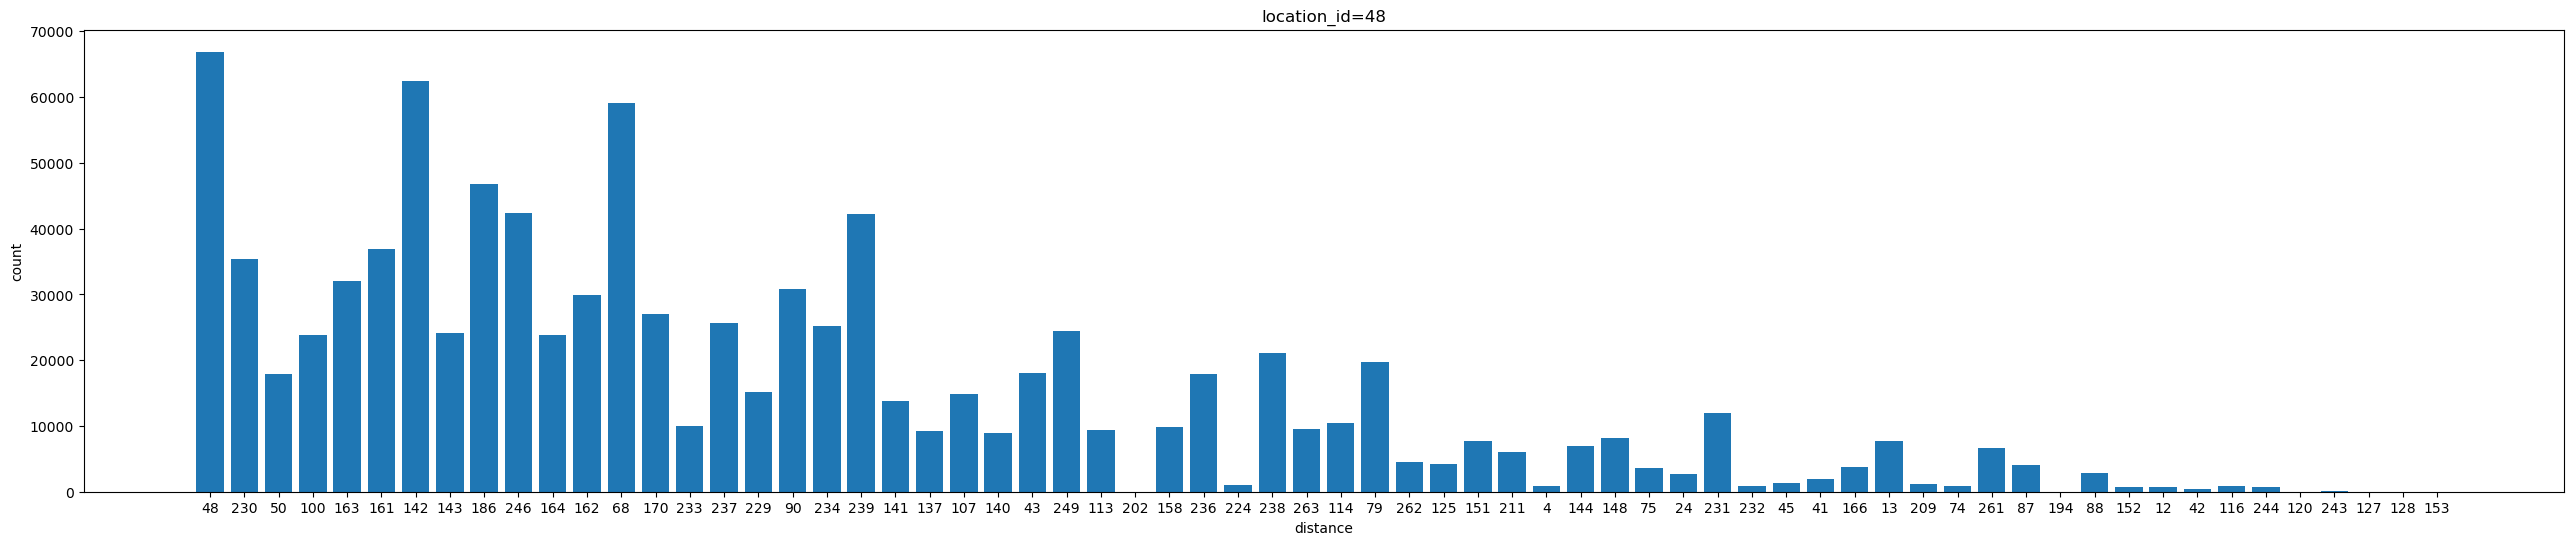

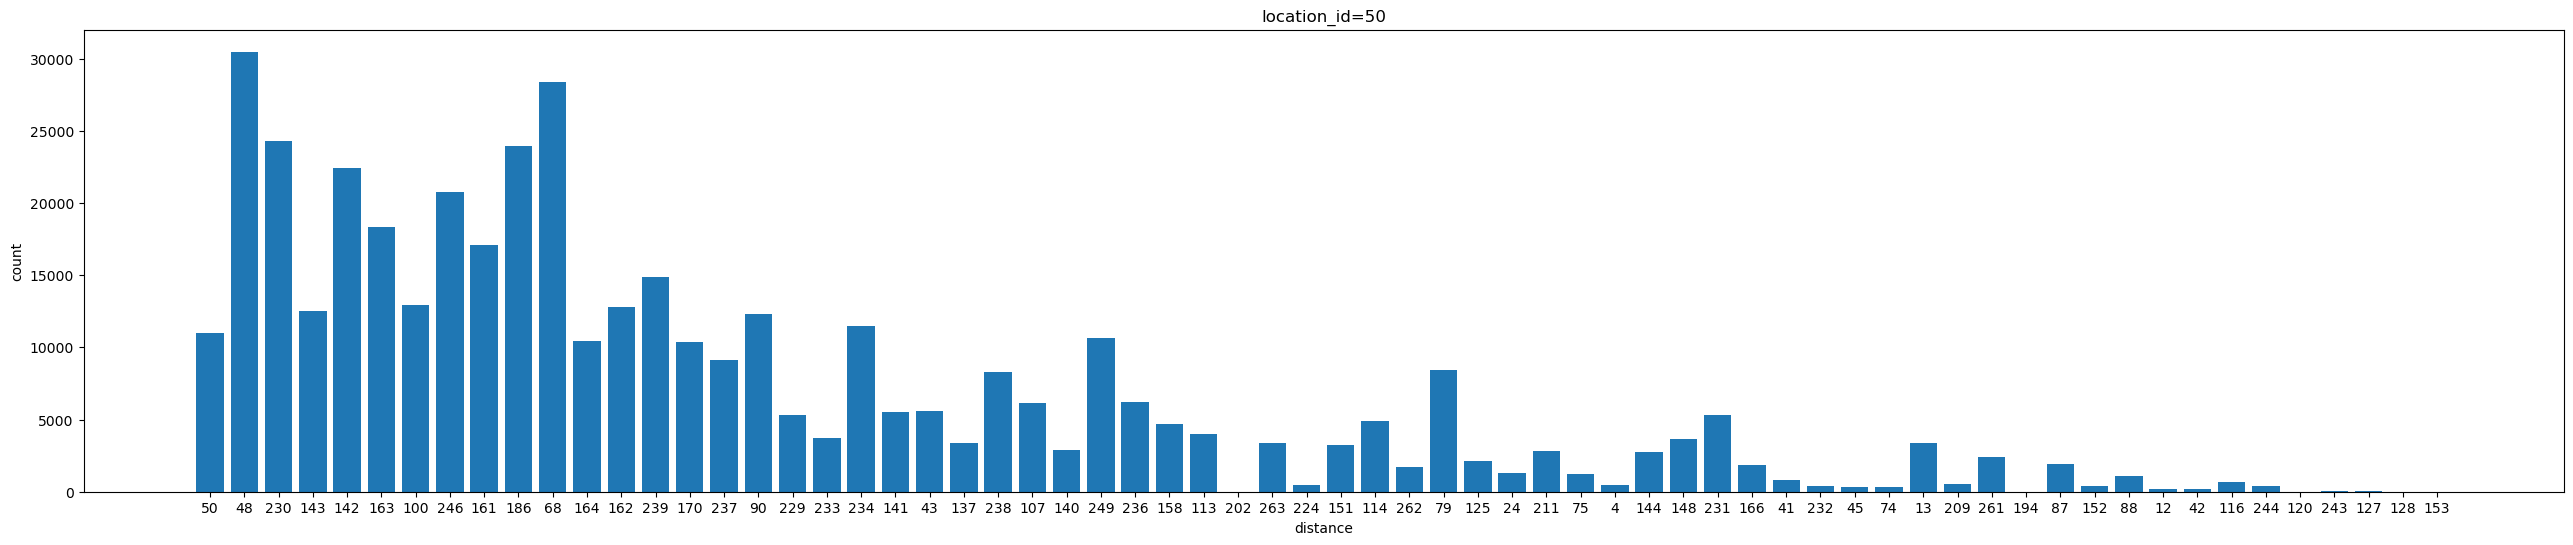

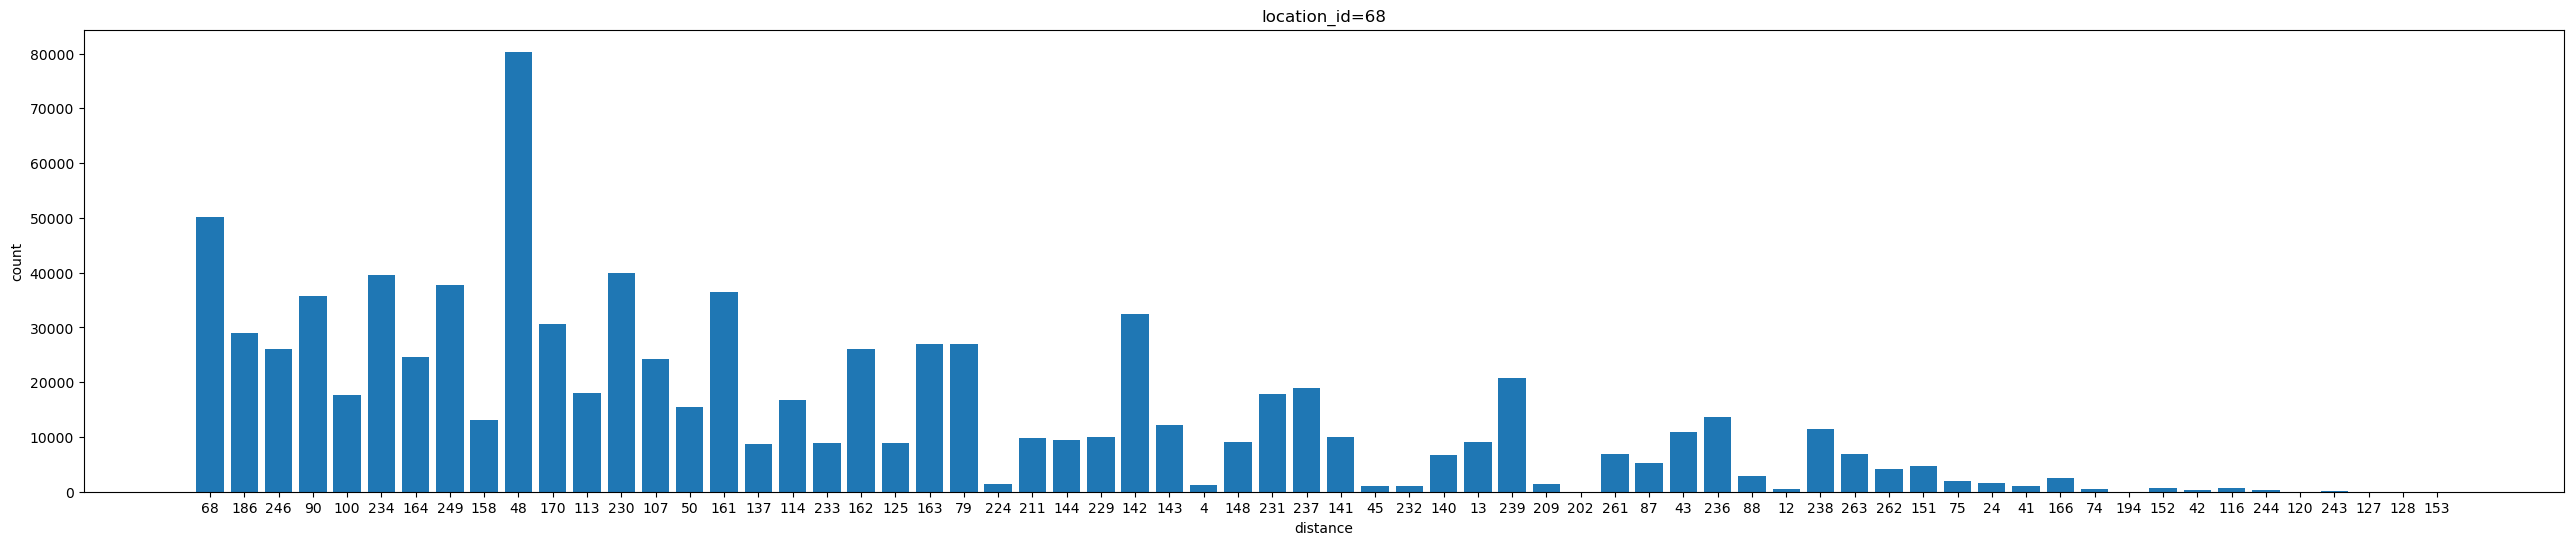

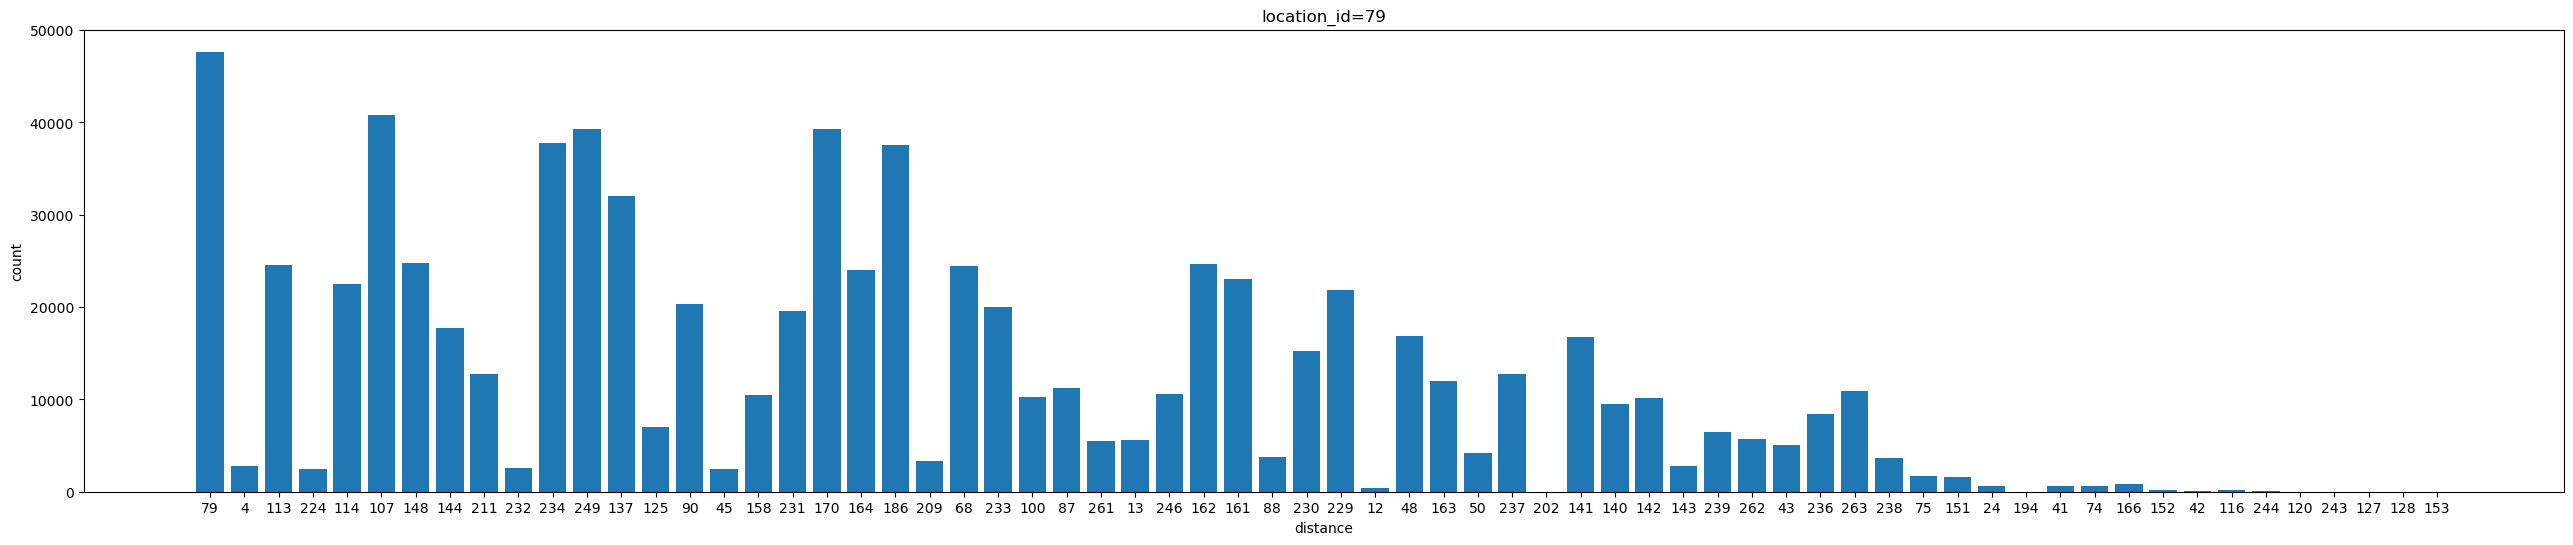

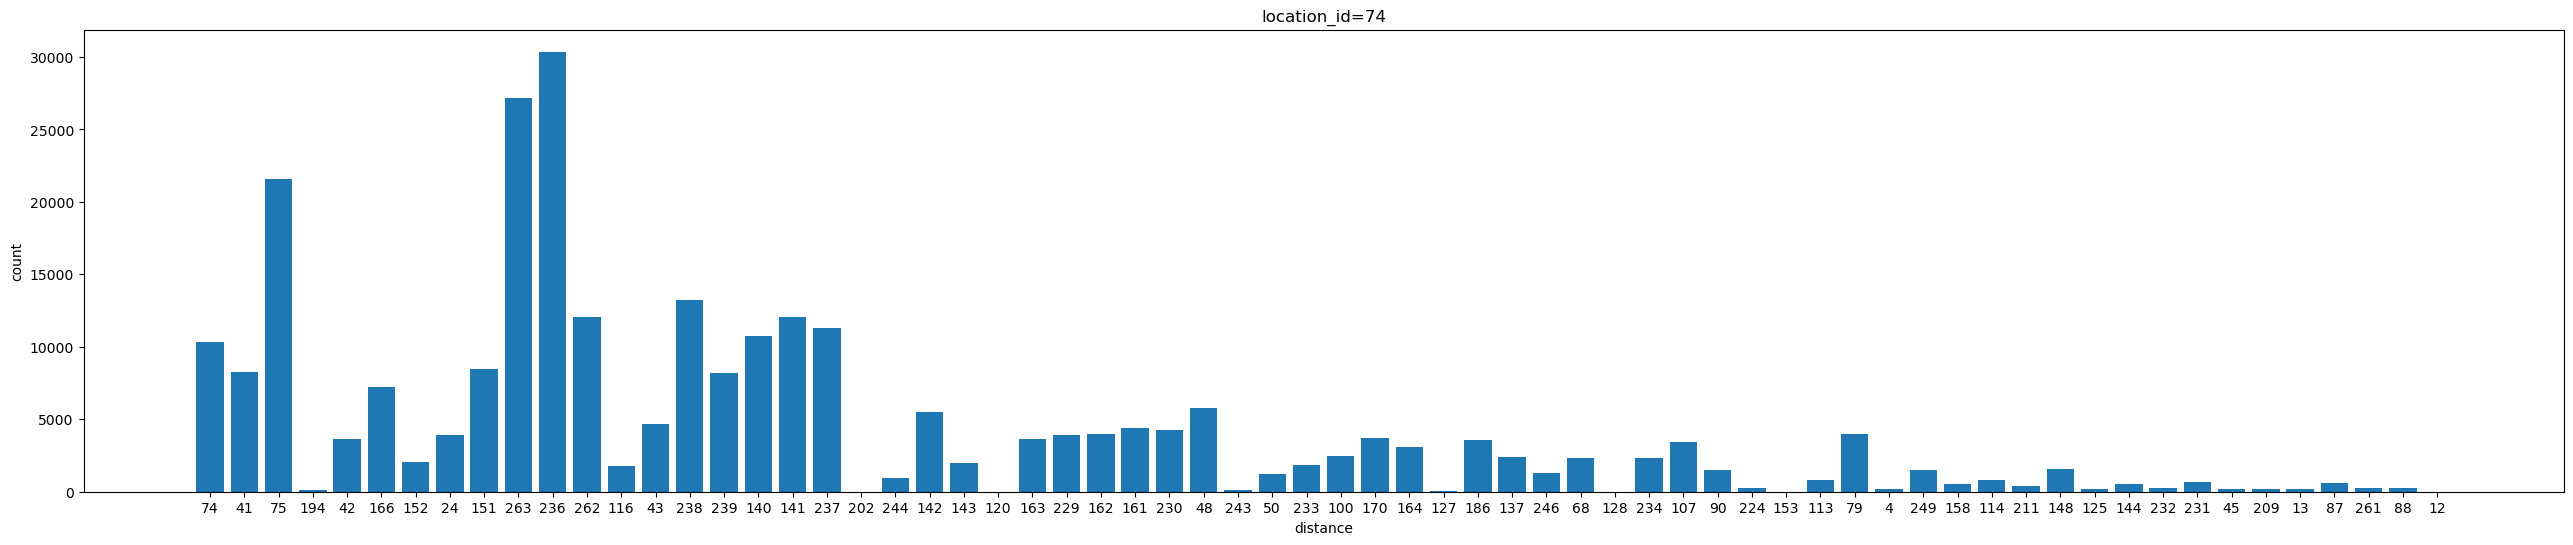

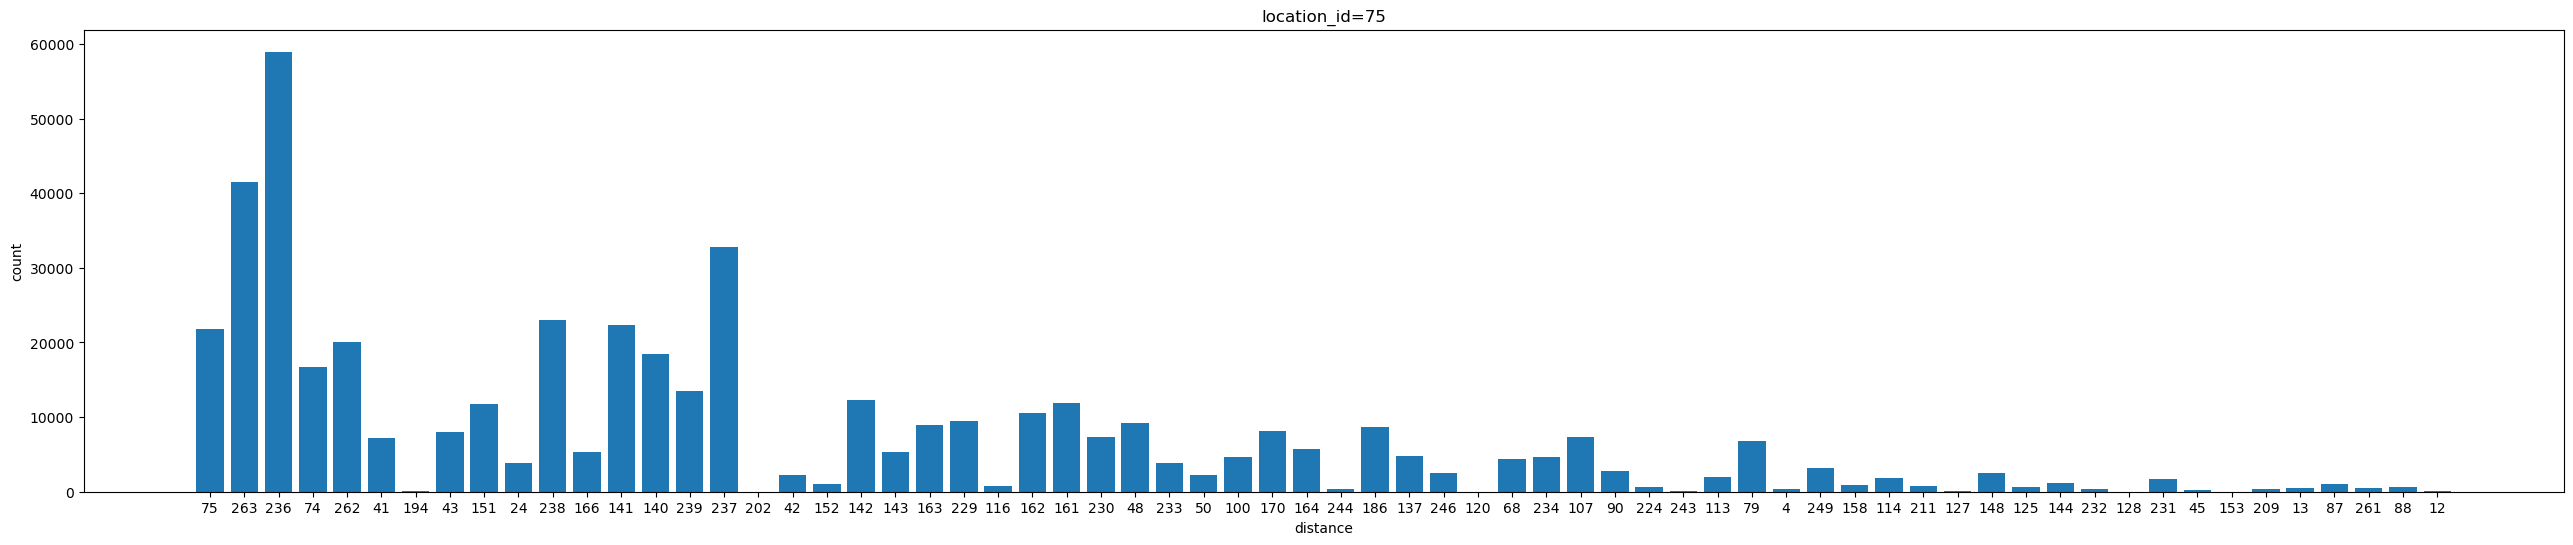

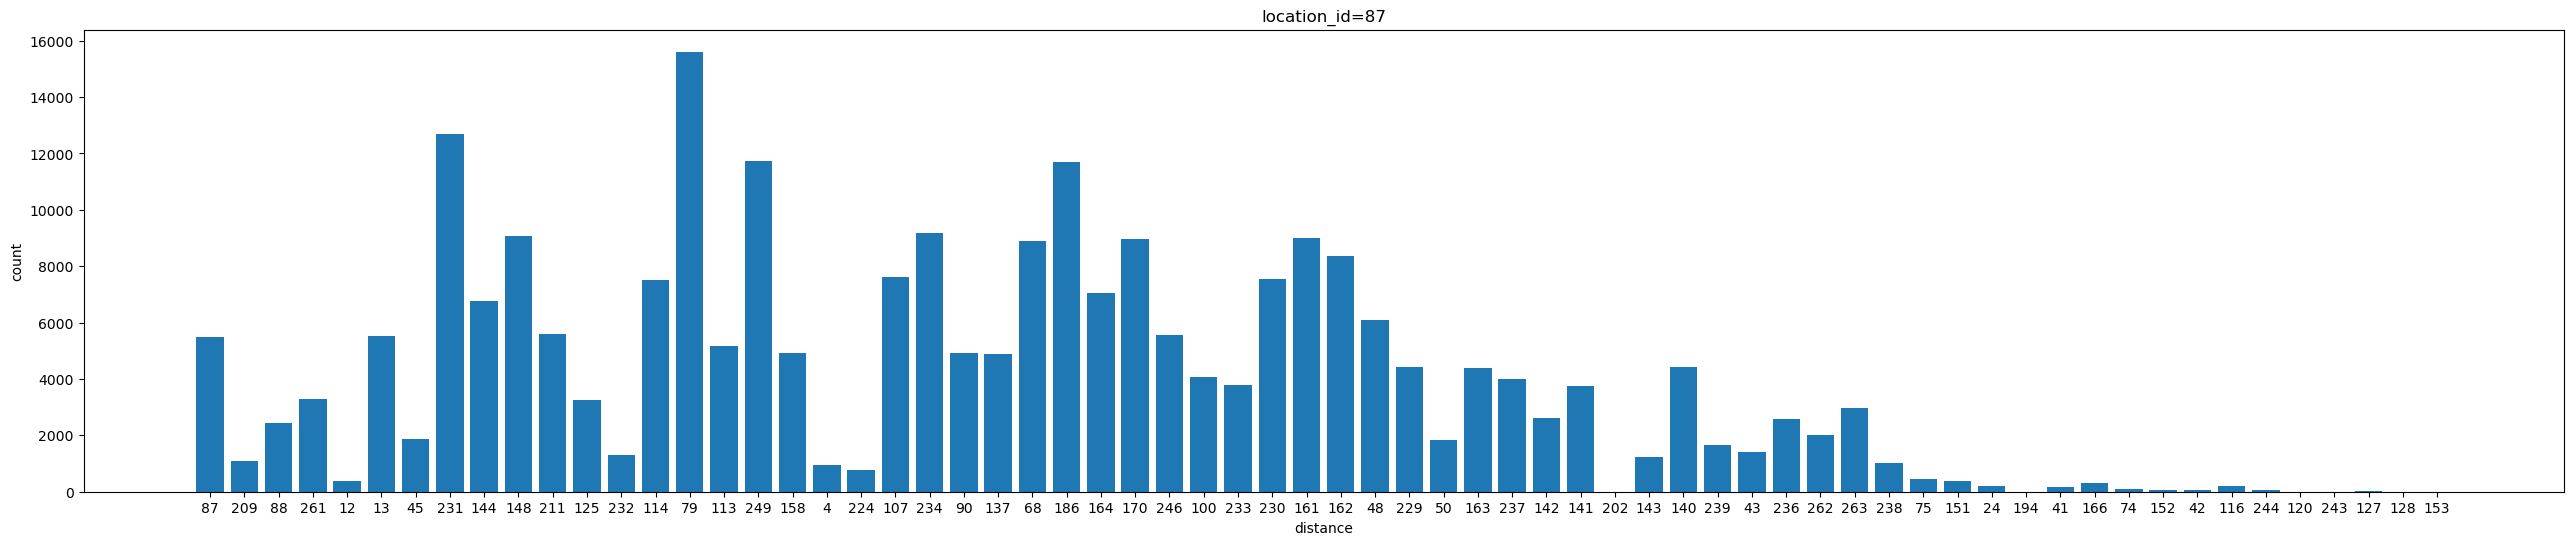

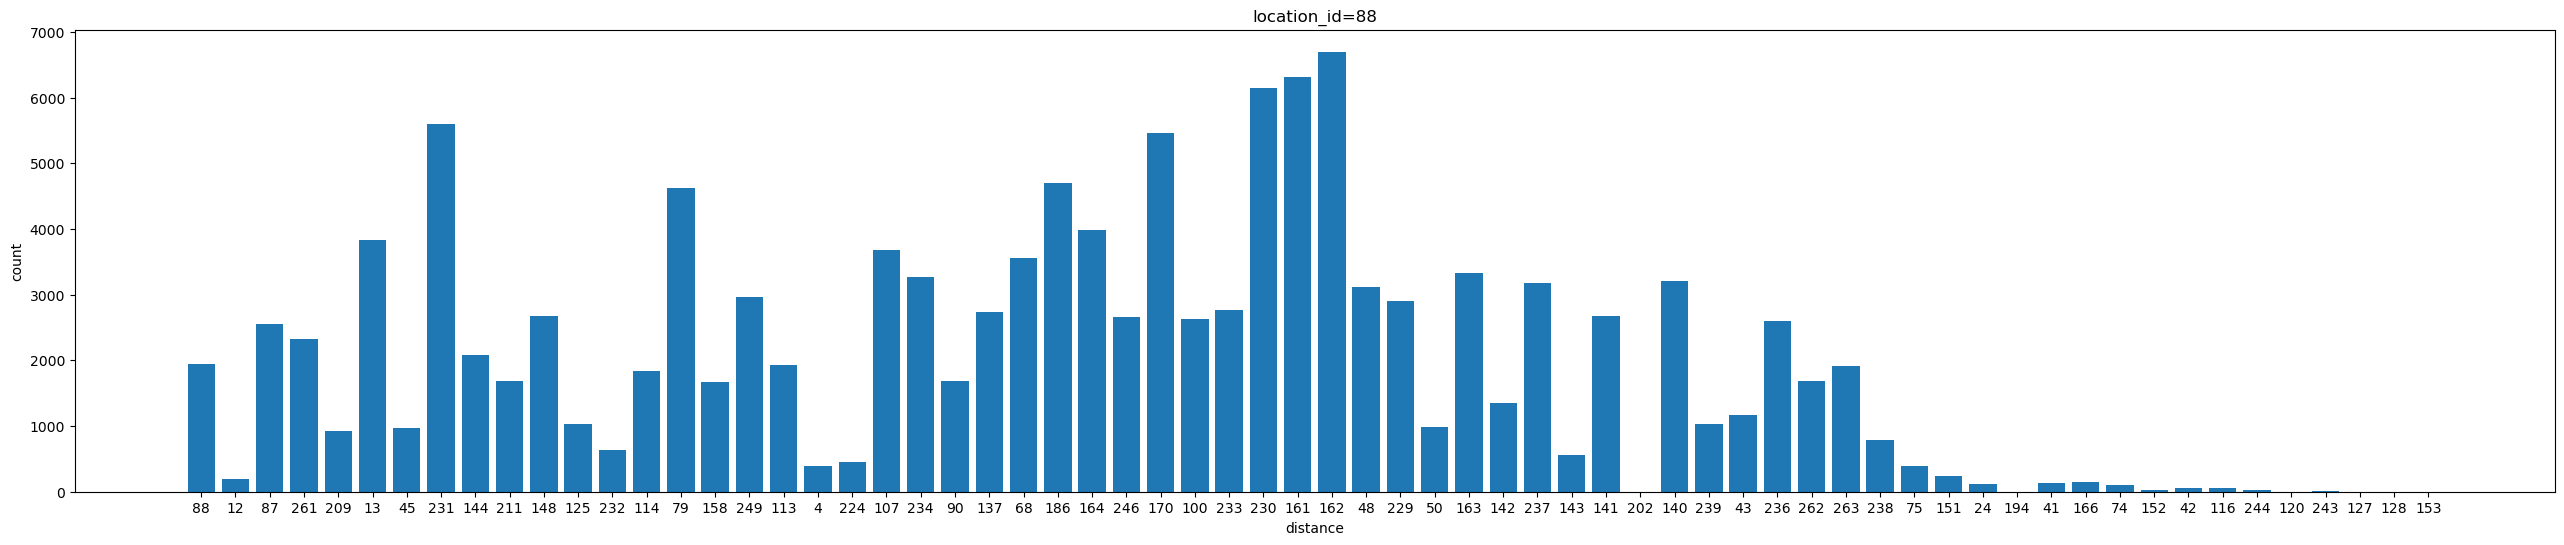

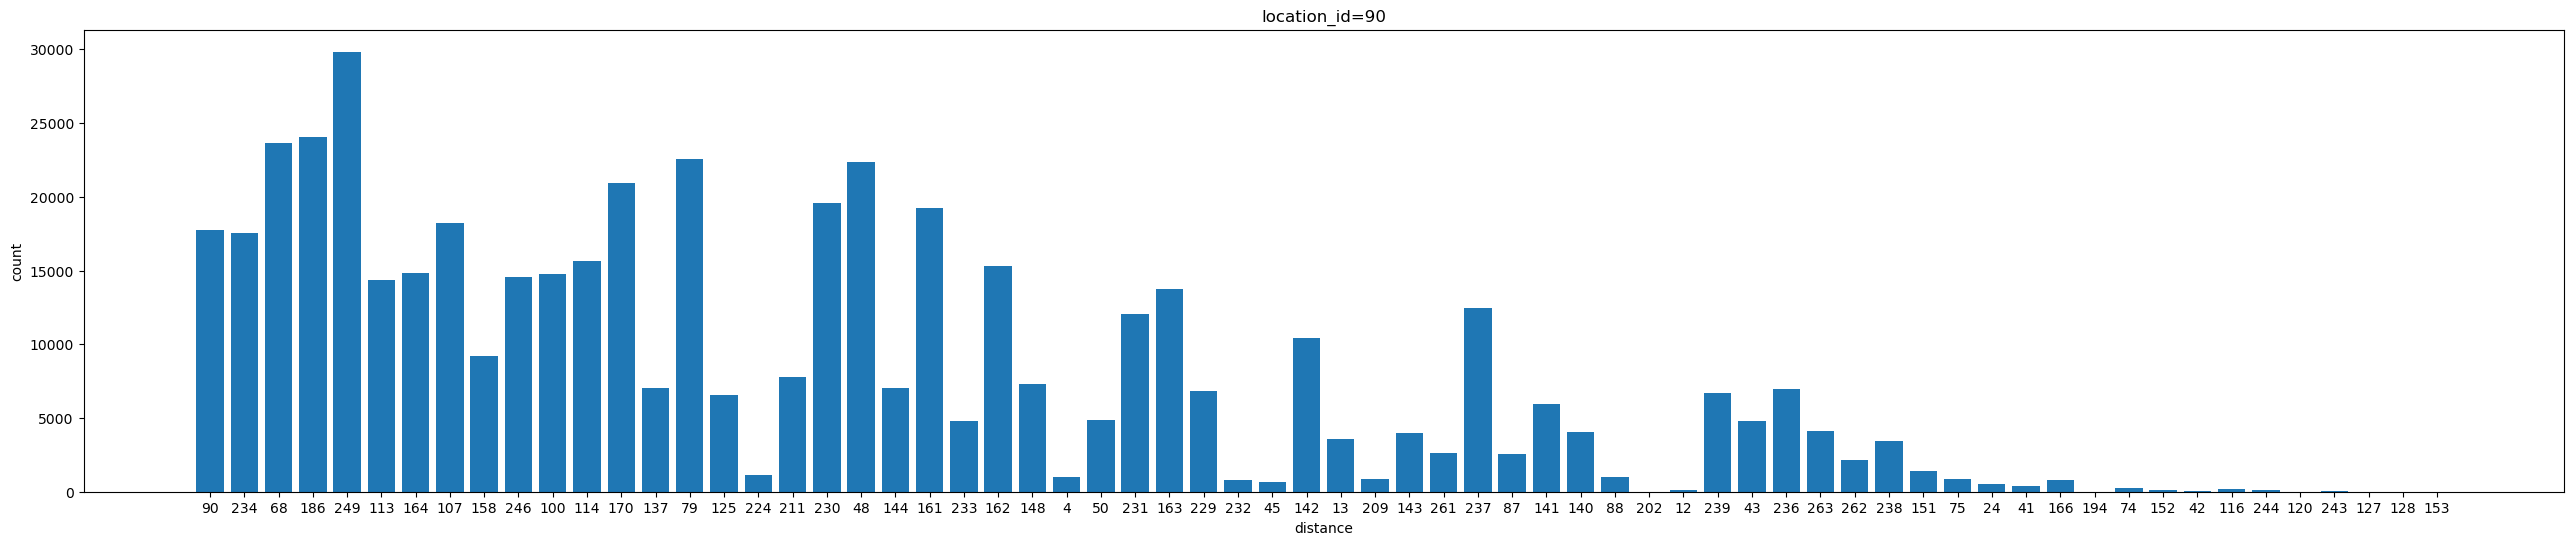

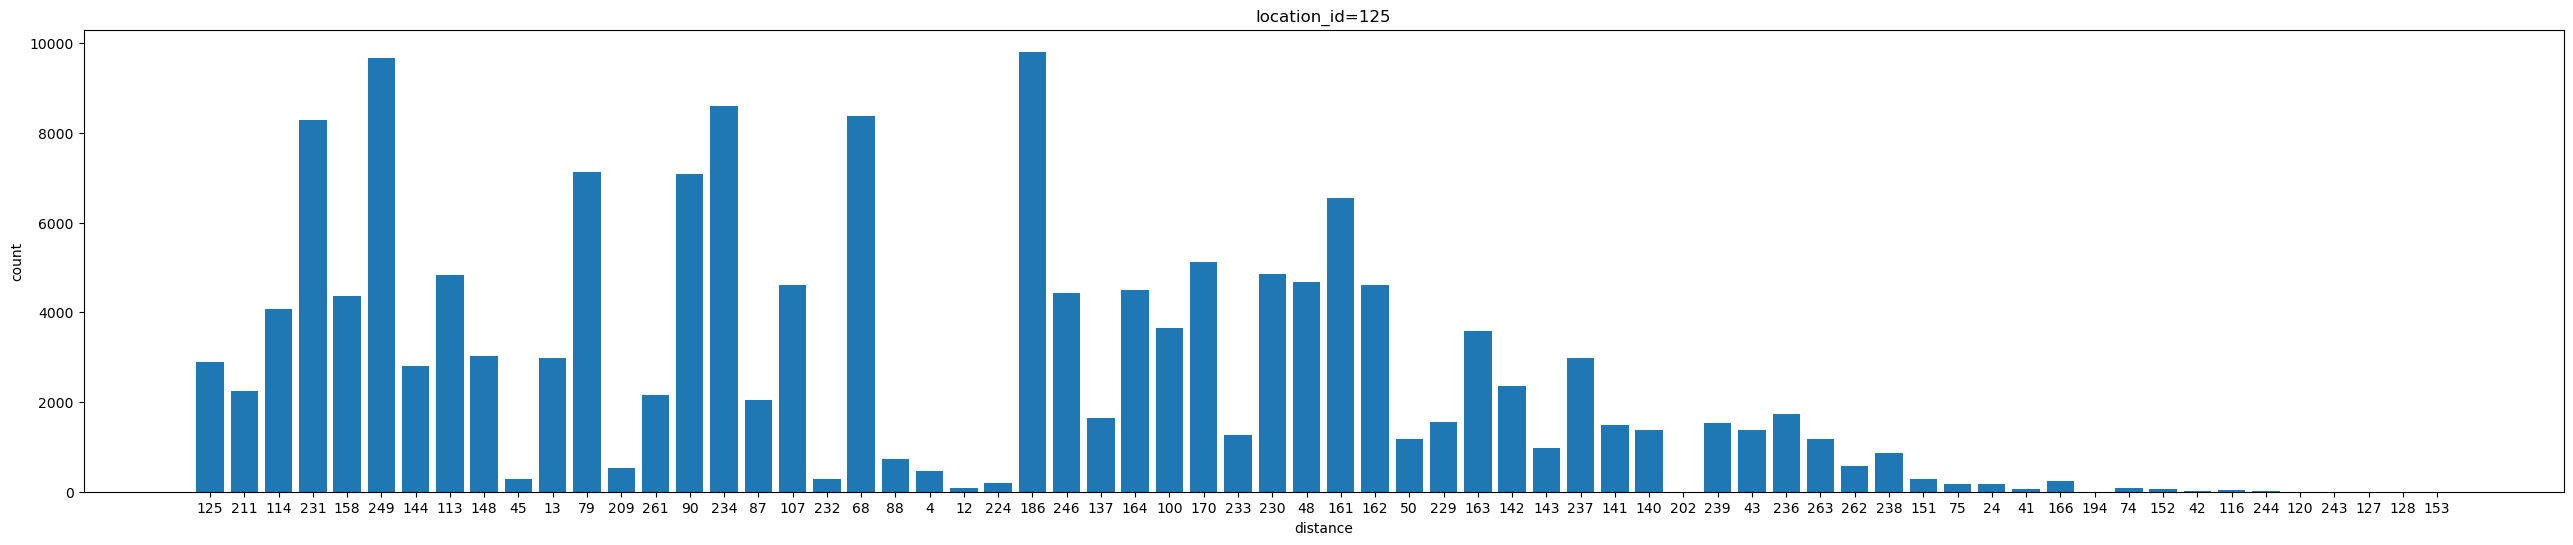

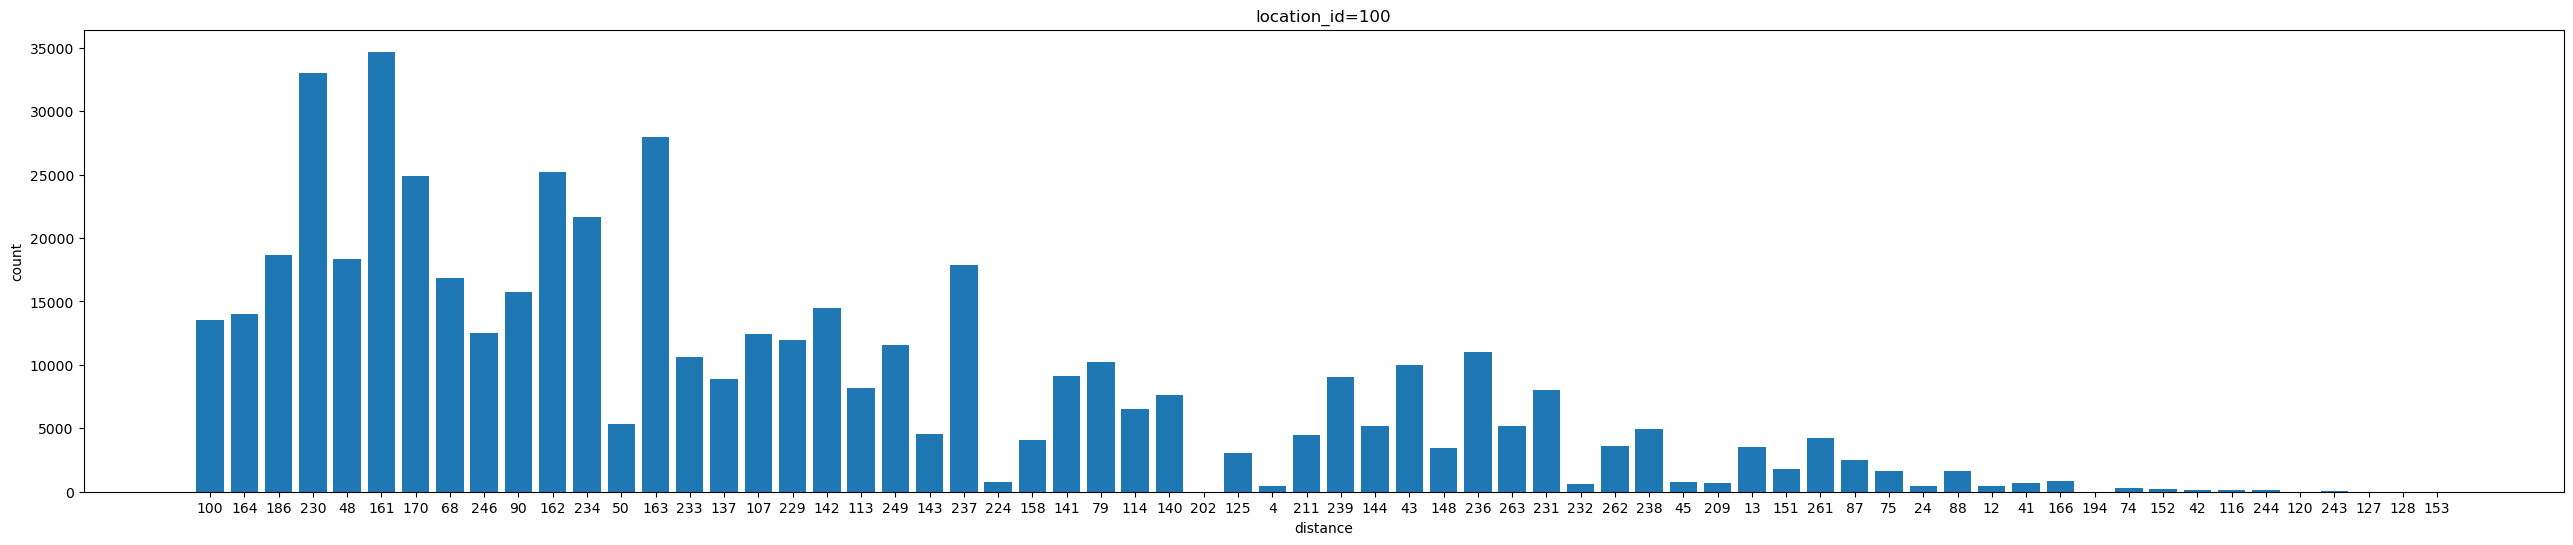

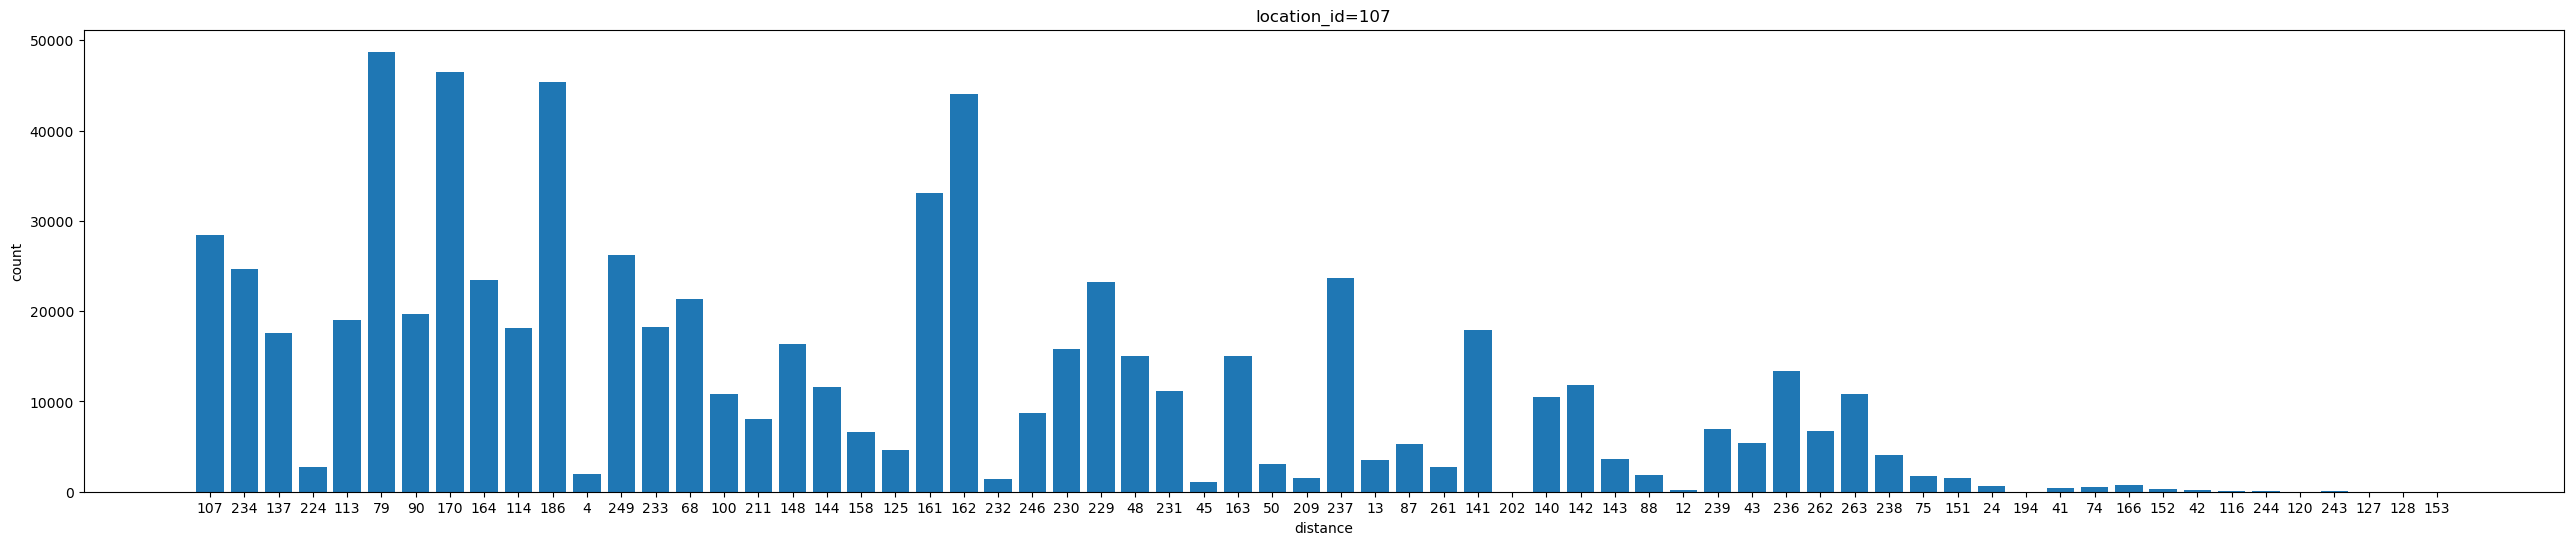

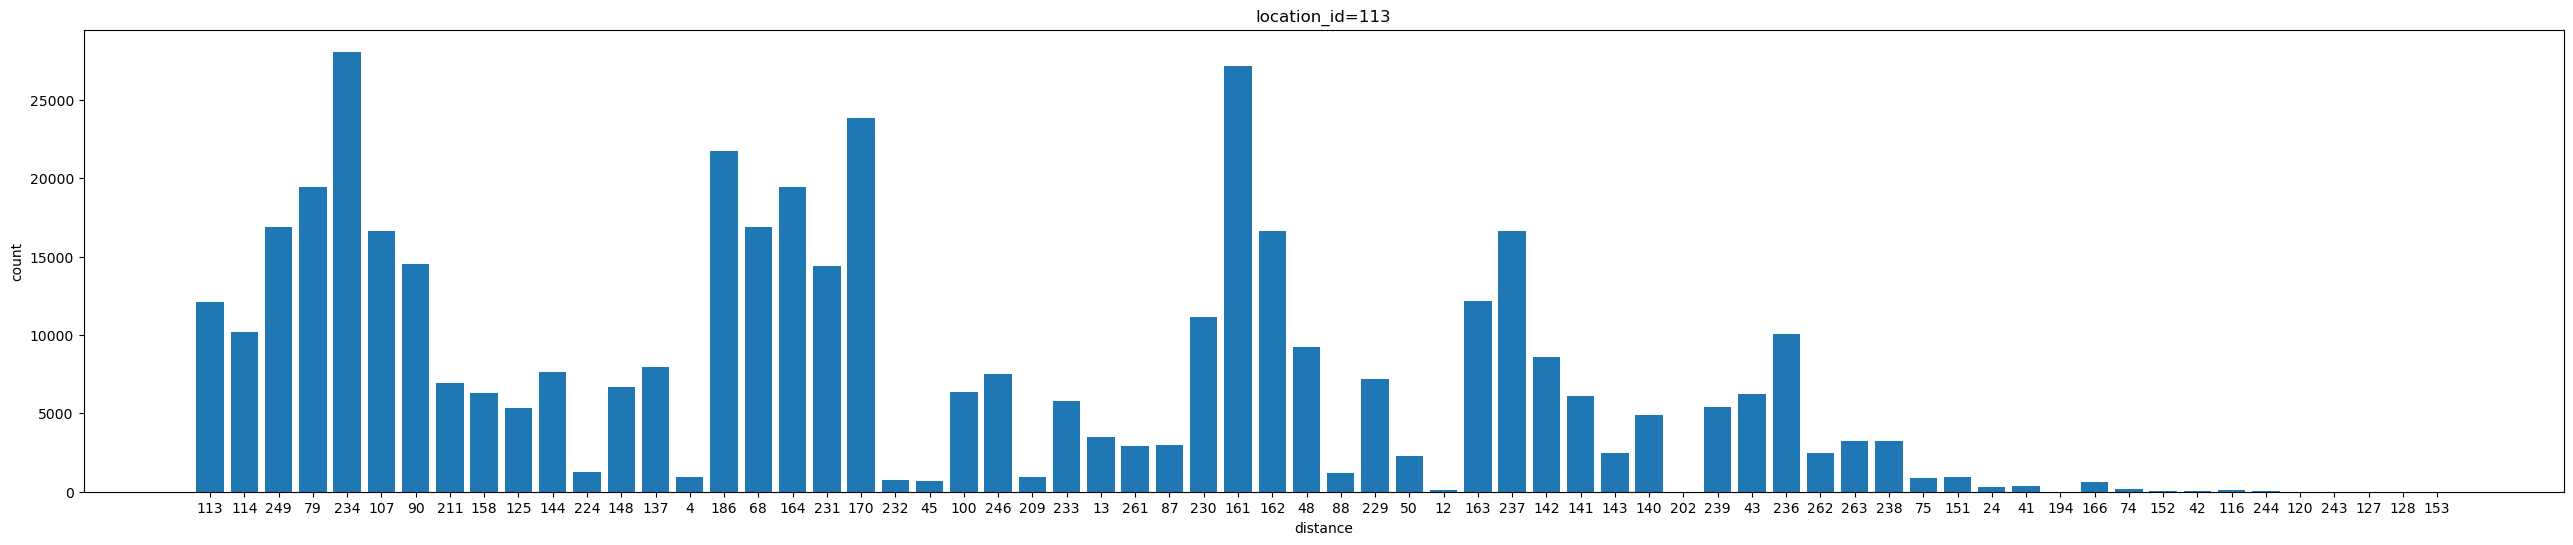

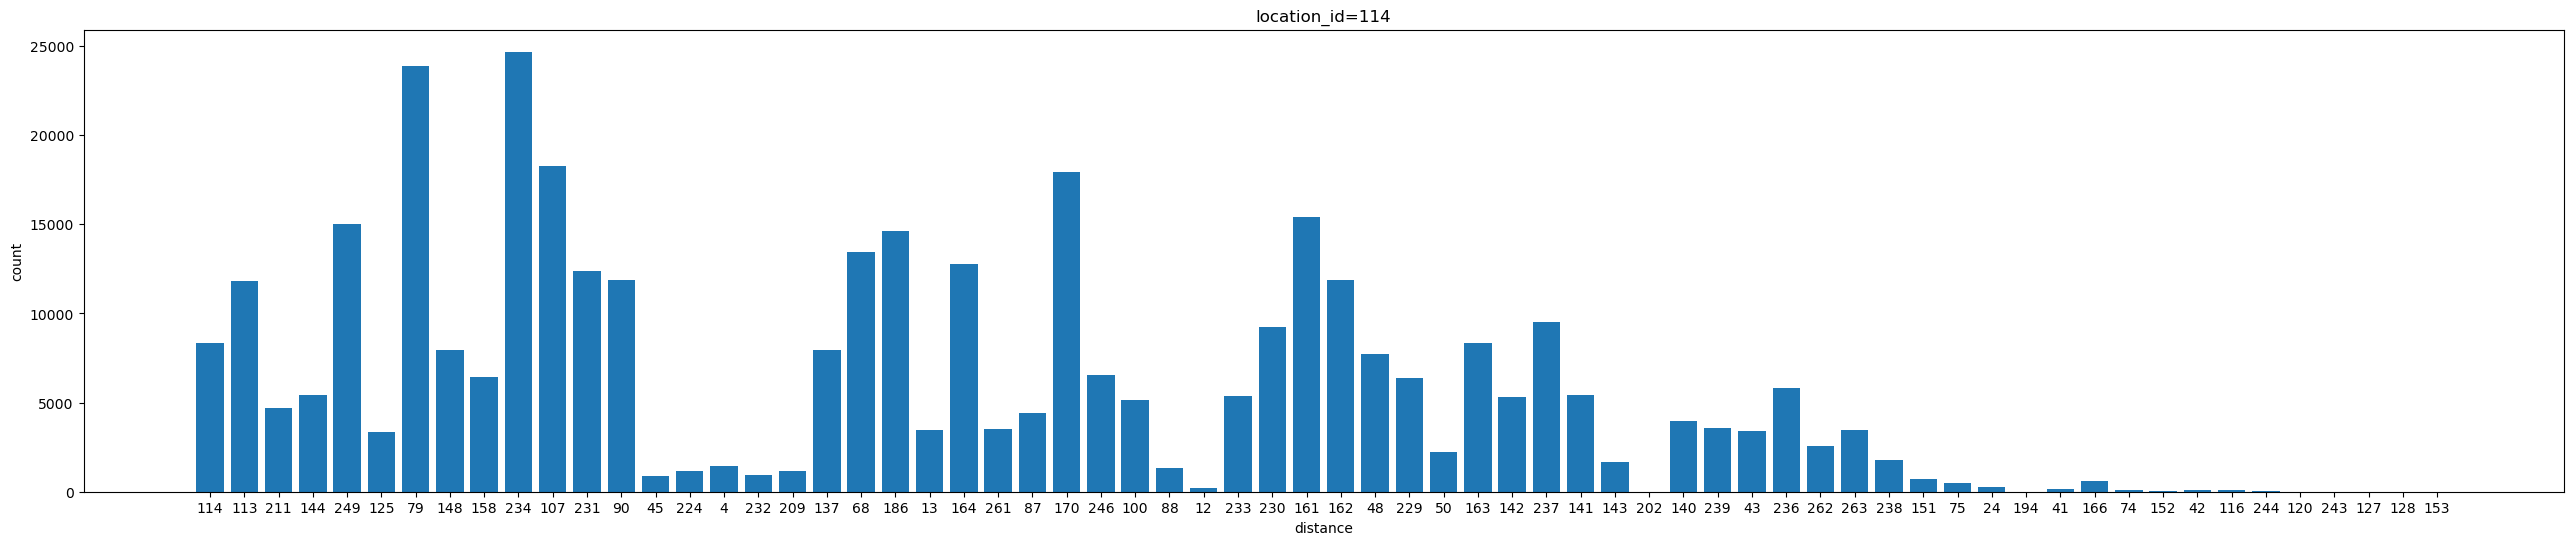

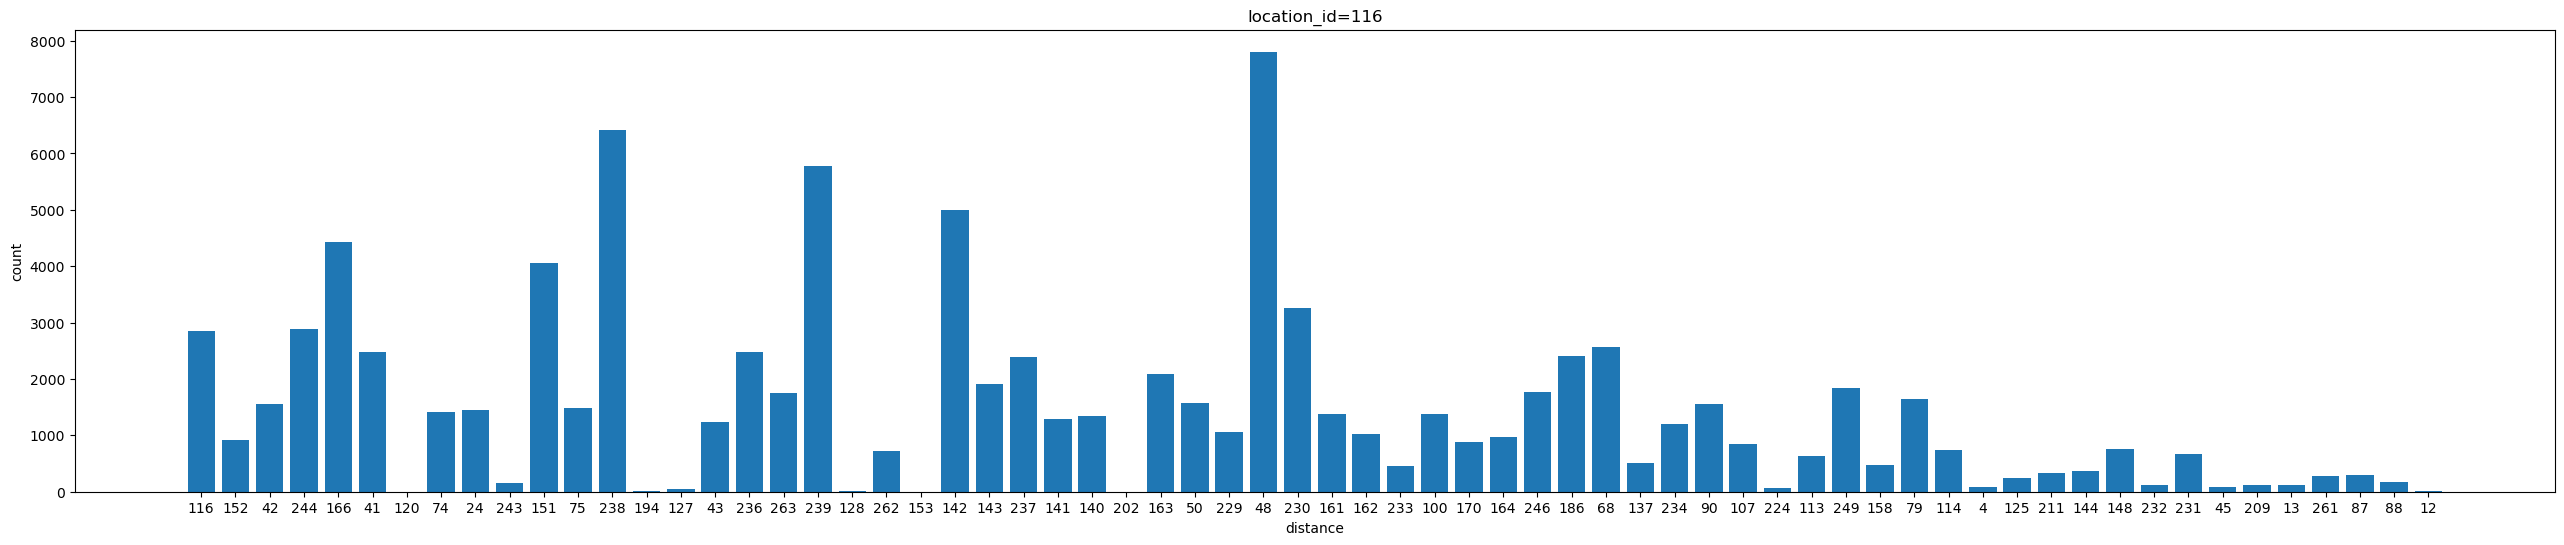

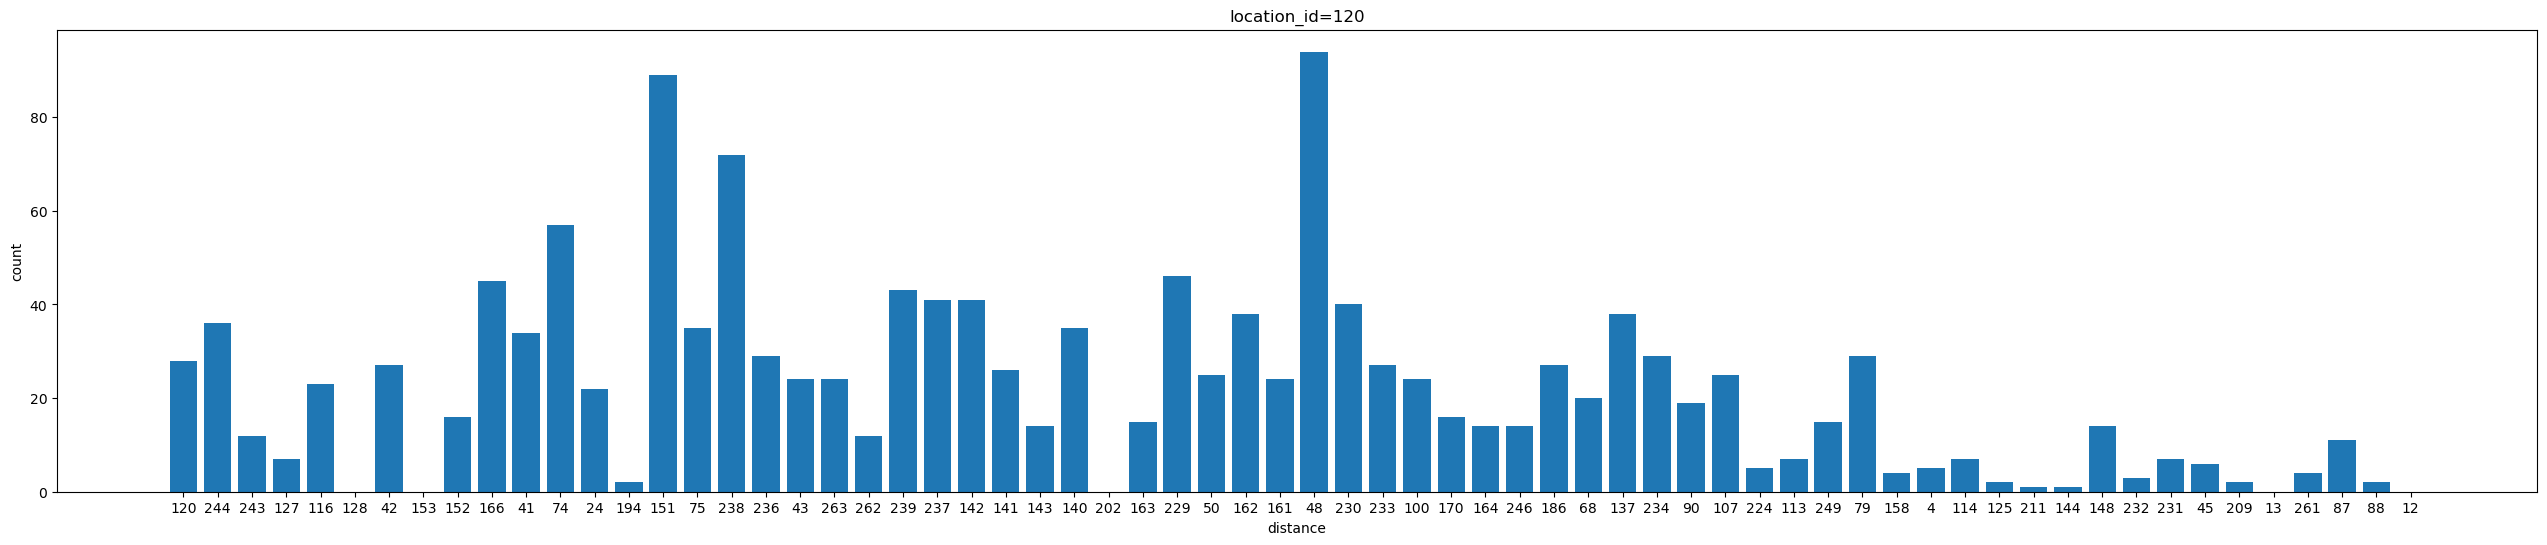

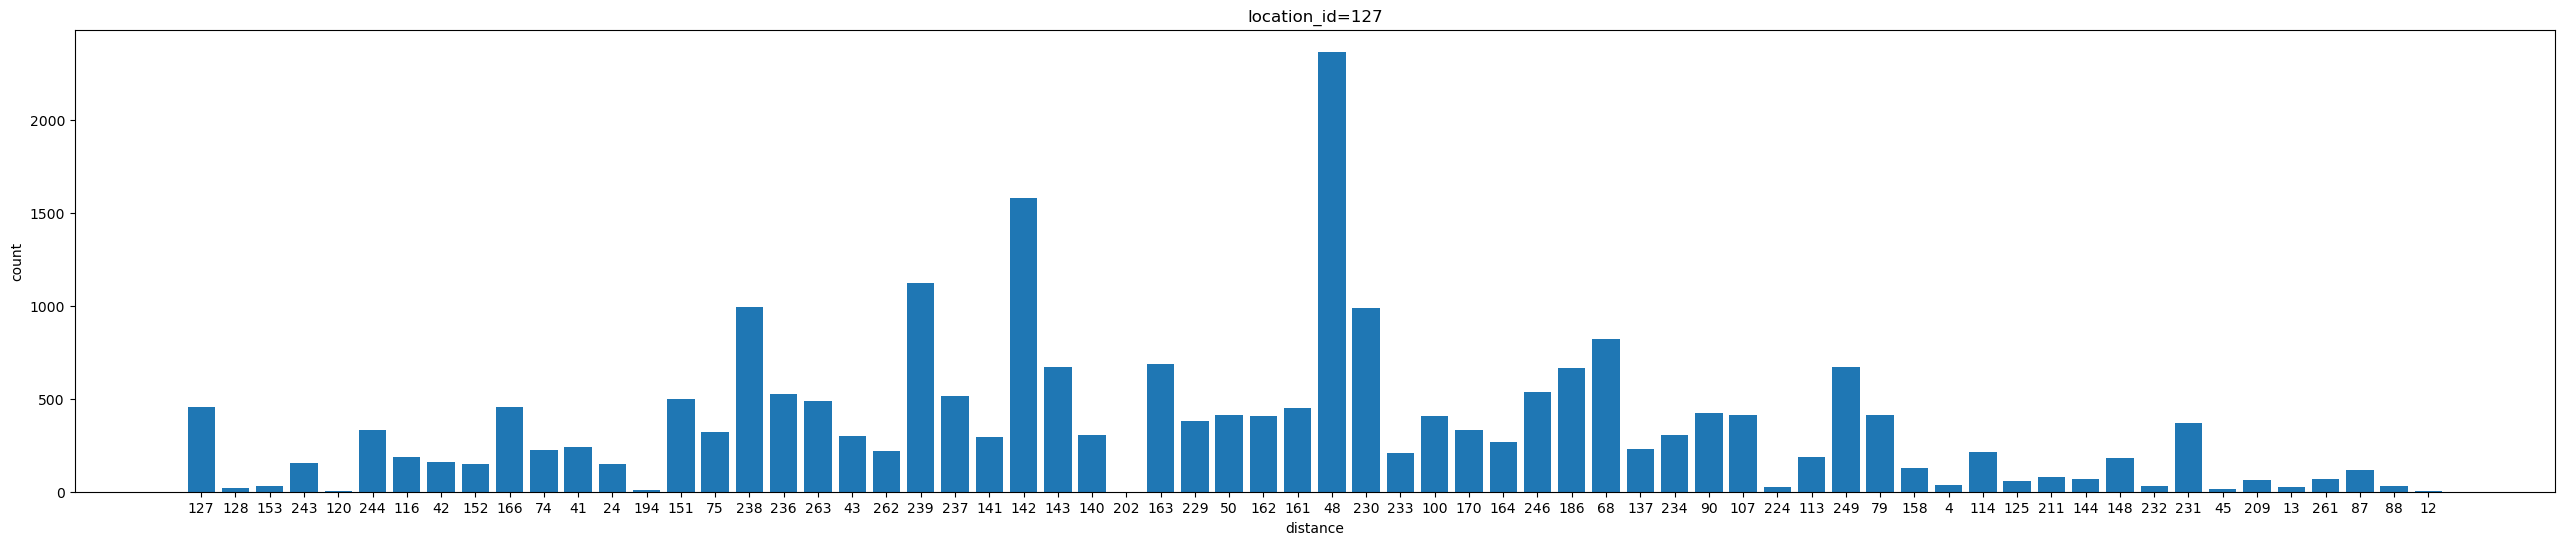

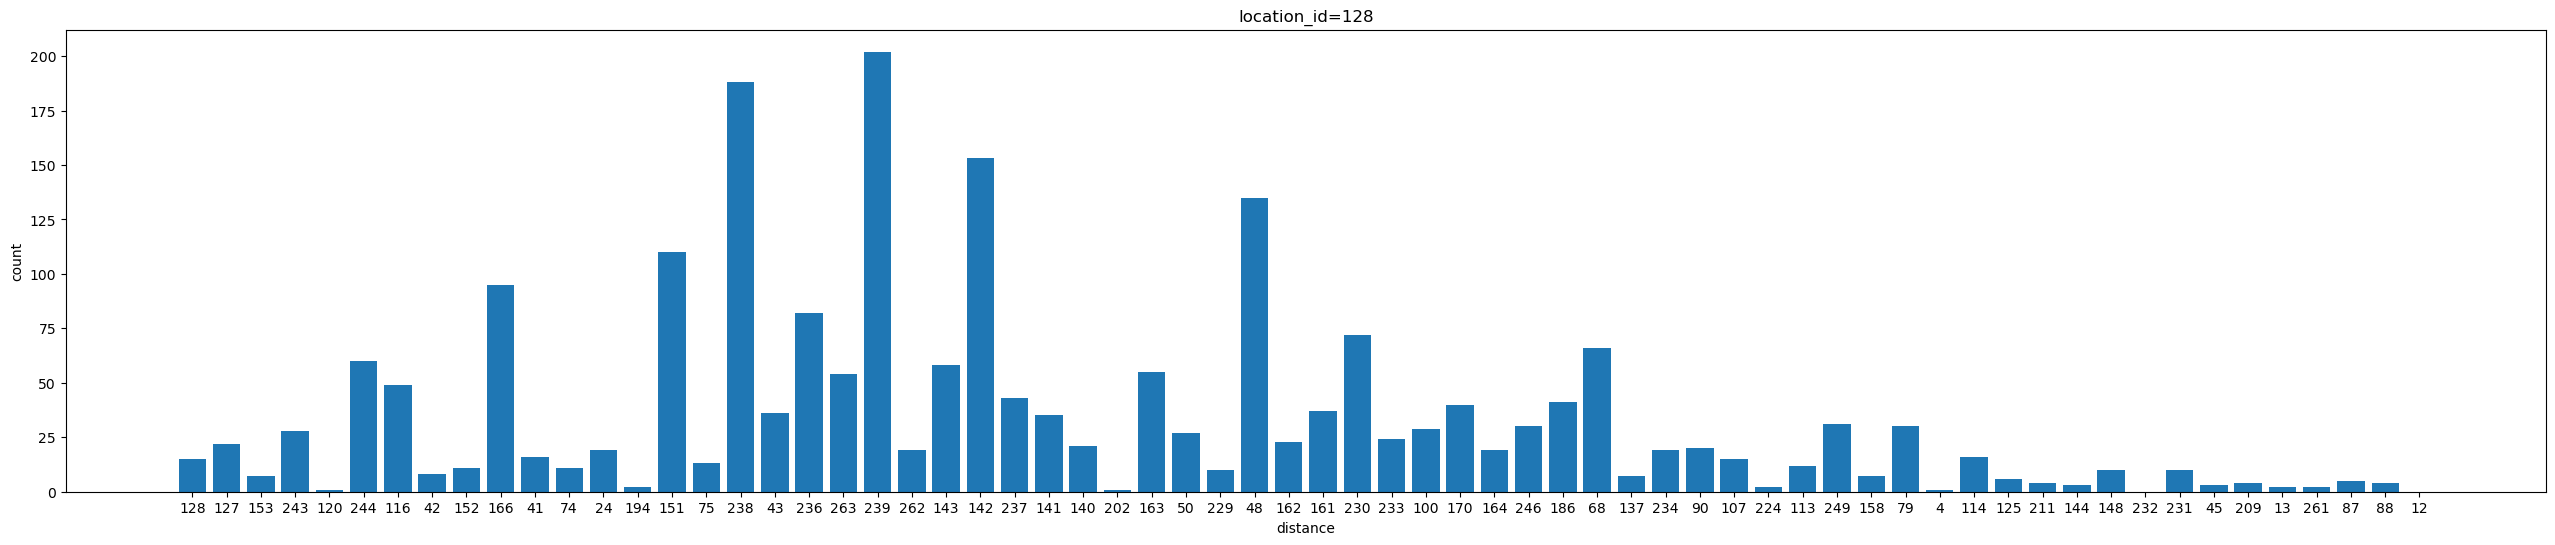

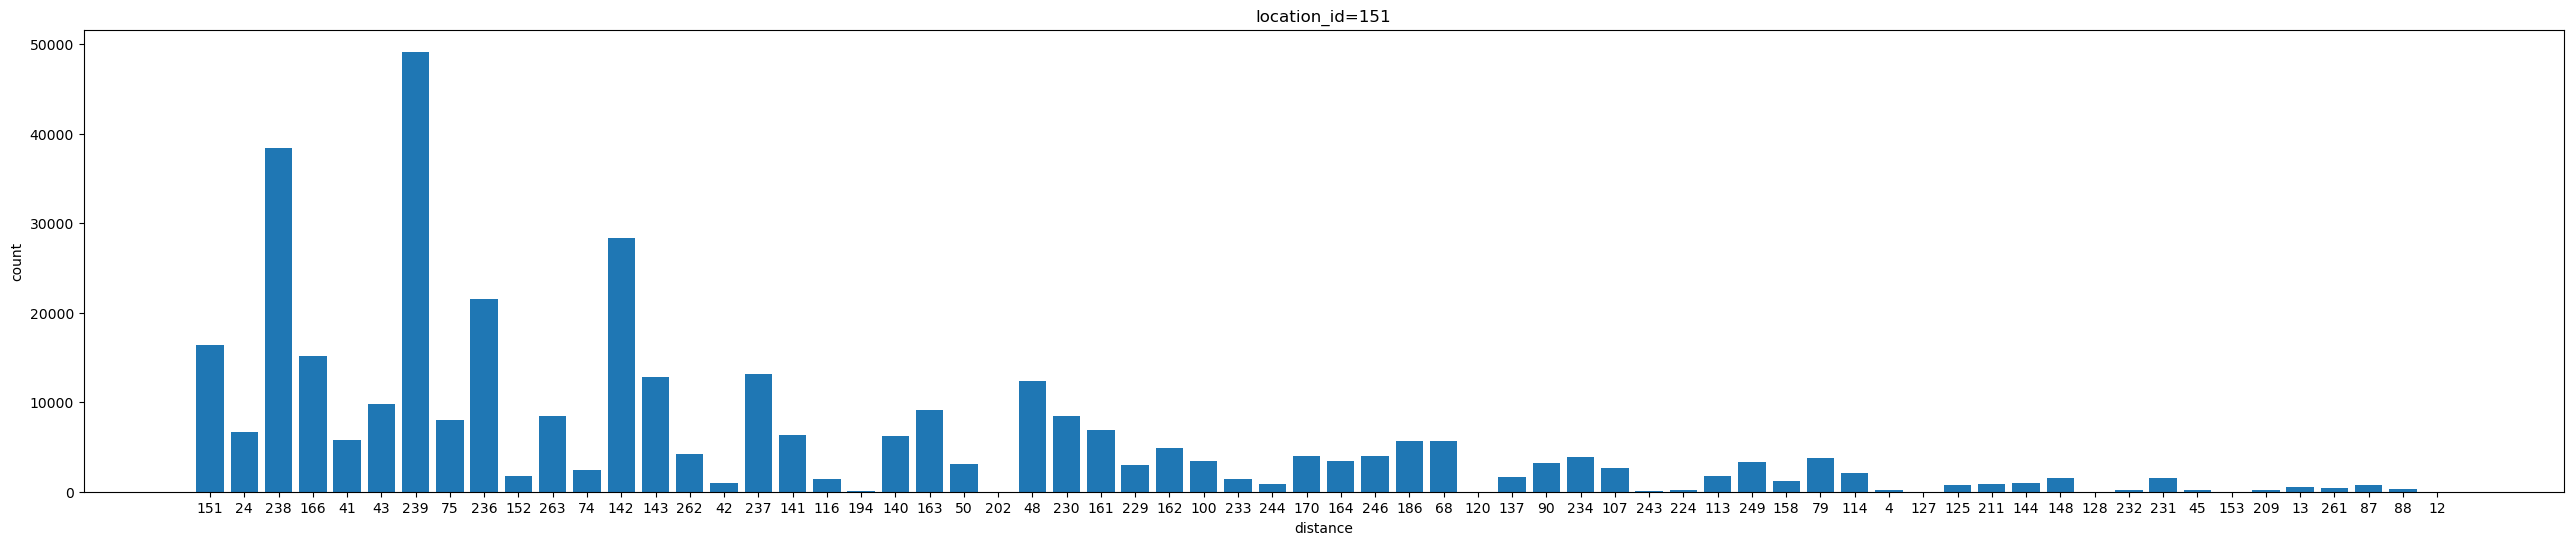

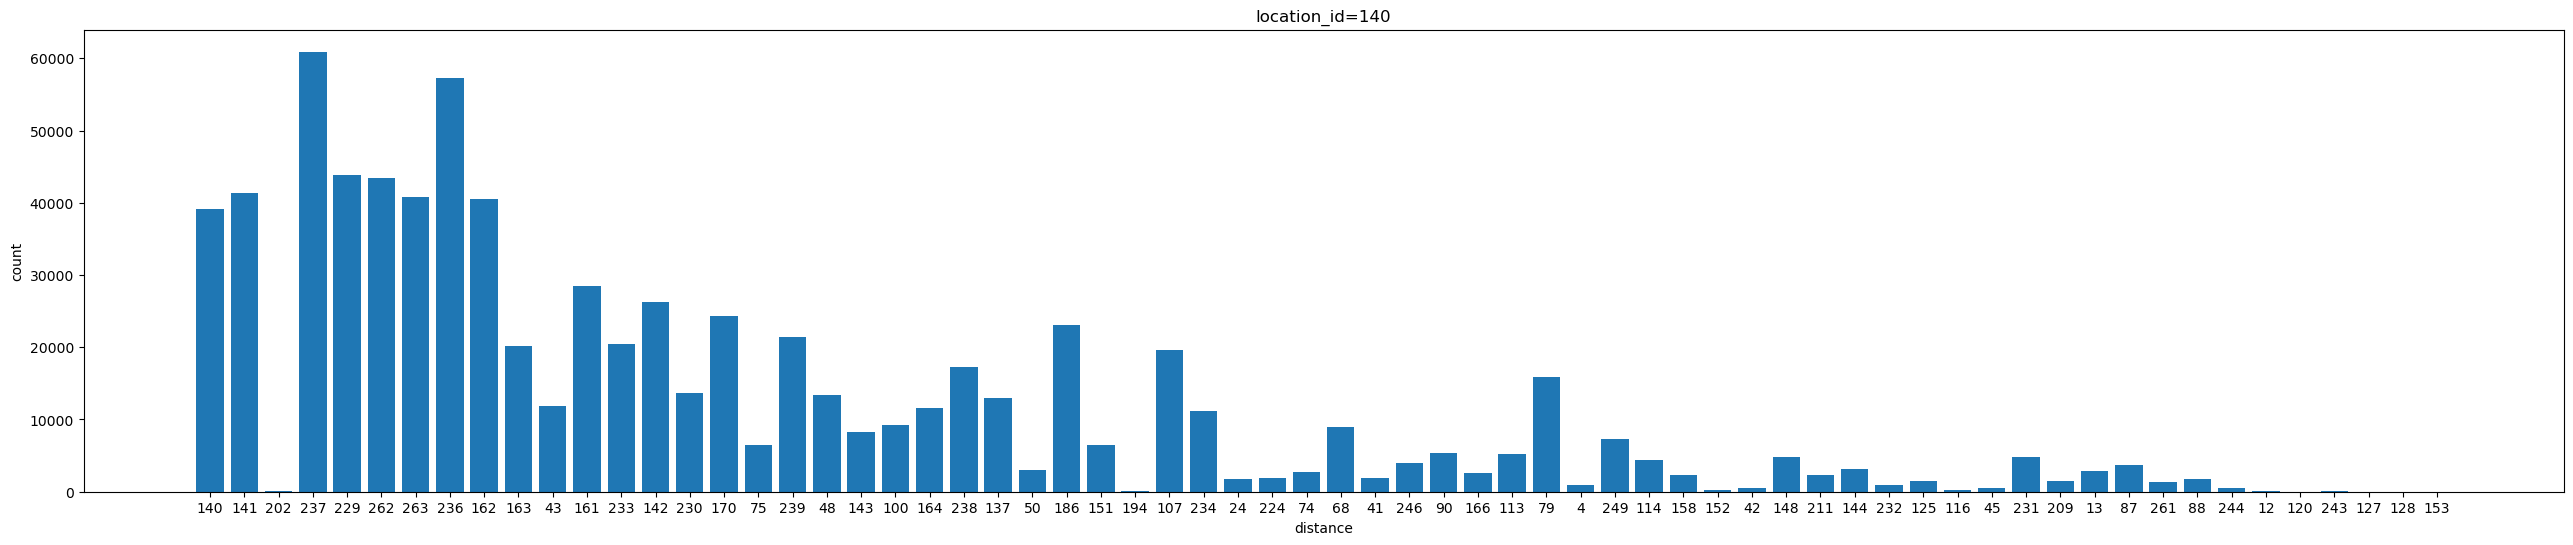

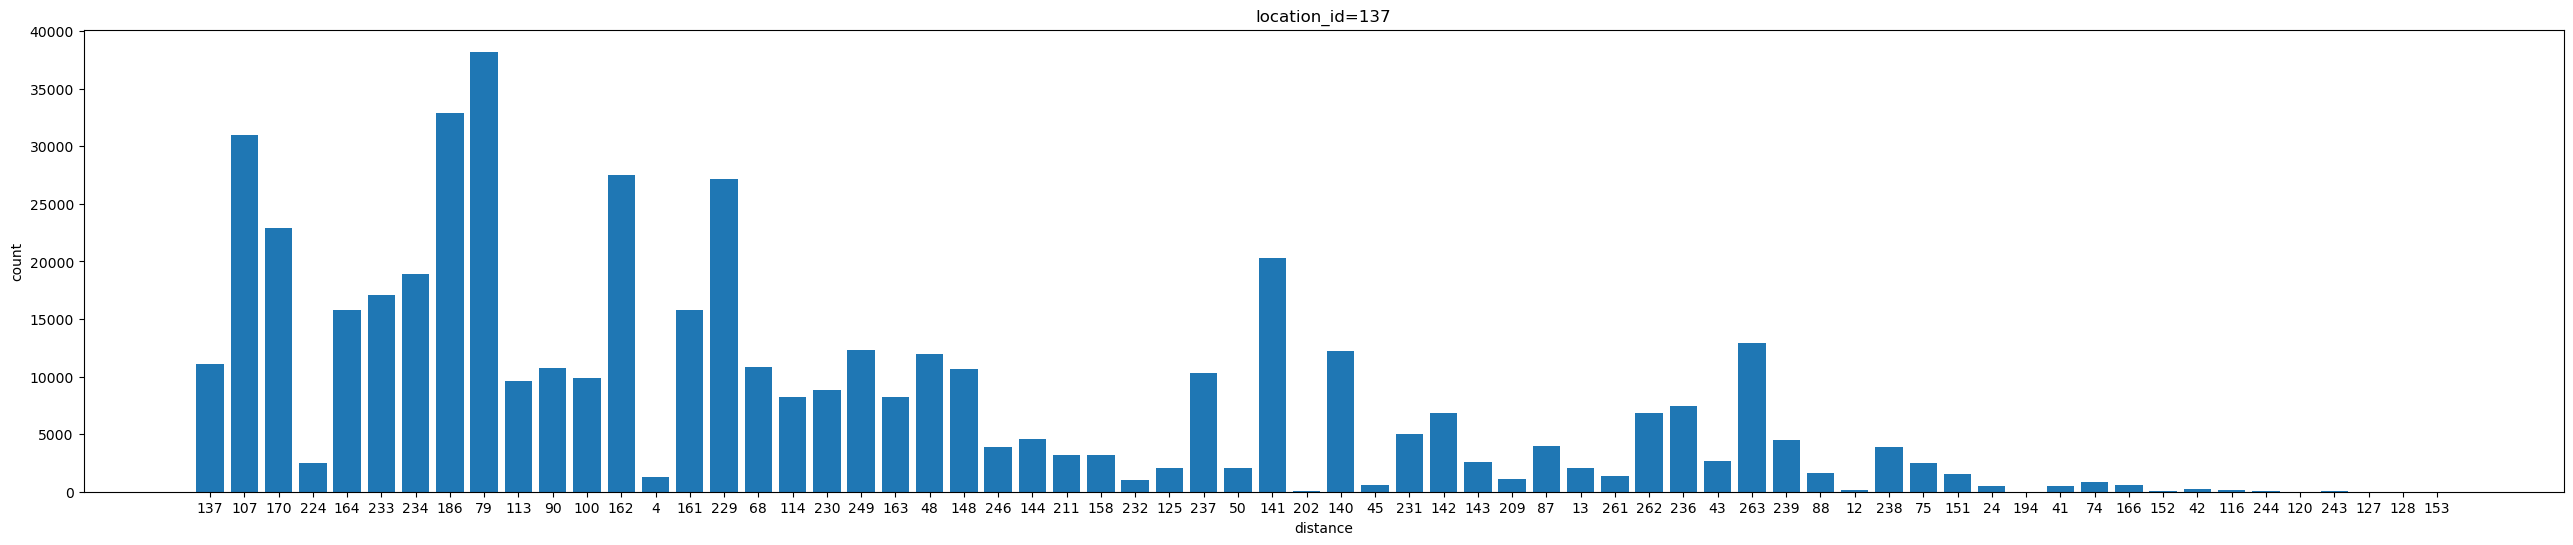

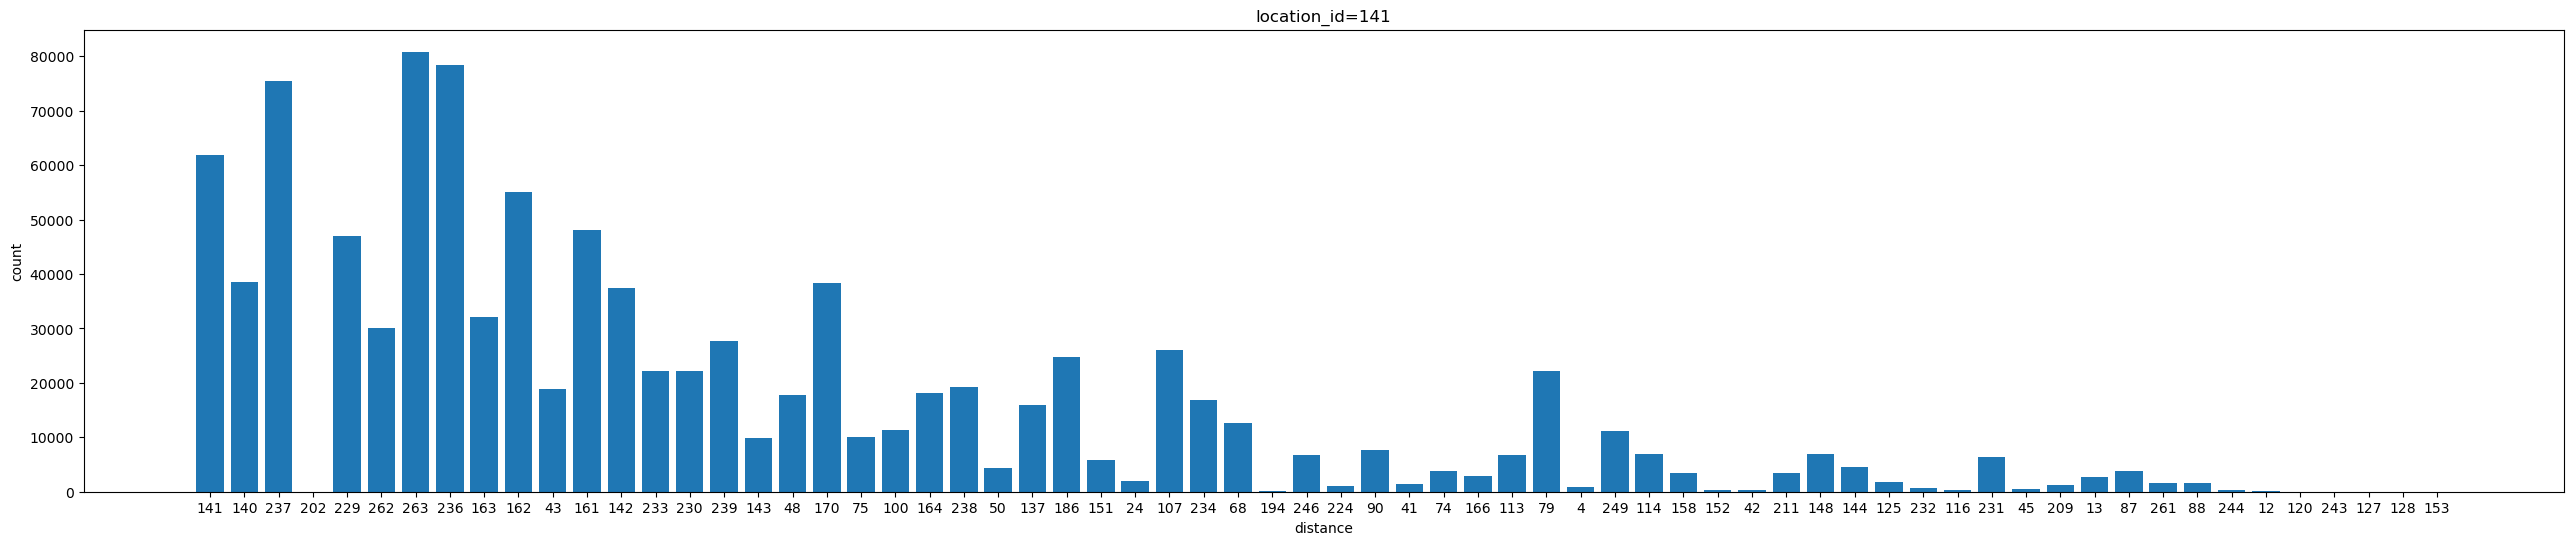

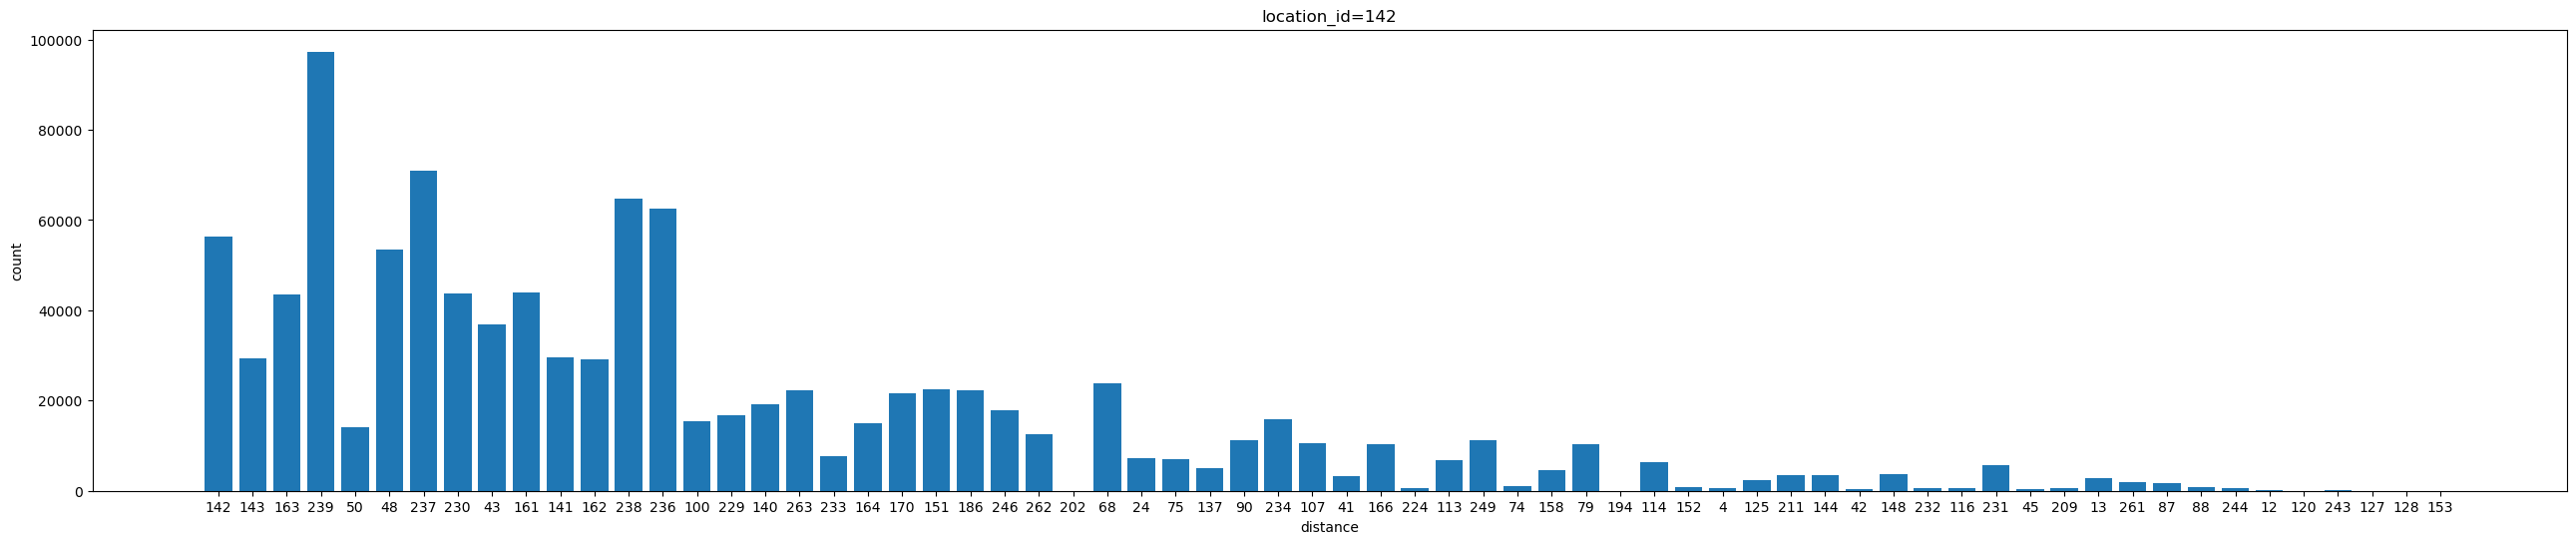

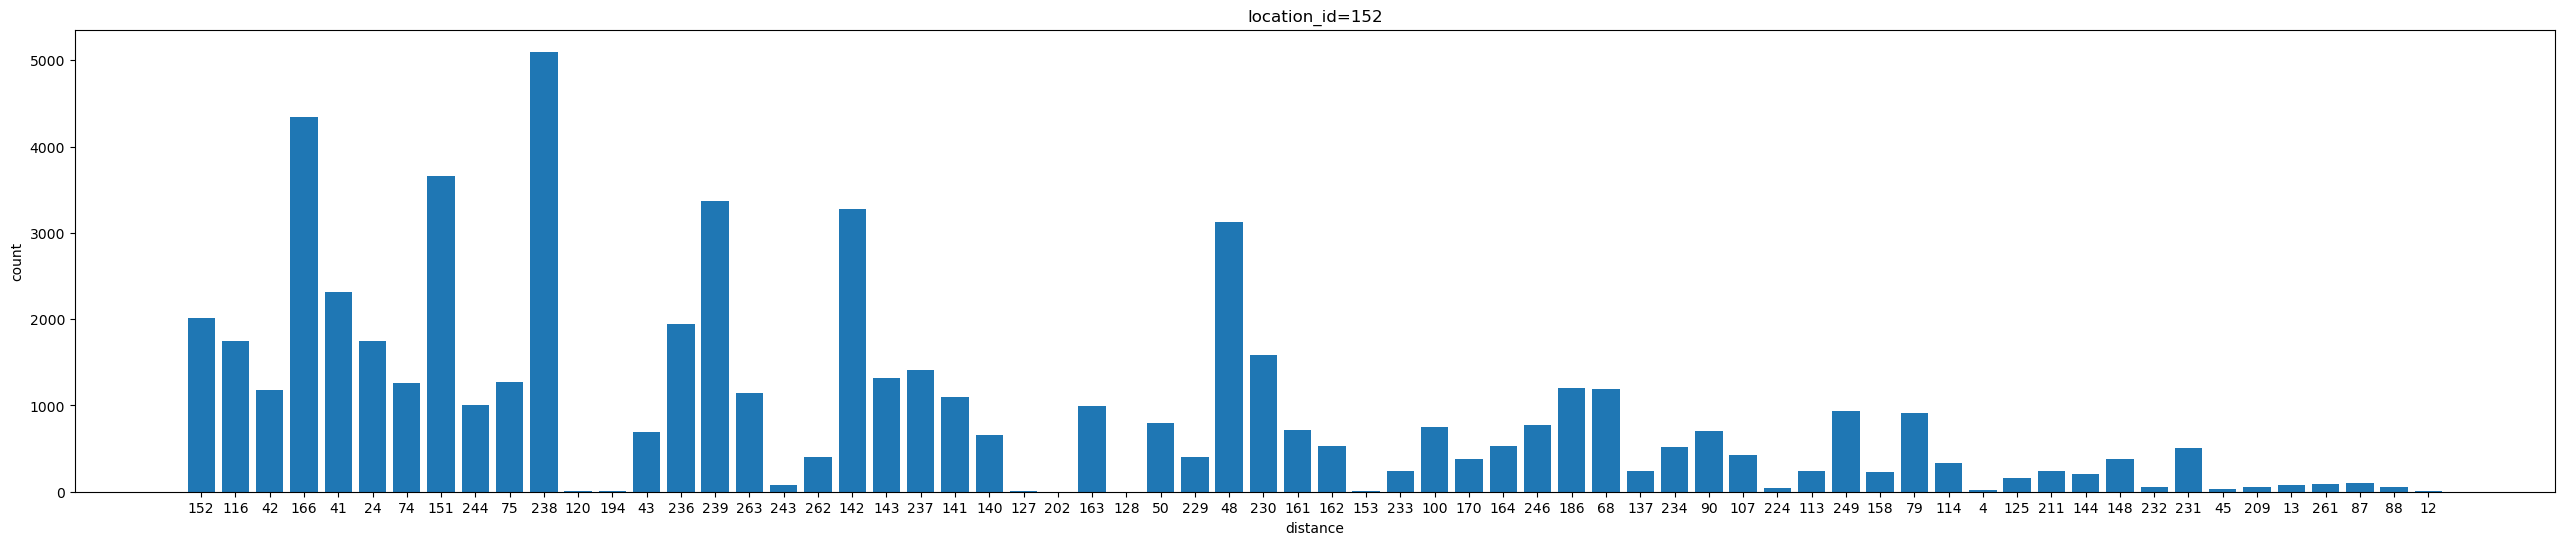

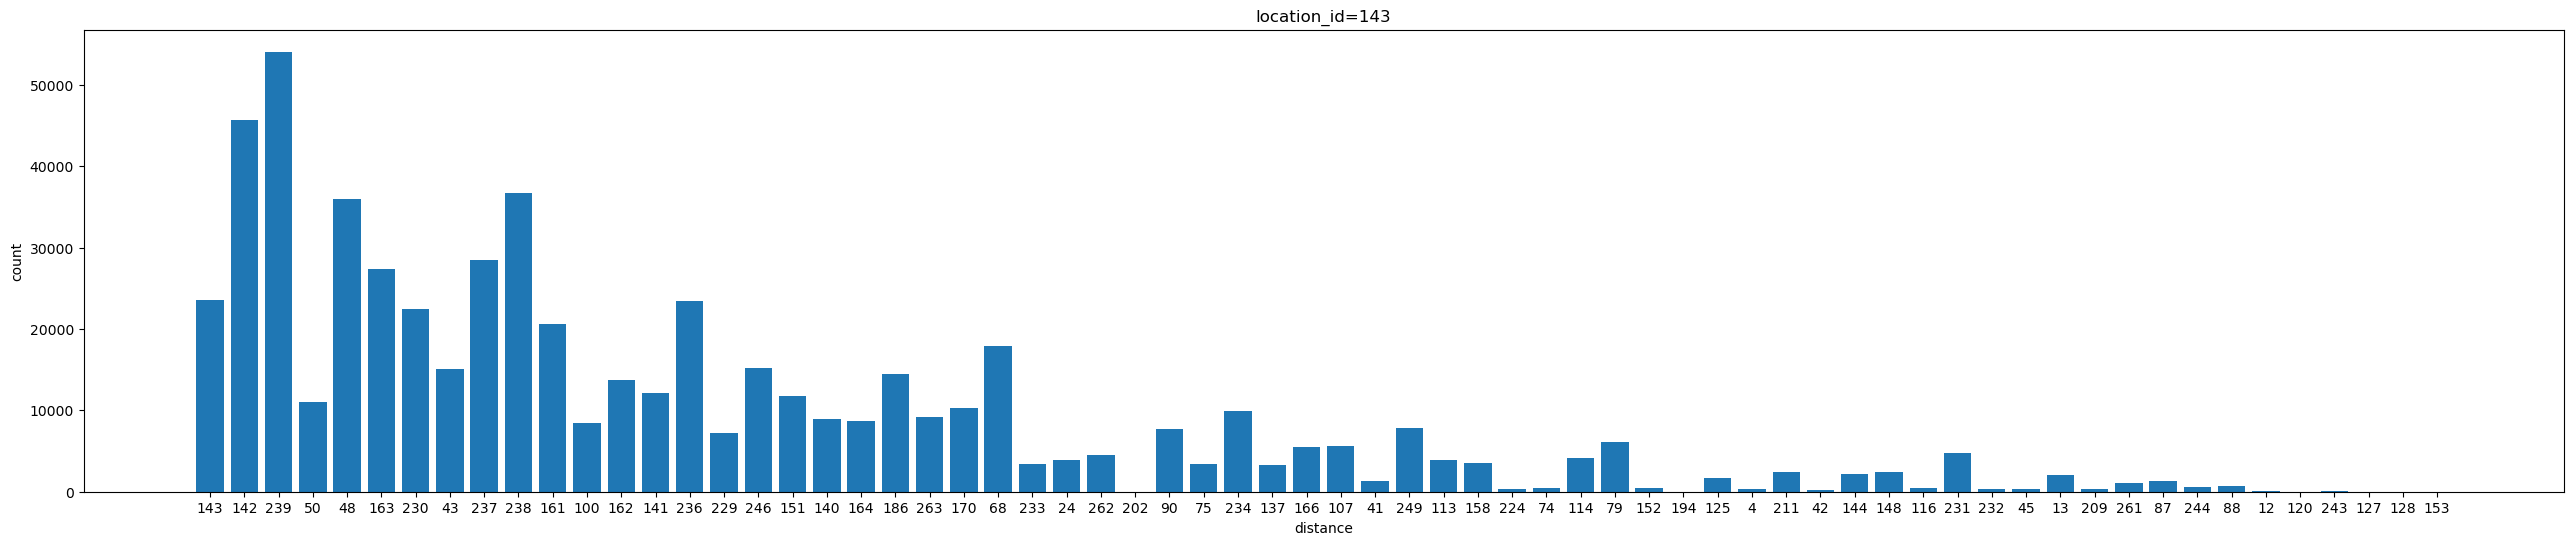

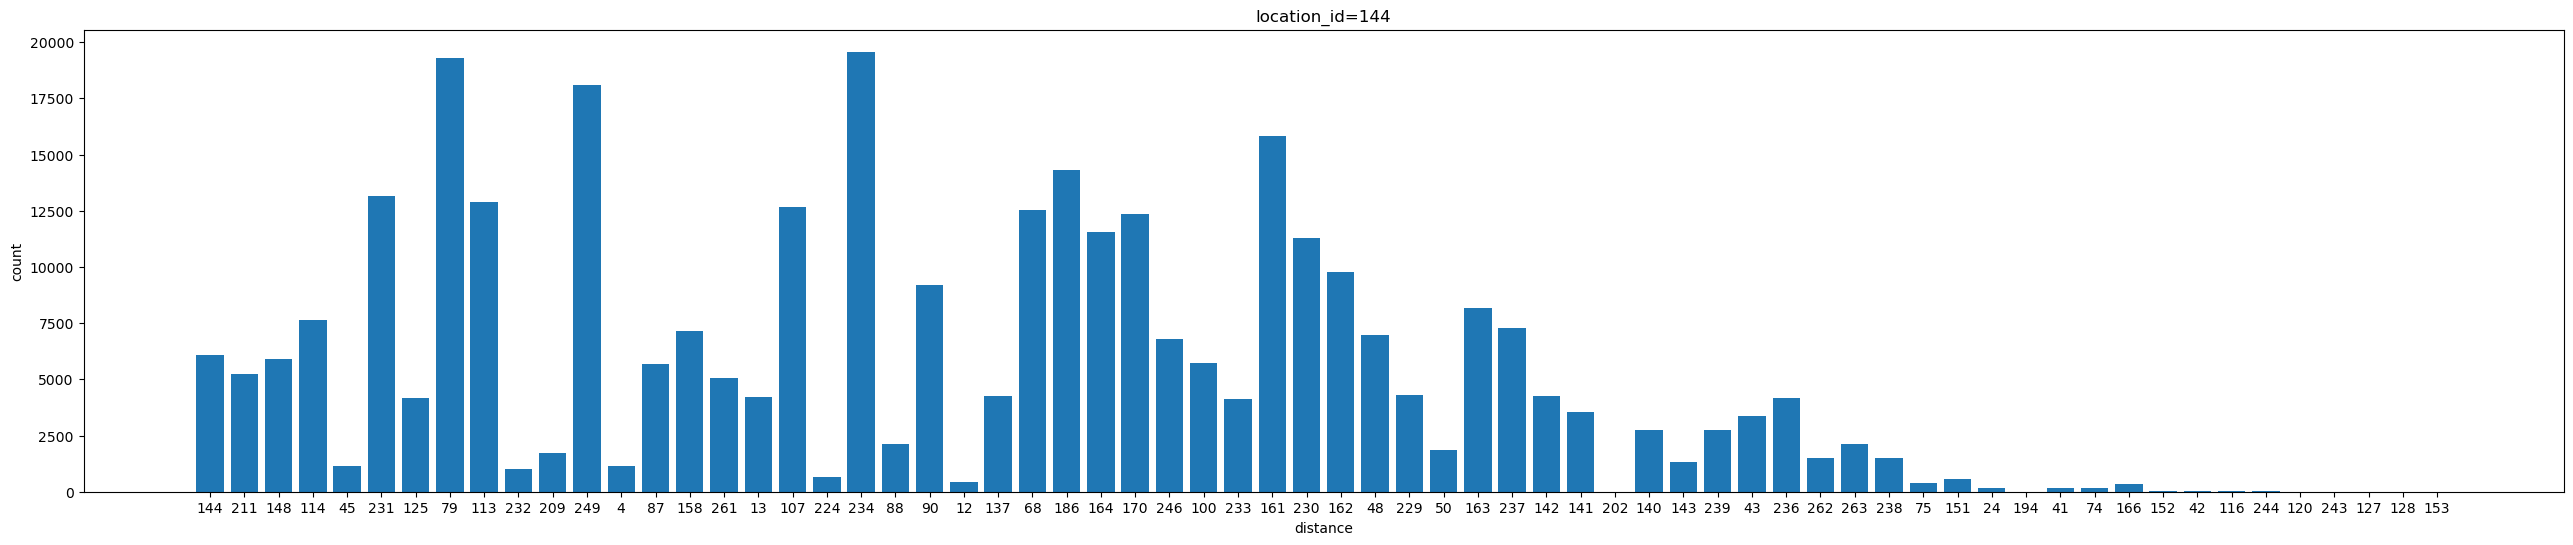

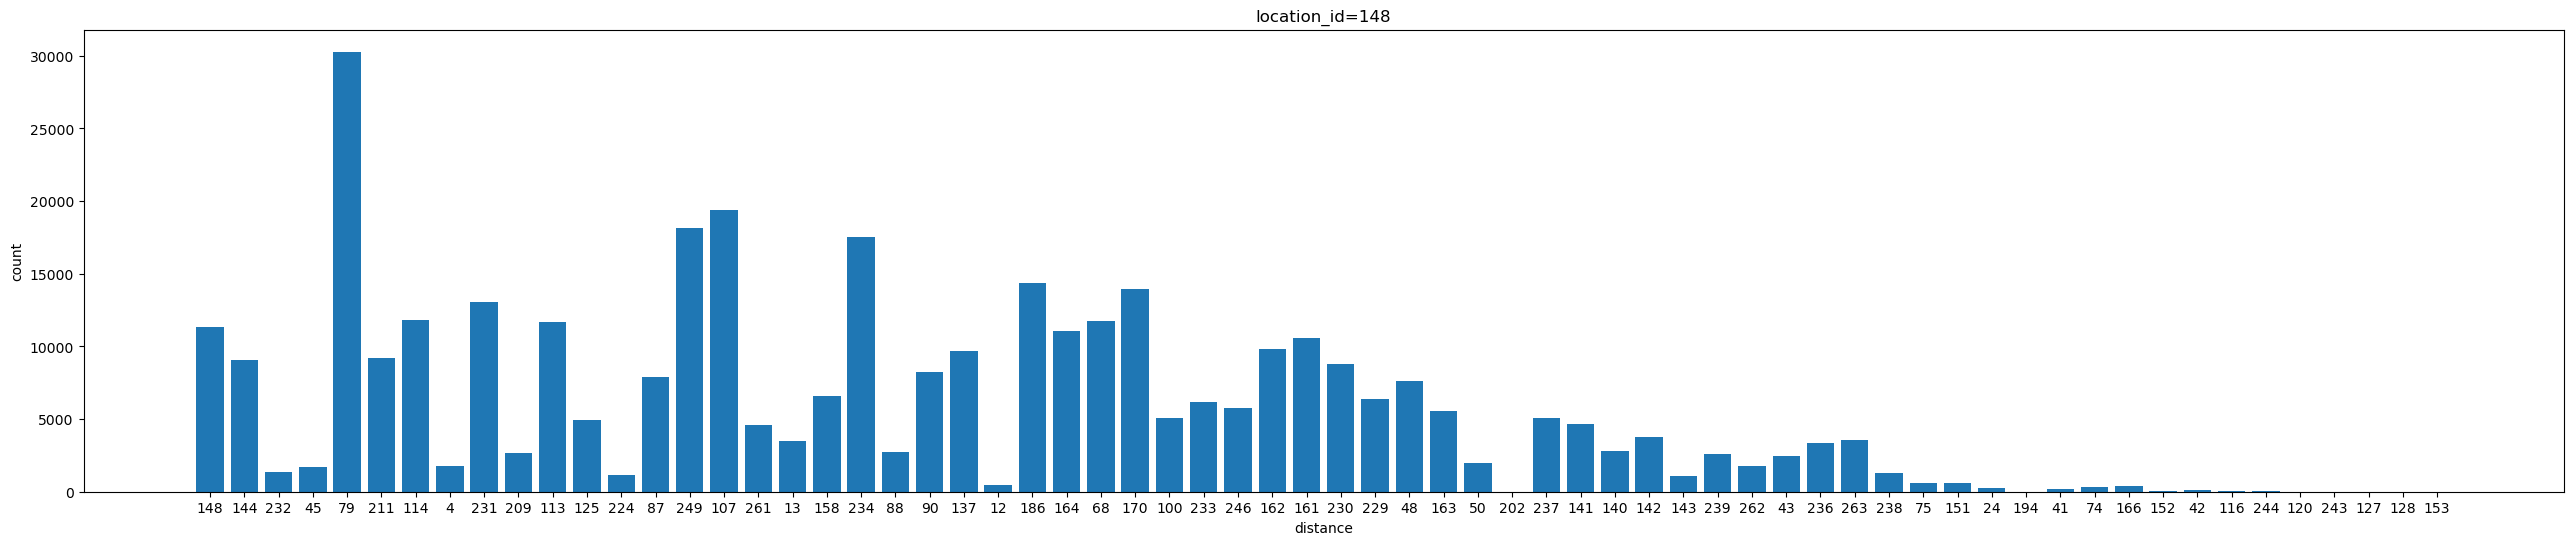

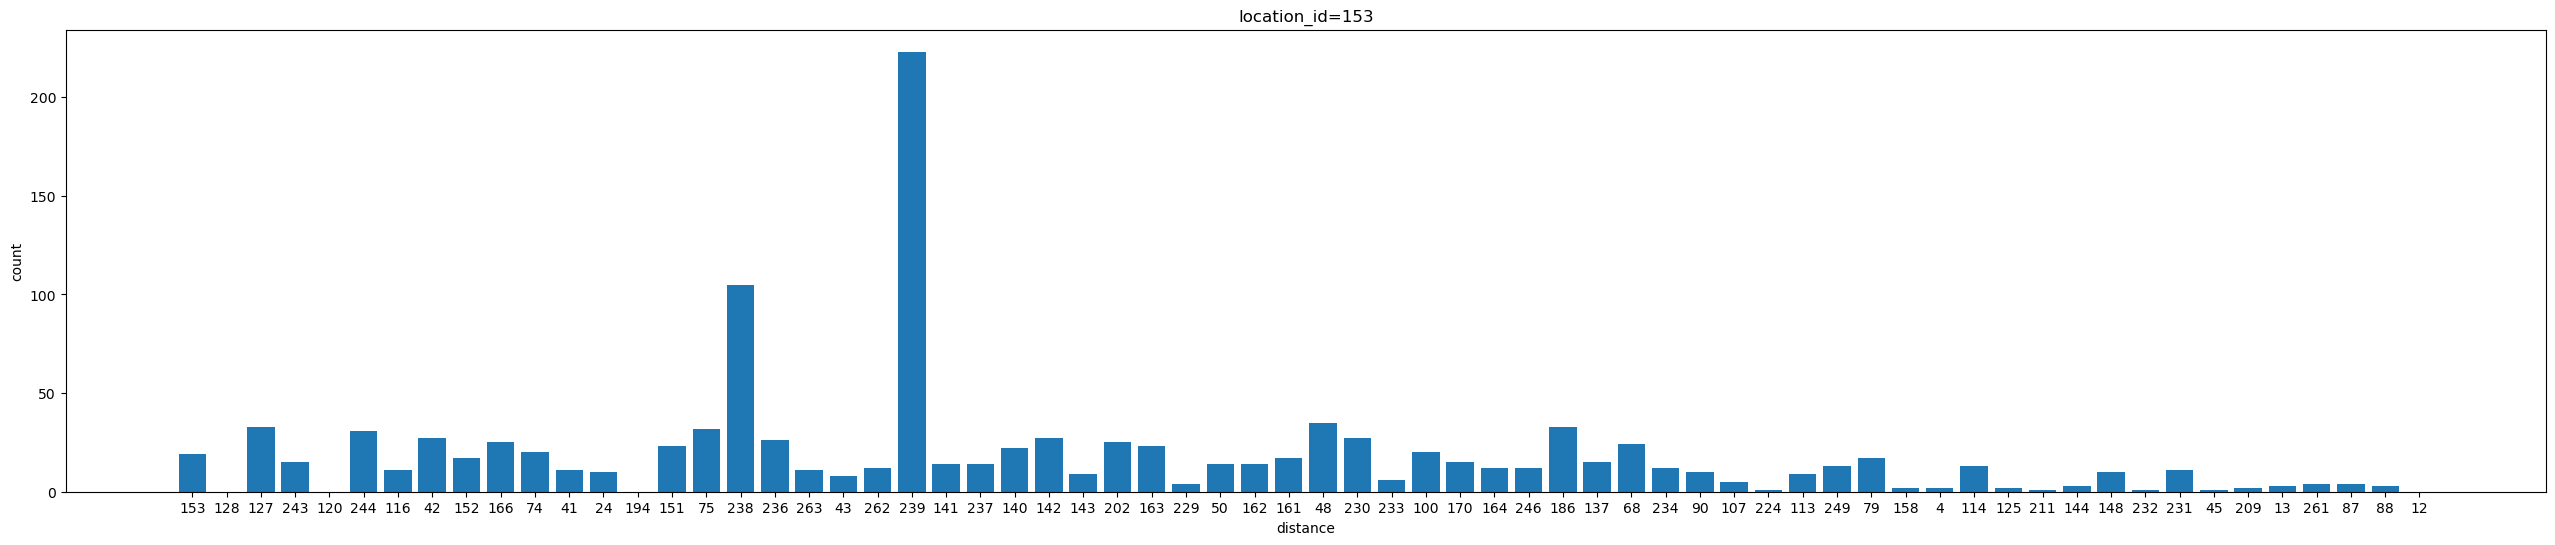

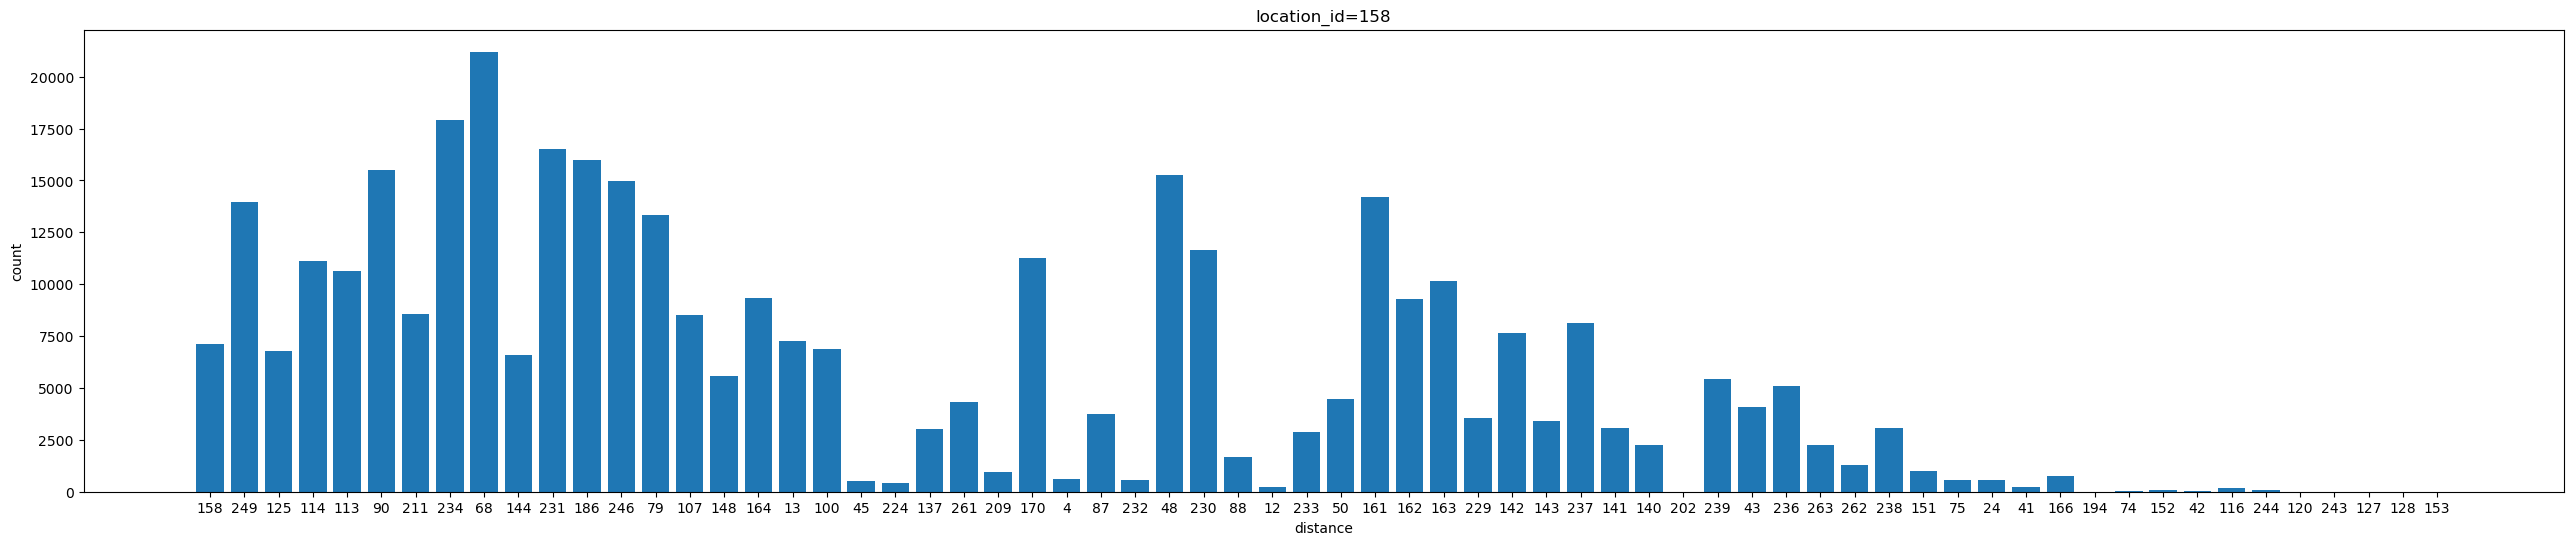

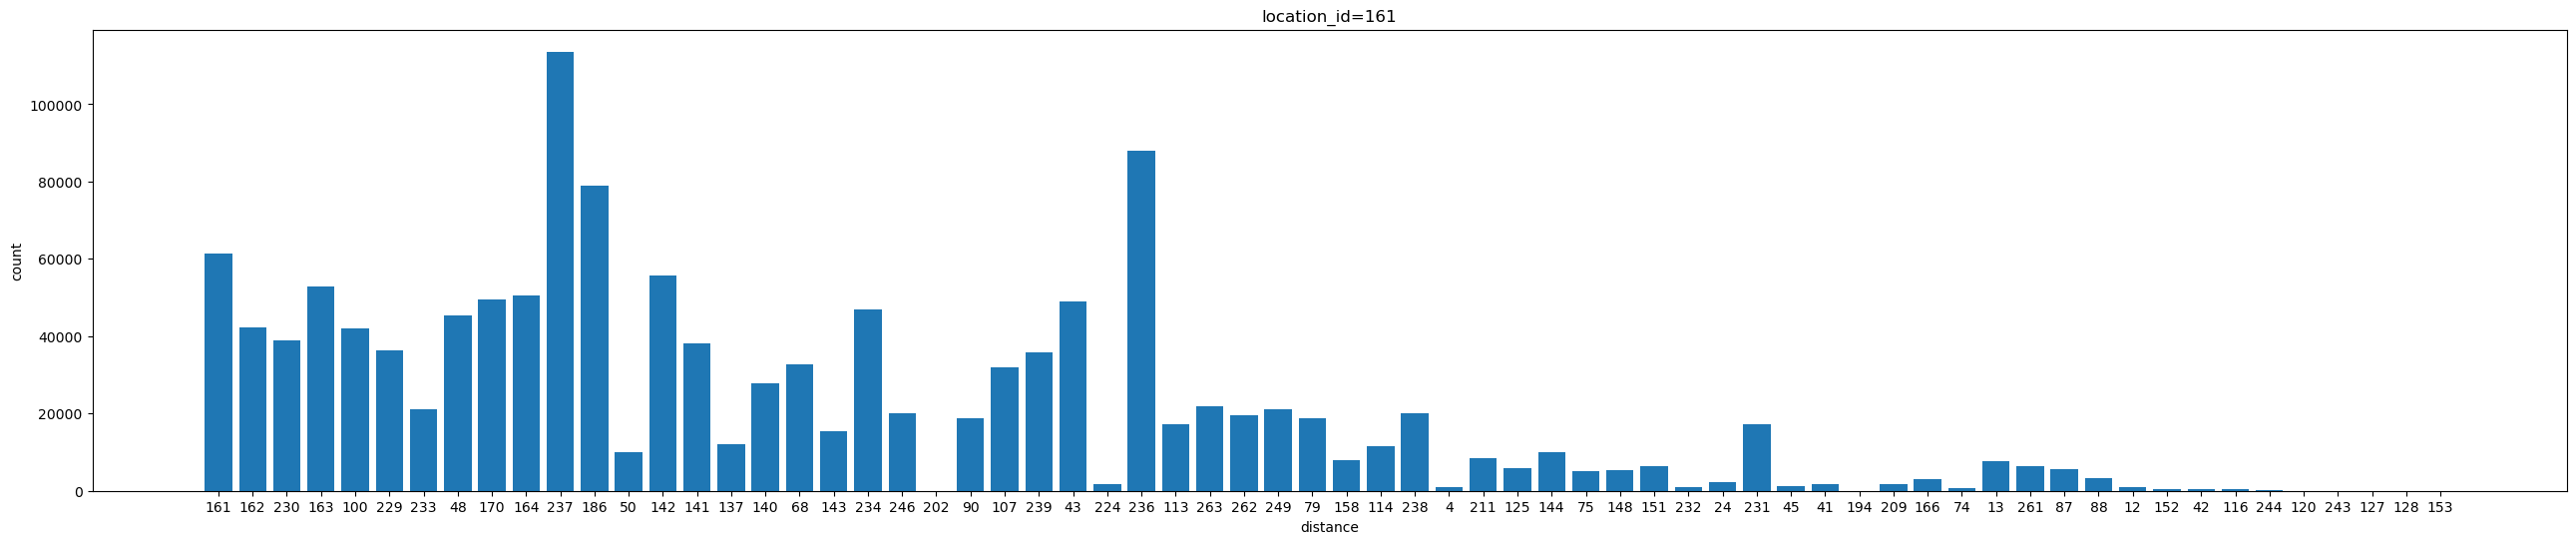

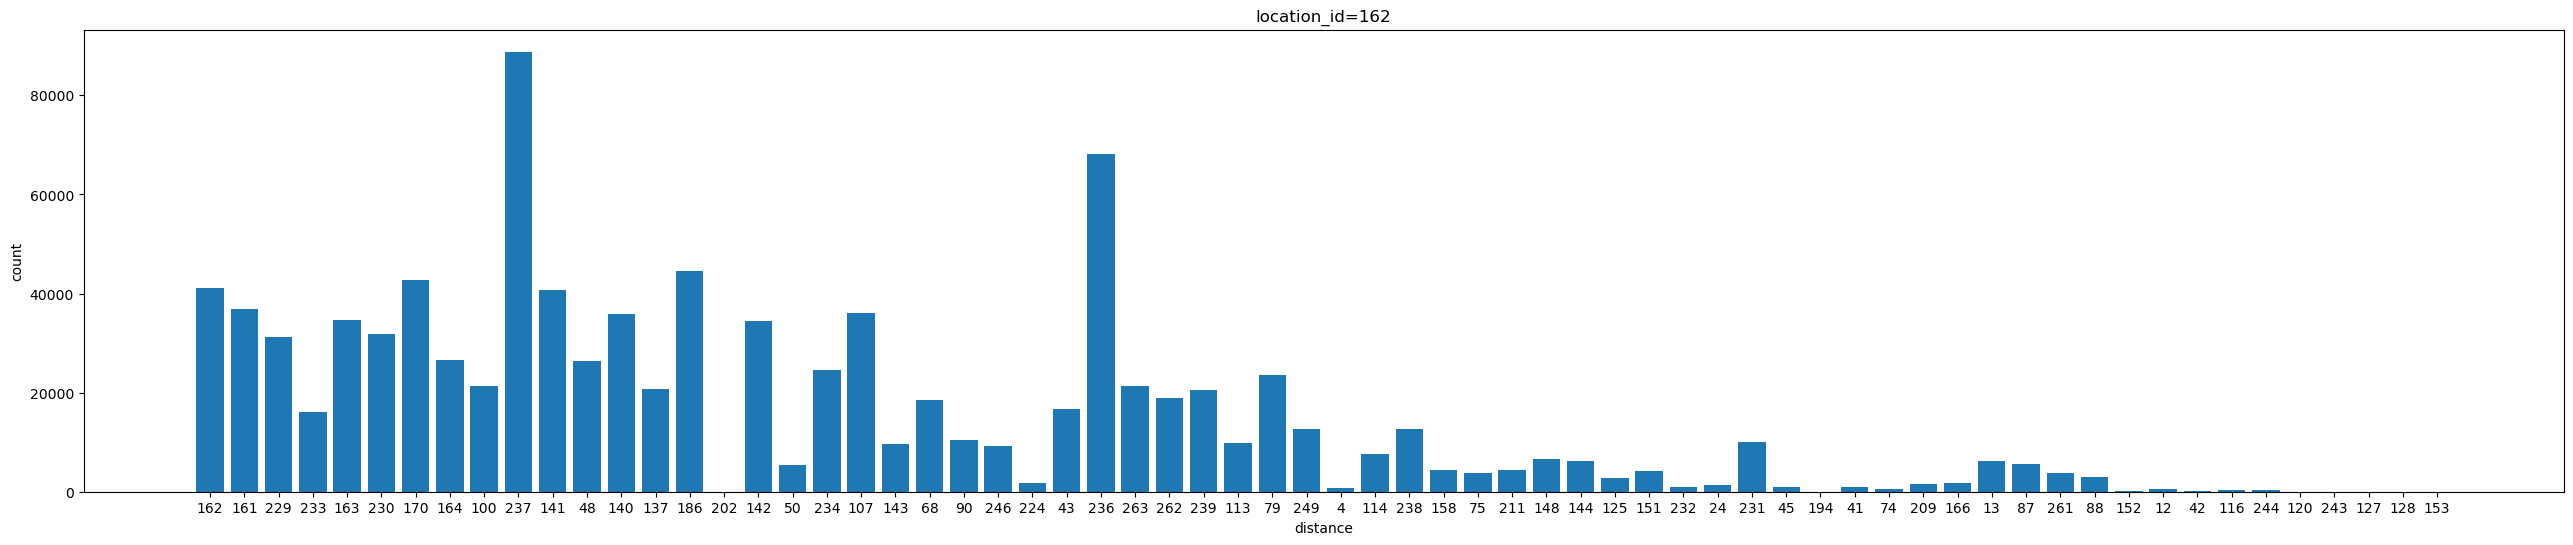

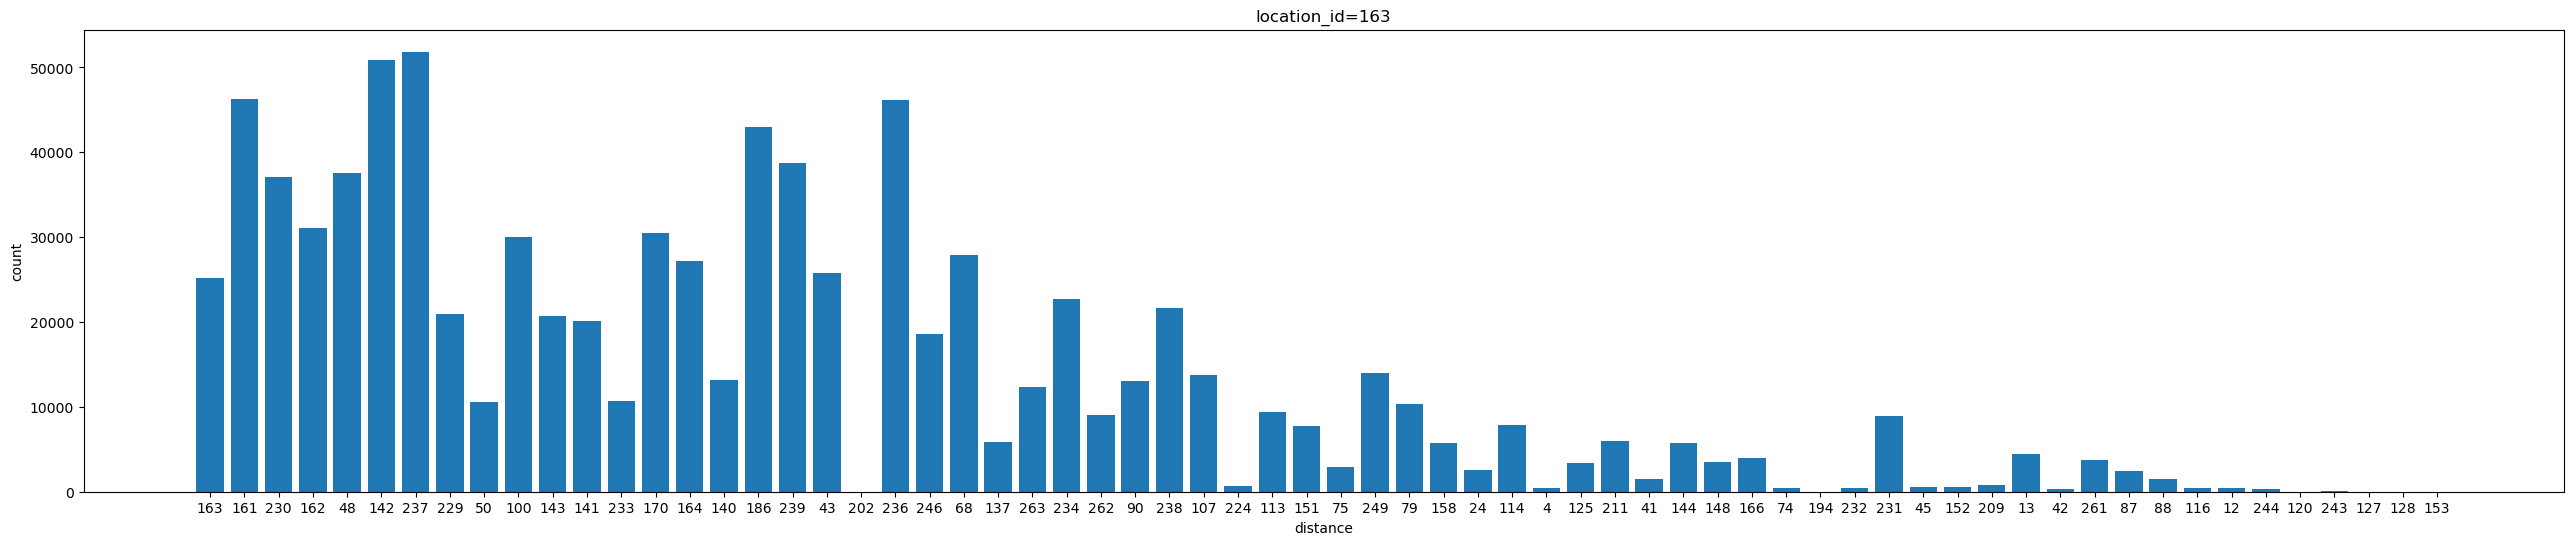

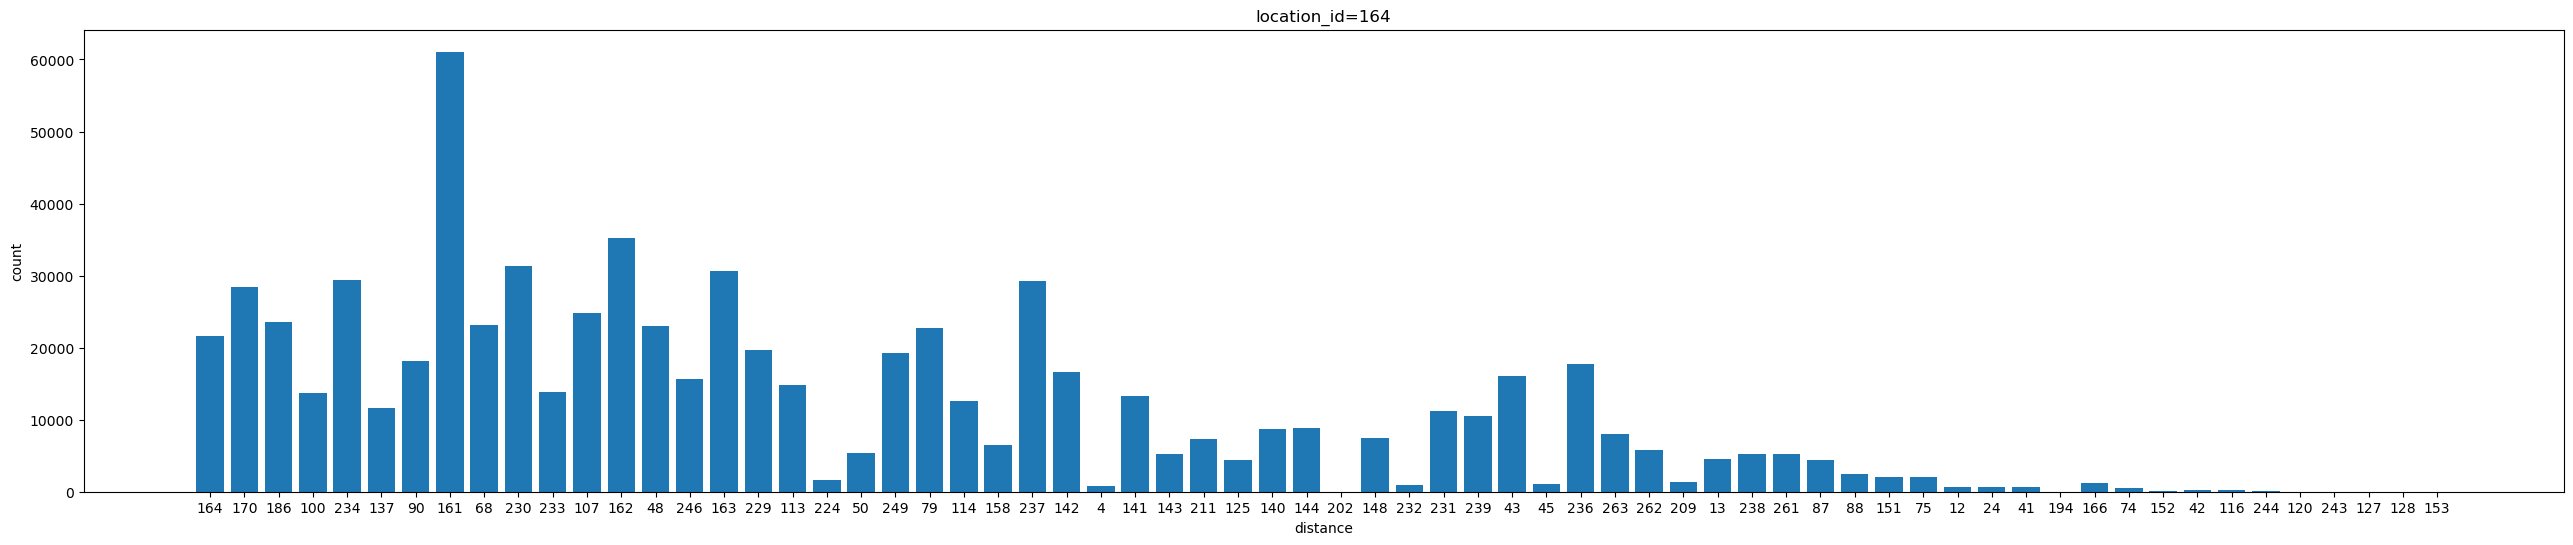

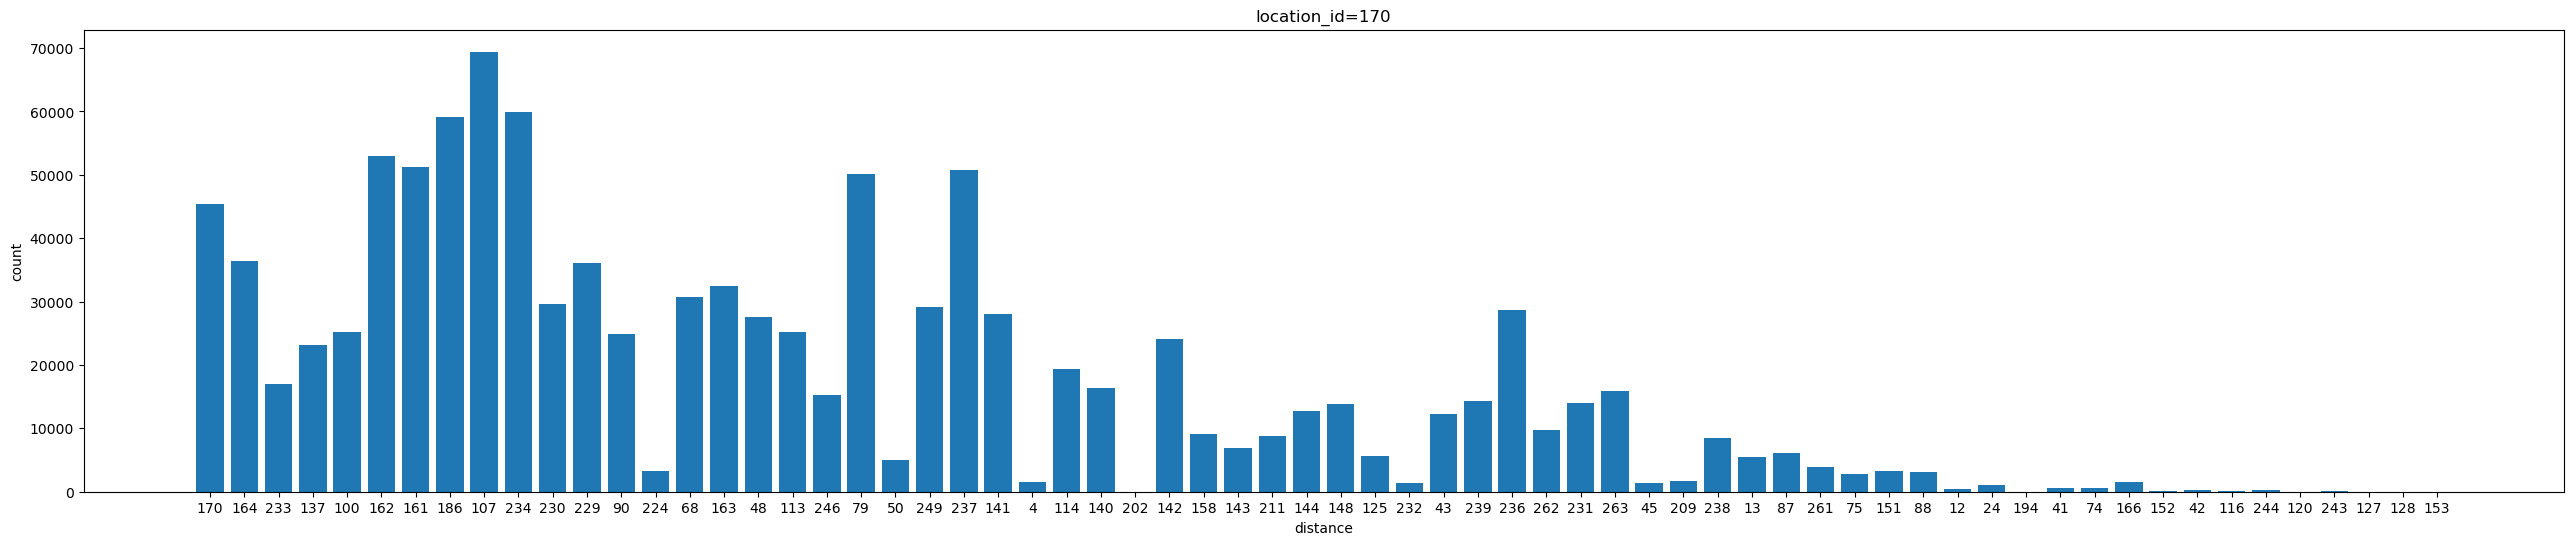

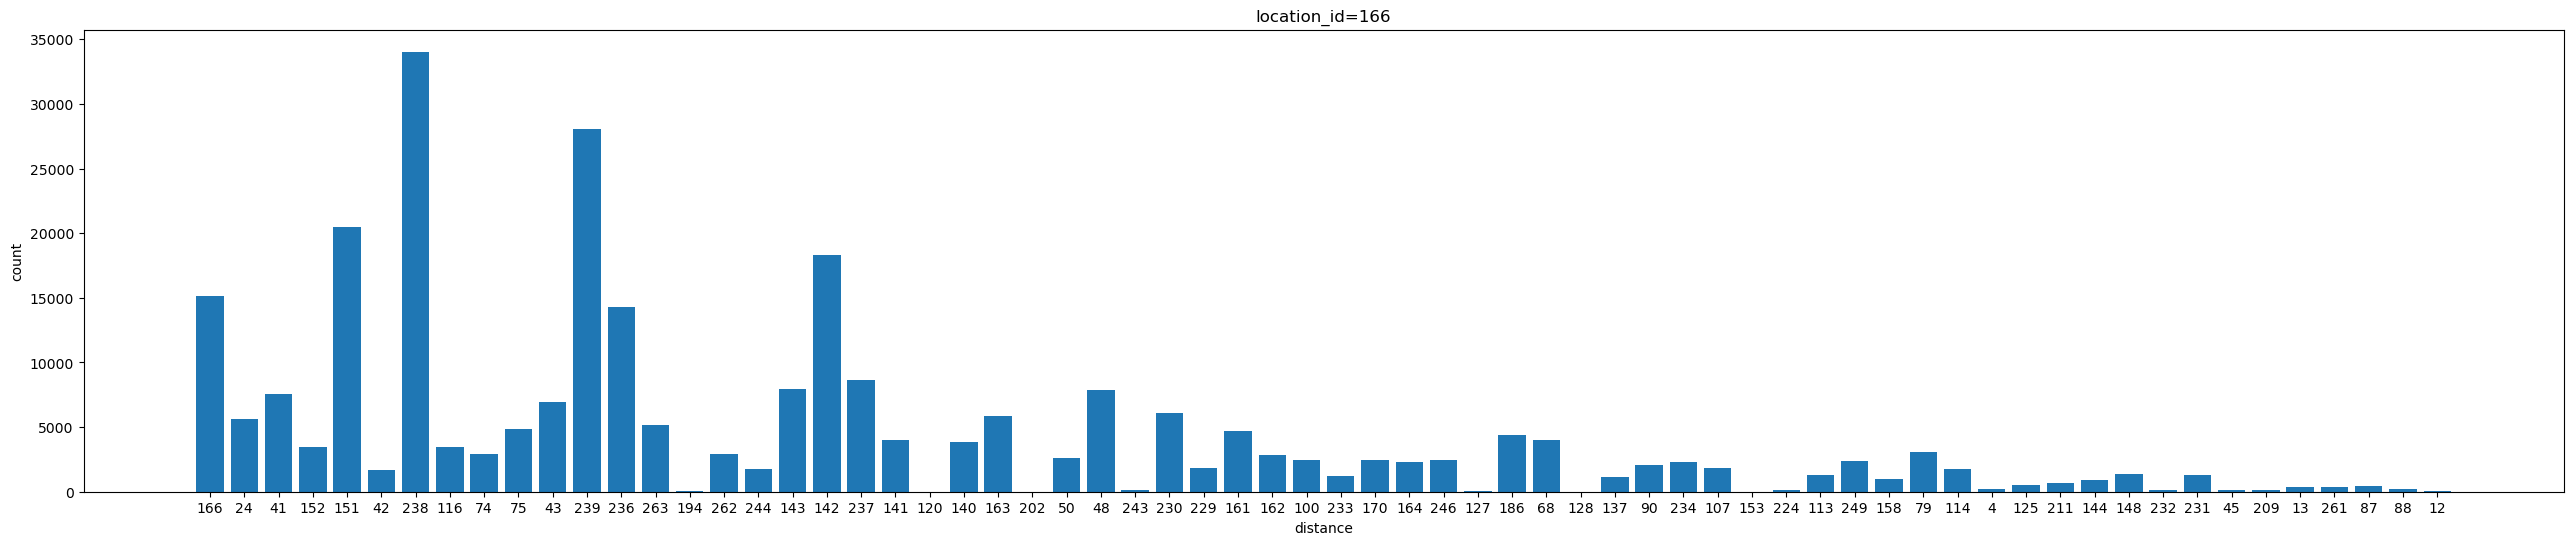

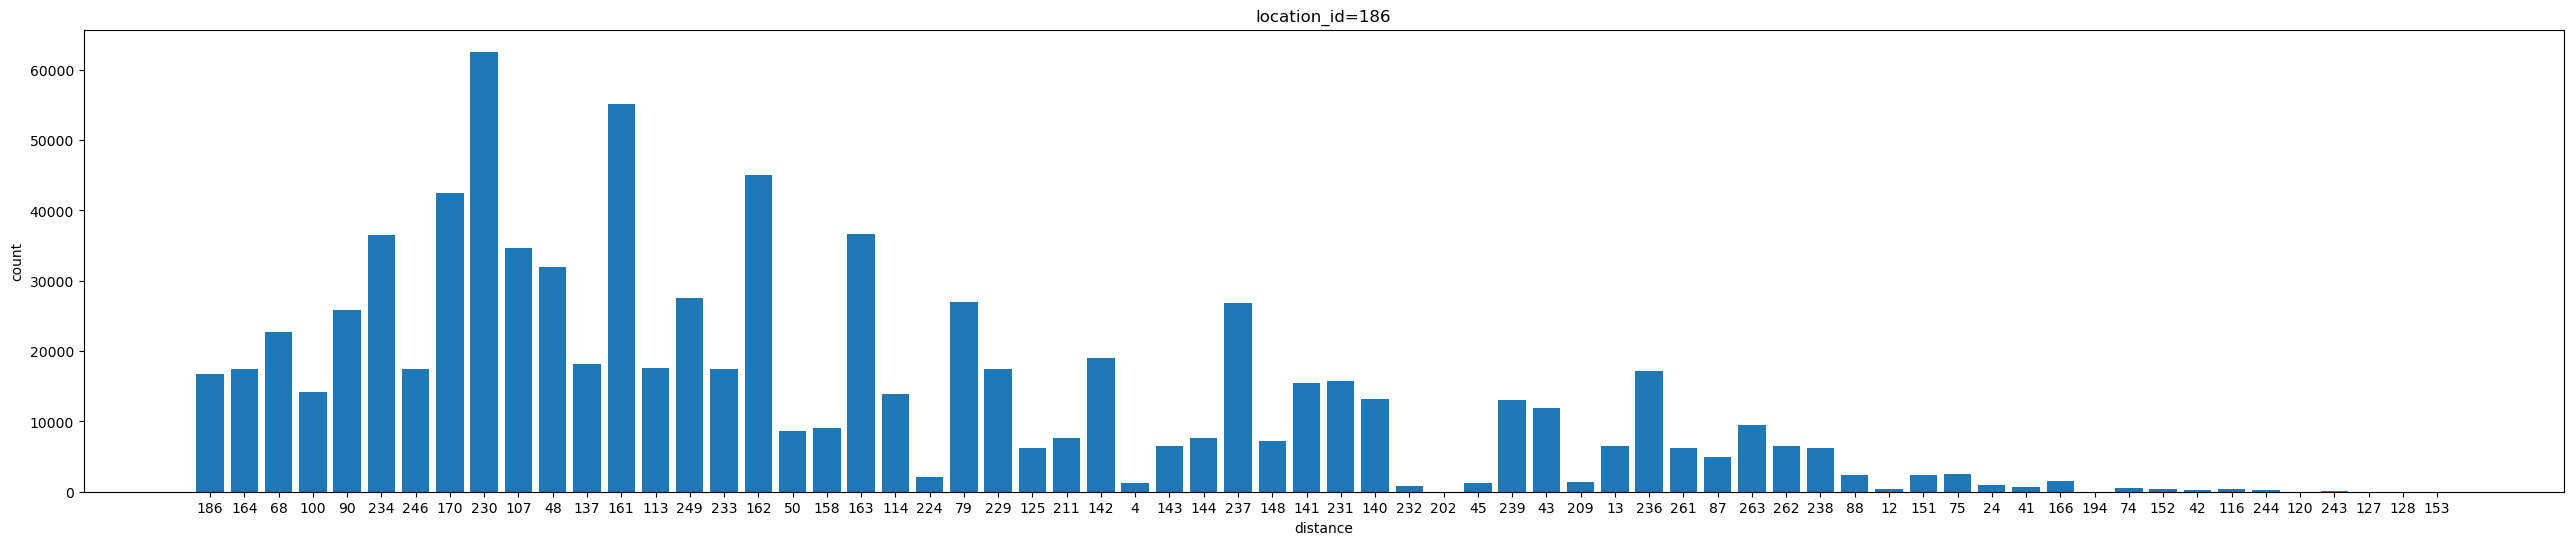

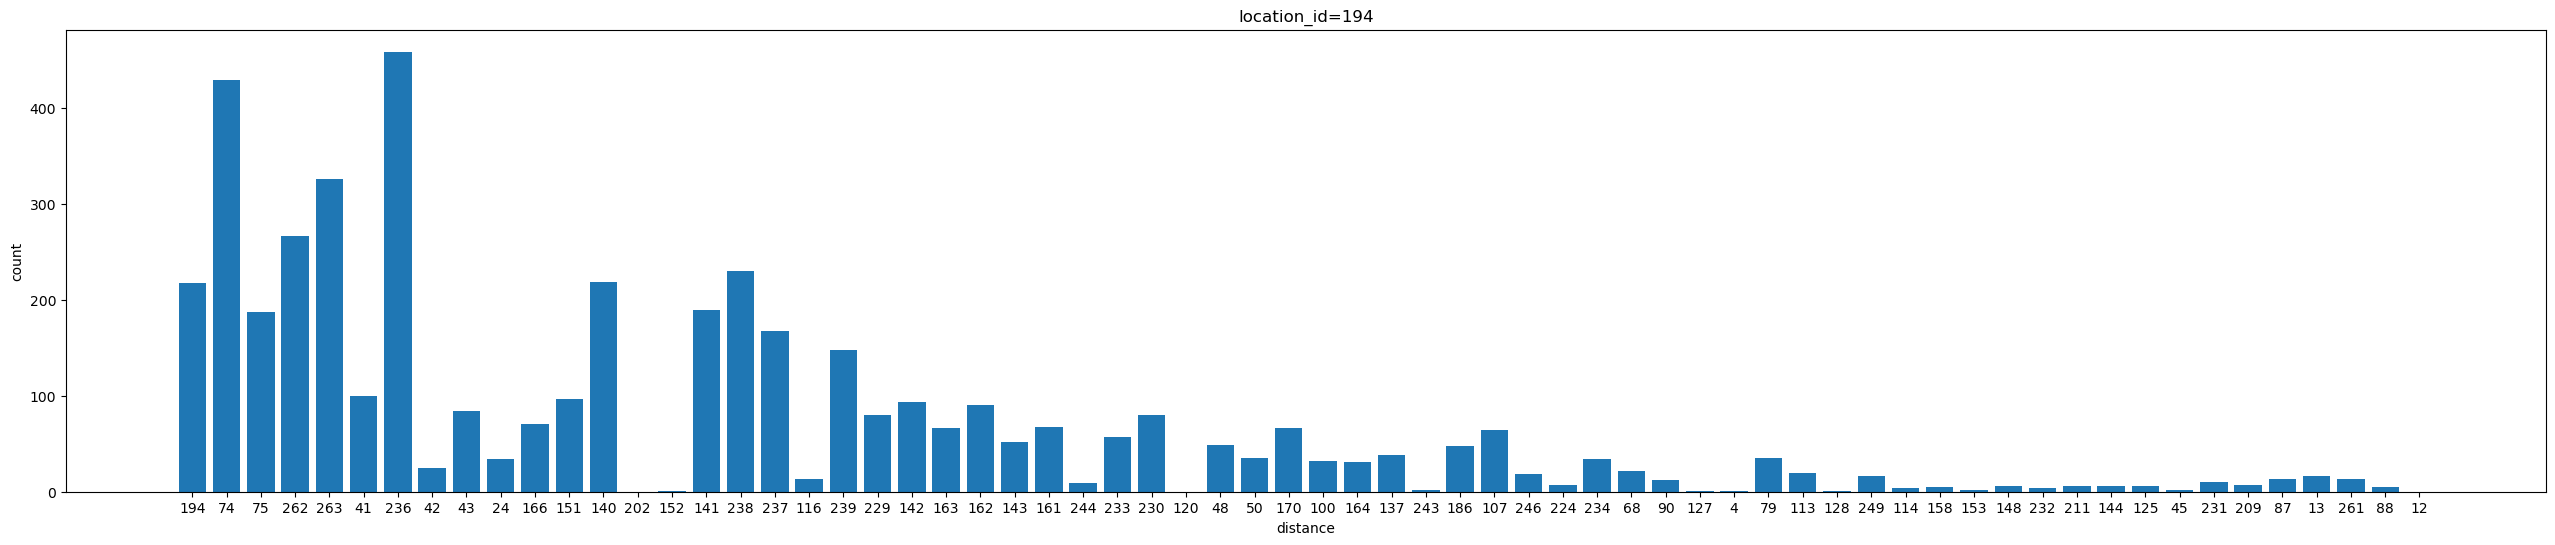

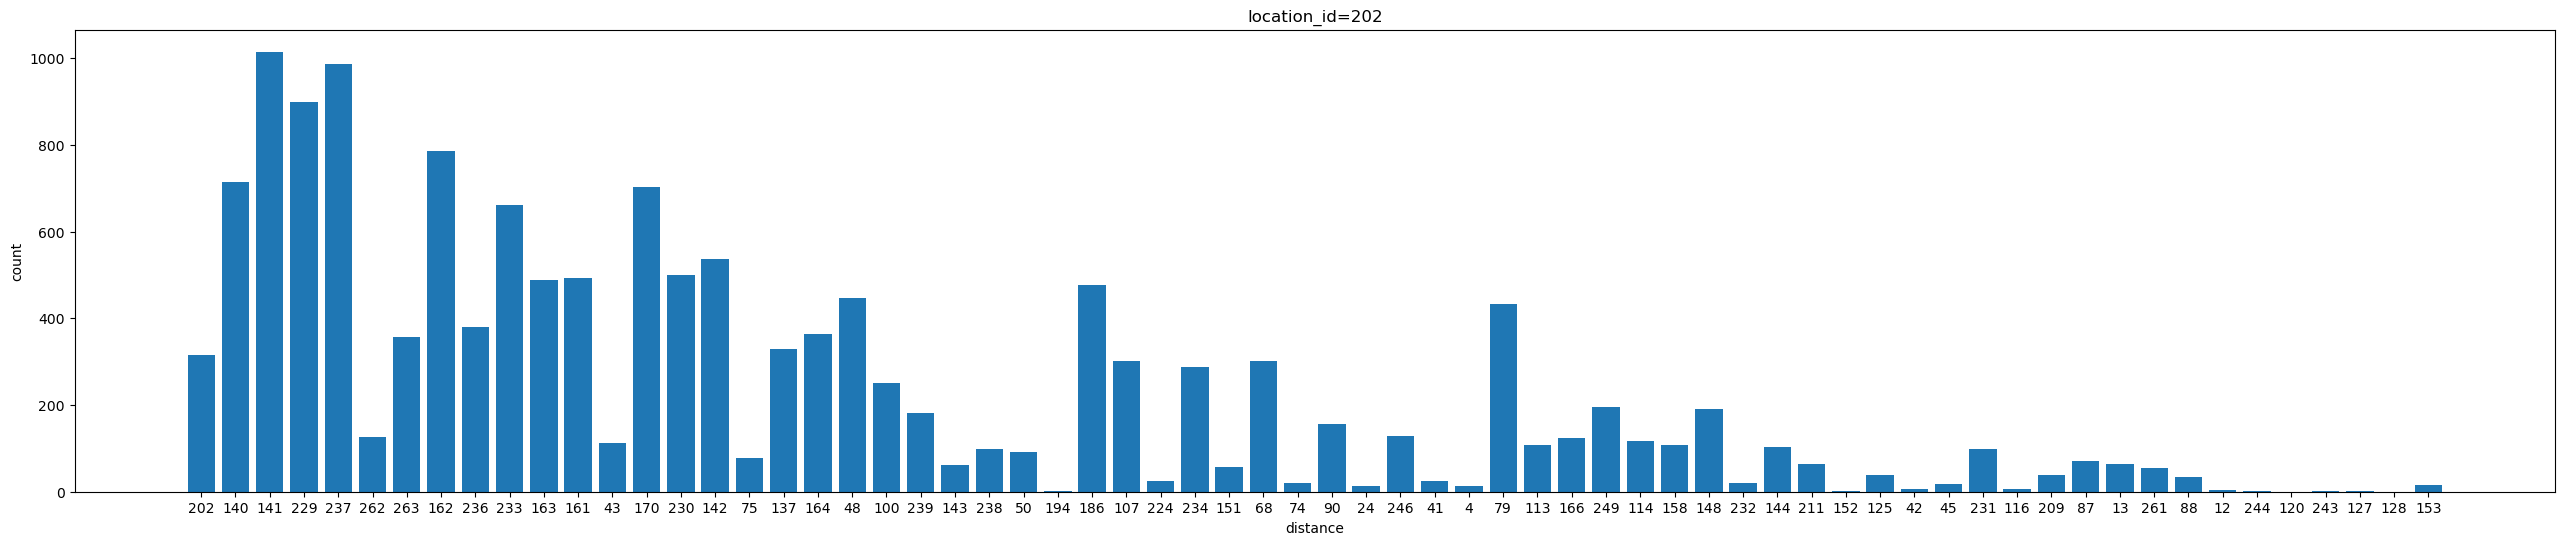

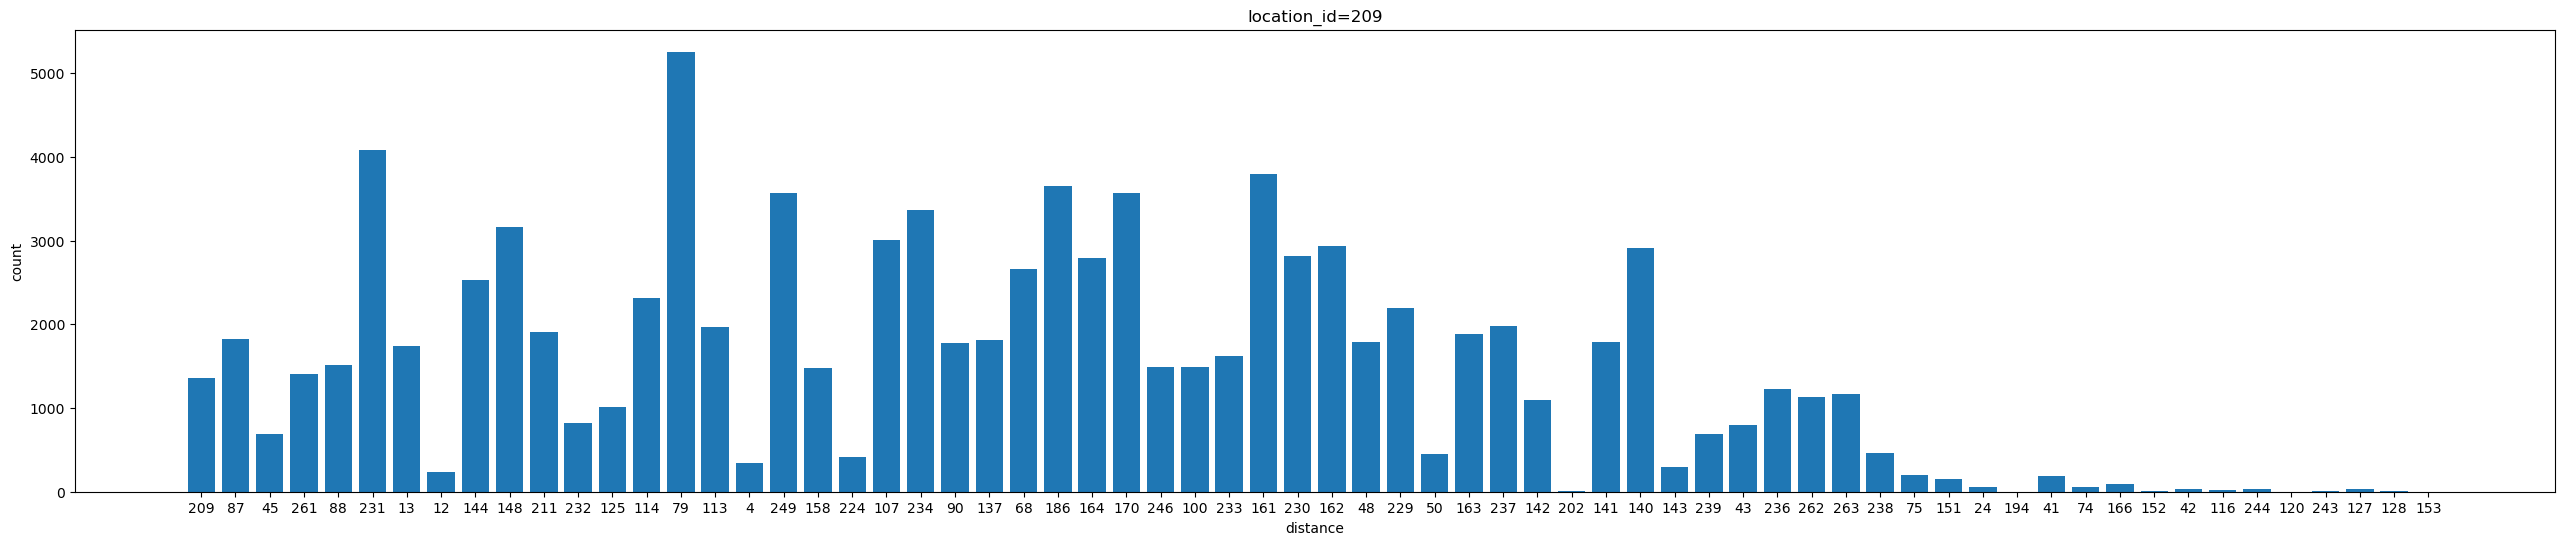

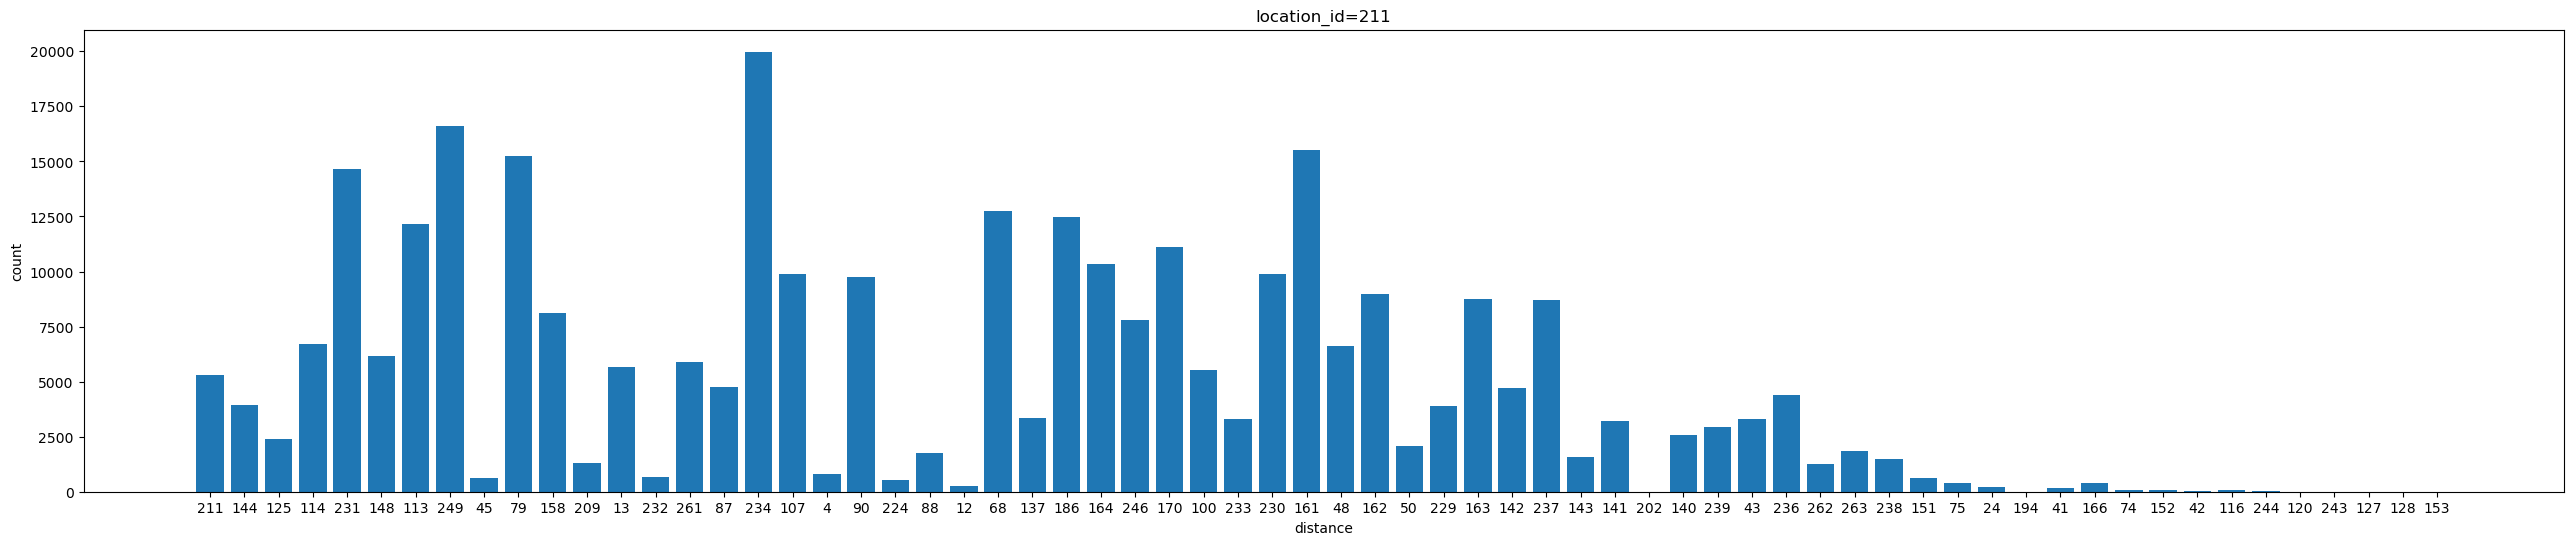

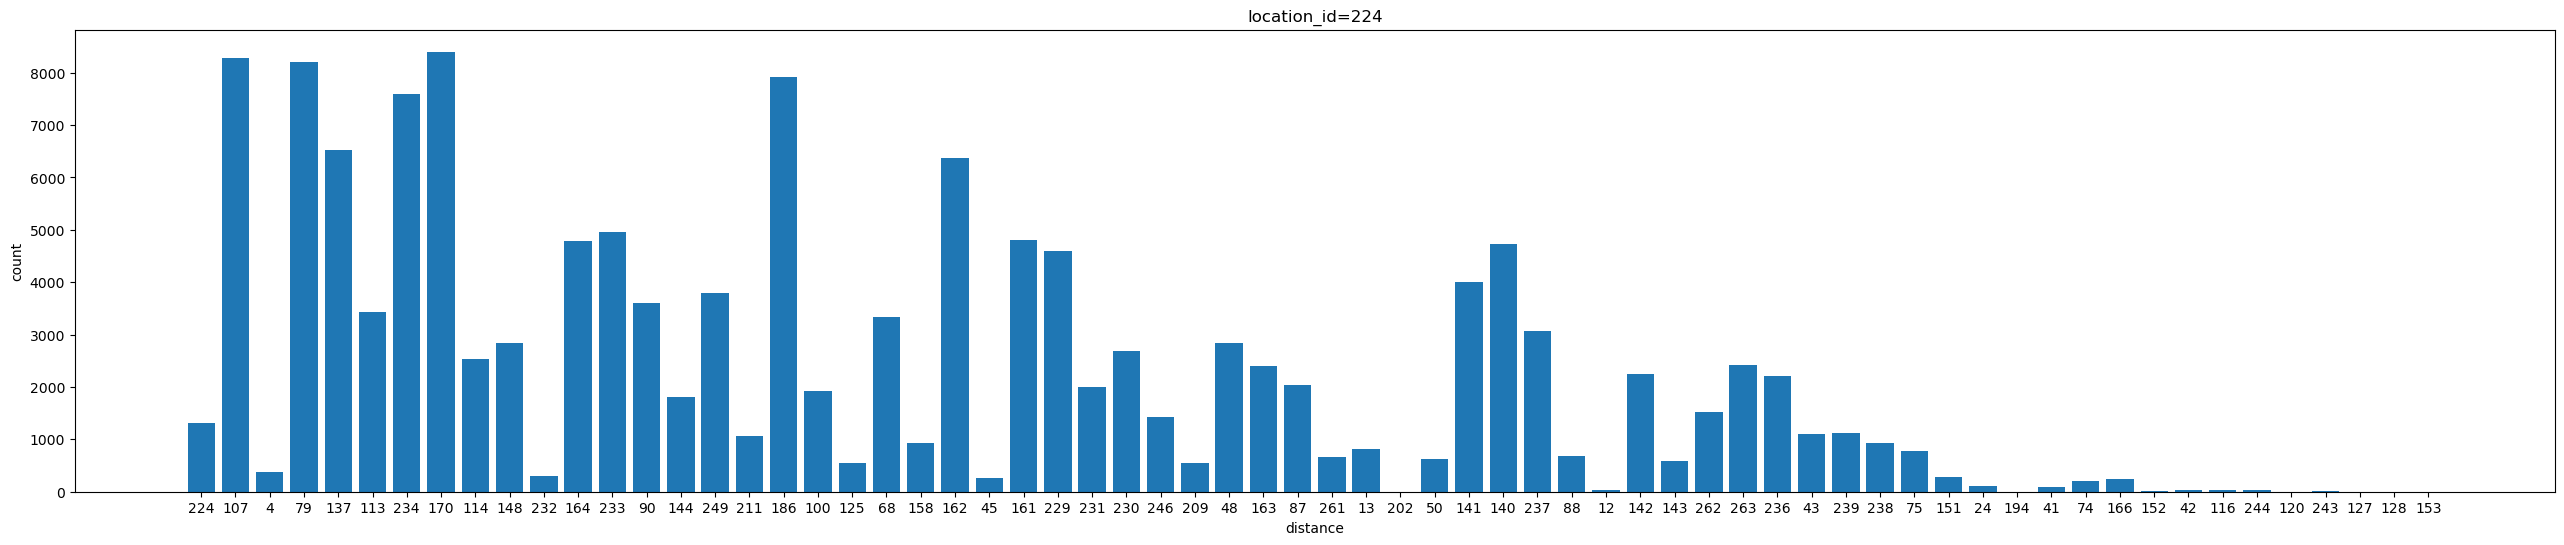

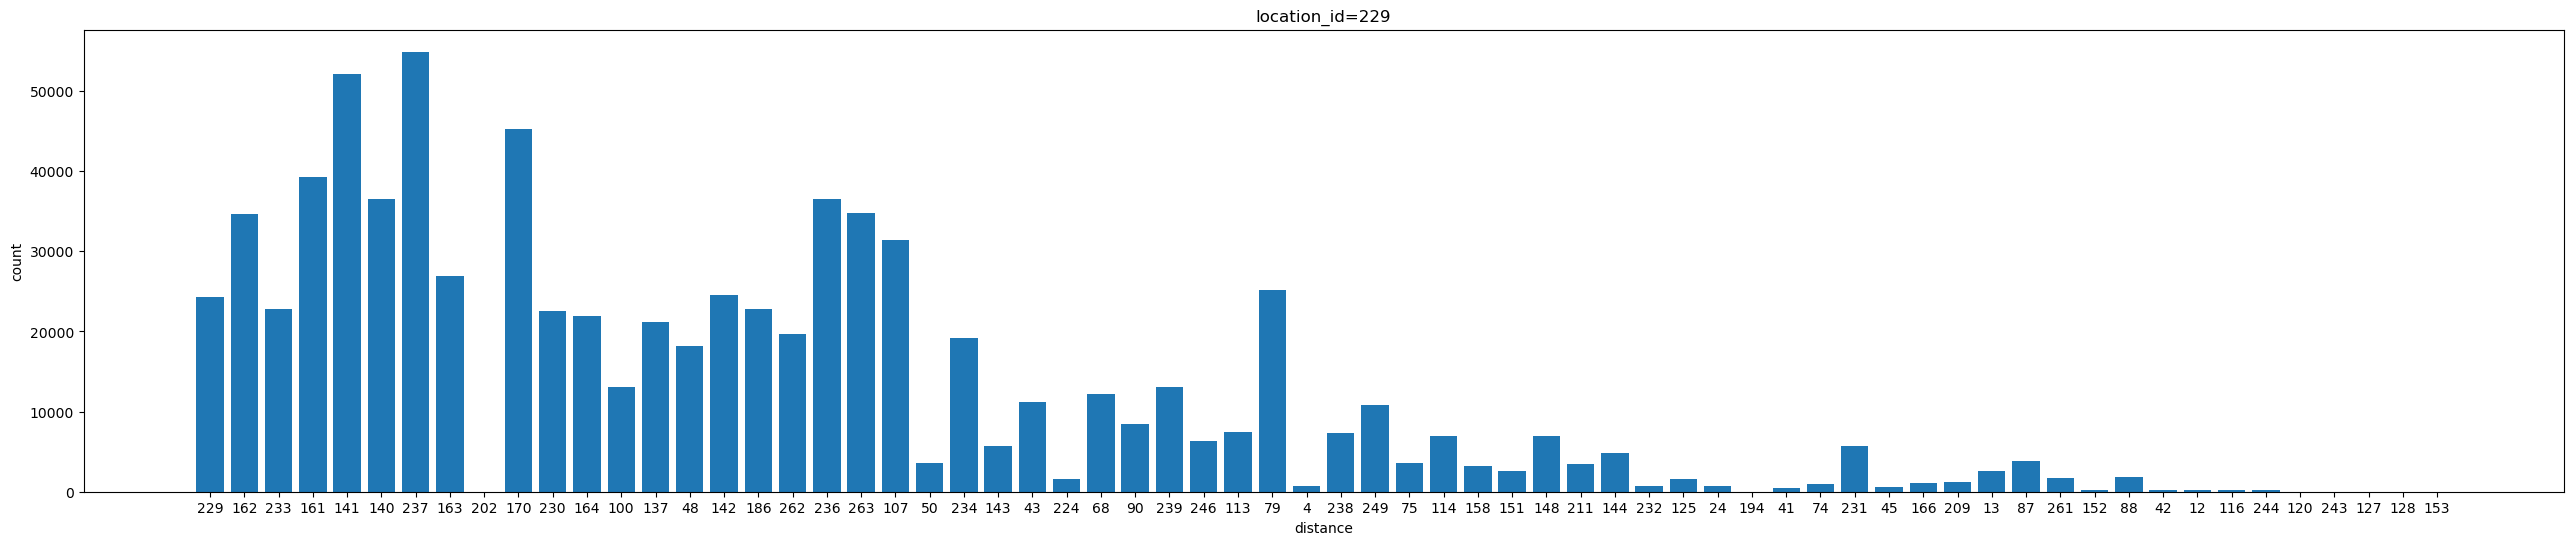

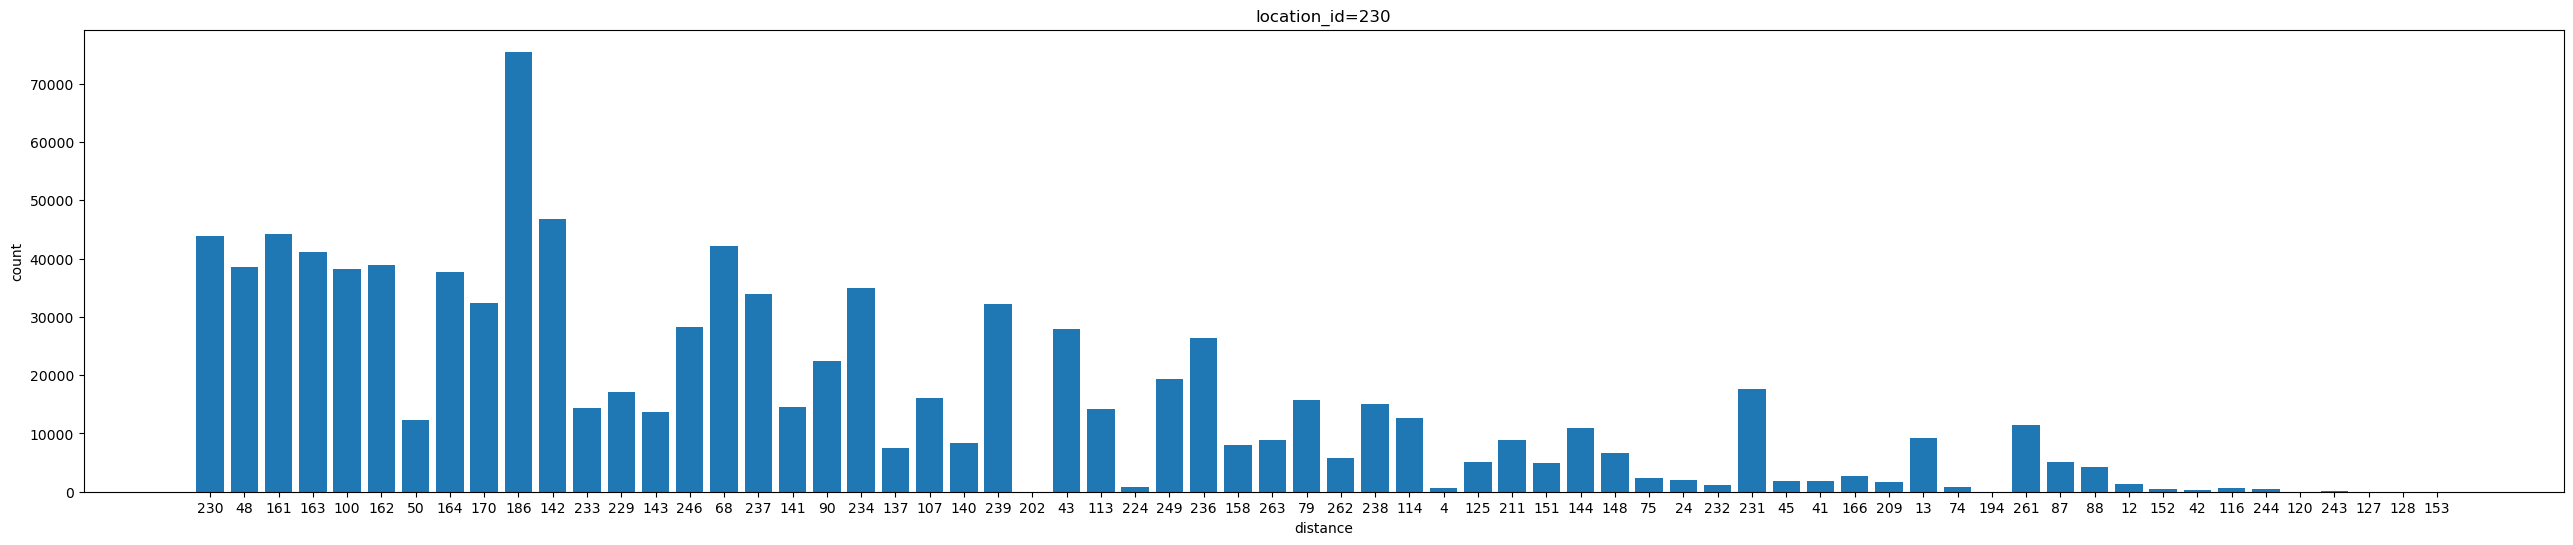

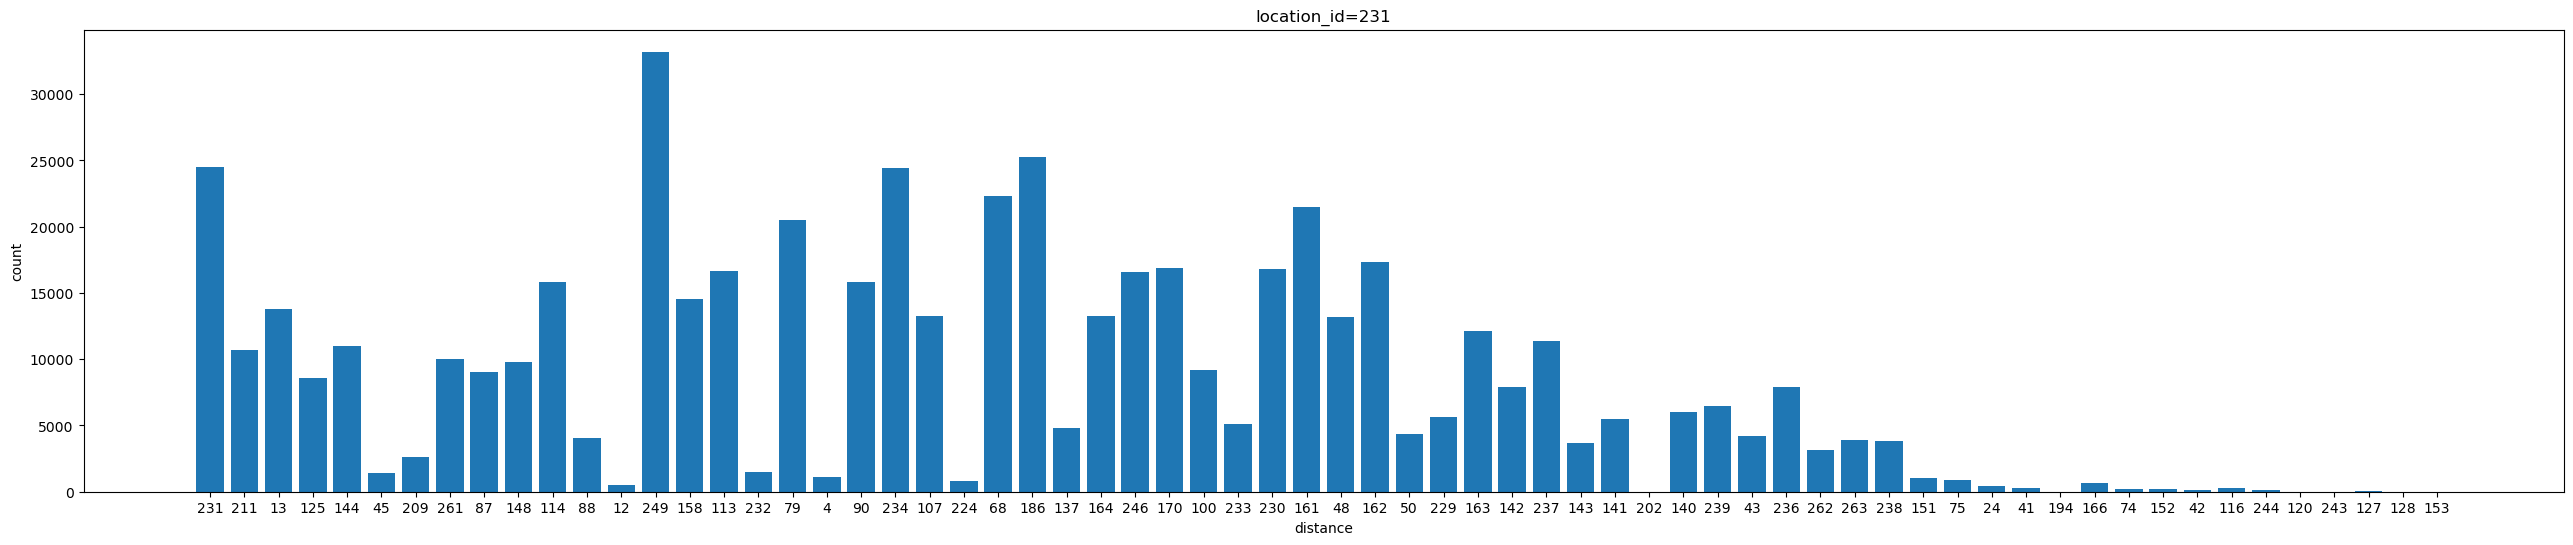

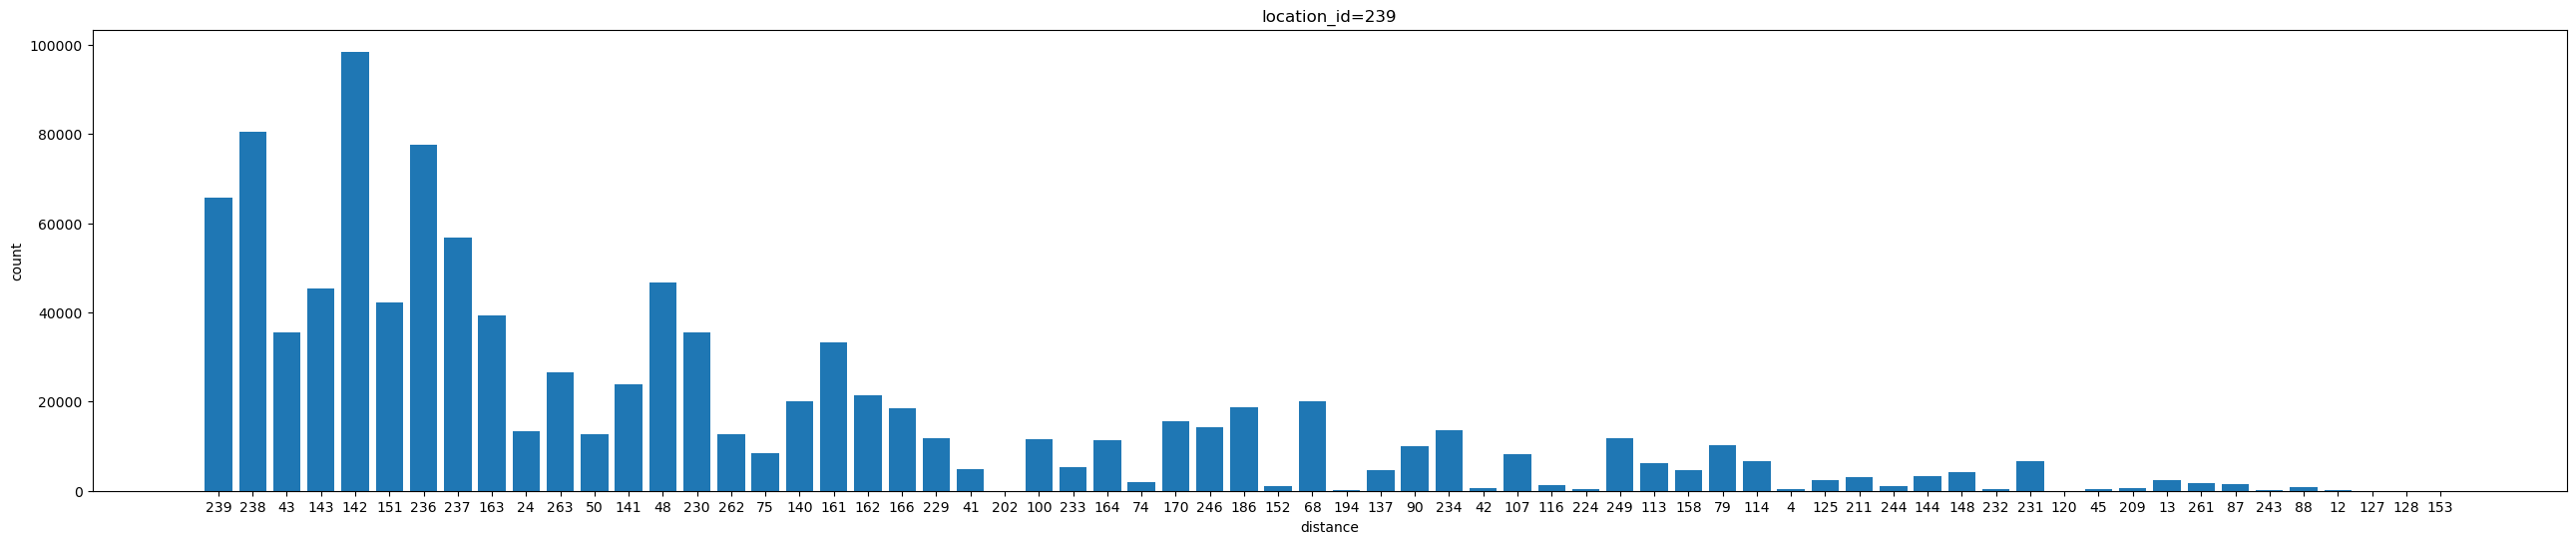

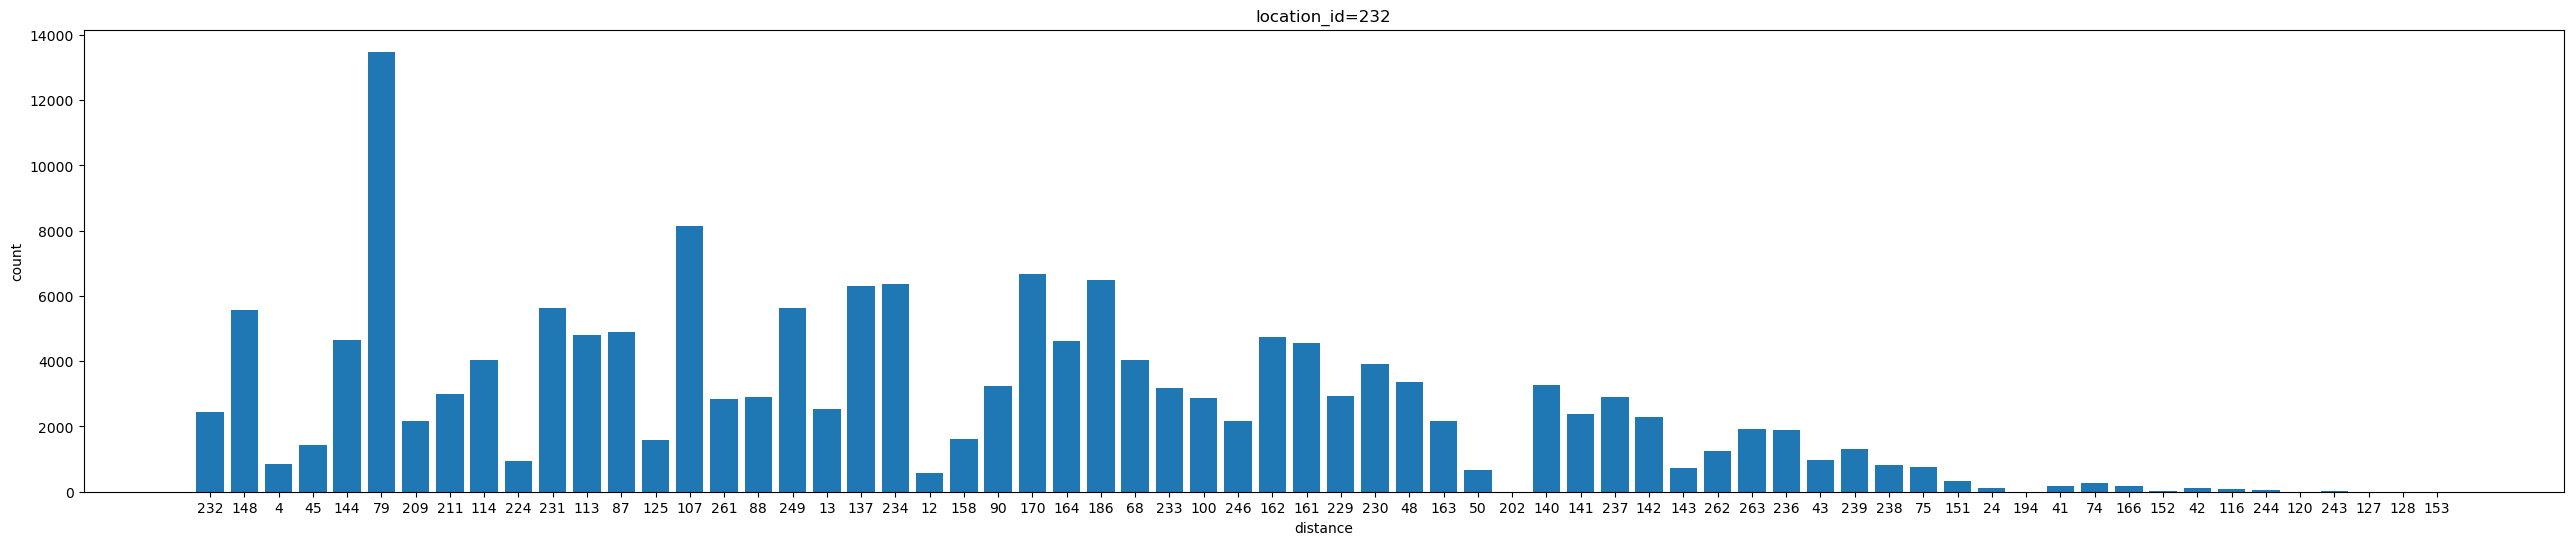

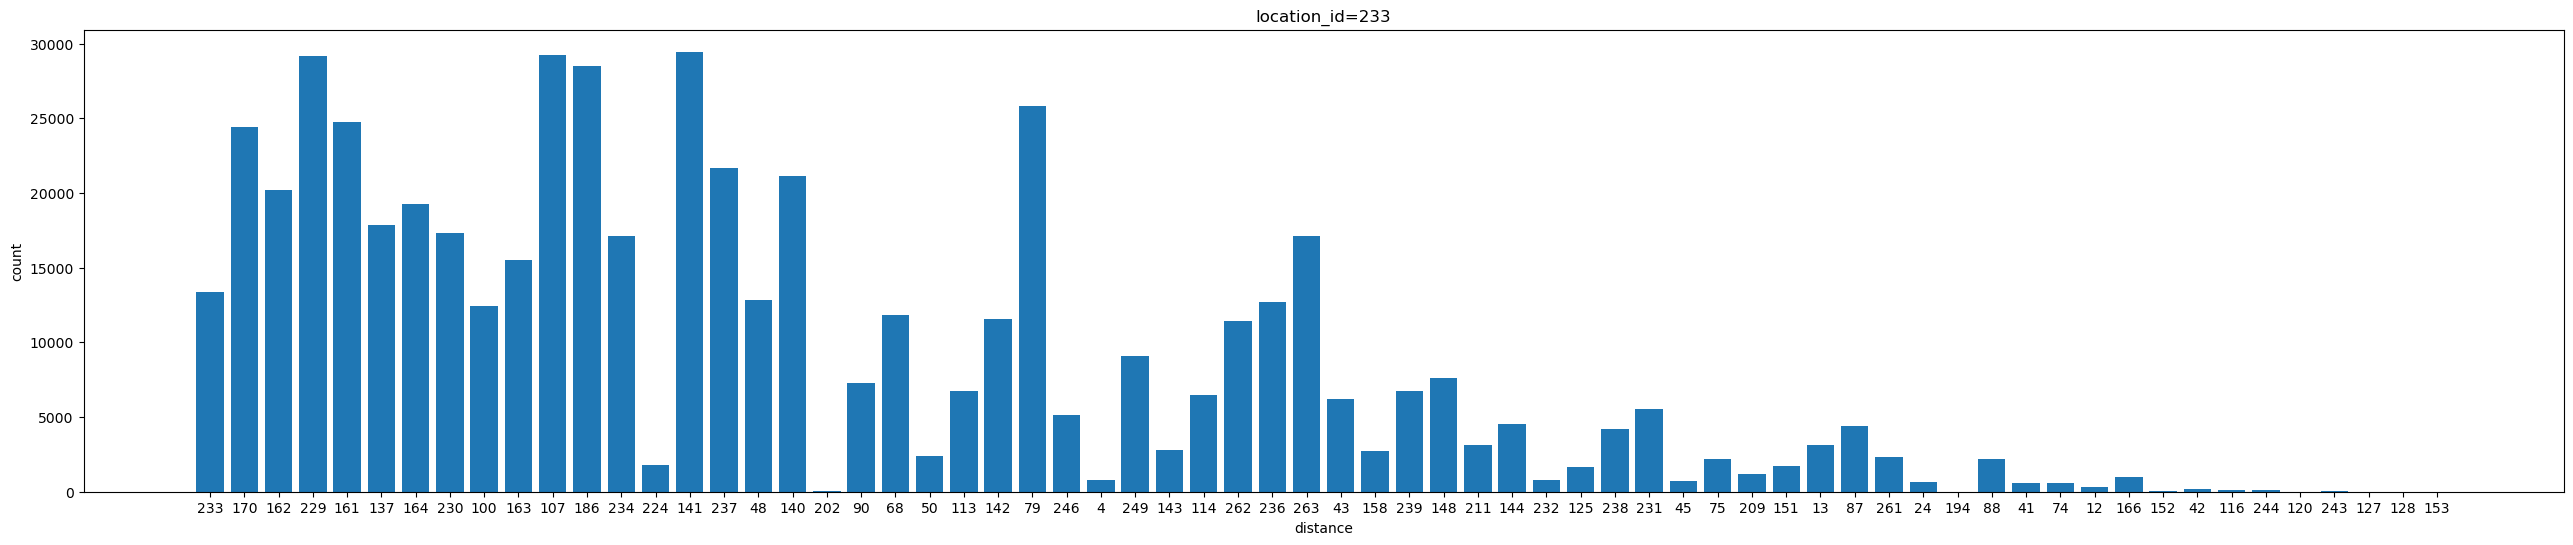

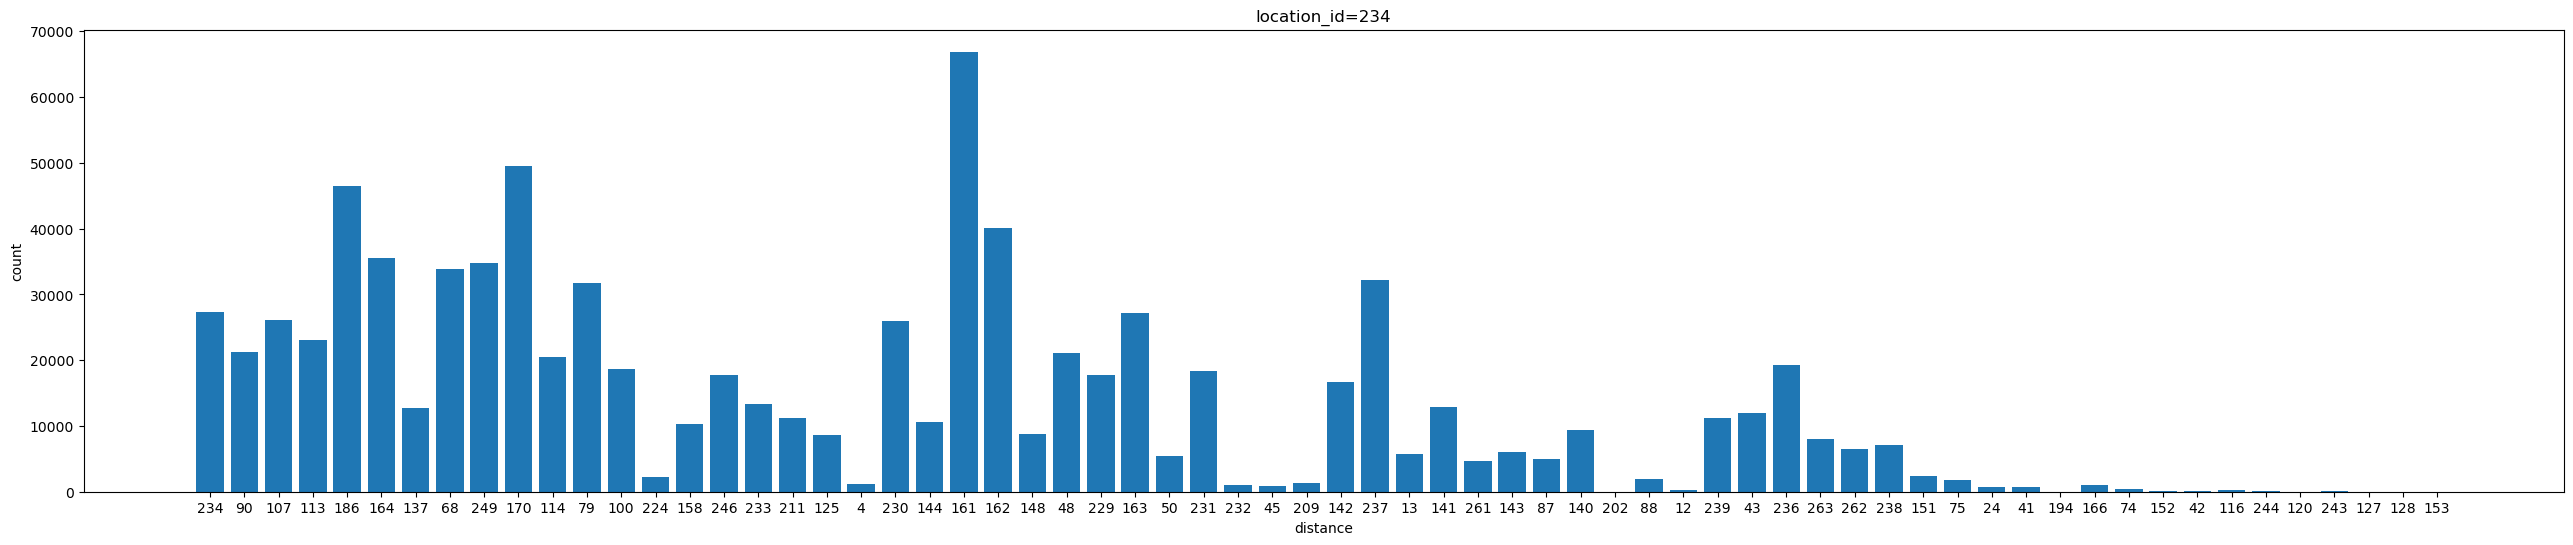

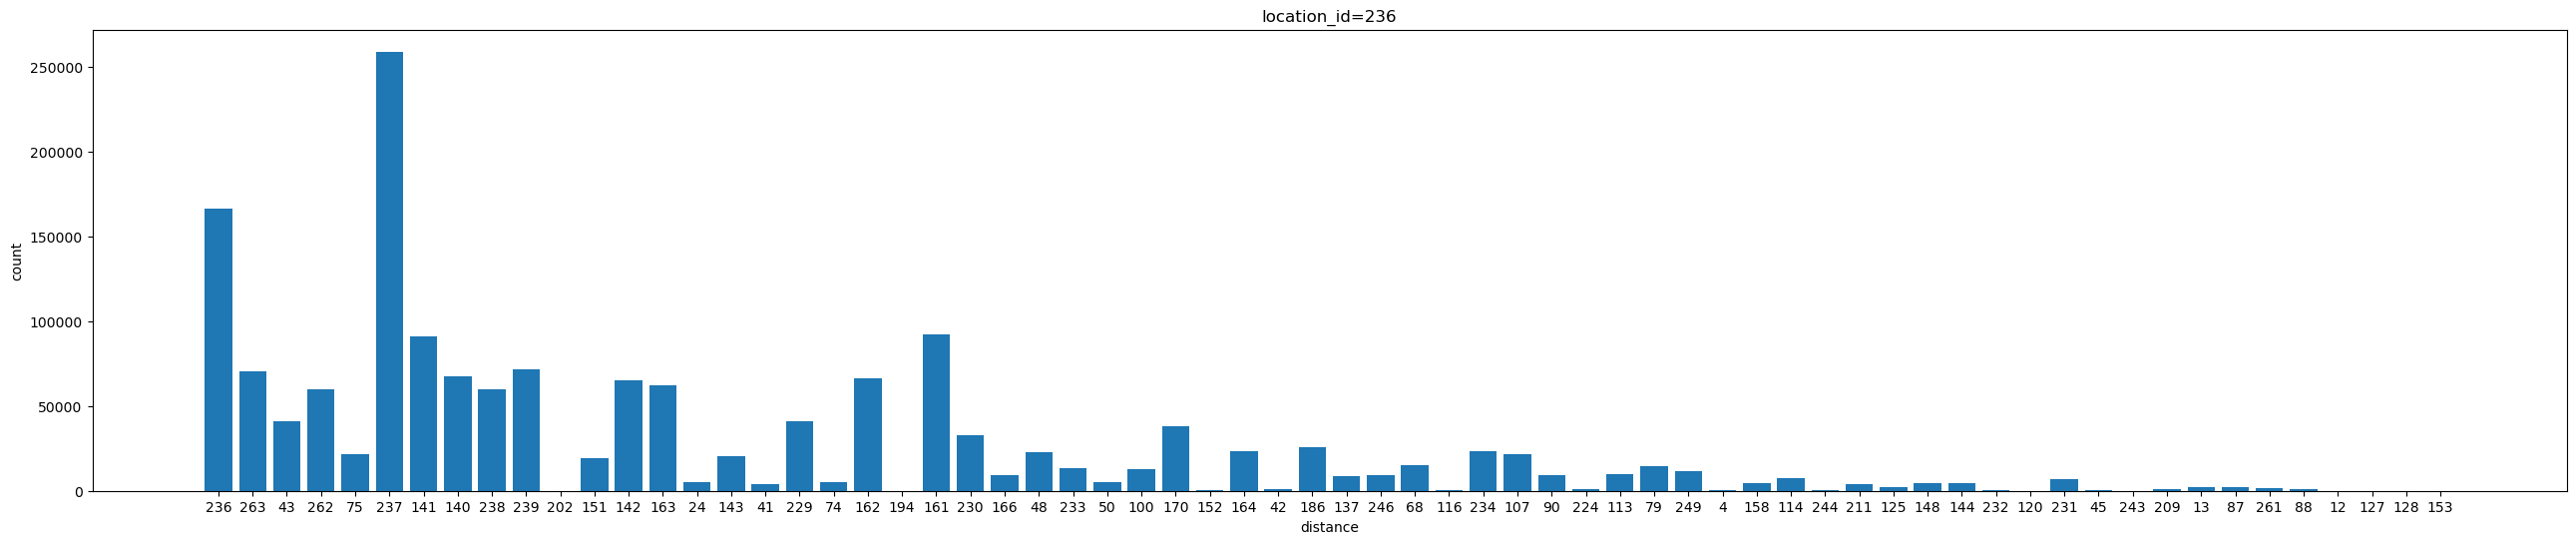

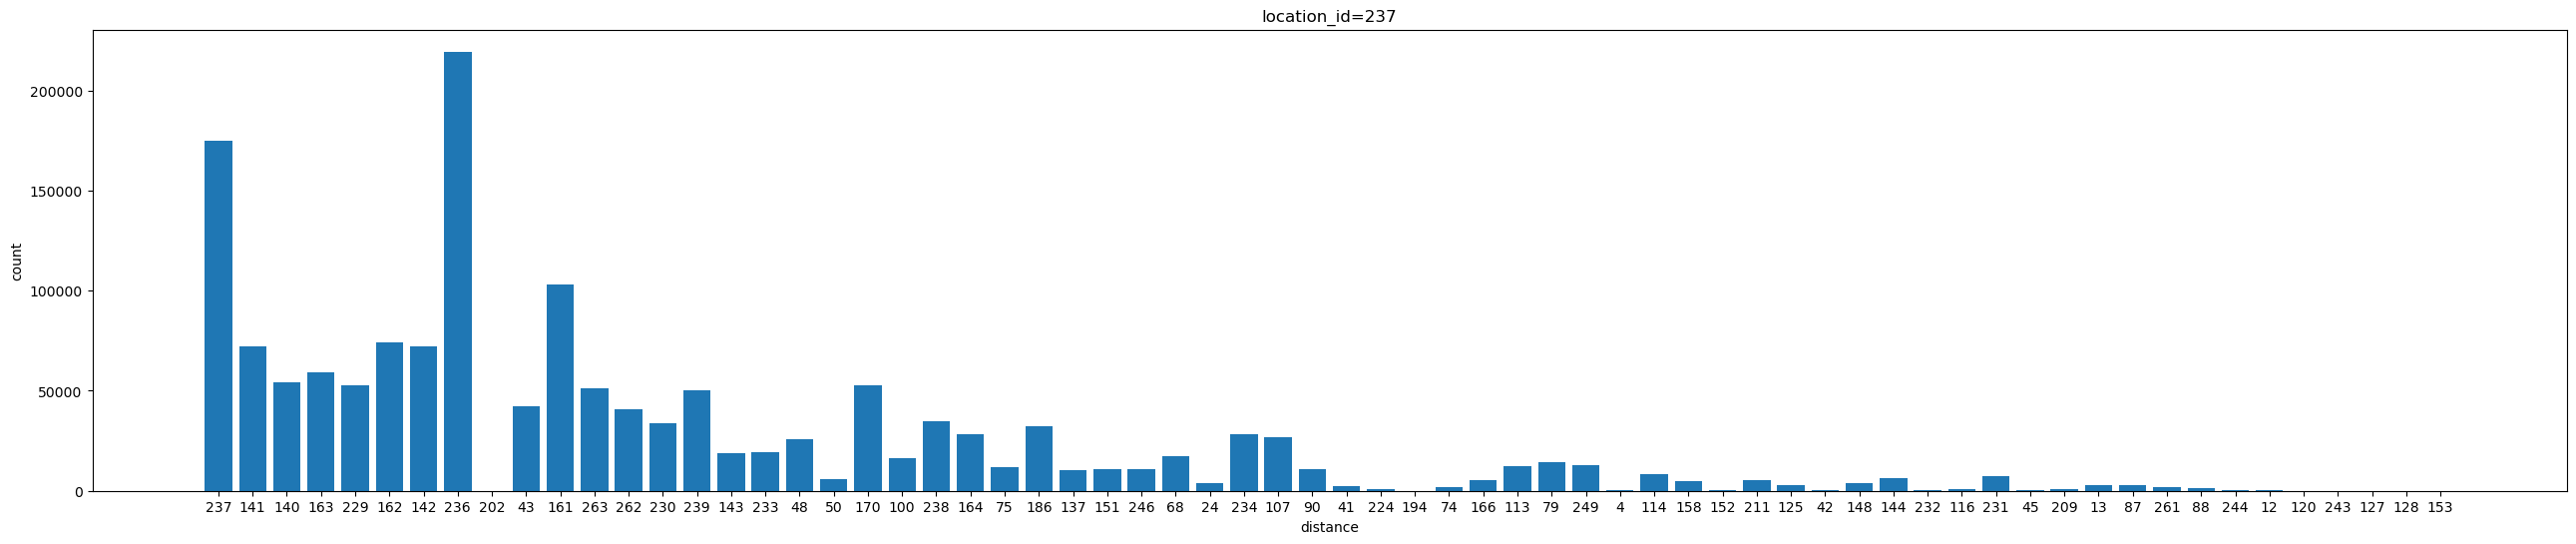

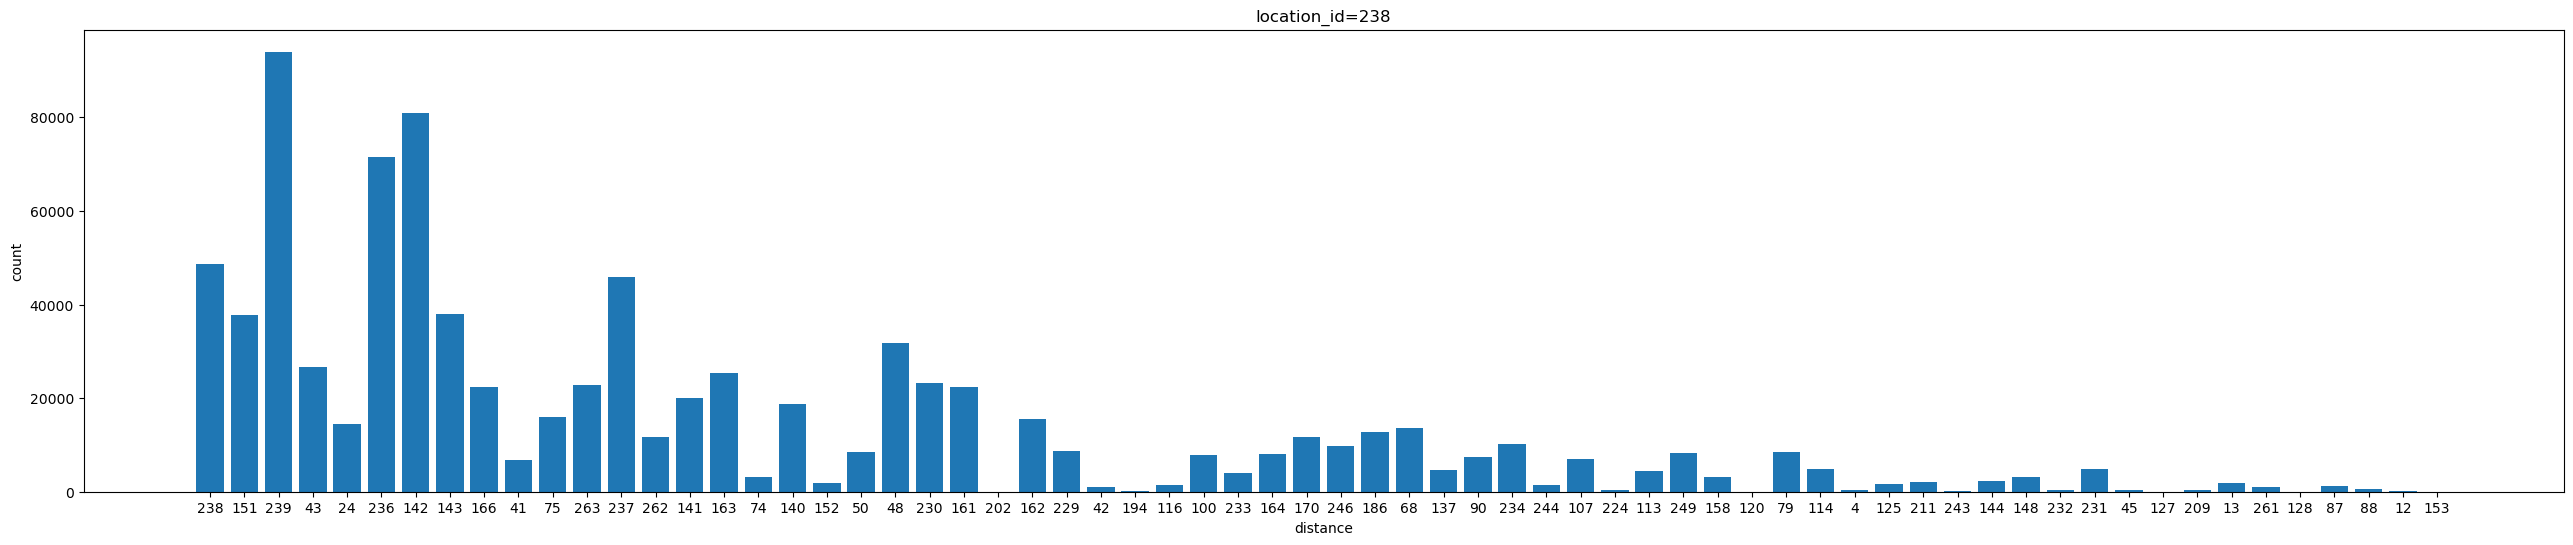

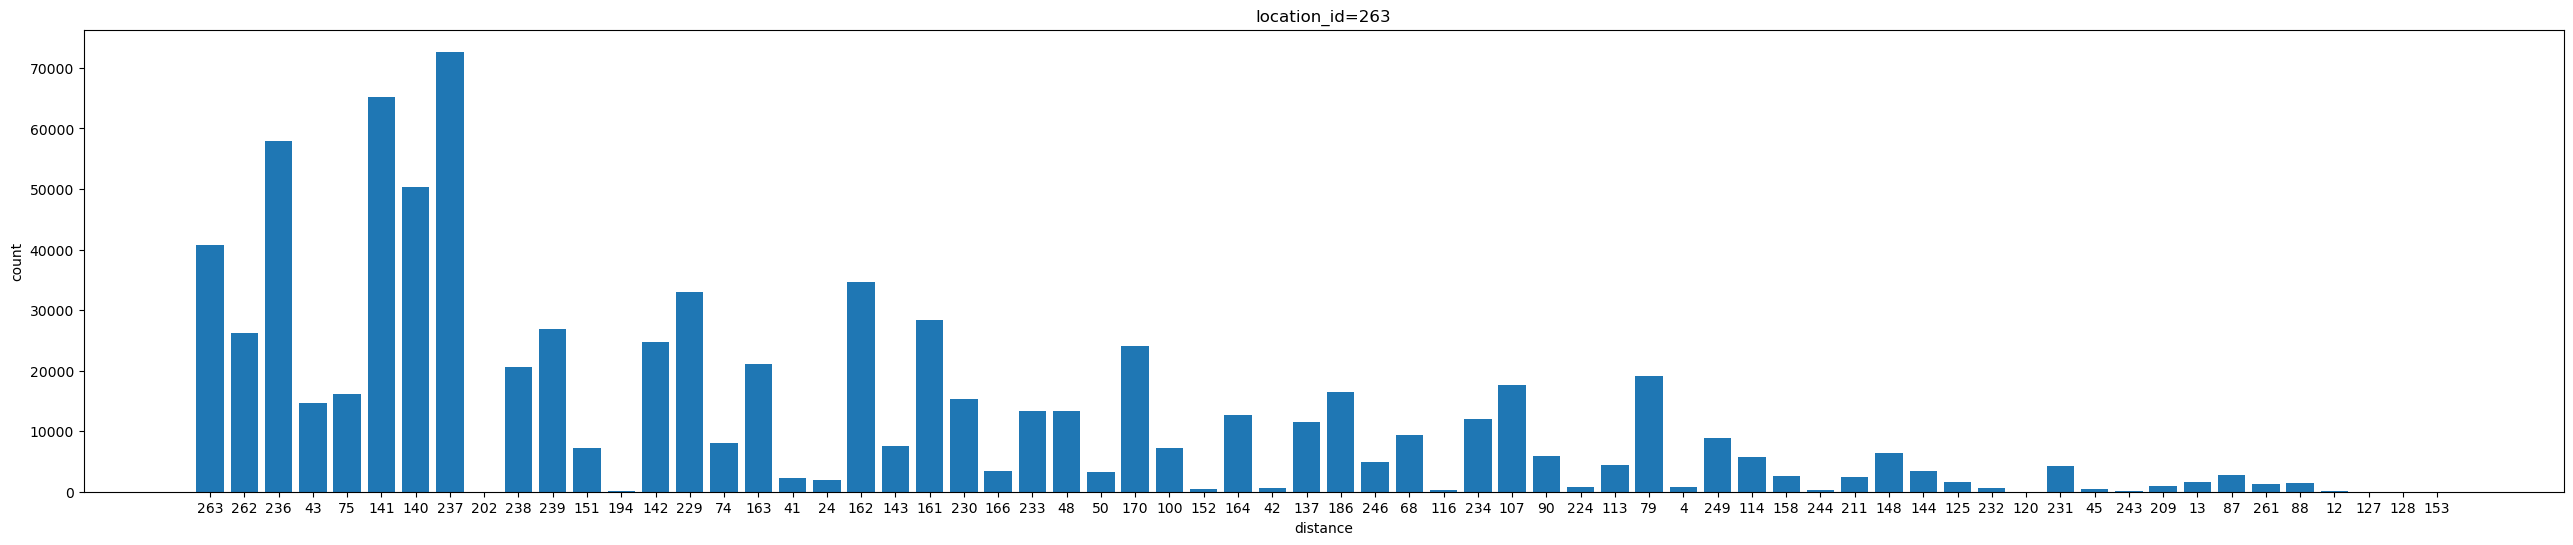

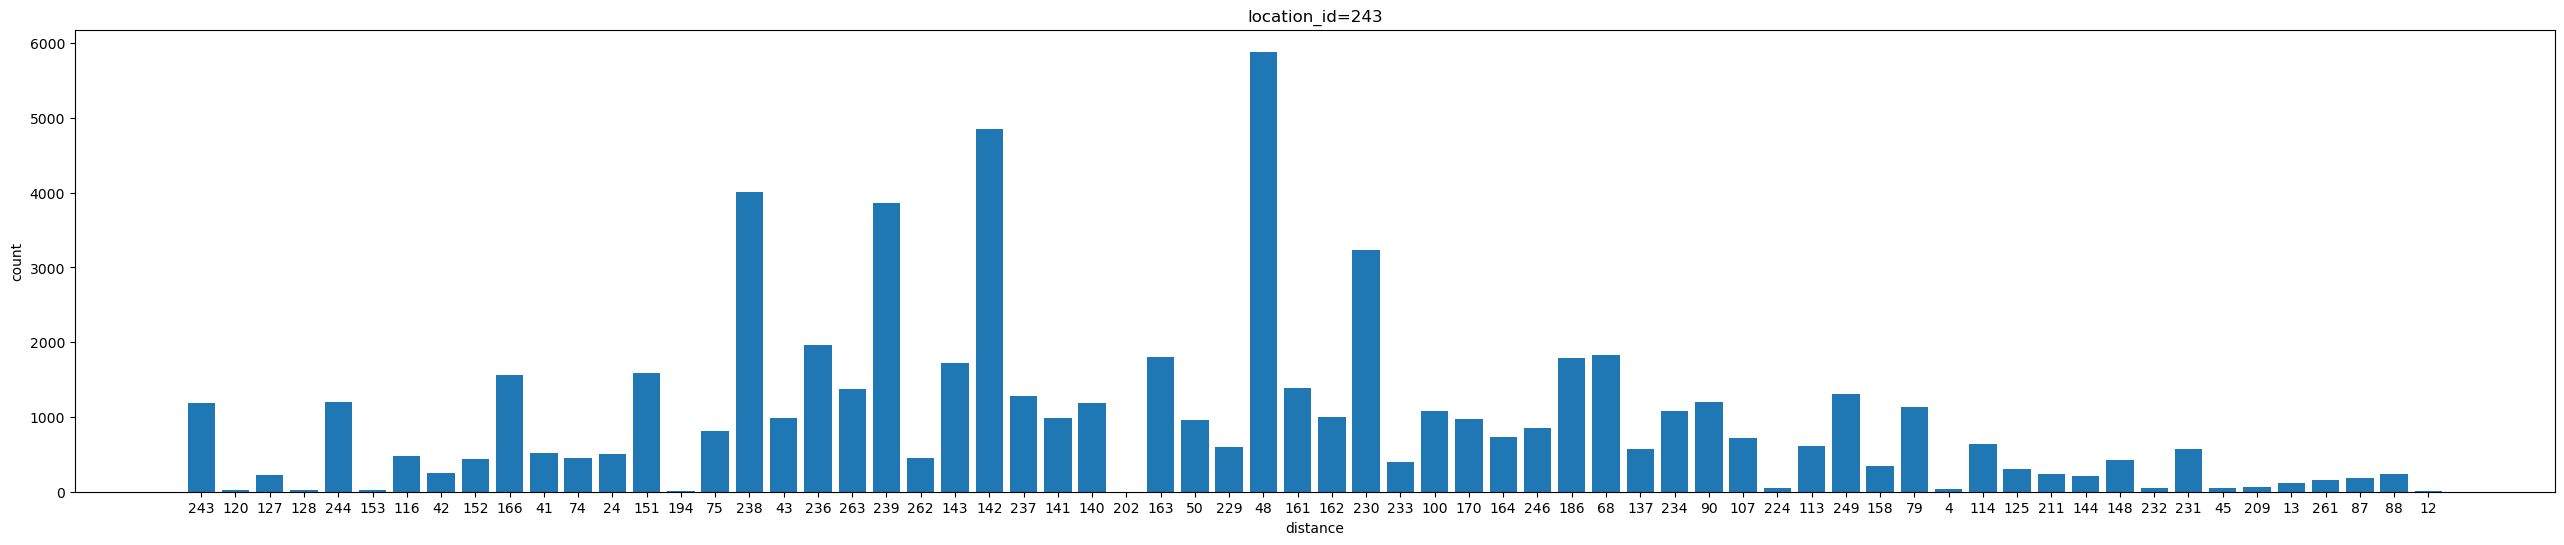

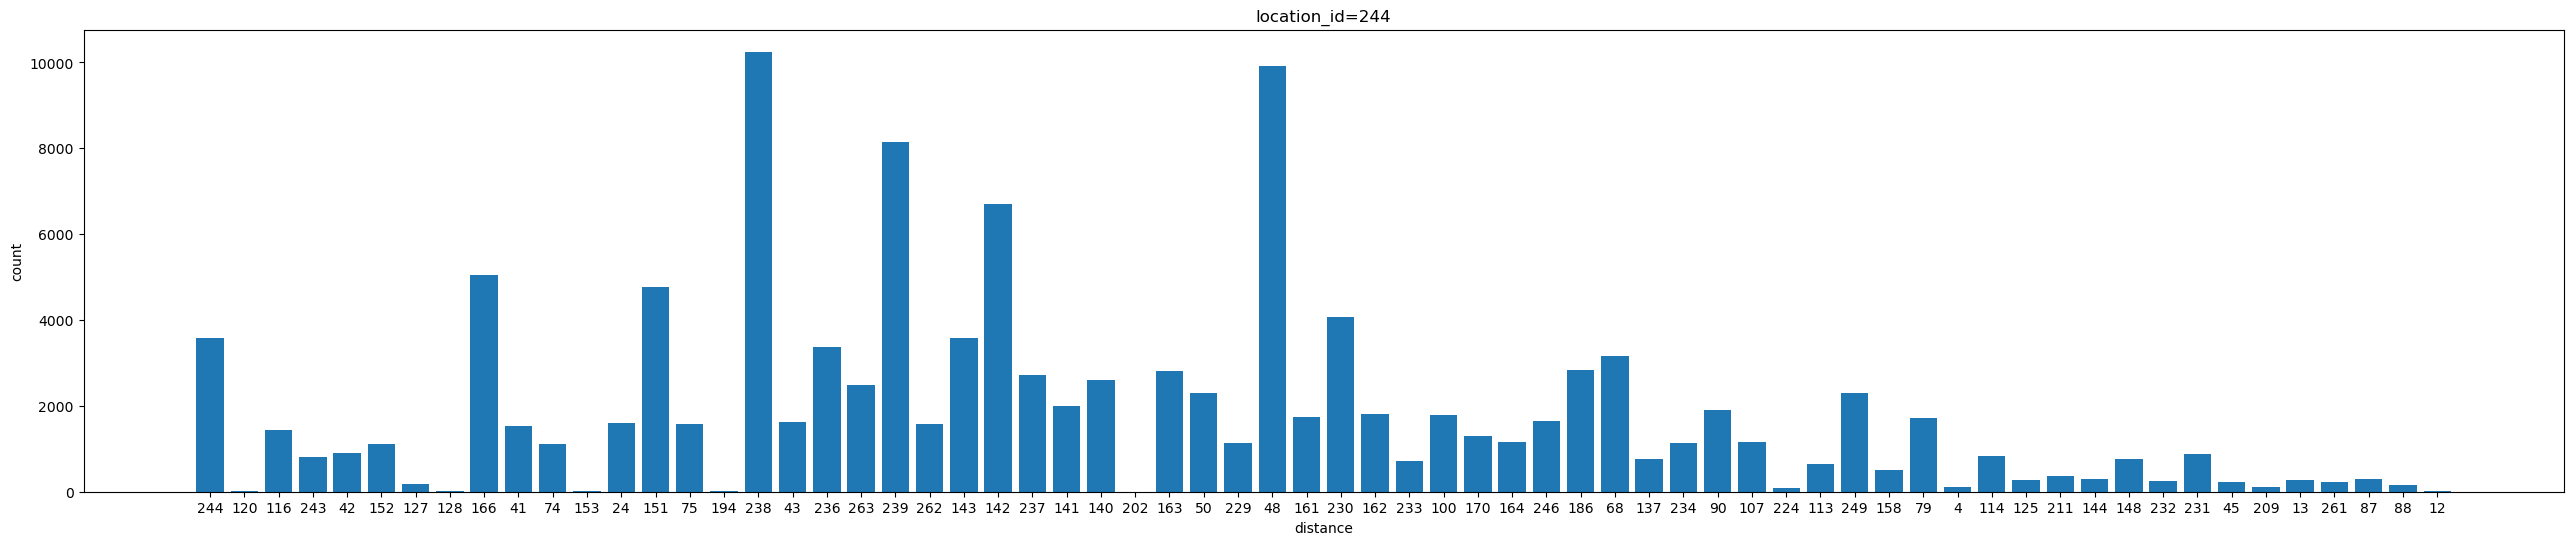

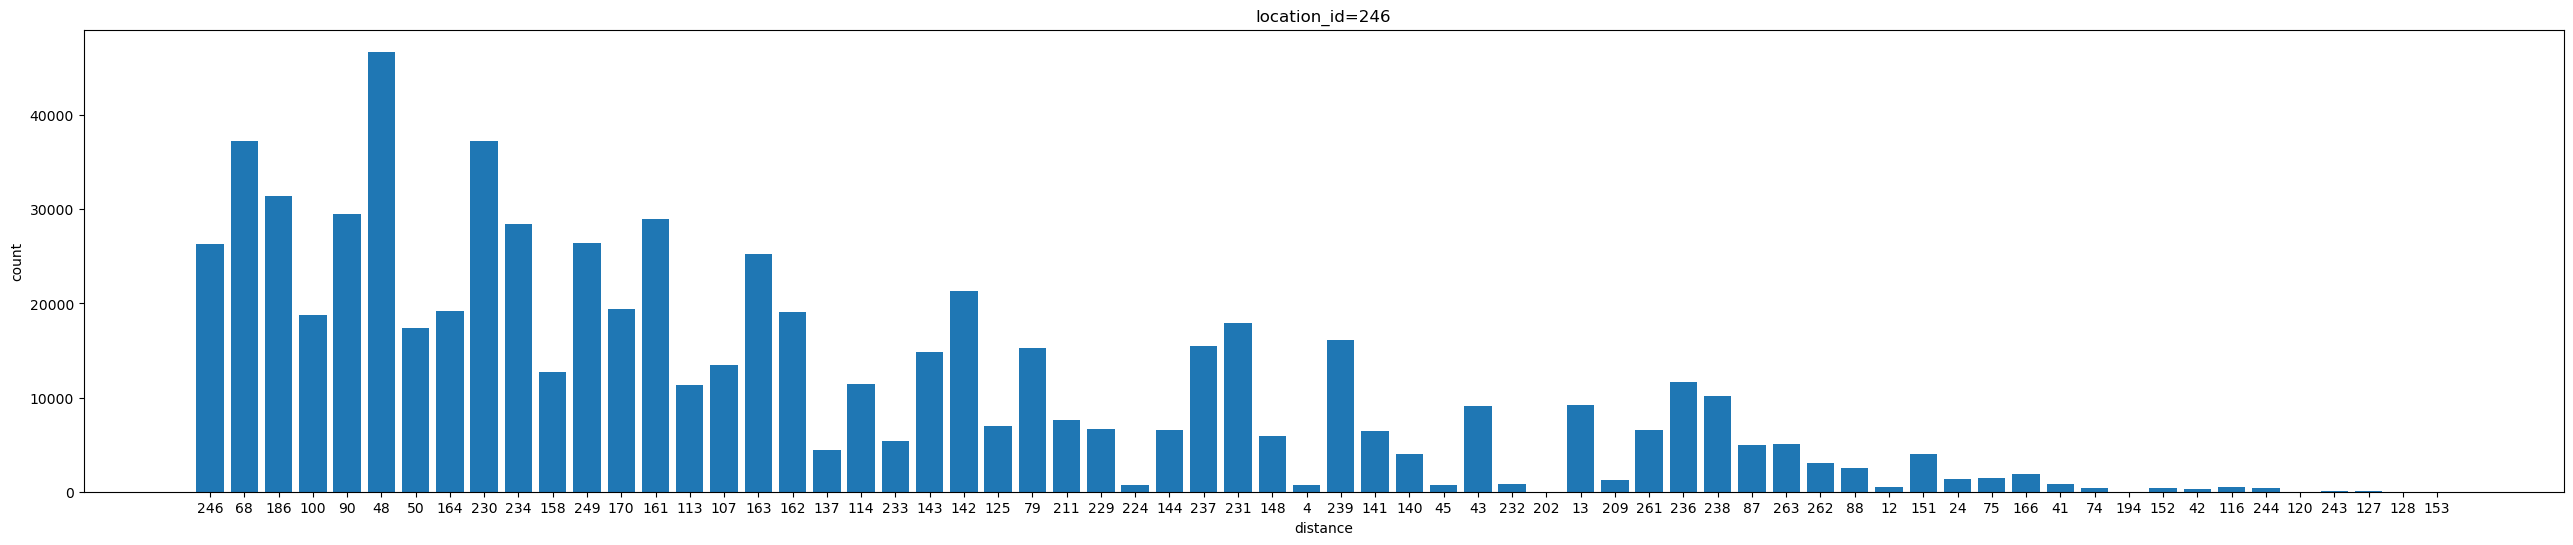

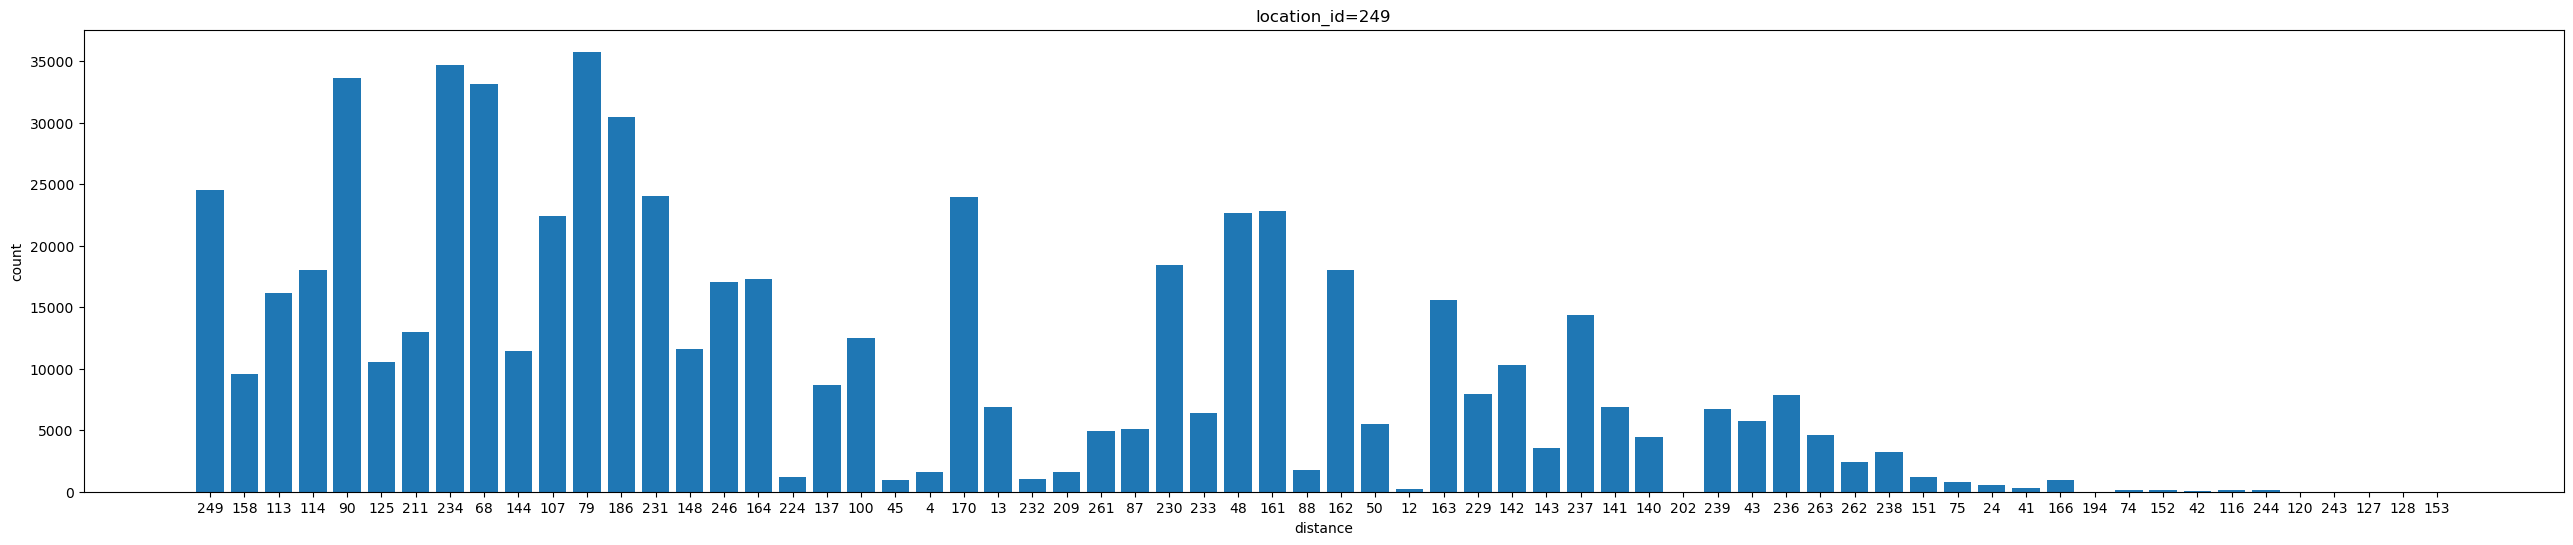

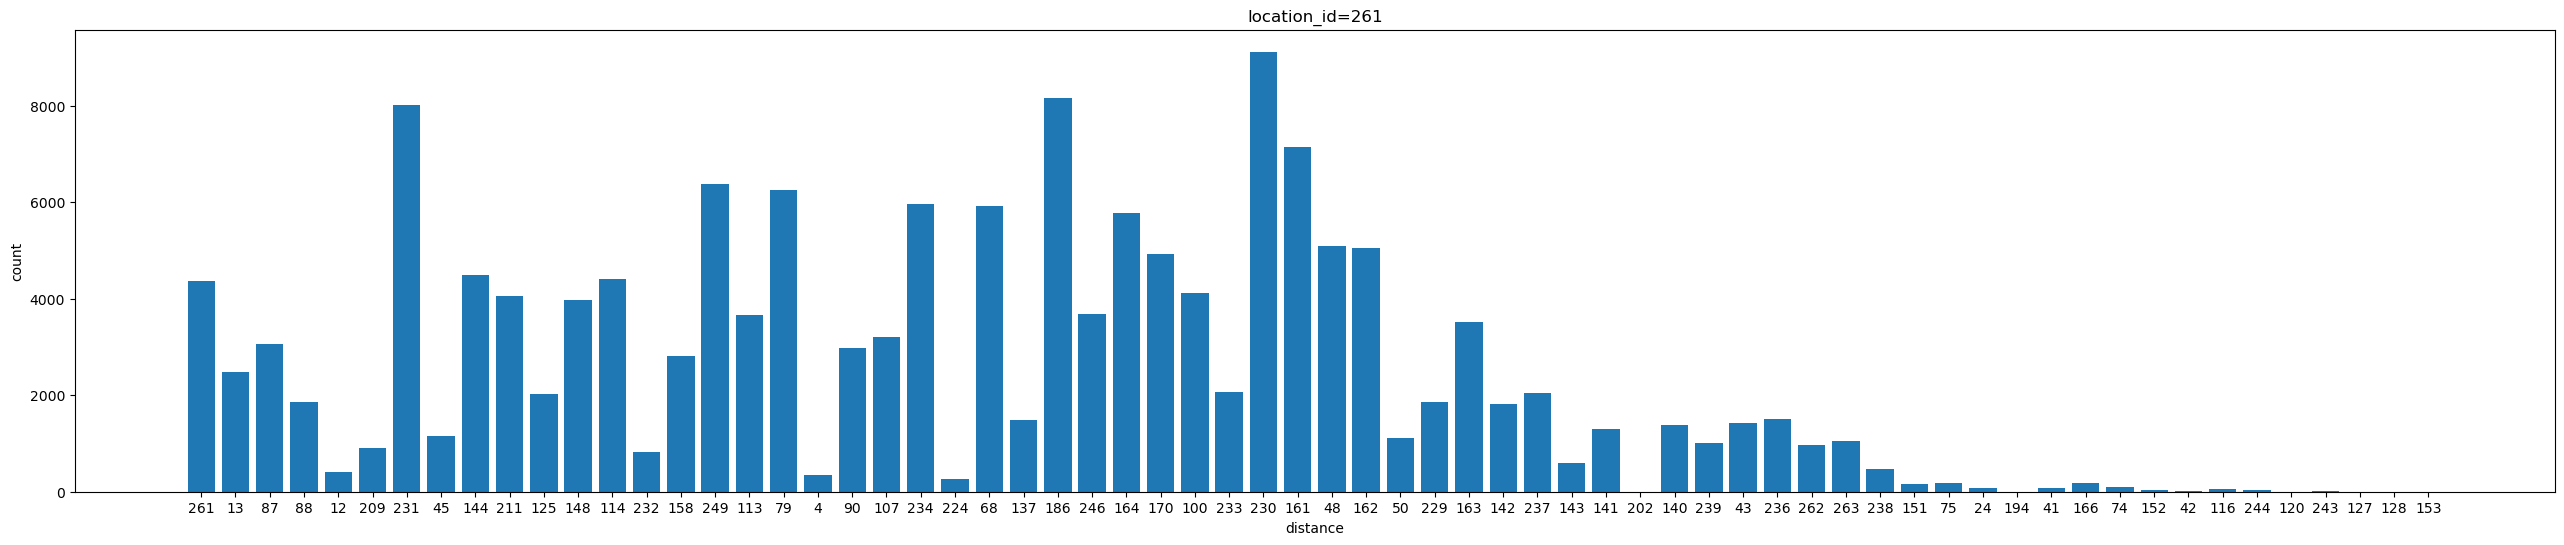

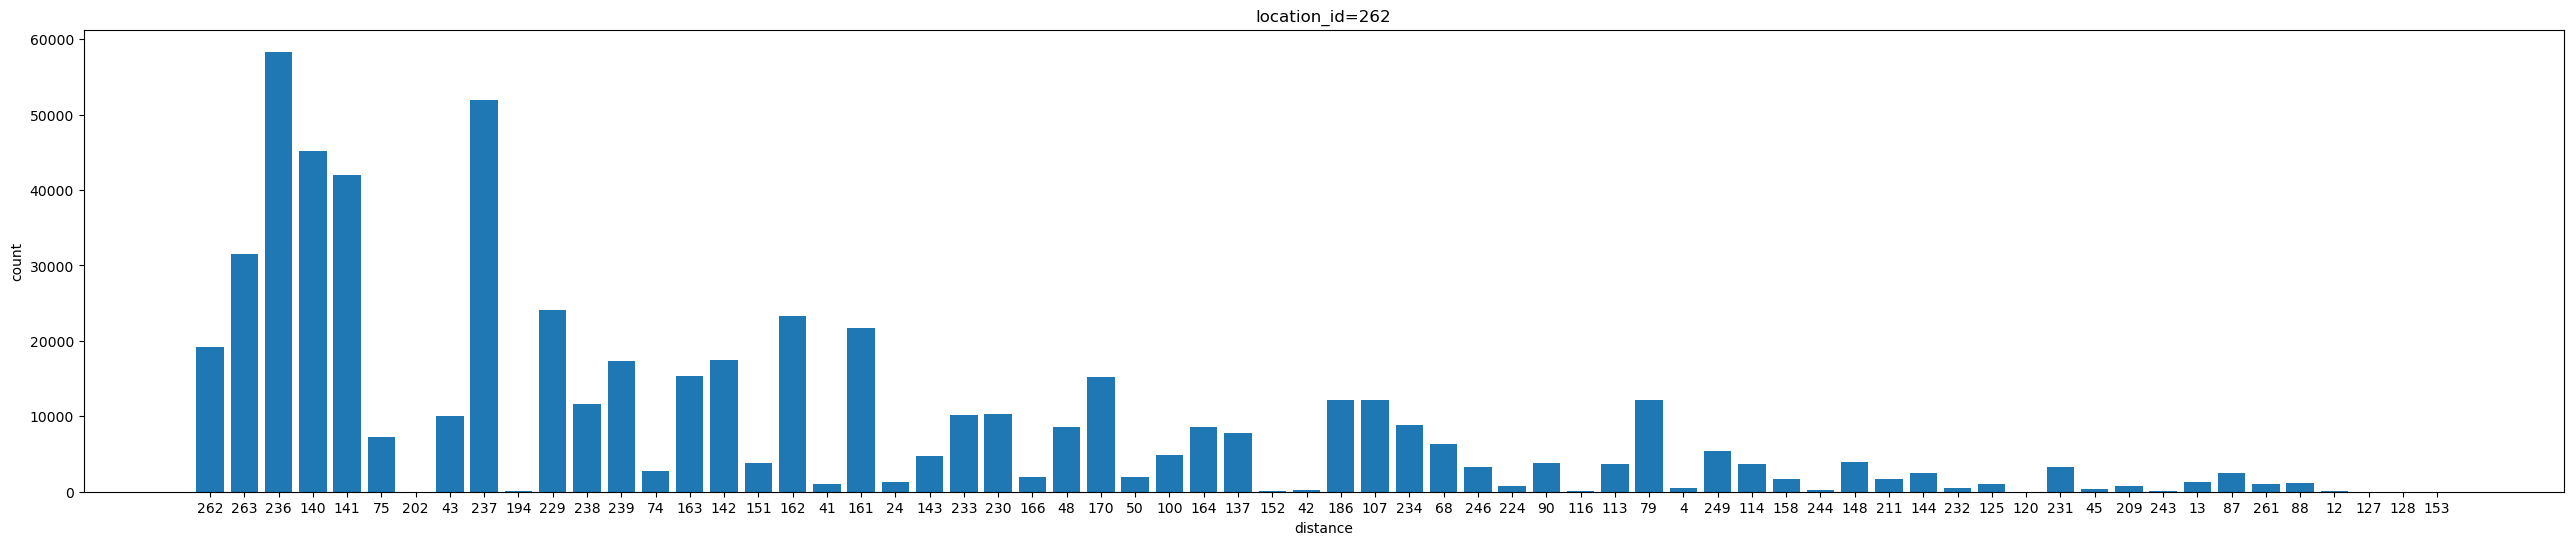

In [11]:
id_list = m_gdf['objectid'].to_list()
for id in id_list:
  dis_count_do(id, m_gdf, m_tripdata)